#__Project: Build a machine learning model for credit risk classification.__

###__Description and deliverables__







In this project(Case Study) we will analyze a dataset and build predictive models
that can provide insights to the Credit administration department of a large consulting firm.
<br>
Upon completion, we will have a predictive model that will benefit the Credit Administration and a one-page summary of this project that we would present to external stakeholders as the data professional in Vision_Prodz.

Vision_Prodz, a large consulting firm, is exploring ways to increase revenues by streamlining customers' access to be given credit or no.



**The purpose** of this project is to conduct exploratory data analysis on a provided data set and build predictive models. <br>
**The goal** of this project is to build a model that can predict whether a loan will be a risk to the bank.

__What is customer credit?__

Customer credit is a type of loan that is extended to customers by businesses. It allows customers to purchase goods or services on credit, and then repay the loan over time. 

__Why is it important?__

Customer credit can be a valuable tool for businesses, as it can help to increase sales and attract new customers. However, it is important to manage customer credit carefully, as it can also lead to debt problems for customers.

As we know, lending money is a risky business. There's always the possibility that the borrower will default on the loan, which can lead to financial losses for the lender.

That's why it's so important to be able to accurately predict which borrowers are likely to repay their loans. A well-built model can help lenders make more informed decisions about who to lend money to, which can help to reduce the risk of default.

Our dataset was provided on Kaggle through this [link]().

####**Import Packages**

In [1]:
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

from google.colab import drive # Since we're working on Google Colab

In [2]:
path = '/content/drive/MyDrive/Portfolio DA/credit_customers.csv'
df = pd.read_csv(path)

In [3]:
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


### **Data Exploration (Initial EDA and data cleaning)**


####**Gather basic information about the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

from this, we can infer that there are no missing values in the dataset. However, this is something we are going to tackle further later. 

####**Gather descriptive statistics about the data**

In [5]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000




####**Check the column**

Let's take a look at the column names, the intuition behind this is to verify that they are consistent and eventually improve as needed. 

In [6]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

Based on the short exploration above and the descriptions from similar projects found on this [website](https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/) and this [pdf](https://drive.google.com/file/d/1P3vQavWQh5OYTjfGav5sTQiRQwxw7inN/view?usp=share_link). We report the data as followed. Unfortunately, the dataset was not provided with a description on [Kaggle](https://www.kaggle.com/datasets/ppb00x/credit-risk-customers). 

**class:** Whether the issued credit was a good decision or bad <br>
**checking_status:** Status of existing checking account.<br>
**duration:** Duration of loan in months<br>
**credit_history:** Credit history of the applicant<br>
**purpose:** Purpose for the loan<br>
**credit_amount:** Credit amount<br>
**savings_status:** Savings account/bonds<br>
**employment:** Present employment since<br>
**installment_commitment:** Installment rate in percentage of disposable income<br>
**personal_status:** Personal status and sex<br>
**other_parties:** Other debtors / guarantors for the applicant<br>
**residence_since:** Present residence since<br>
**property_magnitude:** Property type of applicant<br>
**age:** Age in years<br>
**other_payments_plans:** Other installment plans<br>
**housing:** Housing<br>
**existing_credits:** Number of existing credits at this bank<br>
**job:** Job<br>
**num_dependents:** Number of people being liable to provide maintenance for<br>
**own_telephone** Is the Telephone registered or not<br>
**foreign_worker:** Is the applicant a foreign worker<br>

####**There are some categorical variables that contain values whose names need to be enhanced for the convenience of modeling.**

In [7]:
# This is for identifying them.
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


The variables `checking_status`,	`savings_status` and	`employment` could be more explicit. We will start by identify the values of these columns.


In [8]:
df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

Although, the code below answers our needs, however, it can be improved so that the informations it provides are better structured and easier to interpret.

In [9]:
df['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [10]:
df['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [11]:
df['employment'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

Now, we will improve the name of these values across these three columns.

**checking_status**<br>
**A:** x < 0 DM<br>
**B:** 0 <= x < 200 DM<br>
**C:** x >= 200 DM / salary assignments for at least 1 year<br>
**D:** no checking <br>
**savings_status**<br>
**A:** x < 100 DM<br>
**B:** 100 <= x < 500 DM<br>
**C:** 500 <= x < 1000 DM<br>
**D:** x >= 1000 DM<br>
**E:** no known savings<br>
**employement** <br>
**A:** x < 1 year<br>
**B:** 1 <= x < 4 years<br>
**C:** 4<= x < 7 years<br>
**D:** x >= 7 years<br>
**E:** unemployed<br>

In [12]:
column_checking_status = {'<0' : 'A', '0<=X<200' : 'B', '>=200' : 'C', 'no checking' : 'D'}
column_savings_status = {'<100' : 'A', '100<=X<500' : 'B', '500<=X<1000' : 'C', '>=1000' : 'D', 'no known savings' : 'E'}
column_employment = {'<1' : 'A', '1<=X<4' : 'B', '4<=X<7' : 'C', '>=7' : 'D', 'unemployed' : 'E'}

# Now, update the variables
df['checking_status'] = df['checking_status'].replace(column_checking_status)
df['savings_status'] = df['savings_status'].replace(column_savings_status)
df['employment'] = df['employment'].replace(column_employment)


The following codes is to verify that the above codes  did the job.

In [13]:
df['checking_status'].unique()

array(['A', 'B', 'D', 'C'], dtype=object)

In [14]:
df['savings_status'].unique()

array(['E', 'A', 'C', 'D', 'B'], dtype=object)

In [15]:
df['employment'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

Well done! ✅


####**Check missing values**

Check for any missing values

In [16]:
df[df.isnull()].sum()

checking_status             0
duration                  0.0
credit_history              0
purpose                     0
credit_amount             0.0
savings_status              0
employment                  0
installment_commitment    0.0
personal_status             0
other_parties               0
residence_since           0.0
property_magnitude          0
age                       0.0
other_payment_plans         0
housing                     0
existing_credits          0.0
job                         0
num_dependents            0.0
own_telephone               0
foreign_worker              0
class                       0
dtype: object

This just confirms what we've already known. There are no missing values in the data.

####**Check for duplicates**

Check for any duplicate entries in the data.

In [17]:
df.duplicated().sum()

0

Great! No duplicated values.

###**Data Exploration (Continue EDA)**

###**Data visualizations**

Start by examining the variables

In [18]:
df_dtypes = df.dtypes
df_dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

We've spotted two categories: `object` and `float64`. That we consider respectively **categorical** variables and **continuous** variables.



We will tackle the categorical variables. First of all, make a list that contains all the categorical variables.


In [19]:
# We call our recent variable df_dtypes to filter out all the objet from the series
dtypes_object = df_dtypes[df_dtypes == "object"]
# We retrieve all the index
dtypes_objectIndex = dtypes_object.index
# We iterate over the index to create a list of all the variables of the type object that are categorical
object_list = []
for obj in dtypes_objectIndex:
  object_list.append(obj)

object_list


['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [20]:
# Since class is our output variable, we remove it from the list. 
object_list.remove('class')
object_list

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

Now we have our list of categorical variables. We need to make sure that the list contents are complete and reliable. Since We have only 20 variables in our data, we can run the code in the next cell to verify them all.

Note that we can recognize a categorical variable by how many unique values it contains, typically fewer than twenty (20). The values are likely to be repeated and can be quickly grouped to summarize. 

In [21]:
for column in df.columns:
  print(df.groupby(column).size())
  print(f"The {column}'s column contains {df[column].nunique()} different values \n")

checking_status
A    274
B    269
C     63
D    394
dtype: int64
The checking_status's column contains 4 different values 

duration
4.0       6
5.0       1
6.0      75
7.0       5
8.0       7
9.0      49
10.0     28
11.0      9
12.0    179
13.0      4
14.0      4
15.0     64
16.0      2
18.0    113
20.0      8
21.0     30
22.0      2
24.0    184
26.0      1
27.0     13
28.0      3
30.0     40
33.0      3
36.0     83
39.0      5
40.0      1
42.0     11
45.0      5
47.0      1
48.0     48
54.0      2
60.0     13
72.0      1
dtype: int64
The duration's column contains 33 different values 

credit_history
all paid                           49
critical/other existing credit    293
delayed previously                 88
existing paid                     530
no credits/all paid                40
dtype: int64
The credit_history's column contains 5 different values 

purpose
business                97
domestic appliance      12
education               50
furniture/equipment    181
new car      

After observations, we can add the following columns `installment_commitment`, `residence_since`, `existing_credits` and `num_dependents` as categorical variables. Our previous algorithm could not detect these categorical variables for the pure and simple reason the latter was intended to find nominal variables, whereas the newest categorical variables were ordinal.

Categorical variables can be either nominal or ordinal. If you need to read more about ordinal variables and nominal variables. [This resource](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm) from Statistics Canada is a great place to go.




In [22]:
# This is to extend the object_list with the new variables.
new_variables = ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']
object_list.extend(new_variables)
object_list 

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

Bar charts would be ideal for observing how the data is distributed for these categorical columns. <br>
We will display the frequencies of the bar charts, for each category, on the Y-axis and the category names on the X-axis.

In [23]:
print('We have', len(object_list), 'categorical variables to plot')

We have 17 categorical variables to plot


We will use a function that should allow us to plot several at time.

In [24]:
def PlotBarGraphs(datain, columns):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(columns), figsize=(16,4))
    fig.suptitle('Bar charts of: '+ str(columns))

    for colName, plot_number in zip(columns, range(len(columns))):
        datain.groupby(colName).size().plot(kind='bar',ax=subPlot[plot_number])

In [25]:
# Just a last function to help us select the columns more conveniently.
def RangePlot(posa, posb):
  listRP = object_list[posa:posb]
  return listRP


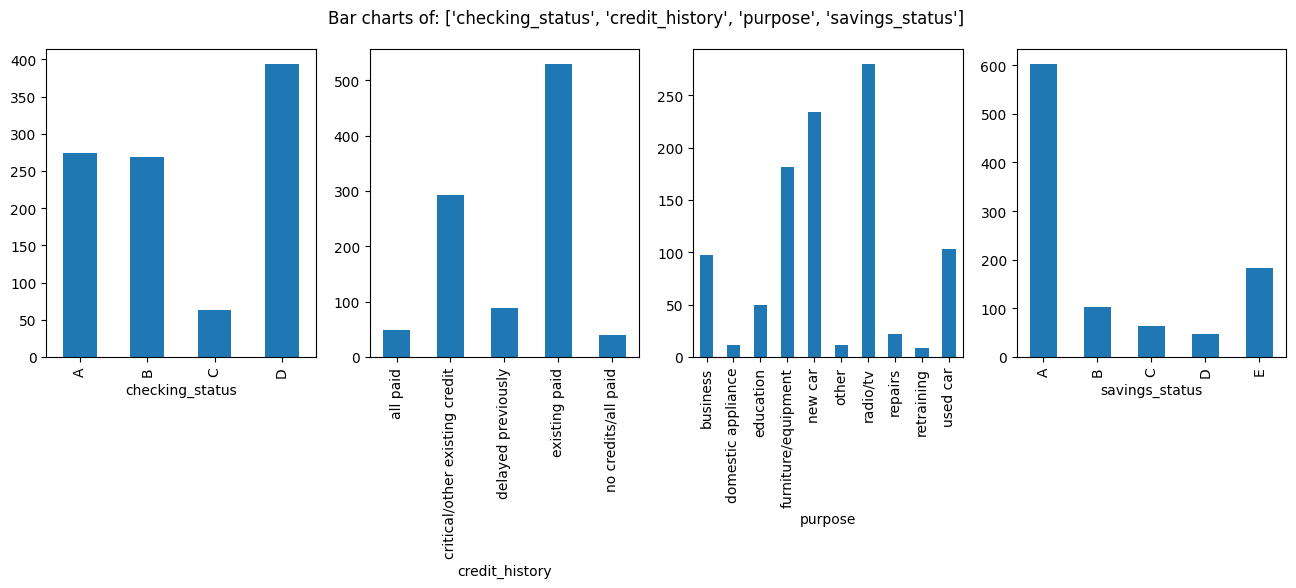

In [26]:
# The functions in action
PlotBarGraphs(datain=df, 
              columns=RangePlot(0, 4))

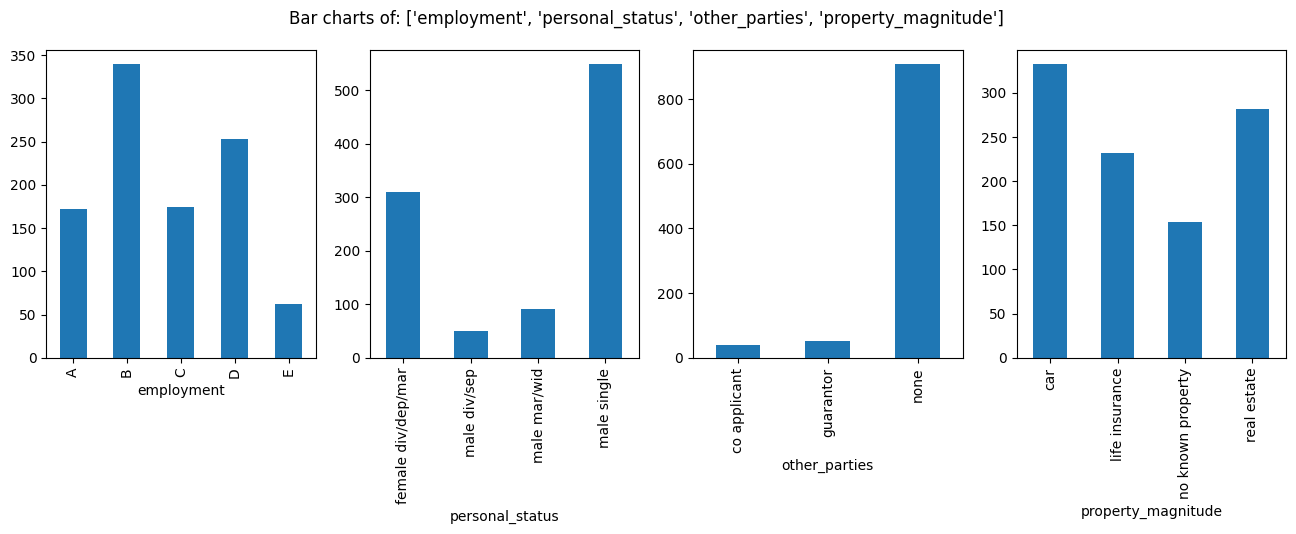

In [27]:
PlotBarGraphs(datain=df, 
              columns=RangePlot(4, 8))

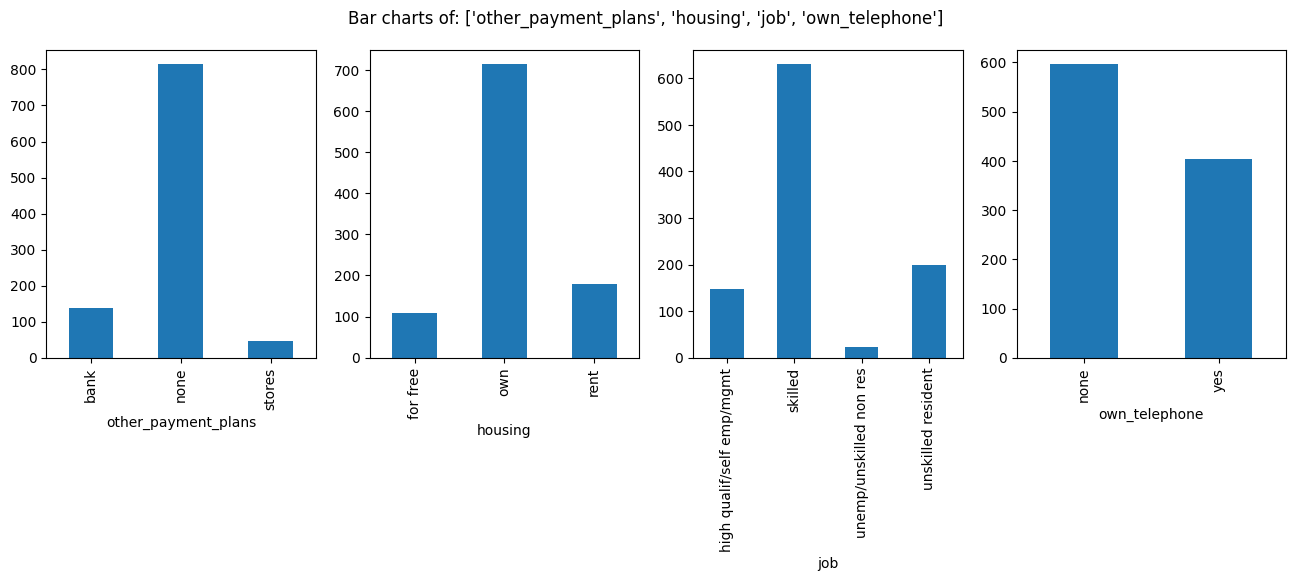

In [28]:
PlotBarGraphs(datain=df, 
              columns=RangePlot(8, 12))

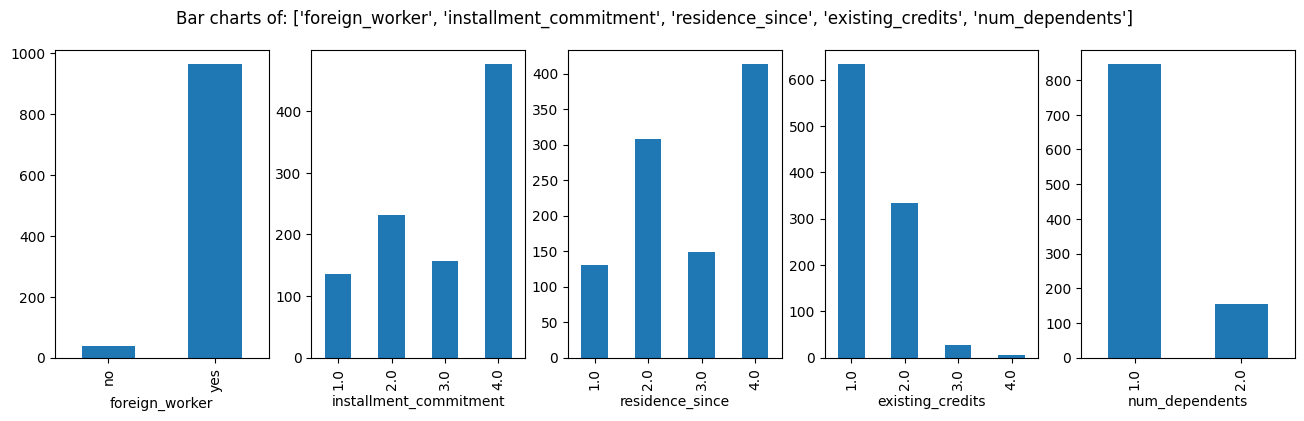

In [29]:
PlotBarGraphs(datain=df, 
              columns=RangePlot(12, 17))

####**Interpretation**

The intuition behind these graphs is to have the support that should allow us to select the most relevant features to include in our Machine Learning.

The ideal feature would be the one with fewer differences among the classes. Such as the column `property_magnitude`. The worse feature could be the one with the more imbalanced classes. For instance, the columns `foreign_worker` and `other_parties`. 

Although these visualizations are extremely useful, they are not enough alone to help confirm categorical variable selection for our ML. Some statistical tests will be necessary to get us to select those features.

Until now, we assume that we can select all the categorical variables for our model.

Now time to go over the **continuous variables**.

In [30]:
# First of all, list all the continuous variables.
# We recall our variable df_dtypes to filter out all the continuous from the series
dtypes_conti = df_dtypes[df_dtypes != "object"]
# We retrieve all the index
dtypes_contiIndex = dtypes_conti.index
# We iterate over the index to create a list of all the variables of the type object that are categorical
continuous_list = []
for obj in dtypes_contiIndex:
  continuous_list.append(obj)

continuous_list

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

We can easily spot our four recent friends from the categorical variables list. `installment_commitment`, `residence_since`, `existing_credits` and `num_dependents` are all categorical variables. We can safely remove them from our continuous_list variable.
 

In [31]:
for c in new_variables:
  continuous_list.remove(c)
continuous_list

['duration', 'credit_amount', 'age']

In [32]:
order =  ['1st', '2nd', '3rd and last']
for i, j in zip(order, continuous_list):
  print('Here is our', i, 'continuous variable :', j )

Here is our 1st continuous variable : duration
Here is our 2nd continuous variable : credit_amount
Here is our 3rd and last continuous variable : age


In [33]:
# This can help us verify that all items in our list are continuous variables.
df[continuous_list].head()

,duration,credit_amount,age
0,6.0,1169.0,67.0
1,48.0,5951.0,22.0
2,12.0,2096.0,49.0
3,42.0,7882.0,45.0
4,24.0,4870.0,53.0


Undoubtedly our `continuous_list` variable is reliable. Histograms will be appropriate to see how data are distributed across continuous variables.

**Histogram**<br>
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin.

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

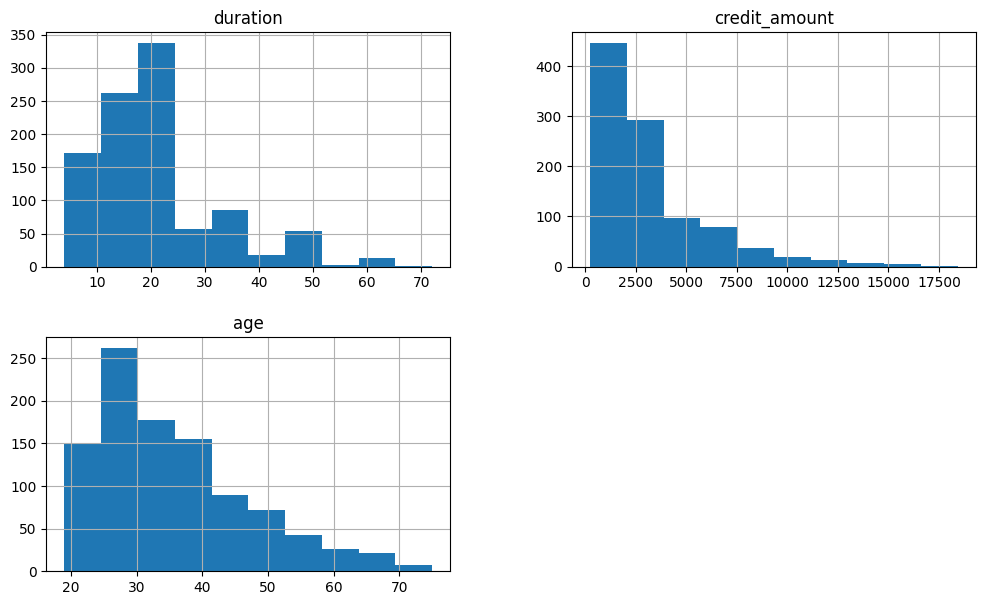

In [34]:
# Plotting histograms of the potential predictable continuous variables.
df.hist(continuous_list, figsize=(12,7))


####**Interpretation**
The x-axis shows the range of values, whereas the y-axis is the number of data points that have been assigned to each range.

A preferred histogram would be one that proves a bell curve or a slightly skewed bell curve. Only the variable age seems to display the bell curve, but it is a little skewed to the right.

Although all the distributions across the features are skewed, we can consider them all for our ML.


Now that we have our continuous variables and know their distributions are skewed, it is time to check for outliers. 

####**Outlier**

An outlier is a data point that differs significantly from other observations.

There are several ways to detect outliers in EDA. One way is to use a box plot. A box plot shows the median, quartiles, and outliers for a data set. 

Once you have detected outliers, you can decide what to do with them. You can choose to ignore them, remove them, or investigate them further.

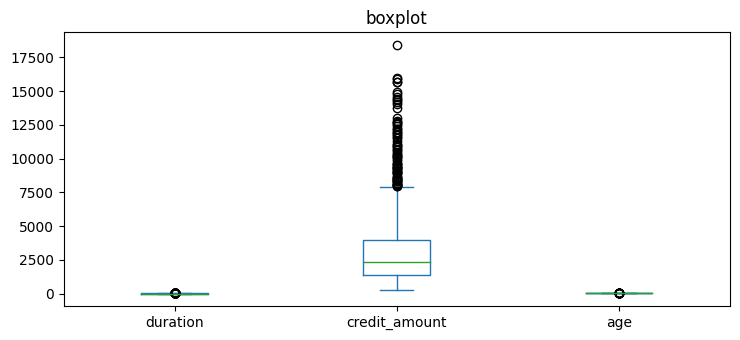

In [35]:
# Create boxplot

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
df[continuous_list].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

The boxplot above shows that there are outliers in all three variables.
It would be helpful to investigate how many rows in the data contain outliers in each column.

In [36]:
# Determine the number of rows containing outliers in the three variables 

for c in continuous_list:
  # Compute the 25th percentile value 
  percentile25 = df[c].quantile(0.25)
  # Compute the 75th percentile value 
  percentile75 = df[c].quantile(0.75)
  # Compute the interquartile range 
  iqr = percentile75 - percentile25
  
  # Define the upper limit and lower limit for non-outlier values
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  print("Lower limit:", lower_limit)
  print("Upper limit:", upper_limit)
  # Identify subset of data containing outliers 
  outliers = df[(df[c] > upper_limit) | (df[c] < lower_limit)]
  # Count how many rows in the data contain outliers
  print(f"Number of rows in the data containing outliers in {c}: {len(outliers)}")


Lower limit: -6.0
Upper limit: 42.0
Number of rows in the data containing outliers in duration: 70
Lower limit: -2544.625
Upper limit: 7882.375
Number of rows in the data containing outliers in credit_amount: 72
Lower limit: 4.5
Upper limit: 64.5
Number of rows in the data containing outliers in age: 23


The following table will summarize the lower limit, upper limit, and number of rows containing outliers for each variable in the dataset.

In [37]:
df_summary = pd.DataFrame({'variables' : continuous_list, 'Lower limit' : [-6.0, -2544.625, 4.5], 'Upper limit' : [42.0, 7882.375, 64.5], 'Number of rows' : [70, 72, 23]})
df_summary

,variables,Lower limit,Upper limit,Number of rows
0,duration,-6.000,42.000,70
1,credit_amount,-2544.625,7882.375,72
2,age,4.500,64.500,23


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, we will consider whether to remove these outliers based on the type of model we decide to use.


####**Features Selection**

Our goal is to predict whether a customer's loan credit would be a risk to the bank, which is a categorical outcome
variable. So this task involves classification. More specifically, this involves binary classification,
since the outcome variable class can be either 1 (means the loan was a good decision : *the borrower are likely to repay their loans*) or 0 (indicating the loan was a bad decision: *the possibility that the borrowers will default on the loan*).

Since the variable we want to predict is categorical,
we could either build a Logistic Regression model or a Tree-based Machine Learning model.


Now it's time to decide on the best features which are correlated to the Target variable. One of the best ways of doing this is by measuring the correlation values or ANOVA/Chi-Square tests.

Let's visualize variables before selecting features for our Machine Learning.

**Categorical vs continuous**

For categorical target and continuous predictor, we use boxplots and Anova test to analyze the relationship.

In [38]:
# It would be more appropriate to rename our target variable to credit_risk for easier interpretation.
df.rename(columns = {'class' : 'credit_risk'}, inplace = True)

# Now it's time to change the value of our target variable so Machine Learning can be easily applied.
value_change = {'bad' : 0, 'good' : 1}

# Now, update the value
df['credit_risk'] = df['credit_risk'].replace(value_change)

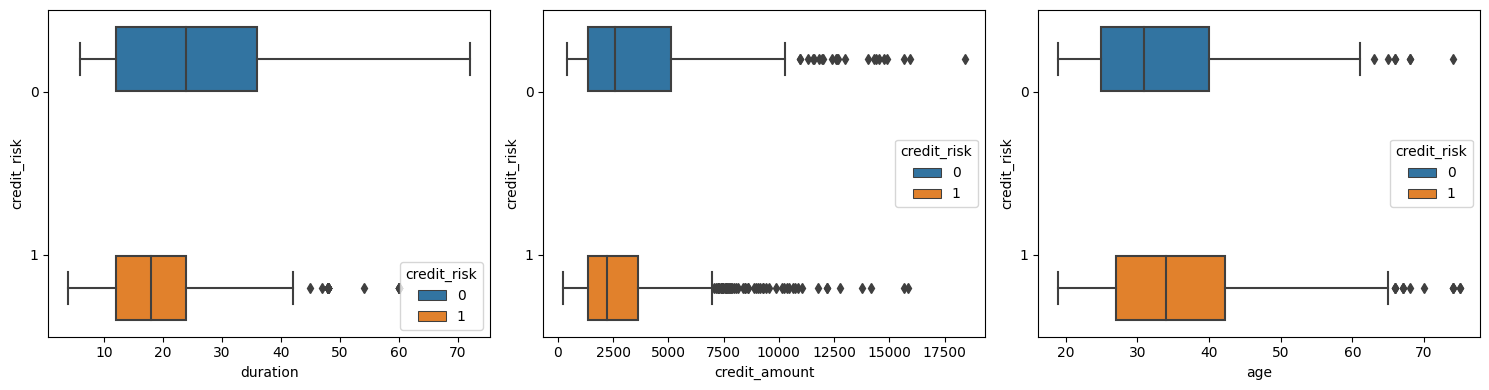

In [39]:
#   Box plots for Categorical Target Variable "credit_risk" and continuous predictors
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(continuous_list), figsize=(15,4))

# Creating box plots for each continuous predictor against the Target Variable "credit_risk"
for PredCol , i in zip(continuous_list, range(len(continuous_list))):
    sns.boxplot(data=df, x=PredCol, y='credit_risk', hue='credit_risk', orient="h", ax=PlotCanvas[i])

Boxplots Interpretation

Box plots are very useful in visualizing distributions within data. A uniform distribution across categories indicates that the continuous variable has no influence on the target variable. Therefore, the variables are not correlated to each other.

The variables `duration` and `credit_amount` strongly affect the `credit_risk`. Whereas `age` seems to have little correlation with `credit_risk`.

**Analysis of variance or ANOVA** helps examine the relationship between categorical variables and continuous variables.

**Statistical hypotheses**
Let’s review the steps for conducting a hypothesis test:

*   State the null hypothesis and the alternative hypothesis.
*   Choose a significance level.
*   Find the p-value.
*   Reject or fail to reject the null hypothesis.

State the null hypothesis and the alternative hypothesis.


*   Null hypothesis (H0): The given variable does not affect our target variable(which means there is no difference between the mean(average) across the categories in the variables). 
*   Alternative hypothesis (Ha): The given variable affect our target variable.




 

In [40]:
# Defining a function to find the statistical relationship between our target variable and all the continuous variables
def FunctionAnova(datain, TargetVariable, ContinuousPred):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    global SelectedContPredictors
    SelectedContPredictors=[]
    
    print('----> ANOVA Results <----- \n')
    for predictor in continuous_list:
        CategoryGroupLists=datain.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print("{} is correlated with {} | P-Value: {}".format(predictor, TargetVariable, AnovaResults[1]))
            SelectedContPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedContPredictors)

In [41]:
# Calling the function

FunctionAnova(datain=df, TargetVariable='credit_risk', ContinuousPred=continuous_list)

----> ANOVA Results <----- 

duration is correlated with credit_risk | P-Value: 6.488049877187189e-12
credit_amount is correlated with credit_risk | P-Value: 8.797572373533373e-07
age is correlated with credit_risk | P-Value: 0.003925339398278295


['duration', 'credit_amount', 'age']

In [42]:
SelectedContPredictors

['duration', 'credit_amount', 'age']

The results of ANOVA test support our initial visual analysis using the box plots.

Since the P-Value for all of our predictor variables is lower than 0.5, we are in measure to reject our H0 hypothesis. 
So all three variables affect our target variable `credit_risk`.

**Categorical vs categorical**

For categorical target and categorical predictor, we use barplots and Chi-square test to analyze the relationship.

When the variable change applies to more than one category and you want to compare categories. A grouped bar chart is a great place to start.

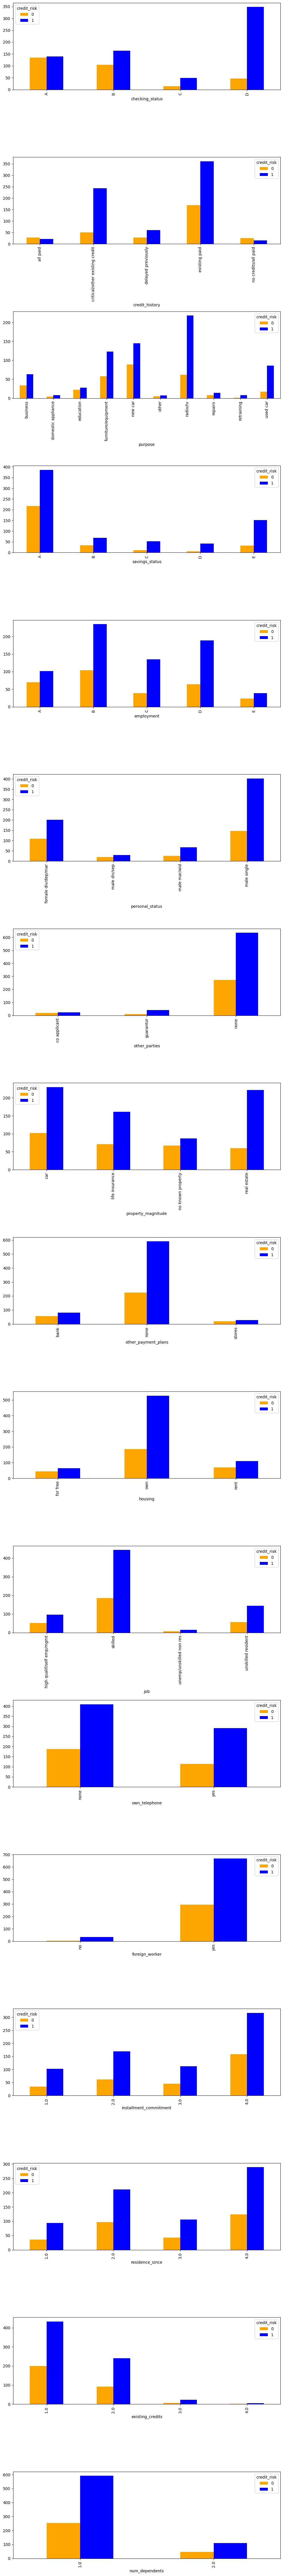

In [43]:
# Ploting grouped bar charts

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(object_list), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(object_list, range(len(object_list))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['credit_risk'])
    CrossTabResult.plot.bar(color=['orange','blue'], ax=PlotCanvas[i])

**Interpretation**<br>
The grouped bar chart above compares two target variable classes for the predictor. One bar cluster is plotted for each class(0,1), and in each cluster, one bar for each representative. Colors and positions are consistent within each cluster: for example, we can see that 1 is always in blue and plotted last.

 If the ratio of bars is similar across all categories, then the likelihood of the two columns not being correlated is obvious.

**The Chi-Squared Test for Independence**


Chi-squared (χ²) Test for Independence is a hypothesis test that determines whether or not two categorical variables are associated with each other.

State the null hypothesis and the alternative hypothesis.

Null hypothesis (H0): The given predictor variable is independent of our target variable.


Alternative hypothesis (Ha): The given predictor variable is not independent of our target variable.

In [44]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(datain, TargetVariable, CatVarList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    global SelectedCatPredictors
    SelectedCatPredictors=[]

    for predictor in CatVarList:
        CrossTabResult=pd.crosstab(index=datain[TargetVariable], columns=datain[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print("{} is correlated with {} | P-Value: {}".format(predictor, TargetVariable, ChiSqResult[1]))
            SelectedCatPredictors.append(predictor)
        else:
            print("{} is NOT correlated with {} | P-Value: {}".format(predictor, TargetVariable, ChiSqResult[1]))        
            
    return(SelectedCatPredictors)

In [45]:
# Calling the function
FunctionChisq(datain=df, 
              TargetVariable='credit_risk',
              CatVarList= object_list)

checking_status is correlated with credit_risk | P-Value: 1.2189020722893755e-26
credit_history is correlated with credit_risk | P-Value: 1.2791872956750918e-12
purpose is correlated with credit_risk | P-Value: 0.00011574910079691586
savings_status is correlated with credit_risk | P-Value: 2.761214238568249e-07
employment is correlated with credit_risk | P-Value: 0.0010454523491402541
personal_status is correlated with credit_risk | P-Value: 0.02223800546926877
other_parties is correlated with credit_risk | P-Value: 0.036055954027247206
property_magnitude is correlated with credit_risk | P-Value: 2.8584415733250017e-05
other_payment_plans is correlated with credit_risk | P-Value: 0.0016293178186473534
housing is correlated with credit_risk | P-Value: 0.00011167465374597684
job is NOT correlated with credit_risk | P-Value: 0.5965815918843431
own_telephone is NOT correlated with credit_risk | P-Value: 0.2788761543035742
foreign_worker is correlated with credit_risk | P-Value: 0.015830754

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'foreign_worker']

We reject all the null hypothesis for all the variables that have a P-value lower than 0.5, which indicates there is evidence that the predictor and the target variable are independent, On the other hand, we fail to reject the null hypothesis for the variable with P-Value greater than 0.5. 

In [46]:
print("The following categorical variables are all selected for using in our model since they can be using to predict wheter a customer credit is risky. \n {}".format(SelectedCatPredictors))

The following categorical variables are all selected for using in our model since they can be using to predict wheter a customer credit is risky. 
 ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'foreign_worker']


Now that we have been running all the necessary statistical tests for selecting variables to use in our model, we are confident about the variables to include in the Machine Learning. Now time to construct the data frame containing all selected predictor features and the target outcome. 

In [47]:
selectedvariables =[]
for variables in SelectedCatPredictors:
  selectedvariables.append(variables)
selectedvariables.extend(SelectedContPredictors)
selectedvariables

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'foreign_worker',
 'duration',
 'credit_amount',
 'age']

In [48]:
selectedvariables.append('credit_risk')

In [49]:
df_model = df[selectedvariables]
df_model.head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,foreign_worker,duration,credit_amount,age,credit_risk
0,A,critical/other existing credit,radio/tv,E,D,male single,none,real estate,none,own,yes,6.0,1169.0,67.0,1
1,B,existing paid,radio/tv,A,B,female div/dep/mar,none,real estate,none,own,yes,48.0,5951.0,22.0,0
2,D,critical/other existing credit,education,A,C,male single,none,real estate,none,own,yes,12.0,2096.0,49.0,1
3,A,existing paid,furniture/equipment,A,C,male single,guarantor,life insurance,none,for free,yes,42.0,7882.0,45.0,1
4,A,delayed previously,new car,A,B,male single,none,no known property,none,for free,yes,24.0,4870.0,53.0,0


In [50]:
df_model.shape

(1000, 15)

####**Data preprocessing**

This task includes but is not limited only to this. <br>
* Converting the binary nominal variable to numeric using 1/0 mapping.
* Converting nominal variables to numeric using `get_dummies()`

In [51]:
# The following lines of code will help us identify all the binary variables. 
binaryList = []
for qty in selectedvariables:
  if len(df_model[qty].value_counts())==2:
    binaryList.append(qty)
binaryList

['foreign_worker', 'credit_risk']

In [52]:
# Let's take a look at these columns 
df_model[binaryList].head()

,foreign_worker,credit_risk
0,yes,1
1,yes,0
2,yes,1
3,yes,1
4,yes,0


Since `credit_risk` is our targeted variable and already encoded, we will process only the `foreign_worker`.

In [53]:
df_model['foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

In [54]:
df_model['foreign_worker'].replace({'yes':1, 'no':0}, inplace=True)

<ipython-input-54-a388c9a2e9a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['foreign_worker'].replace({'yes':1, 'no':0}, inplace=True)


Now, we apply one-hot encoding for all the categorical variables as needed.

In [55]:
df_readyML=pd.get_dummies(df_model)

In [56]:
df_readyML.head()

,foreign_worker,duration,credit_amount,age,credit_risk,checking_status_A,checking_status_B,checking_status_C,checking_status_D,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_A,savings_status_B,savings_status_C,savings_status_D,savings_status_E,employment_A,employment_B,employment_C,employment_D,employment_E,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent
0,1,6.0,1169.0,67.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,1,48.0,5951.0,22.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,12.0,2096.0,49.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1,42.0,7882.0,45.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
4,1,24.0,4870.0,53.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0


###**Machine Learning**
Identify the types of models most appropriate for this task.
Since the variable we want to predict (whether a loan will be a risk to the bank.) is categorical,
we could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So we could proceed with one of the two following approaches. We will implement both and determine how they compare.


####**A: Logistic Regression Model**


Logistic regression suits the task because it involves
binary classification.

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove
**the outliers** in all three columns that were identified earlier.



In [57]:
#Let's recall our table summarizing the outliers
df_summary.head()

,variables,Lower limit,Upper limit,Number of rows
0,duration,-6.000,42.000,70
1,credit_amount,-2544.625,7882.375,72
2,age,4.500,64.500,23


In [58]:
# Defining upper limit and lower limit
upper_limitDuration = df_summary.iloc[0,2]
lower_limitDuration = df_summary.iloc[0,1]
upper_limitCredit_amount = df_summary.iloc[1,2]
lower_limitCredit_amount = df_summary.iloc[1,1]
upper_limitage = df_summary.iloc[2,2]
lower_limitage = df_summary.iloc[2,1]

# Select rows without outliers in the three columns and save resulting dataframe in a␣new variable
df_logreg = df_readyML[(df_readyML['duration'] >= lower_limitDuration) & (df_readyML['duration'] <= upper_limitDuration)]
df_logreg = df_logreg[(df_readyML['credit_amount'] >= lower_limitCredit_amount) & (df_readyML['credit_amount'] <= upper_limitCredit_amount)]
df_logreg = df_logreg[(df_readyML['age'] >= lower_limitage) & (df_readyML['age'] <= upper_limitage)]
# Display first few rows of new dataframe
df_logreg.head()


<ipython-input-58-572e57abc209>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_logreg = df_logreg[(df_readyML['credit_amount'] >= lower_limitCredit_amount) & (df_readyML['credit_amount'] <= upper_limitCredit_amount)]
<ipython-input-58-572e57abc209>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_logreg = df_logreg[(df_readyML['age'] >= lower_limitage) & (df_readyML['age'] <= upper_limitage)]


,foreign_worker,duration,credit_amount,age,credit_risk,checking_status_A,checking_status_B,checking_status_C,checking_status_D,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_A,savings_status_B,savings_status_C,savings_status_D,savings_status_E,employment_A,employment_B,employment_C,employment_D,employment_E,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent
2,1,12.0,2096.0,49.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1,42.0,7882.0,45.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
4,1,24.0,4870.0,53.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
6,1,24.0,2835.0,53.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
7,1,36.0,6948.0,35.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1


In [59]:
print(f"Before removing outliers \n \b Shape: {df_readyML.shape} \n \b size : {df_readyML.size} \n") 
print(f"After removing outliers \n \b Shape: {df_logreg.shape} \n \b size : {df_logreg.size}")

Before removing outliers 
  Shape: (1000, 51) 
  size : 51000 

After removing outliers 
  Shape: (862, 51) 
  size : 43962


**Evaluation metric**

Before modeling, we must decide on an evaluation metric.

Let's examine the class balance of our target variable.

In [60]:
df_logreg.groupby('credit_risk').size()

credit_risk
0    228
1    634
dtype: int64

<Axes: xlabel='credit_risk'>

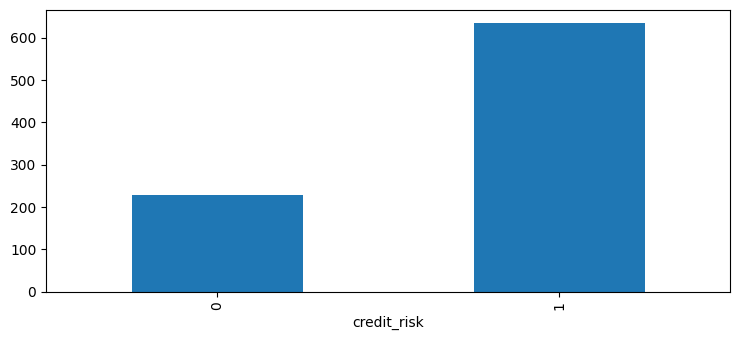

In [61]:
df_logreg.groupby('credit_risk').size().plot(kind='bar')

Approximately 1/4 of the customer's loan will not be a risk to the bank. The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:

* False positives -> The model predicts a customer credit as fine, but the customer credit would be actually a risk.
* False negatives -> The model predicts a customer credit as a risk(bad), but the customer credit would be ok.

False positives are worse for the organization because a customer credit predicted as good credit when it's not can lead to late payments, chargebacks, and even bankruptcy.

**Precision** measures the proportion of data points predicted as True that are actually True,
in other words, the proportion of positive predictions that are true positives.

#####**Modeling**

#####**Split the data**


Now we are ready to model. The only remaining step is to split the data into features/target variable and training/testing data.
1. Define a variable y that isolates the target variable ( `credit_risk` ).
2. Define a variable X that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.


In [62]:
# Isolate target variable (y)
y = df_logreg['credit_risk']
# Isolate the features (X)
X = df_logreg.drop('credit_risk', axis=1)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [63]:
print(f'train samples: {len(X_train)}')
print(f'test samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')


train samples: 689
test samples: 173
target proportion: 0.7358


In [64]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [65]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

We Create a confusion matrix to visualize the results of the logistic regression model.

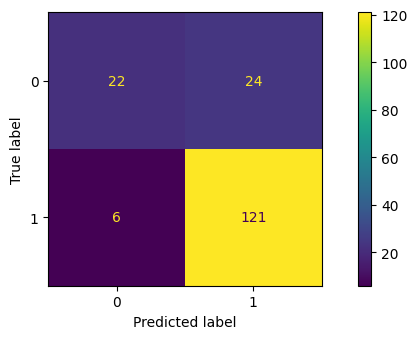

In [66]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
# Plot confusion matrix
log_disp.plot()
# Display plot
plt.show()


We will create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. 
Since this is a binary classification task, the class balance informs the way we interpret accuracy
metrics.


In [67]:
df_logreg['credit_risk'].value_counts(normalize=True)


1    0.735499
0    0.264501
Name: credit_risk, dtype: float64

There is an approximately 74%-26% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we can use this data without modifying the class balance and continue evaluating the model.

In [68]:
# Create classification report for logistic regression model
target_names = ['Predicted customer as bad credit', 'Predicted customer good credit']
print(classification_report(y_test, y_pred, target_names=target_names))

                                  precision    recall  f1-score   support

Predicted customer as bad credit       0.79      0.48      0.59        46
  Predicted customer good credit       0.83      0.95      0.89       127

                        accuracy                           0.83       173
                       macro avg       0.81      0.72      0.74       173
                    weighted avg       0.82      0.83      0.81       173



The classification report above shows that the logistic regression model achieved a precision of 82%,
recall of 83%, f1-score of 81% (all weighted averages), and accuracy of 83%.


####**B: Tree-based Model**

This approach covers implementation of Decision Tree, Random Forest,  and XGBoost.

Isolate the outcome variable and the features.

In [69]:

# Isolate the outcome variable
y = df_readyML['credit_risk']
# Display the first few rows of `y`
y.head()


0    1
1    0
2    1
3    1
4    0
Name: credit_risk, dtype: int64

In [70]:
# Select the features
X = df_readyML.drop('credit_risk', axis=1)
# Display the first few rows of `X`
X.head()


,foreign_worker,duration,credit_amount,age,checking_status_A,checking_status_B,checking_status_C,checking_status_D,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_A,savings_status_B,savings_status_C,savings_status_D,savings_status_E,employment_A,employment_B,employment_C,employment_D,employment_E,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent
0,1,6.0,1169.0,67.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,1,48.0,5951.0,22.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,12.0,2096.0,49.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1,42.0,7882.0,45.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
4,1,24.0,4870.0,53.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0


Split the data into training, validating, and testing sets.

In [71]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)


In [72]:
print(f'train samples: {len(X_tr)}')
print(f'validation samples: {len(X_val)}')
print(f'test samples: {len(X_test)}')
print(f'target proportion: {sum(y_tr)/len(y_tr):.2f}')


train samples: 600
validation samples: 200
test samples: 200
target proportion: 0.70


#####**Decision tree** 
Construct a decision tree model and set up cross-validated grid-search
to exhuastively search for the best model parameters.

There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them.
The hyperparameters we will use and investigate here are:

* min_samples_split: The minimum number of samples required to split an internal node.
 * Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
* min_samples_leaf: min_samples_leaf defines the minimum number of samples that must be in each child nodes after the parent splits.
* max_depth: The maximum depth of the tree.
 * Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [73]:
min_samples_split_list = [2, 5, 10, 30, 50, 100, 200, 300, 700]
min_samples_leaf_list = [2, 5, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.


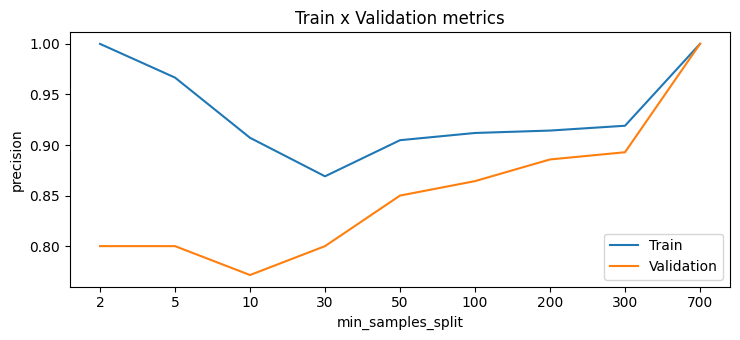

In [74]:
precision_list_train = []
precision_list_val = []
for min_samples_split in min_samples_split_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = DecisionTreeClassifier(min_samples_split = min_samples_split,
  random_state = 0).fit(X_tr,y_tr)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the test dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('precision')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])


min_samples_split from 200 to 300 provides the best range where its value should be picked.

After we can see all the values except for 10 and 30 are prone to overfit the model.

300 is the value that brings the training precision closer to validating precision.

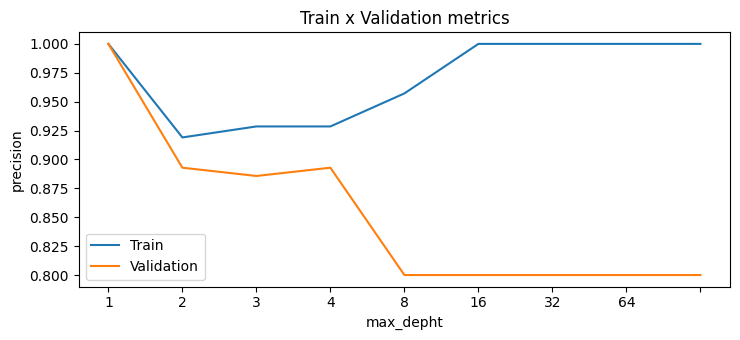

In [75]:
precision_list_train = []
precision_list_val = []
for max_depth in max_depth_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = DecisionTreeClassifier(max_depth = max_depth,
  random_state = 0).fit(X_tr,y_tr)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the test dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('max_depht')
plt.ylabel('precision')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])

We can see that reducing max_depth can help to reduce overfitting, but until reaching a certain threshold in this graph. 

2 and 4 increases validation accuracy, while 2 slightly reducing training accuracy. 




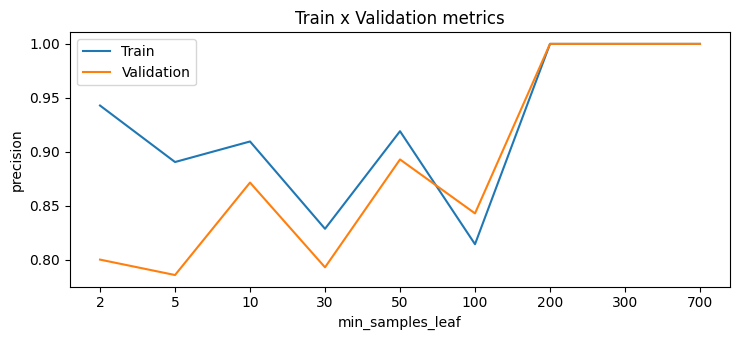

In [76]:
precision_list_train = []
precision_list_val = []
for min_samples_leaf in min_samples_leaf_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf,
  random_state = 0).fit(X_tr,y_tr)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the test dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('precision')
plt.xticks(ticks = range(len(min_samples_leaf_list)),labels=min_samples_leaf_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])

So the best values for these three hyper-parameters to be:  
 * max_depth = 2 
 * min_samples_split = 30
 * min_samples_leaf = 50

Now, based on these values we can try hyperparameter tuning in order to find the best combinations.

In [77]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2, 4, None],
'min_samples_leaf': [10, 50],
'min_samples_split': [200, 300]
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='precision')


Fit the decision tree model to the training data.

In [78]:
%%time
tree1.fit(X_tr, y_tr)


CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.17 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, None],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [200, 300]},
             refit='precision',
             scoring={'roc_auc', 'f1', 'accuracy', 'recall', 'precision'})

Identify the optimal values for the decision tree parameters.

In [79]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 200}

Identify the best AUC score achieved by the decision tree model on the training set.

In [80]:
# Check best AUC score on CV
tree1.best_score_


0.7763665019039306

In [81]:
def make_results(model_name:str, model_object, metric:str):
  '''
  Arguments:
  model_name (string): what you want the model to be called in the output table
  model_object: a fit GridSearchCV object
  metric (string): precision, recall, f1, accuracy, or auc
  Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
  for the model with the best mean 'metric' score across all validation folds.
  '''
  # Create dictionary that maps input metric to actual metric name in GridSearchCV
  metric_dict = {'auc': 'mean_test_roc_auc',
                'precision': 'mean_test_precision',
                'recall': 'mean_test_recall',
                'f1': 'mean_test_f1',
                'accuracy': 'mean_test_accuracy',
                }
  # Get all the results from the CV and put them in a df
  cv_results = pd.DataFrame(model_object.cv_results_)
  # Isolate the row of the df with the max(metric) score
  best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
  # Extract Accuracy, precision, recall, and f1 score from that row
  auc = best_estimator_results.mean_test_roc_auc
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy
  # Create table of results
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
  ignore_index=True
  )
  return table

Use the function just defined to get all the scores from grid search.

In [82]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results


<ipython-input-81-13722904cb91>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.707672,0.776367,0.8,0.787365,0.698333


These scores from the decision tree model are indicators of good model performance. Now Let's check how our model predicts.

In [83]:
print(f"Metrics train:\n\tprecision score: {precision_score(tree1.predict(X_tr),y_tr):.4f}")
print(f"Metrics validation:\n\tprecision score: {precision_score(tree1.predict(X_val),y_val):.4f}")

Metrics train:
	precision score: 0.9190
Metrics validation:
	precision score: 0.8929


Clearly, our model performs better on the training rather than the validation set. This may be interpreted as a sign of overfitting.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. We could construct a random forest model next.


#####**Random forest** 
Now let’s try the Random Forest algorithm also. All of the
hyperparameters found in the decision tree model will also exist in this algorithm, since a random
forest is an ensemble of many Decision Trees. 

One additional hyperparameter for Random Forest
is called n_estimators which is the number of Decision Trees that make up the Random Forest.


In [84]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
min_samples_leaf_list = [2, 5, 10, 30, 50, 100, 200, 300, 700]
n_estimators_list = [10, 50, 100, 300, 500]

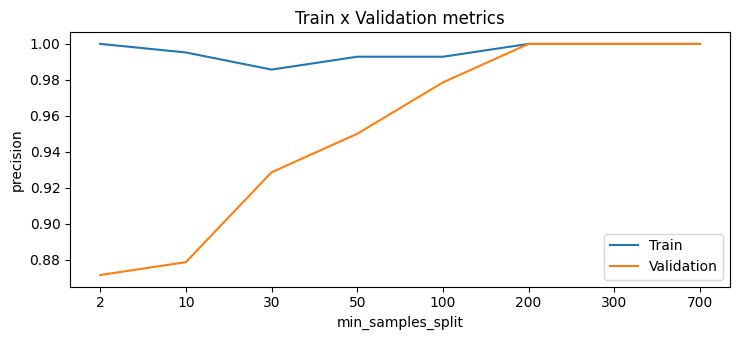

In [85]:
precision_list_train = []
precision_list_val = []
for min_samples_split in min_samples_split_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = RandomForestClassifier(min_samples_split = min_samples_split,
random_state = 0).fit(X_tr,y_tr)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the test dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('precision')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])

min_samples_split = 100

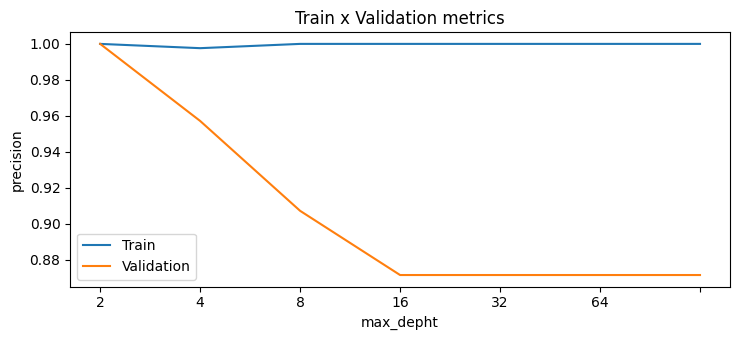

In [86]:
precision_list_train = []
precision_list_val = []
for max_depth in max_depth_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = RandomForestClassifier(max_depth = max_depth, random_state = 0).fit(X_tr,y_tr)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the val dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('max_depht')
plt.ylabel('precision')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])

max_depth = ]2, 4]

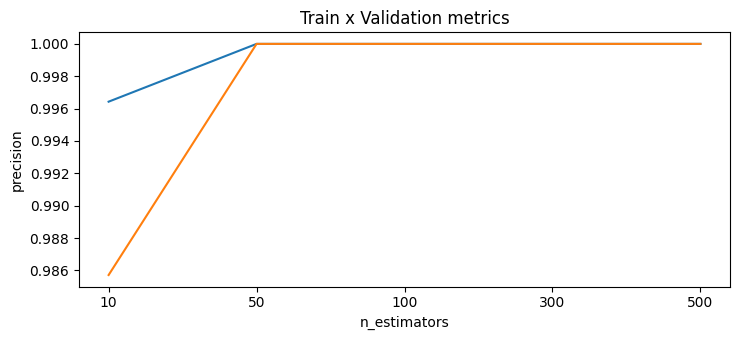

In [87]:
precision_list_train = []
precision_list_val = []
for n_estimators in n_estimators_list:
# You can fit the model at the same time you define it, because the fitfunction returns the fitted estimator.
  model = RandomForestClassifier(n_estimators = n_estimators,
  random_state = 0).fit(X_train,y_train)
  predictions_train = model.predict(X_train) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the val dataset
  precision_train = precision_score(predictions_train,y_train)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('precision')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)

n_estimators = [100, 300, 500]

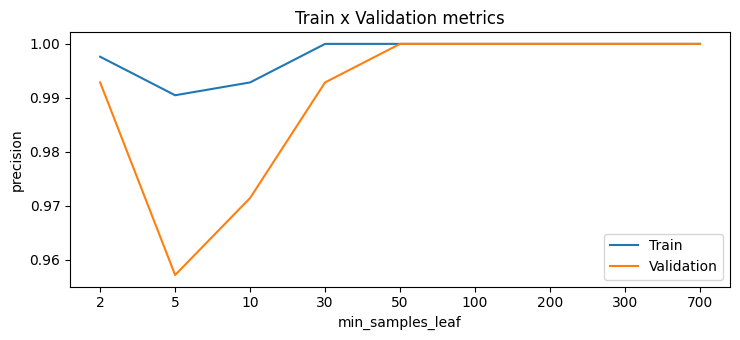

In [88]:
precision_list_train = []
precision_list_val = []
for min_samples_leaf in min_samples_leaf_list:
# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
  model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
  random_state = 0).fit(X_train,y_train)
  predictions_train = model.predict(X_tr) ## The predicted values for the train dataset
  predictions_val = model.predict(X_val) ## The predicted values for the test dataset
  precision_train = precision_score(predictions_train,y_tr)
  precision_val = precision_score(predictions_val,y_val)
  precision_list_train.append(precision_train)
  precision_list_val.append(precision_val)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('precision')
plt.xticks(ticks = range(len(min_samples_leaf_list)),labels=min_samples_leaf_list)
plt.plot(precision_list_train)
plt.plot(precision_list_val)
plt.legend(['Train','Validation'])

In [89]:
 # Instantiate model
rf = RandomForestClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 4, None],
'max_features': [1.0],
'max_samples': [0.7,0.8, 0.9, 1.0],
'min_samples_leaf': [10],
'min_samples_split': [100],
'n_estimators': [100, 300, 500],
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='precision')

In [90]:
%%time
rf1.fit(X_tr, y_tr)

CPU times: user 2min 27s, sys: 693 ms, total: 2min 27s
Wall time: 2min 44s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, None], 'max_features': [1.0],
                         'max_samples': [0.7, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [10], 'min_samples_split': [100],
                         'n_estimators': [100, 300, 500]},
             refit='precision',
             scoring={'roc_auc', 'f1', 'accuracy', 'recall', 'precision'})

In [91]:
# Define a path to the folder where you want to save the model
path='/content/drive/MyDrive/Portfolio DA'

In [92]:
def write_pickle(path, model_object, save_as:str):
  '''
  In:
  path: path of folder where you want to save the pickle
  model_object: a model you want to pickle
  save_as: filename for how you want to save the model
  Out: A call to pickle the model in the folder indicated
  '''
  with open(path + save_as + '.pickle', 'wb') as to_write:
    pickle.dump(model_object, to_write)


In [93]:
def read_pickle(path, saved_model_name:str):
  '''
  In:
  path: path to folder where you want to read from
  saved_model_name: filename of pickled model you want to read in
  Out:
  model: the pickled model
  '''
  with open(path + saved_model_name + '.pickle', 'rb') as to_read:
    model = pickle.load(to_read)
  return model


Use the functions defined above to save the model in a pickle file and then read it in.

In [94]:
# Write pickle
#write_pickle(path, rf1, 'cc_rf1')

In [95]:
# Read pickle
#rf1 = read_pickle(path, 'cc_rf1')

Identify the best precision achieved by the random forest model on the training set.

In [96]:
# Check best precision score on CV
rf1.best_score_

0.7507669516345512

Identify the optimal values for the parameters of the random forest model.


In [97]:
# Check best params
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 300}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [98]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'precision')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision  Recall        F1  Accuracy
0  decision tree cv  0.707672   0.776367     0.8  0.787365  0.698333
              Model       AUC  Precision    Recall       F1  Accuracy
0  random forest cv  0.741667   0.750767  0.919048  0.82637      0.73


<ipython-input-81-13722904cb91>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The evaluation scores of the random forest model are better than those of the decision tree model. It's unfortunate that we're only falling short in the area we're most interested in - precision. This indicates that the random forest model mostly outperforms the decision tree model.

Some predictions may give us an idea of how our Random Forest model performs on both the training and validation set.

In [99]:
print(f"Metrics train:\n\tprecision score: {precision_score(rf1.predict(X_tr),y_tr):.4f}")
print(f"Metrics validation:\n\tprecision score: {precision_score(rf1.predict(X_val),y_val):.4f}")

Metrics train:
	precision score: 0.9405
Metrics validation:
	precision score: 0.9071


This model also performs better on the training set than the validation set. Typically, it may be a sign of overfitting.  

Let's define a function that gets all the scores from a model’s predictions.

In [100]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
  '''
  Generate a table of test scores.
  In:
  model_name (string): How you want your model to be named in the output␣
  ,→table
  model: A fit GridSearchCV object
  X_test_data: numpy array of X_test data
  y_test_data: numpy array of y_test data
  Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
  '''
  preds = model.best_estimator_.predict(X_test_data)
  auc = round(roc_auc_score(y_test_data, preds), 3)
  accuracy = round(accuracy_score(y_test_data, preds), 3)
  precision = round(precision_score(y_test_data, preds), 3)
  recall = round(recall_score(y_test_data, preds), 3)
  f1 = round(f1_score(y_test_data, preds), 3)
  table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision],
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  return table

Apply the function defined above to get scores for the decision tree model and the random forest
model.


In [101]:
# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)
# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='precision', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.595,0.747,0.907,0.819,0.72
0,decision tree1 val,0.571,0.735,0.893,0.806,0.70


On the validation set, the random forest model outperforms the decision tree model across all metrics.

#####**XGBoost model**
Let's examine the possibility of improving our scores using an XGBoost model.


In [114]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,3,4],
'min_child_weight': [3,5,10],
'learning_rate': [0.01,0.06,0.08,0.1],
'n_estimators': [300,500]
}
# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# 4. Instantiate the GridSearchCV object
xgb_cv1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='precision')

In [115]:
%%time
xgb_cv1.fit(X_tr, y_tr, eval_set = [(X_val,y_val)], early_stopping_rounds = 10)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69078
[1]	validation_0-logloss:0.68846
[2]	validation_0-logloss:0.68619
[3]	validation_0-logloss:0.68396
[4]	validation_0-logloss:0.68178
[5]	validation_0-logloss:0.67964
[6]	validation_0-logloss:0.67754
[7]	validation_0-logloss:0.67548
[8]	validation_0-logloss:0.67346
[9]	validation_0-logloss:0.67149
[10]	validation_0-logloss:0.66955
[11]	validation_0-logloss:0.66764
[12]	validation_0-logloss:0.66578
[13]	validation_0-logloss:0.66394
[14]	validation_0-logloss:0.66215
[15]	validation_0-logloss:0.66034
[16]	validation_0-logloss:0.65861
[17]	validation_0-logloss:0.65687
[18]	validation_0-logloss:0.65520
[19]	validation_0-logloss:0.65352
[20]	validation_0-logloss:0.65192
[21]	validation_0-logloss:0.65030
[22]	validation_0-logloss:0.64871
[23]	validation_0-logloss:0.64719
[24]	validation_0-logloss:0.64572
[25]	validation_0-logloss:0.64412
[26]	validation_0-logloss:0.64272
[27]	validation_0-logloss:0.64131
[28]	validation_0-logloss:0.63993
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69078
[1]	validation_0-logloss:0.68846
[2]	validation_0-logloss:0.68619
[3]	validation_0-logloss:0.68397
[4]	validation_0-logloss:0.68179
[5]	validation_0-logloss:0.67965
[6]	validation_0-logloss:0.67756
[7]	validation_0-logloss:0.67551
[8]	validation_0-logloss:0.67350
[9]	validation_0-logloss:0.67153
[10]	validation_0-logloss:0.66960
[11]	validation_0-logloss:0.66770
[12]	validation_0-logloss:0.66585
[13]	validation_0-logloss:0.66403
[14]	validation_0-logloss:0.66224
[15]	validation_0-logloss:0.66049
[16]	validation_0-logloss:0.65877
[17]	validation_0-logloss:0.65709
[18]	validation_0-logloss:0.65544
[19]	validation_0-logloss:0.65382
[20]	validation_0-logloss:0.65223
[21]	validation_0-logloss:0.65067
[22]	validation_0-logloss:0.64914
[23]	validation_0-logloss:0.64764
[24]	validation_0-logloss:0.64617
[25]	validation_0-logloss:0.64472
[26]	validation_0-logloss:0.64330
[27]	validation_0-logloss:0.64191
[28]	validation_0-logloss:0.64055
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69074
[1]	validation_0-logloss:0.68838
[2]	validation_0-logloss:0.68607
[3]	validation_0-logloss:0.68381
[4]	validation_0-logloss:0.68158
[5]	validation_0-logloss:0.67947
[6]	validation_0-logloss:0.67733
[7]	validation_0-logloss:0.67530
[8]	validation_0-logloss:0.67324
[9]	validation_0-logloss:0.67129
[10]	validation_0-logloss:0.66931
[11]	validation_0-logloss:0.66743
[12]	validation_0-logloss:0.66553
[13]	validation_0-logloss:0.66372
[14]	validation_0-logloss:0.66189
[15]	validation_0-logloss:0.66015
[16]	validation_0-logloss:0.65839
[17]	validation_0-logloss:0.65671
[18]	validation_0-logloss:0.65502
[19]	validation_0-logloss:0.65340
[20]	validation_0-logloss:0.65163
[21]	validation_0-logloss:0.65007
[22]	validation_0-logloss:0.64850
[23]	validation_0-logloss:0.64681
[24]	validation_0-logloss:0.64535
[25]	validation_0-logloss:0.64372
[26]	validation_0-logloss:0.64230
[27]	validation_0-logloss:0.64073
[28]	validation_0-logloss:0.63937
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.66088
[14]	validation_0-logloss:0.65888
[15]	validation_0-logloss:0.65691
[16]	validation_0-logloss:0.65503
[17]	validation_0-logloss:0.65304
[18]	validation_0-logloss:0.65123
[19]	validation_0-logloss:0.64938
[20]	validation_0-logloss:0.64758
[21]	validation_0-logloss:0.64577
[22]	validation_0-logloss:0.64410
[23]	validation_0-logloss:0.64230
[24]	validation_0-logloss:0.64066
[25]	validation_0-logloss:0.63891
[26]	validation_0-logloss:0.63733
[27]	validation_0-logloss:0.63571
[28]	validation_0-logloss:0.63418
[29]	validation_0-logloss:0.63254
[30]	validation_0-logloss:0.63109
[31]	validation_0-logloss:0.62955
[32]	validation_0-logloss:0.62806
[33]	validation_0-logloss:0.62657
[34]	validation_0-logloss:0.62521
[35]	validation_0-logloss:0.62371
[36]	validation_0-logloss:0.62237
[37]	validation_0-logloss:0.62104
[38]	validation_0-logloss:0.61969
[39]	validation_0-logloss:0.61833
[40]	validation_0-logloss:0.61698
[41]	validation_0-logloss:0.61569
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.63704
[31]	validation_0-logloss:0.63572
[32]	validation_0-logloss:0.63442
[33]	validation_0-logloss:0.63316
[34]	validation_0-logloss:0.63184
[35]	validation_0-logloss:0.63056
[36]	validation_0-logloss:0.62939
[37]	validation_0-logloss:0.62802
[38]	validation_0-logloss:0.62685
[39]	validation_0-logloss:0.62566
[40]	validation_0-logloss:0.62451
[41]	validation_0-logloss:0.62344
[42]	validation_0-logloss:0.62225
[43]	validation_0-logloss:0.62104
[44]	validation_0-logloss:0.61992
[45]	validation_0-logloss:0.61888
[46]	validation_0-logloss:0.61787
[47]	validation_0-logloss:0.61685
[48]	validation_0-logloss:0.61573
[49]	validation_0-logloss:0.61476
[50]	validation_0-logloss:0.61374
[51]	validation_0-logloss:0.61281
[52]	validation_0-logloss:0.61179
[53]	validation_0-logloss:0.61092
[54]	validation_0-logloss:0.61000
[55]	validation_0-logloss:0.60895
[56]	validation_0-logloss:0.60808
[57]	validation_0-logloss:0.60724
[58]	validation_0-logloss:0.60639
[59]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.65223
[21]	validation_0-logloss:0.65067
[22]	validation_0-logloss:0.64914
[23]	validation_0-logloss:0.64764
[24]	validation_0-logloss:0.64617
[25]	validation_0-logloss:0.64472
[26]	validation_0-logloss:0.64330
[27]	validation_0-logloss:0.64191
[28]	validation_0-logloss:0.64055
[29]	validation_0-logloss:0.63921
[30]	validation_0-logloss:0.63790
[31]	validation_0-logloss:0.63661
[32]	validation_0-logloss:0.63534
[33]	validation_0-logloss:0.63410
[34]	validation_0-logloss:0.63288
[35]	validation_0-logloss:0.63168
[36]	validation_0-logloss:0.63051
[37]	validation_0-logloss:0.62935
[38]	validation_0-logloss:0.62822
[39]	validation_0-logloss:0.62699
[40]	validation_0-logloss:0.62590
[41]	validation_0-logloss:0.62471
[42]	validation_0-logloss:0.62365
[43]	validation_0-logloss:0.62262
[44]	validation_0-logloss:0.62149
[45]	validation_0-logloss:0.62049
[46]	validation_0-logloss:0.61951
[47]	validation_0-logloss:0.61841
[48]	validation_0-logloss:0.61747
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.66189
[15]	validation_0-logloss:0.66015
[16]	validation_0-logloss:0.65839
[17]	validation_0-logloss:0.65671
[18]	validation_0-logloss:0.65502
[19]	validation_0-logloss:0.65340
[20]	validation_0-logloss:0.65163
[21]	validation_0-logloss:0.65007
[22]	validation_0-logloss:0.64850
[23]	validation_0-logloss:0.64681
[24]	validation_0-logloss:0.64535
[25]	validation_0-logloss:0.64372
[26]	validation_0-logloss:0.64230
[27]	validation_0-logloss:0.64073
[28]	validation_0-logloss:0.63937
[29]	validation_0-logloss:0.63785
[30]	validation_0-logloss:0.63654
[31]	validation_0-logloss:0.63521
[32]	validation_0-logloss:0.63381
[33]	validation_0-logloss:0.63253
[34]	validation_0-logloss:0.63118
[35]	validation_0-logloss:0.62994
[36]	validation_0-logloss:0.62863
[37]	validation_0-logloss:0.62744
[38]	validation_0-logloss:0.62618
[39]	validation_0-logloss:0.62499
[40]	validation_0-logloss:0.62386
[41]	validation_0-logloss:0.62258
[42]	validation_0-logloss:0.62153
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.64066
[25]	validation_0-logloss:0.63891
[26]	validation_0-logloss:0.63733
[27]	validation_0-logloss:0.63571
[28]	validation_0-logloss:0.63418
[29]	validation_0-logloss:0.63254
[30]	validation_0-logloss:0.63109
[31]	validation_0-logloss:0.62955
[32]	validation_0-logloss:0.62806
[33]	validation_0-logloss:0.62657
[34]	validation_0-logloss:0.62521
[35]	validation_0-logloss:0.62371
[36]	validation_0-logloss:0.62237
[37]	validation_0-logloss:0.62104
[38]	validation_0-logloss:0.61969
[39]	validation_0-logloss:0.61833
[40]	validation_0-logloss:0.61698
[41]	validation_0-logloss:0.61569
[42]	validation_0-logloss:0.61448
[43]	validation_0-logloss:0.61311
[44]	validation_0-logloss:0.61188
[45]	validation_0-logloss:0.61055
[46]	validation_0-logloss:0.60941
[47]	validation_0-logloss:0.60815
[48]	validation_0-logloss:0.60687
[49]	validation_0-logloss:0.60578
[50]	validation_0-logloss:0.60462
[51]	validation_0-logloss:0.60349
[52]	validation_0-logloss:0.60240
[53]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.63704
[31]	validation_0-logloss:0.63576
[32]	validation_0-logloss:0.63447
[33]	validation_0-logloss:0.63321
[34]	validation_0-logloss:0.63191
[35]	validation_0-logloss:0.63054
[36]	validation_0-logloss:0.62937
[37]	validation_0-logloss:0.62818
[38]	validation_0-logloss:0.62702
[39]	validation_0-logloss:0.62574
[40]	validation_0-logloss:0.62456
[41]	validation_0-logloss:0.62349
[42]	validation_0-logloss:0.62241
[43]	validation_0-logloss:0.62134
[44]	validation_0-logloss:0.62015
[45]	validation_0-logloss:0.61902
[46]	validation_0-logloss:0.61795
[47]	validation_0-logloss:0.61698
[48]	validation_0-logloss:0.61589
[49]	validation_0-logloss:0.61479
[50]	validation_0-logloss:0.61389
[51]	validation_0-logloss:0.61294
[52]	validation_0-logloss:0.61210
[53]	validation_0-logloss:0.61114
[54]	validation_0-logloss:0.61001
[55]	validation_0-logloss:0.60918
[56]	validation_0-logloss:0.60832
[57]	validation_0-logloss:0.60750
[58]	validation_0-logloss:0.60657
[59]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.65382
[20]	validation_0-logloss:0.65223
[21]	validation_0-logloss:0.65067
[22]	validation_0-logloss:0.64914
[23]	validation_0-logloss:0.64764
[24]	validation_0-logloss:0.64617
[25]	validation_0-logloss:0.64472
[26]	validation_0-logloss:0.64330
[27]	validation_0-logloss:0.64191
[28]	validation_0-logloss:0.64055
[29]	validation_0-logloss:0.63921
[30]	validation_0-logloss:0.63790
[31]	validation_0-logloss:0.63661
[32]	validation_0-logloss:0.63534
[33]	validation_0-logloss:0.63410
[34]	validation_0-logloss:0.63288
[35]	validation_0-logloss:0.63168
[36]	validation_0-logloss:0.63051
[37]	validation_0-logloss:0.62935
[38]	validation_0-logloss:0.62822
[39]	validation_0-logloss:0.62699
[40]	validation_0-logloss:0.62590
[41]	validation_0-logloss:0.62471
[42]	validation_0-logloss:0.62365
[43]	validation_0-logloss:0.62262
[44]	validation_0-logloss:0.62161
[45]	validation_0-logloss:0.62061
[46]	validation_0-logloss:0.61963
[47]	validation_0-logloss:0.61865
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.62503
[40]	validation_0-logloss:0.62394
[41]	validation_0-logloss:0.62270
[42]	validation_0-logloss:0.62165
[43]	validation_0-logloss:0.62045
[44]	validation_0-logloss:0.61944
[45]	validation_0-logloss:0.61828
[46]	validation_0-logloss:0.61723
[47]	validation_0-logloss:0.61614
[48]	validation_0-logloss:0.61513
[49]	validation_0-logloss:0.61416
[50]	validation_0-logloss:0.61305
[51]	validation_0-logloss:0.61216
[52]	validation_0-logloss:0.61109
[53]	validation_0-logloss:0.61018
[54]	validation_0-logloss:0.60910
[55]	validation_0-logloss:0.60826
[56]	validation_0-logloss:0.60725
[57]	validation_0-logloss:0.60641
[58]	validation_0-logloss:0.60538
[59]	validation_0-logloss:0.60460
[60]	validation_0-logloss:0.60372
[61]	validation_0-logloss:0.60282
[62]	validation_0-logloss:0.60201
[63]	validation_0-logloss:0.60117
[64]	validation_0-logloss:0.60034
[65]	validation_0-logloss:0.59953
[66]	validation_0-logloss:0.59873
[67]	validation_0-logloss:0.59803
[68]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.64251
[24]	validation_0-logloss:0.64083
[25]	validation_0-logloss:0.63923
[26]	validation_0-logloss:0.63761
[27]	validation_0-logloss:0.63606
[28]	validation_0-logloss:0.63449
[29]	validation_0-logloss:0.63274
[30]	validation_0-logloss:0.63131
[31]	validation_0-logloss:0.62961
[32]	validation_0-logloss:0.62814
[33]	validation_0-logloss:0.62649
[34]	validation_0-logloss:0.62507
[35]	validation_0-logloss:0.62372
[36]	validation_0-logloss:0.62222
[37]	validation_0-logloss:0.62079
[38]	validation_0-logloss:0.61934
[39]	validation_0-logloss:0.61803
[40]	validation_0-logloss:0.61674
[41]	validation_0-logloss:0.61527
[42]	validation_0-logloss:0.61414
[43]	validation_0-logloss:0.61272
[44]	validation_0-logloss:0.61151
[45]	validation_0-logloss:0.61013
[46]	validation_0-logloss:0.60895
[47]	validation_0-logloss:0.60779
[48]	validation_0-logloss:0.60655
[49]	validation_0-logloss:0.60535
[50]	validation_0-logloss:0.60414
[51]	validation_0-logloss:0.60305
[52]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.65520
[19]	validation_0-logloss:0.65352
[20]	validation_0-logloss:0.65192
[21]	validation_0-logloss:0.65030
[22]	validation_0-logloss:0.64871
[23]	validation_0-logloss:0.64719
[24]	validation_0-logloss:0.64572
[25]	validation_0-logloss:0.64412
[26]	validation_0-logloss:0.64272
[27]	validation_0-logloss:0.64131
[28]	validation_0-logloss:0.63993
[29]	validation_0-logloss:0.63852
[30]	validation_0-logloss:0.63704
[31]	validation_0-logloss:0.63576
[32]	validation_0-logloss:0.63447
[33]	validation_0-logloss:0.63321
[34]	validation_0-logloss:0.63191
[35]	validation_0-logloss:0.63054
[36]	validation_0-logloss:0.62937
[37]	validation_0-logloss:0.62818
[38]	validation_0-logloss:0.62702
[39]	validation_0-logloss:0.62574
[40]	validation_0-logloss:0.62456
[41]	validation_0-logloss:0.62349
[42]	validation_0-logloss:0.62241
[43]	validation_0-logloss:0.62134
[44]	validation_0-logloss:0.62015
[45]	validation_0-logloss:0.61902
[46]	validation_0-logloss:0.61795
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.63661
[32]	validation_0-logloss:0.63534
[33]	validation_0-logloss:0.63410
[34]	validation_0-logloss:0.63288
[35]	validation_0-logloss:0.63168
[36]	validation_0-logloss:0.63051
[37]	validation_0-logloss:0.62935
[38]	validation_0-logloss:0.62822
[39]	validation_0-logloss:0.62699
[40]	validation_0-logloss:0.62590
[41]	validation_0-logloss:0.62471
[42]	validation_0-logloss:0.62365
[43]	validation_0-logloss:0.62262
[44]	validation_0-logloss:0.62161
[45]	validation_0-logloss:0.62061
[46]	validation_0-logloss:0.61963
[47]	validation_0-logloss:0.61865
[48]	validation_0-logloss:0.61771
[49]	validation_0-logloss:0.61676
[50]	validation_0-logloss:0.61585
[51]	validation_0-logloss:0.61493
[52]	validation_0-logloss:0.61403
[53]	validation_0-logloss:0.61317
[54]	validation_0-logloss:0.61230
[55]	validation_0-logloss:0.61147
[56]	validation_0-logloss:0.61063
[57]	validation_0-logloss:0.60982
[58]	validation_0-logloss:0.60886
[59]	validation_0-logloss:0.60806
[60]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.66189
[15]	validation_0-logloss:0.66015
[16]	validation_0-logloss:0.65839
[17]	validation_0-logloss:0.65671
[18]	validation_0-logloss:0.65502
[19]	validation_0-logloss:0.65340
[20]	validation_0-logloss:0.65163
[21]	validation_0-logloss:0.65007
[22]	validation_0-logloss:0.64850
[23]	validation_0-logloss:0.64681
[24]	validation_0-logloss:0.64535
[25]	validation_0-logloss:0.64372
[26]	validation_0-logloss:0.64230
[27]	validation_0-logloss:0.64073
[28]	validation_0-logloss:0.63937
[29]	validation_0-logloss:0.63785
[30]	validation_0-logloss:0.63654
[31]	validation_0-logloss:0.63521
[32]	validation_0-logloss:0.63381
[33]	validation_0-logloss:0.63253
[34]	validation_0-logloss:0.63118
[35]	validation_0-logloss:0.62994
[36]	validation_0-logloss:0.62863
[37]	validation_0-logloss:0.62744
[38]	validation_0-logloss:0.62618
[39]	validation_0-logloss:0.62503
[40]	validation_0-logloss:0.62394
[41]	validation_0-logloss:0.62270
[42]	validation_0-logloss:0.62165
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.66091
[14]	validation_0-logloss:0.65892
[15]	validation_0-logloss:0.65696
[16]	validation_0-logloss:0.65504
[17]	validation_0-logloss:0.65314
[18]	validation_0-logloss:0.65129
[19]	validation_0-logloss:0.64946
[20]	validation_0-logloss:0.64767
[21]	validation_0-logloss:0.64595
[22]	validation_0-logloss:0.64421
[23]	validation_0-logloss:0.64251
[24]	validation_0-logloss:0.64083
[25]	validation_0-logloss:0.63923
[26]	validation_0-logloss:0.63761
[27]	validation_0-logloss:0.63606
[28]	validation_0-logloss:0.63449
[29]	validation_0-logloss:0.63274
[30]	validation_0-logloss:0.63131
[31]	validation_0-logloss:0.62961
[32]	validation_0-logloss:0.62814
[33]	validation_0-logloss:0.62649
[34]	validation_0-logloss:0.62507
[35]	validation_0-logloss:0.62372
[36]	validation_0-logloss:0.62222
[37]	validation_0-logloss:0.62079
[38]	validation_0-logloss:0.61934
[39]	validation_0-logloss:0.61803
[40]	validation_0-logloss:0.61674
[41]	validation_0-logloss:0.61527
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.65516
[19]	validation_0-logloss:0.65347
[20]	validation_0-logloss:0.65186
[21]	validation_0-logloss:0.65024
[22]	validation_0-logloss:0.64875
[23]	validation_0-logloss:0.64727
[24]	validation_0-logloss:0.64573
[25]	validation_0-logloss:0.64418
[26]	validation_0-logloss:0.64278
[27]	validation_0-logloss:0.64142
[28]	validation_0-logloss:0.63988
[29]	validation_0-logloss:0.63861
[30]	validation_0-logloss:0.63725
[31]	validation_0-logloss:0.63585
[32]	validation_0-logloss:0.63458
[33]	validation_0-logloss:0.63329
[34]	validation_0-logloss:0.63196
[35]	validation_0-logloss:0.63075
[36]	validation_0-logloss:0.62958
[37]	validation_0-logloss:0.62842
[38]	validation_0-logloss:0.62716
[39]	validation_0-logloss:0.62606
[40]	validation_0-logloss:0.62501
[41]	validation_0-logloss:0.62394
[42]	validation_0-logloss:0.62269
[43]	validation_0-logloss:0.62169
[44]	validation_0-logloss:0.62057
[45]	validation_0-logloss:0.61944
[46]	validation_0-logloss:0.61843
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69075
[1]	validation_0-logloss:0.68842
[2]	validation_0-logloss:0.68614
[3]	validation_0-logloss:0.68390
[4]	validation_0-logloss:0.68171
[5]	validation_0-logloss:0.67956
[6]	validation_0-logloss:0.67745
[7]	validation_0-logloss:0.67538
[8]	validation_0-logloss:0.67336
[9]	validation_0-logloss:0.67137
[10]	validation_0-logloss:0.66942
[11]	validation_0-logloss:0.66751
[12]	validation_0-logloss:0.66564
[13]	validation_0-logloss:0.66380
[14]	validation_0-logloss:0.66199
[15]	validation_0-logloss:0.66022
[16]	validation_0-logloss:0.65849
[17]	validation_0-logloss:0.65678
[18]	validation_0-logloss:0.65511
[19]	validation_0-logloss:0.65347
[20]	validation_0-logloss:0.65186
[21]	validation_0-logloss:0.65028
[22]	validation_0-logloss:0.64873
[23]	validation_0-logloss:0.64721
[24]	validation_0-logloss:0.64572
[25]	validation_0-logloss:0.64425
[26]	validation_0-logloss:0.64281
[27]	validation_0-logloss:0.64140
[28]	validation_0-logloss:0.64001
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.66477
[13]	validation_0-logloss:0.66291
[14]	validation_0-logloss:0.66101
[15]	validation_0-logloss:0.65922
[16]	validation_0-logloss:0.65742
[17]	validation_0-logloss:0.65567
[18]	validation_0-logloss:0.65393
[19]	validation_0-logloss:0.65225
[20]	validation_0-logloss:0.65057
[21]	validation_0-logloss:0.64903
[22]	validation_0-logloss:0.64739
[23]	validation_0-logloss:0.64580
[24]	validation_0-logloss:0.64436
[25]	validation_0-logloss:0.64280
[26]	validation_0-logloss:0.64141
[27]	validation_0-logloss:0.63993
[28]	validation_0-logloss:0.63850
[29]	validation_0-logloss:0.63714
[30]	validation_0-logloss:0.63578
[31]	validation_0-logloss:0.63438
[32]	validation_0-logloss:0.63314
[33]	validation_0-logloss:0.63179
[34]	validation_0-logloss:0.63059
[35]	validation_0-logloss:0.62930
[36]	validation_0-logloss:0.62814
[37]	validation_0-logloss:0.62689
[38]	validation_0-logloss:0.62577
[39]	validation_0-logloss:0.62464
[40]	validation_0-logloss:0.62349
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65589
[17]	validation_0-logloss:0.65408
[18]	validation_0-logloss:0.65221
[19]	validation_0-logloss:0.65046
[20]	validation_0-logloss:0.64866
[21]	validation_0-logloss:0.64702
[22]	validation_0-logloss:0.64527
[23]	validation_0-logloss:0.64364
[24]	validation_0-logloss:0.64195
[25]	validation_0-logloss:0.64043
[26]	validation_0-logloss:0.63880
[27]	validation_0-logloss:0.63732
[28]	validation_0-logloss:0.63574
[29]	validation_0-logloss:0.63428
[30]	validation_0-logloss:0.63275
[31]	validation_0-logloss:0.63138
[32]	validation_0-logloss:0.62990
[33]	validation_0-logloss:0.62853
[34]	validation_0-logloss:0.62710
[35]	validation_0-logloss:0.62582
[36]	validation_0-logloss:0.62444
[37]	validation_0-logloss:0.62320
[38]	validation_0-logloss:0.62187
[39]	validation_0-logloss:0.62063
[40]	validation_0-logloss:0.61934
[41]	validation_0-logloss:0.61818
[42]	validation_0-logloss:0.61693
[43]	validation_0-logloss:0.61577
[44]	validation_0-logloss:0.61467
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65858
[17]	validation_0-logloss:0.65683
[18]	validation_0-logloss:0.65516
[19]	validation_0-logloss:0.65347
[20]	validation_0-logloss:0.65186
[21]	validation_0-logloss:0.65024
[22]	validation_0-logloss:0.64875
[23]	validation_0-logloss:0.64727
[24]	validation_0-logloss:0.64573
[25]	validation_0-logloss:0.64418
[26]	validation_0-logloss:0.64278
[27]	validation_0-logloss:0.64142
[28]	validation_0-logloss:0.63988
[29]	validation_0-logloss:0.63861
[30]	validation_0-logloss:0.63725
[31]	validation_0-logloss:0.63585
[32]	validation_0-logloss:0.63458
[33]	validation_0-logloss:0.63329
[34]	validation_0-logloss:0.63196
[35]	validation_0-logloss:0.63075
[36]	validation_0-logloss:0.62958
[37]	validation_0-logloss:0.62842
[38]	validation_0-logloss:0.62716
[39]	validation_0-logloss:0.62606
[40]	validation_0-logloss:0.62501
[41]	validation_0-logloss:0.62394
[42]	validation_0-logloss:0.62269
[43]	validation_0-logloss:0.62169
[44]	validation_0-logloss:0.62057
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.65186
[21]	validation_0-logloss:0.65028
[22]	validation_0-logloss:0.64873
[23]	validation_0-logloss:0.64721
[24]	validation_0-logloss:0.64572
[25]	validation_0-logloss:0.64425
[26]	validation_0-logloss:0.64281
[27]	validation_0-logloss:0.64140
[28]	validation_0-logloss:0.64001
[29]	validation_0-logloss:0.63865
[30]	validation_0-logloss:0.63731
[31]	validation_0-logloss:0.63600
[32]	validation_0-logloss:0.63471
[33]	validation_0-logloss:0.63344
[34]	validation_0-logloss:0.63224
[35]	validation_0-logloss:0.63102
[36]	validation_0-logloss:0.62982
[37]	validation_0-logloss:0.62868
[38]	validation_0-logloss:0.62753
[39]	validation_0-logloss:0.62643
[40]	validation_0-logloss:0.62531
[41]	validation_0-logloss:0.62425
[42]	validation_0-logloss:0.62318
[43]	validation_0-logloss:0.62216
[44]	validation_0-logloss:0.62111
[45]	validation_0-logloss:0.62009
[46]	validation_0-logloss:0.61913
[47]	validation_0-logloss:0.61814
[48]	validation_0-logloss:0.61721
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.65567
[18]	validation_0-logloss:0.65393
[19]	validation_0-logloss:0.65225
[20]	validation_0-logloss:0.65057
[21]	validation_0-logloss:0.64903
[22]	validation_0-logloss:0.64739
[23]	validation_0-logloss:0.64580
[24]	validation_0-logloss:0.64436
[25]	validation_0-logloss:0.64280
[26]	validation_0-logloss:0.64141
[27]	validation_0-logloss:0.63993
[28]	validation_0-logloss:0.63850
[29]	validation_0-logloss:0.63714
[30]	validation_0-logloss:0.63578
[31]	validation_0-logloss:0.63438
[32]	validation_0-logloss:0.63314
[33]	validation_0-logloss:0.63179
[34]	validation_0-logloss:0.63059
[35]	validation_0-logloss:0.62930
[36]	validation_0-logloss:0.62814
[37]	validation_0-logloss:0.62689
[38]	validation_0-logloss:0.62577
[39]	validation_0-logloss:0.62464
[40]	validation_0-logloss:0.62349
[41]	validation_0-logloss:0.62239
[42]	validation_0-logloss:0.62129
[43]	validation_0-logloss:0.62023
[44]	validation_0-logloss:0.61924
[45]	validation_0-logloss:0.61822
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.65046
[20]	validation_0-logloss:0.64866
[21]	validation_0-logloss:0.64702
[22]	validation_0-logloss:0.64527
[23]	validation_0-logloss:0.64364
[24]	validation_0-logloss:0.64195
[25]	validation_0-logloss:0.64043
[26]	validation_0-logloss:0.63880
[27]	validation_0-logloss:0.63732
[28]	validation_0-logloss:0.63574
[29]	validation_0-logloss:0.63428
[30]	validation_0-logloss:0.63275
[31]	validation_0-logloss:0.63138
[32]	validation_0-logloss:0.62990
[33]	validation_0-logloss:0.62853
[34]	validation_0-logloss:0.62710
[35]	validation_0-logloss:0.62582
[36]	validation_0-logloss:0.62444
[37]	validation_0-logloss:0.62320
[38]	validation_0-logloss:0.62187
[39]	validation_0-logloss:0.62063
[40]	validation_0-logloss:0.61934
[41]	validation_0-logloss:0.61818
[42]	validation_0-logloss:0.61693
[43]	validation_0-logloss:0.61577
[44]	validation_0-logloss:0.61467
[45]	validation_0-logloss:0.61361
[46]	validation_0-logloss:0.61244
[47]	validation_0-logloss:0.61141
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65975
[17]	validation_0-logloss:0.65800
[18]	validation_0-logloss:0.65659
[19]	validation_0-logloss:0.65490
[20]	validation_0-logloss:0.65354
[21]	validation_0-logloss:0.65203
[22]	validation_0-logloss:0.65047
[23]	validation_0-logloss:0.64926
[24]	validation_0-logloss:0.64785
[25]	validation_0-logloss:0.64647
[26]	validation_0-logloss:0.64500
[27]	validation_0-logloss:0.64364
[28]	validation_0-logloss:0.64222
[29]	validation_0-logloss:0.64102
[30]	validation_0-logloss:0.63968
[31]	validation_0-logloss:0.63833
[32]	validation_0-logloss:0.63717
[33]	validation_0-logloss:0.63579
[34]	validation_0-logloss:0.63461
[35]	validation_0-logloss:0.63320
[36]	validation_0-logloss:0.63215
[37]	validation_0-logloss:0.63078
[38]	validation_0-logloss:0.62956
[39]	validation_0-logloss:0.62841
[40]	validation_0-logloss:0.62724
[41]	validation_0-logloss:0.62614
[42]	validation_0-logloss:0.62488
[43]	validation_0-logloss:0.62390
[44]	validation_0-logloss:0.62268
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.66221
[18]	validation_0-logloss:0.66083
[19]	validation_0-logloss:0.65947
[20]	validation_0-logloss:0.65818
[21]	validation_0-logloss:0.65689
[22]	validation_0-logloss:0.65566
[23]	validation_0-logloss:0.65443
[24]	validation_0-logloss:0.65324
[25]	validation_0-logloss:0.65206
[26]	validation_0-logloss:0.65094
[27]	validation_0-logloss:0.64982
[28]	validation_0-logloss:0.64859
[29]	validation_0-logloss:0.64754
[30]	validation_0-logloss:0.64634
[31]	validation_0-logloss:0.64534
[32]	validation_0-logloss:0.64421
[33]	validation_0-logloss:0.64325
[34]	validation_0-logloss:0.64217
[35]	validation_0-logloss:0.64112
[36]	validation_0-logloss:0.64021
[37]	validation_0-logloss:0.63919
[38]	validation_0-logloss:0.63832
[39]	validation_0-logloss:0.63734
[40]	validation_0-logloss:0.63601
[41]	validation_0-logloss:0.63496
[42]	validation_0-logloss:0.63354
[43]	validation_0-logloss:0.63276
[44]	validation_0-logloss:0.63139
[45]	validation_0-logloss:0.63038
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.66230
[15]	validation_0-logloss:0.66058
[16]	validation_0-logloss:0.65887
[17]	validation_0-logloss:0.65719
[18]	validation_0-logloss:0.65557
[19]	validation_0-logloss:0.65396
[20]	validation_0-logloss:0.65216
[21]	validation_0-logloss:0.65062
[22]	validation_0-logloss:0.64890
[23]	validation_0-logloss:0.64738
[24]	validation_0-logloss:0.64574
[25]	validation_0-logloss:0.64428
[26]	validation_0-logloss:0.64266
[27]	validation_0-logloss:0.64129
[28]	validation_0-logloss:0.63973
[29]	validation_0-logloss:0.63837
[30]	validation_0-logloss:0.63688
[31]	validation_0-logloss:0.63557
[32]	validation_0-logloss:0.63414
[33]	validation_0-logloss:0.63289
[34]	validation_0-logloss:0.63132
[35]	validation_0-logloss:0.63013
[36]	validation_0-logloss:0.62877
[37]	validation_0-logloss:0.62745
[38]	validation_0-logloss:0.62615
[39]	validation_0-logloss:0.62496
[40]	validation_0-logloss:0.62353
[41]	validation_0-logloss:0.62247
[42]	validation_0-logloss:0.62123
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69051
[1]	validation_0-logloss:0.68794
[2]	validation_0-logloss:0.68488
[3]	validation_0-logloss:0.68223
[4]	validation_0-logloss:0.67928
[5]	validation_0-logloss:0.67673
[6]	validation_0-logloss:0.67388
[7]	validation_0-logloss:0.67143
[8]	validation_0-logloss:0.66868
[9]	validation_0-logloss:0.66631
[10]	validation_0-logloss:0.66400
[11]	validation_0-logloss:0.66140
[12]	validation_0-logloss:0.65917
[13]	validation_0-logloss:0.65677
[14]	validation_0-logloss:0.65464
[15]	validation_0-logloss:0.65252
[16]	validation_0-logloss:0.65024
[17]	validation_0-logloss:0.64822
[18]	validation_0-logloss:0.64590
[19]	validation_0-logloss:0.64395
[20]	validation_0-logloss:0.64188
[21]	validation_0-logloss:0.64000
[22]	validation_0-logloss:0.63813
[23]	validation_0-logloss:0.63615
[24]	validation_0-logloss:0.63436
[25]	validation_0-logloss:0.63229
[26]	validation_0-logloss:0.63066
[27]	validation_0-logloss:0.62869
[28]	validation_0-logloss:0.62702
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65975
[17]	validation_0-logloss:0.65800
[18]	validation_0-logloss:0.65659
[19]	validation_0-logloss:0.65490
[20]	validation_0-logloss:0.65354
[21]	validation_0-logloss:0.65203
[22]	validation_0-logloss:0.65047
[23]	validation_0-logloss:0.64926
[24]	validation_0-logloss:0.64785
[25]	validation_0-logloss:0.64647
[26]	validation_0-logloss:0.64500
[27]	validation_0-logloss:0.64364
[28]	validation_0-logloss:0.64222
[29]	validation_0-logloss:0.64102
[30]	validation_0-logloss:0.63968
[31]	validation_0-logloss:0.63833
[32]	validation_0-logloss:0.63717
[33]	validation_0-logloss:0.63579
[34]	validation_0-logloss:0.63461
[35]	validation_0-logloss:0.63320
[36]	validation_0-logloss:0.63215
[37]	validation_0-logloss:0.63078
[38]	validation_0-logloss:0.62956
[39]	validation_0-logloss:0.62841
[40]	validation_0-logloss:0.62724
[41]	validation_0-logloss:0.62614
[42]	validation_0-logloss:0.62488
[43]	validation_0-logloss:0.62390
[44]	validation_0-logloss:0.62268
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.66359
[17]	validation_0-logloss:0.66221
[18]	validation_0-logloss:0.66083
[19]	validation_0-logloss:0.65947
[20]	validation_0-logloss:0.65818
[21]	validation_0-logloss:0.65689
[22]	validation_0-logloss:0.65566
[23]	validation_0-logloss:0.65443
[24]	validation_0-logloss:0.65324
[25]	validation_0-logloss:0.65206
[26]	validation_0-logloss:0.65094
[27]	validation_0-logloss:0.64982
[28]	validation_0-logloss:0.64859
[29]	validation_0-logloss:0.64754
[30]	validation_0-logloss:0.64634
[31]	validation_0-logloss:0.64534
[32]	validation_0-logloss:0.64421
[33]	validation_0-logloss:0.64325
[34]	validation_0-logloss:0.64217
[35]	validation_0-logloss:0.64112
[36]	validation_0-logloss:0.64021
[37]	validation_0-logloss:0.63919
[38]	validation_0-logloss:0.63832
[39]	validation_0-logloss:0.63734
[40]	validation_0-logloss:0.63601
[41]	validation_0-logloss:0.63496
[42]	validation_0-logloss:0.63354
[43]	validation_0-logloss:0.63276
[44]	validation_0-logloss:0.63139
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.64890
[23]	validation_0-logloss:0.64738
[24]	validation_0-logloss:0.64574
[25]	validation_0-logloss:0.64428
[26]	validation_0-logloss:0.64266
[27]	validation_0-logloss:0.64129
[28]	validation_0-logloss:0.63973
[29]	validation_0-logloss:0.63837
[30]	validation_0-logloss:0.63688
[31]	validation_0-logloss:0.63557
[32]	validation_0-logloss:0.63414
[33]	validation_0-logloss:0.63289
[34]	validation_0-logloss:0.63132
[35]	validation_0-logloss:0.63013
[36]	validation_0-logloss:0.62877
[37]	validation_0-logloss:0.62745
[38]	validation_0-logloss:0.62615
[39]	validation_0-logloss:0.62496
[40]	validation_0-logloss:0.62353
[41]	validation_0-logloss:0.62247
[42]	validation_0-logloss:0.62123
[43]	validation_0-logloss:0.62033
[44]	validation_0-logloss:0.61905
[45]	validation_0-logloss:0.61804
[46]	validation_0-logloss:0.61679
[47]	validation_0-logloss:0.61570
[48]	validation_0-logloss:0.61463
[49]	validation_0-logloss:0.61363
[50]	validation_0-logloss:0.61259
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69051
[1]	validation_0-logloss:0.68794
[2]	validation_0-logloss:0.68488
[3]	validation_0-logloss:0.68223
[4]	validation_0-logloss:0.67928
[5]	validation_0-logloss:0.67673
[6]	validation_0-logloss:0.67388
[7]	validation_0-logloss:0.67143
[8]	validation_0-logloss:0.66868
[9]	validation_0-logloss:0.66631
[10]	validation_0-logloss:0.66400
[11]	validation_0-logloss:0.66140
[12]	validation_0-logloss:0.65917
[13]	validation_0-logloss:0.65677
[14]	validation_0-logloss:0.65464
[15]	validation_0-logloss:0.65252
[16]	validation_0-logloss:0.65024
[17]	validation_0-logloss:0.64822
[18]	validation_0-logloss:0.64590
[19]	validation_0-logloss:0.64395
[20]	validation_0-logloss:0.64188
[21]	validation_0-logloss:0.64000
[22]	validation_0-logloss:0.63813
[23]	validation_0-logloss:0.63615
[24]	validation_0-logloss:0.63436
[25]	validation_0-logloss:0.63229
[26]	validation_0-logloss:0.63066
[27]	validation_0-logloss:0.62869
[28]	validation_0-logloss:0.62702
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.66159
[17]	validation_0-logloss:0.66008
[18]	validation_0-logloss:0.65866
[19]	validation_0-logloss:0.65718
[20]	validation_0-logloss:0.65576
[21]	validation_0-logloss:0.65442
[22]	validation_0-logloss:0.65289
[23]	validation_0-logloss:0.65156
[24]	validation_0-logloss:0.65030
[25]	validation_0-logloss:0.64885
[26]	validation_0-logloss:0.64743
[27]	validation_0-logloss:0.64625
[28]	validation_0-logloss:0.64483
[29]	validation_0-logloss:0.64362
[30]	validation_0-logloss:0.64218
[31]	validation_0-logloss:0.64087
[32]	validation_0-logloss:0.63948
[33]	validation_0-logloss:0.63819
[34]	validation_0-logloss:0.63662
[35]	validation_0-logloss:0.63526
[36]	validation_0-logloss:0.63373
[37]	validation_0-logloss:0.63251
[38]	validation_0-logloss:0.63104
[39]	validation_0-logloss:0.62976
[40]	validation_0-logloss:0.62833
[41]	validation_0-logloss:0.62719
[42]	validation_0-logloss:0.62580
[43]	validation_0-logloss:0.62460
[44]	validation_0-logloss:0.62377
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.66932
[13]	validation_0-logloss:0.66777
[14]	validation_0-logloss:0.66626
[15]	validation_0-logloss:0.66478
[16]	validation_0-logloss:0.66334
[17]	validation_0-logloss:0.66192
[18]	validation_0-logloss:0.66054
[19]	validation_0-logloss:0.65920
[20]	validation_0-logloss:0.65788
[21]	validation_0-logloss:0.65659
[22]	validation_0-logloss:0.65533
[23]	validation_0-logloss:0.65409
[24]	validation_0-logloss:0.65289
[25]	validation_0-logloss:0.65171
[26]	validation_0-logloss:0.65056
[27]	validation_0-logloss:0.64944
[28]	validation_0-logloss:0.64820
[29]	validation_0-logloss:0.64713
[30]	validation_0-logloss:0.64594
[31]	validation_0-logloss:0.64492
[32]	validation_0-logloss:0.64378
[33]	validation_0-logloss:0.64280
[34]	validation_0-logloss:0.64172
[35]	validation_0-logloss:0.64065
[36]	validation_0-logloss:0.63973
[37]	validation_0-logloss:0.63871
[38]	validation_0-logloss:0.63763
[39]	validation_0-logloss:0.63665
[40]	validation_0-logloss:0.63529
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.64730
[24]	validation_0-logloss:0.64575
[25]	validation_0-logloss:0.64427
[26]	validation_0-logloss:0.64278
[27]	validation_0-logloss:0.64136
[28]	validation_0-logloss:0.63991
[29]	validation_0-logloss:0.63860
[30]	validation_0-logloss:0.63726
[31]	validation_0-logloss:0.63589
[32]	validation_0-logloss:0.63448
[33]	validation_0-logloss:0.63316
[34]	validation_0-logloss:0.63191
[35]	validation_0-logloss:0.63059
[36]	validation_0-logloss:0.62932
[37]	validation_0-logloss:0.62819
[38]	validation_0-logloss:0.62693
[39]	validation_0-logloss:0.62584
[40]	validation_0-logloss:0.62450
[41]	validation_0-logloss:0.62340
[42]	validation_0-logloss:0.62222
[43]	validation_0-logloss:0.62137
[44]	validation_0-logloss:0.62037
[45]	validation_0-logloss:0.61924
[46]	validation_0-logloss:0.61839
[47]	validation_0-logloss:0.61736
[48]	validation_0-logloss:0.61644
[49]	validation_0-logloss:0.61527
[50]	validation_0-logloss:0.61431
[51]	validation_0-logloss:0.61335
[52]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.62694
[30]	validation_0-logloss:0.62518
[31]	validation_0-logloss:0.62343
[32]	validation_0-logloss:0.62204
[33]	validation_0-logloss:0.62028
[34]	validation_0-logloss:0.61869
[35]	validation_0-logloss:0.61729
[36]	validation_0-logloss:0.61569
[37]	validation_0-logloss:0.61426
[38]	validation_0-logloss:0.61301
[39]	validation_0-logloss:0.61147
[40]	validation_0-logloss:0.61027
[41]	validation_0-logloss:0.60878
[42]	validation_0-logloss:0.60762
[43]	validation_0-logloss:0.60623
[44]	validation_0-logloss:0.60481
[45]	validation_0-logloss:0.60367
[46]	validation_0-logloss:0.60250
[47]	validation_0-logloss:0.60139
[48]	validation_0-logloss:0.60032
[49]	validation_0-logloss:0.59898
[50]	validation_0-logloss:0.59795
[51]	validation_0-logloss:0.59684
[52]	validation_0-logloss:0.59584
[53]	validation_0-logloss:0.59484
[54]	validation_0-logloss:0.59381
[55]	validation_0-logloss:0.59284
[56]	validation_0-logloss:0.59190
[57]	validation_0-logloss:0.59070
[58]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.65576
[21]	validation_0-logloss:0.65442
[22]	validation_0-logloss:0.65289
[23]	validation_0-logloss:0.65156
[24]	validation_0-logloss:0.65030
[25]	validation_0-logloss:0.64885
[26]	validation_0-logloss:0.64743
[27]	validation_0-logloss:0.64625
[28]	validation_0-logloss:0.64483
[29]	validation_0-logloss:0.64362
[30]	validation_0-logloss:0.64218
[31]	validation_0-logloss:0.64087
[32]	validation_0-logloss:0.63948
[33]	validation_0-logloss:0.63819
[34]	validation_0-logloss:0.63662
[35]	validation_0-logloss:0.63526
[36]	validation_0-logloss:0.63373
[37]	validation_0-logloss:0.63251
[38]	validation_0-logloss:0.63104
[39]	validation_0-logloss:0.62976
[40]	validation_0-logloss:0.62833
[41]	validation_0-logloss:0.62719
[42]	validation_0-logloss:0.62580
[43]	validation_0-logloss:0.62460
[44]	validation_0-logloss:0.62377
[45]	validation_0-logloss:0.62233
[46]	validation_0-logloss:0.62118
[47]	validation_0-logloss:0.61978
[48]	validation_0-logloss:0.61888
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.66192
[18]	validation_0-logloss:0.66054
[19]	validation_0-logloss:0.65920
[20]	validation_0-logloss:0.65788
[21]	validation_0-logloss:0.65659
[22]	validation_0-logloss:0.65533
[23]	validation_0-logloss:0.65409
[24]	validation_0-logloss:0.65289
[25]	validation_0-logloss:0.65171
[26]	validation_0-logloss:0.65056
[27]	validation_0-logloss:0.64944
[28]	validation_0-logloss:0.64820
[29]	validation_0-logloss:0.64713
[30]	validation_0-logloss:0.64594
[31]	validation_0-logloss:0.64492
[32]	validation_0-logloss:0.64378
[33]	validation_0-logloss:0.64280
[34]	validation_0-logloss:0.64172
[35]	validation_0-logloss:0.64065
[36]	validation_0-logloss:0.63973
[37]	validation_0-logloss:0.63871
[38]	validation_0-logloss:0.63763
[39]	validation_0-logloss:0.63665
[40]	validation_0-logloss:0.63529
[41]	validation_0-logloss:0.63434
[42]	validation_0-logloss:0.63303
[43]	validation_0-logloss:0.63225
[44]	validation_0-logloss:0.63097
[45]	validation_0-logloss:0.63017
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.64881
[23]	validation_0-logloss:0.64730
[24]	validation_0-logloss:0.64575
[25]	validation_0-logloss:0.64427
[26]	validation_0-logloss:0.64278
[27]	validation_0-logloss:0.64136
[28]	validation_0-logloss:0.63991
[29]	validation_0-logloss:0.63860
[30]	validation_0-logloss:0.63726
[31]	validation_0-logloss:0.63589
[32]	validation_0-logloss:0.63448
[33]	validation_0-logloss:0.63316
[34]	validation_0-logloss:0.63191
[35]	validation_0-logloss:0.63059
[36]	validation_0-logloss:0.62932
[37]	validation_0-logloss:0.62819
[38]	validation_0-logloss:0.62693
[39]	validation_0-logloss:0.62584
[40]	validation_0-logloss:0.62450
[41]	validation_0-logloss:0.62340
[42]	validation_0-logloss:0.62222
[43]	validation_0-logloss:0.62137
[44]	validation_0-logloss:0.62037
[45]	validation_0-logloss:0.61924
[46]	validation_0-logloss:0.61839
[47]	validation_0-logloss:0.61736
[48]	validation_0-logloss:0.61644
[49]	validation_0-logloss:0.61527
[50]	validation_0-logloss:0.61431
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.64340
[21]	validation_0-logloss:0.64134
[22]	validation_0-logloss:0.63939
[23]	validation_0-logloss:0.63733
[24]	validation_0-logloss:0.63573
[25]	validation_0-logloss:0.63380
[26]	validation_0-logloss:0.63192
[27]	validation_0-logloss:0.63031
[28]	validation_0-logloss:0.62849
[29]	validation_0-logloss:0.62694
[30]	validation_0-logloss:0.62518
[31]	validation_0-logloss:0.62343
[32]	validation_0-logloss:0.62204
[33]	validation_0-logloss:0.62028
[34]	validation_0-logloss:0.61869
[35]	validation_0-logloss:0.61729
[36]	validation_0-logloss:0.61569
[37]	validation_0-logloss:0.61426
[38]	validation_0-logloss:0.61301
[39]	validation_0-logloss:0.61147
[40]	validation_0-logloss:0.61027
[41]	validation_0-logloss:0.60878
[42]	validation_0-logloss:0.60762
[43]	validation_0-logloss:0.60623
[44]	validation_0-logloss:0.60481
[45]	validation_0-logloss:0.60367
[46]	validation_0-logloss:0.60250
[47]	validation_0-logloss:0.60139
[48]	validation_0-logloss:0.60032
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.66294
[16]	validation_0-logloss:0.66137
[17]	validation_0-logloss:0.65984
[18]	validation_0-logloss:0.65826
[19]	validation_0-logloss:0.65679
[20]	validation_0-logloss:0.65527
[21]	validation_0-logloss:0.65385
[22]	validation_0-logloss:0.65246
[23]	validation_0-logloss:0.65083
[24]	validation_0-logloss:0.64949
[25]	validation_0-logloss:0.64790
[26]	validation_0-logloss:0.64661
[27]	validation_0-logloss:0.64508
[28]	validation_0-logloss:0.64378
[29]	validation_0-logloss:0.64225
[30]	validation_0-logloss:0.64101
[31]	validation_0-logloss:0.63954
[32]	validation_0-logloss:0.63835
[33]	validation_0-logloss:0.63692
[34]	validation_0-logloss:0.63526
[35]	validation_0-logloss:0.63376
[36]	validation_0-logloss:0.63265
[37]	validation_0-logloss:0.63107
[38]	validation_0-logloss:0.62967
[39]	validation_0-logloss:0.62816
[40]	validation_0-logloss:0.62717
[41]	validation_0-logloss:0.62582
[42]	validation_0-logloss:0.62438
[43]	validation_0-logloss:0.62297
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.66760
[13]	validation_0-logloss:0.66590
[14]	validation_0-logloss:0.66424
[15]	validation_0-logloss:0.66262
[16]	validation_0-logloss:0.66103
[17]	validation_0-logloss:0.65947
[18]	validation_0-logloss:0.65794
[19]	validation_0-logloss:0.65644
[20]	validation_0-logloss:0.65497
[21]	validation_0-logloss:0.65353
[22]	validation_0-logloss:0.65212
[23]	validation_0-logloss:0.65074
[24]	validation_0-logloss:0.64939
[25]	validation_0-logloss:0.64806
[26]	validation_0-logloss:0.64676
[27]	validation_0-logloss:0.64548
[28]	validation_0-logloss:0.64423
[29]	validation_0-logloss:0.64301
[30]	validation_0-logloss:0.64180
[31]	validation_0-logloss:0.64063
[32]	validation_0-logloss:0.63947
[33]	validation_0-logloss:0.63834
[34]	validation_0-logloss:0.63723
[35]	validation_0-logloss:0.63614
[36]	validation_0-logloss:0.63508
[37]	validation_0-logloss:0.63403
[38]	validation_0-logloss:0.63300
[39]	validation_0-logloss:0.63200
[40]	validation_0-logloss:0.63059
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.64795
[23]	validation_0-logloss:0.64641
[24]	validation_0-logloss:0.64488
[25]	validation_0-logloss:0.64338
[26]	validation_0-logloss:0.64191
[27]	validation_0-logloss:0.64047
[28]	validation_0-logloss:0.63905
[29]	validation_0-logloss:0.63766
[30]	validation_0-logloss:0.63629
[31]	validation_0-logloss:0.63495
[32]	validation_0-logloss:0.63363
[33]	validation_0-logloss:0.63234
[34]	validation_0-logloss:0.63090
[35]	validation_0-logloss:0.62965
[36]	validation_0-logloss:0.62839
[37]	validation_0-logloss:0.62719
[38]	validation_0-logloss:0.62596
[39]	validation_0-logloss:0.62480
[40]	validation_0-logloss:0.62368
[41]	validation_0-logloss:0.62272
[42]	validation_0-logloss:0.62151
[43]	validation_0-logloss:0.62043
[44]	validation_0-logloss:0.61938
[45]	validation_0-logloss:0.61827
[46]	validation_0-logloss:0.61707
[47]	validation_0-logloss:0.61629
[48]	validation_0-logloss:0.61512
[49]	validation_0-logloss:0.61417
[50]	validation_0-logloss:0.61302
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.66336
[13]	validation_0-logloss:0.66140
[14]	validation_0-logloss:0.65938
[15]	validation_0-logloss:0.65749
[16]	validation_0-logloss:0.65554
[17]	validation_0-logloss:0.65378
[18]	validation_0-logloss:0.65189
[19]	validation_0-logloss:0.65020
[20]	validation_0-logloss:0.64838
[21]	validation_0-logloss:0.64669
[22]	validation_0-logloss:0.64482
[23]	validation_0-logloss:0.64325
[24]	validation_0-logloss:0.64144
[25]	validation_0-logloss:0.63992
[26]	validation_0-logloss:0.63817
[27]	validation_0-logloss:0.63671
[28]	validation_0-logloss:0.63501
[29]	validation_0-logloss:0.63360
[30]	validation_0-logloss:0.63196
[31]	validation_0-logloss:0.63055
[32]	validation_0-logloss:0.62896
[33]	validation_0-logloss:0.62765
[34]	validation_0-logloss:0.62611
[35]	validation_0-logloss:0.62485
[36]	validation_0-logloss:0.62336
[37]	validation_0-logloss:0.62214
[38]	validation_0-logloss:0.62070
[39]	validation_0-logloss:0.61952
[40]	validation_0-logloss:0.61813
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.64790
[26]	validation_0-logloss:0.64661
[27]	validation_0-logloss:0.64508
[28]	validation_0-logloss:0.64378
[29]	validation_0-logloss:0.64225
[30]	validation_0-logloss:0.64101
[31]	validation_0-logloss:0.63954
[32]	validation_0-logloss:0.63835
[33]	validation_0-logloss:0.63692
[34]	validation_0-logloss:0.63526
[35]	validation_0-logloss:0.63376
[36]	validation_0-logloss:0.63265
[37]	validation_0-logloss:0.63107
[38]	validation_0-logloss:0.62967
[39]	validation_0-logloss:0.62816
[40]	validation_0-logloss:0.62717
[41]	validation_0-logloss:0.62582
[42]	validation_0-logloss:0.62438
[43]	validation_0-logloss:0.62297
[44]	validation_0-logloss:0.62170
[45]	validation_0-logloss:0.62081
[46]	validation_0-logloss:0.61946
[47]	validation_0-logloss:0.61824
[48]	validation_0-logloss:0.61694
[49]	validation_0-logloss:0.61576
[50]	validation_0-logloss:0.61448
[51]	validation_0-logloss:0.61368
[52]	validation_0-logloss:0.61254
[53]	validation_0-logloss:0.61131
[54]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.66103
[17]	validation_0-logloss:0.65947
[18]	validation_0-logloss:0.65794
[19]	validation_0-logloss:0.65644
[20]	validation_0-logloss:0.65497
[21]	validation_0-logloss:0.65353
[22]	validation_0-logloss:0.65212
[23]	validation_0-logloss:0.65074
[24]	validation_0-logloss:0.64939
[25]	validation_0-logloss:0.64806
[26]	validation_0-logloss:0.64676
[27]	validation_0-logloss:0.64548
[28]	validation_0-logloss:0.64423
[29]	validation_0-logloss:0.64301
[30]	validation_0-logloss:0.64180
[31]	validation_0-logloss:0.64063
[32]	validation_0-logloss:0.63947
[33]	validation_0-logloss:0.63834
[34]	validation_0-logloss:0.63723
[35]	validation_0-logloss:0.63614
[36]	validation_0-logloss:0.63508
[37]	validation_0-logloss:0.63403
[38]	validation_0-logloss:0.63300
[39]	validation_0-logloss:0.63200
[40]	validation_0-logloss:0.63059
[41]	validation_0-logloss:0.62962
[42]	validation_0-logloss:0.62825
[43]	validation_0-logloss:0.62690
[44]	validation_0-logloss:0.62599
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69073
[1]	validation_0-logloss:0.68836
[2]	validation_0-logloss:0.68603
[3]	validation_0-logloss:0.68375
[4]	validation_0-logloss:0.68159
[5]	validation_0-logloss:0.67931
[6]	validation_0-logloss:0.67723
[7]	validation_0-logloss:0.67505
[8]	validation_0-logloss:0.67305
[9]	validation_0-logloss:0.67094
[10]	validation_0-logloss:0.66902
[11]	validation_0-logloss:0.66700
[12]	validation_0-logloss:0.66515
[13]	validation_0-logloss:0.66326
[14]	validation_0-logloss:0.66144
[15]	validation_0-logloss:0.65962
[16]	validation_0-logloss:0.65786
[17]	validation_0-logloss:0.65611
[18]	validation_0-logloss:0.65442
[19]	validation_0-logloss:0.65280
[20]	validation_0-logloss:0.65110
[21]	validation_0-logloss:0.64954
[22]	validation_0-logloss:0.64795
[23]	validation_0-logloss:0.64641
[24]	validation_0-logloss:0.64488
[25]	validation_0-logloss:0.64338
[26]	validation_0-logloss:0.64191
[27]	validation_0-logloss:0.64047
[28]	validation_0-logloss:0.63905
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.65749
[16]	validation_0-logloss:0.65554
[17]	validation_0-logloss:0.65378
[18]	validation_0-logloss:0.65189
[19]	validation_0-logloss:0.65020
[20]	validation_0-logloss:0.64838
[21]	validation_0-logloss:0.64669
[22]	validation_0-logloss:0.64482
[23]	validation_0-logloss:0.64325
[24]	validation_0-logloss:0.64144
[25]	validation_0-logloss:0.63992
[26]	validation_0-logloss:0.63817
[27]	validation_0-logloss:0.63671
[28]	validation_0-logloss:0.63501
[29]	validation_0-logloss:0.63360
[30]	validation_0-logloss:0.63196
[31]	validation_0-logloss:0.63055
[32]	validation_0-logloss:0.62896
[33]	validation_0-logloss:0.62765
[34]	validation_0-logloss:0.62611
[35]	validation_0-logloss:0.62485
[36]	validation_0-logloss:0.62336
[37]	validation_0-logloss:0.62214
[38]	validation_0-logloss:0.62070
[39]	validation_0-logloss:0.61952
[40]	validation_0-logloss:0.61813
[41]	validation_0-logloss:0.61694
[42]	validation_0-logloss:0.61566
[43]	validation_0-logloss:0.61457
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.65226
[22]	validation_0-logloss:0.65087
[23]	validation_0-logloss:0.64940
[24]	validation_0-logloss:0.64807
[25]	validation_0-logloss:0.64652
[26]	validation_0-logloss:0.64512
[27]	validation_0-logloss:0.64365
[28]	validation_0-logloss:0.64243
[29]	validation_0-logloss:0.64102
[30]	validation_0-logloss:0.63982
[31]	validation_0-logloss:0.63849
[32]	validation_0-logloss:0.63734
[33]	validation_0-logloss:0.63603
[34]	validation_0-logloss:0.63493
[35]	validation_0-logloss:0.63369
[36]	validation_0-logloss:0.63263
[37]	validation_0-logloss:0.63131
[38]	validation_0-logloss:0.63024
[39]	validation_0-logloss:0.62897
[40]	validation_0-logloss:0.62781
[41]	validation_0-logloss:0.62653
[42]	validation_0-logloss:0.62521
[43]	validation_0-logloss:0.62432
[44]	validation_0-logloss:0.62310
[45]	validation_0-logloss:0.62218
[46]	validation_0-logloss:0.62100
[47]	validation_0-logloss:0.61968
[48]	validation_0-logloss:0.61867
[49]	validation_0-logloss:0.61752
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.67306
[9]	validation_0-logloss:0.67113
[10]	validation_0-logloss:0.66903
[11]	validation_0-logloss:0.66721
[12]	validation_0-logloss:0.66522
[13]	validation_0-logloss:0.66347
[14]	validation_0-logloss:0.66154
[15]	validation_0-logloss:0.65987
[16]	validation_0-logloss:0.65807
[17]	validation_0-logloss:0.65643
[18]	validation_0-logloss:0.65469
[19]	validation_0-logloss:0.65308
[20]	validation_0-logloss:0.65144
[21]	validation_0-logloss:0.64990
[22]	validation_0-logloss:0.64833
[23]	validation_0-logloss:0.64689
[24]	validation_0-logloss:0.64532
[25]	validation_0-logloss:0.64394
[26]	validation_0-logloss:0.64245
[27]	validation_0-logloss:0.64113
[28]	validation_0-logloss:0.63968
[29]	validation_0-logloss:0.63843
[30]	validation_0-logloss:0.63704
[31]	validation_0-logloss:0.63582
[32]	validation_0-logloss:0.63450
[33]	validation_0-logloss:0.63333
[34]	validation_0-logloss:0.63214
[35]	validation_0-logloss:0.63104
[36]	validation_0-logloss:0.62988
[37]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.66615
[12]	validation_0-logloss:0.66427
[13]	validation_0-logloss:0.66252
[14]	validation_0-logloss:0.66078
[15]	validation_0-logloss:0.65889
[16]	validation_0-logloss:0.65722
[17]	validation_0-logloss:0.65561
[18]	validation_0-logloss:0.65383
[19]	validation_0-logloss:0.65220
[20]	validation_0-logloss:0.65033
[21]	validation_0-logloss:0.64883
[22]	validation_0-logloss:0.64708
[23]	validation_0-logloss:0.64560
[24]	validation_0-logloss:0.64393
[25]	validation_0-logloss:0.64255
[26]	validation_0-logloss:0.64091
[27]	validation_0-logloss:0.63951
[28]	validation_0-logloss:0.63780
[29]	validation_0-logloss:0.63652
[30]	validation_0-logloss:0.63494
[31]	validation_0-logloss:0.63355
[32]	validation_0-logloss:0.63203
[33]	validation_0-logloss:0.63065
[34]	validation_0-logloss:0.62904
[35]	validation_0-logloss:0.62783
[36]	validation_0-logloss:0.62634
[37]	validation_0-logloss:0.62500
[38]	validation_0-logloss:0.62358
[39]	validation_0-logloss:0.62241
[40]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.66333
[11]	validation_0-logloss:0.66066
[12]	validation_0-logloss:0.65842
[13]	validation_0-logloss:0.65596
[14]	validation_0-logloss:0.65392
[15]	validation_0-logloss:0.65140
[16]	validation_0-logloss:0.64945
[17]	validation_0-logloss:0.64702
[18]	validation_0-logloss:0.64512
[19]	validation_0-logloss:0.64279
[20]	validation_0-logloss:0.64098
[21]	validation_0-logloss:0.63882
[22]	validation_0-logloss:0.63694
[23]	validation_0-logloss:0.63487
[24]	validation_0-logloss:0.63305
[25]	validation_0-logloss:0.63103
[26]	validation_0-logloss:0.62928
[27]	validation_0-logloss:0.62733
[28]	validation_0-logloss:0.62566
[29]	validation_0-logloss:0.62378
[30]	validation_0-logloss:0.62226
[31]	validation_0-logloss:0.62034
[32]	validation_0-logloss:0.61890
[33]	validation_0-logloss:0.61703
[34]	validation_0-logloss:0.61562
[35]	validation_0-logloss:0.61393
[36]	validation_0-logloss:0.61247
[37]	validation_0-logloss:0.61082
[38]	validation_0-logloss:0.60940
[39]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.66512
[14]	validation_0-logloss:0.66346
[15]	validation_0-logloss:0.66169
[16]	validation_0-logloss:0.66010
[17]	validation_0-logloss:0.65840
[18]	validation_0-logloss:0.65692
[19]	validation_0-logloss:0.65528
[20]	validation_0-logloss:0.65383
[21]	validation_0-logloss:0.65226
[22]	validation_0-logloss:0.65087
[23]	validation_0-logloss:0.64940
[24]	validation_0-logloss:0.64807
[25]	validation_0-logloss:0.64652
[26]	validation_0-logloss:0.64512
[27]	validation_0-logloss:0.64365
[28]	validation_0-logloss:0.64243
[29]	validation_0-logloss:0.64102
[30]	validation_0-logloss:0.63982
[31]	validation_0-logloss:0.63849
[32]	validation_0-logloss:0.63734
[33]	validation_0-logloss:0.63603
[34]	validation_0-logloss:0.63493
[35]	validation_0-logloss:0.63369
[36]	validation_0-logloss:0.63263
[37]	validation_0-logloss:0.63131
[38]	validation_0-logloss:0.63024
[39]	validation_0-logloss:0.62897
[40]	validation_0-logloss:0.62781
[41]	validation_0-logloss:0.62653
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.64532
[25]	validation_0-logloss:0.64394
[26]	validation_0-logloss:0.64245
[27]	validation_0-logloss:0.64113
[28]	validation_0-logloss:0.63968
[29]	validation_0-logloss:0.63843
[30]	validation_0-logloss:0.63704
[31]	validation_0-logloss:0.63582
[32]	validation_0-logloss:0.63450
[33]	validation_0-logloss:0.63333
[34]	validation_0-logloss:0.63214
[35]	validation_0-logloss:0.63104
[36]	validation_0-logloss:0.62988
[37]	validation_0-logloss:0.62878
[38]	validation_0-logloss:0.62774
[39]	validation_0-logloss:0.62670
[40]	validation_0-logloss:0.62570
[41]	validation_0-logloss:0.62460
[42]	validation_0-logloss:0.62358
[43]	validation_0-logloss:0.62250
[44]	validation_0-logloss:0.62142
[45]	validation_0-logloss:0.62038
[46]	validation_0-logloss:0.61949
[47]	validation_0-logloss:0.61849
[48]	validation_0-logloss:0.61781
[49]	validation_0-logloss:0.61666
[50]	validation_0-logloss:0.61601
[51]	validation_0-logloss:0.61499
[52]	validation_0-logloss:0.61416
[53]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69063
[1]	validation_0-logloss:0.68817
[2]	validation_0-logloss:0.68576
[3]	validation_0-logloss:0.68340
[4]	validation_0-logloss:0.68105
[5]	validation_0-logloss:0.67874
[6]	validation_0-logloss:0.67654
[7]	validation_0-logloss:0.67433
[8]	validation_0-logloss:0.67222
[9]	validation_0-logloss:0.67016
[10]	validation_0-logloss:0.66819
[11]	validation_0-logloss:0.66615
[12]	validation_0-logloss:0.66427
[13]	validation_0-logloss:0.66252
[14]	validation_0-logloss:0.66078
[15]	validation_0-logloss:0.65889
[16]	validation_0-logloss:0.65722
[17]	validation_0-logloss:0.65561
[18]	validation_0-logloss:0.65383
[19]	validation_0-logloss:0.65220
[20]	validation_0-logloss:0.65033
[21]	validation_0-logloss:0.64883
[22]	validation_0-logloss:0.64708
[23]	validation_0-logloss:0.64560
[24]	validation_0-logloss:0.64393
[25]	validation_0-logloss:0.64255
[26]	validation_0-logloss:0.64091
[27]	validation_0-logloss:0.63951
[28]	validation_0-logloss:0.63780
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.63882
[22]	validation_0-logloss:0.63694
[23]	validation_0-logloss:0.63487
[24]	validation_0-logloss:0.63305
[25]	validation_0-logloss:0.63103
[26]	validation_0-logloss:0.62928
[27]	validation_0-logloss:0.62733
[28]	validation_0-logloss:0.62566
[29]	validation_0-logloss:0.62378
[30]	validation_0-logloss:0.62226
[31]	validation_0-logloss:0.62034
[32]	validation_0-logloss:0.61890
[33]	validation_0-logloss:0.61703
[34]	validation_0-logloss:0.61562
[35]	validation_0-logloss:0.61393
[36]	validation_0-logloss:0.61247
[37]	validation_0-logloss:0.61082
[38]	validation_0-logloss:0.60940
[39]	validation_0-logloss:0.60777
[40]	validation_0-logloss:0.60640
[41]	validation_0-logloss:0.60485
[42]	validation_0-logloss:0.60319
[43]	validation_0-logloss:0.60188
[44]	validation_0-logloss:0.60048
[45]	validation_0-logloss:0.59923
[46]	validation_0-logloss:0.59781
[47]	validation_0-logloss:0.59628
[48]	validation_0-logloss:0.59507
[49]	validation_0-logloss:0.59377
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.66012
[15]	validation_0-logloss:0.65827
[16]	validation_0-logloss:0.65642
[17]	validation_0-logloss:0.65464
[18]	validation_0-logloss:0.65286
[19]	validation_0-logloss:0.65115
[20]	validation_0-logloss:0.64952
[21]	validation_0-logloss:0.64788
[22]	validation_0-logloss:0.64631
[23]	validation_0-logloss:0.64470
[24]	validation_0-logloss:0.64313
[25]	validation_0-logloss:0.64155
[26]	validation_0-logloss:0.64010
[27]	validation_0-logloss:0.63861
[28]	validation_0-logloss:0.63712
[29]	validation_0-logloss:0.63566
[30]	validation_0-logloss:0.63425
[31]	validation_0-logloss:0.63293
[32]	validation_0-logloss:0.63157
[33]	validation_0-logloss:0.63020
[34]	validation_0-logloss:0.62887
[35]	validation_0-logloss:0.62737
[36]	validation_0-logloss:0.62616
[37]	validation_0-logloss:0.62500
[38]	validation_0-logloss:0.62377
[39]	validation_0-logloss:0.62265
[40]	validation_0-logloss:0.62146
[41]	validation_0-logloss:0.62028
[42]	validation_0-logloss:0.61893
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.66790
[12]	validation_0-logloss:0.66597
[13]	validation_0-logloss:0.66426
[14]	validation_0-logloss:0.66242
[15]	validation_0-logloss:0.66078
[16]	validation_0-logloss:0.65904
[17]	validation_0-logloss:0.65744
[18]	validation_0-logloss:0.65577
[19]	validation_0-logloss:0.65423
[20]	validation_0-logloss:0.65263
[21]	validation_0-logloss:0.65116
[22]	validation_0-logloss:0.64961
[23]	validation_0-logloss:0.64823
[24]	validation_0-logloss:0.64672
[25]	validation_0-logloss:0.64540
[26]	validation_0-logloss:0.64395
[27]	validation_0-logloss:0.64268
[28]	validation_0-logloss:0.64115
[29]	validation_0-logloss:0.63994
[30]	validation_0-logloss:0.63849
[31]	validation_0-logloss:0.63730
[32]	validation_0-logloss:0.63591
[33]	validation_0-logloss:0.63477
[34]	validation_0-logloss:0.63343
[35]	validation_0-logloss:0.63223
[36]	validation_0-logloss:0.63104
[37]	validation_0-logloss:0.62988
[38]	validation_0-logloss:0.62862
[39]	validation_0-logloss:0.62751
[40]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65695
[17]	validation_0-logloss:0.65530
[18]	validation_0-logloss:0.65359
[19]	validation_0-logloss:0.65179
[20]	validation_0-logloss:0.65024
[21]	validation_0-logloss:0.64862
[22]	validation_0-logloss:0.64692
[23]	validation_0-logloss:0.64546
[24]	validation_0-logloss:0.64383
[25]	validation_0-logloss:0.64232
[26]	validation_0-logloss:0.64082
[27]	validation_0-logloss:0.63940
[28]	validation_0-logloss:0.63805
[29]	validation_0-logloss:0.63662
[30]	validation_0-logloss:0.63528
[31]	validation_0-logloss:0.63366
[32]	validation_0-logloss:0.63241
[33]	validation_0-logloss:0.63097
[34]	validation_0-logloss:0.62955
[35]	validation_0-logloss:0.62833
[36]	validation_0-logloss:0.62684
[37]	validation_0-logloss:0.62560
[38]	validation_0-logloss:0.62433
[39]	validation_0-logloss:0.62320
[40]	validation_0-logloss:0.62197
[41]	validation_0-logloss:0.62092
[42]	validation_0-logloss:0.61985
[43]	validation_0-logloss:0.61873
[44]	validation_0-logloss:0.61752
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.65904
[13]	validation_0-logloss:0.65658
[14]	validation_0-logloss:0.65426
[15]	validation_0-logloss:0.65209
[16]	validation_0-logloss:0.64985
[17]	validation_0-logloss:0.64777
[18]	validation_0-logloss:0.64560
[19]	validation_0-logloss:0.64359
[20]	validation_0-logloss:0.64150
[21]	validation_0-logloss:0.63956
[22]	validation_0-logloss:0.63754
[23]	validation_0-logloss:0.63573
[24]	validation_0-logloss:0.63377
[25]	validation_0-logloss:0.63197
[26]	validation_0-logloss:0.63008
[27]	validation_0-logloss:0.62839
[28]	validation_0-logloss:0.62657
[29]	validation_0-logloss:0.62494
[30]	validation_0-logloss:0.62317
[31]	validation_0-logloss:0.62160
[32]	validation_0-logloss:0.61989
[33]	validation_0-logloss:0.61813
[34]	validation_0-logloss:0.61672
[35]	validation_0-logloss:0.61509
[36]	validation_0-logloss:0.61373
[37]	validation_0-logloss:0.61209
[38]	validation_0-logloss:0.61078
[39]	validation_0-logloss:0.60924
[40]	validation_0-logloss:0.60798
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.65115
[20]	validation_0-logloss:0.64952
[21]	validation_0-logloss:0.64788
[22]	validation_0-logloss:0.64631
[23]	validation_0-logloss:0.64470
[24]	validation_0-logloss:0.64313
[25]	validation_0-logloss:0.64155
[26]	validation_0-logloss:0.64010
[27]	validation_0-logloss:0.63861
[28]	validation_0-logloss:0.63712
[29]	validation_0-logloss:0.63566
[30]	validation_0-logloss:0.63425
[31]	validation_0-logloss:0.63293
[32]	validation_0-logloss:0.63157
[33]	validation_0-logloss:0.63020
[34]	validation_0-logloss:0.62887
[35]	validation_0-logloss:0.62737
[36]	validation_0-logloss:0.62616
[37]	validation_0-logloss:0.62500
[38]	validation_0-logloss:0.62377
[39]	validation_0-logloss:0.62265
[40]	validation_0-logloss:0.62146
[41]	validation_0-logloss:0.62028
[42]	validation_0-logloss:0.61893
[43]	validation_0-logloss:0.61779
[44]	validation_0-logloss:0.61692
[45]	validation_0-logloss:0.61578
[46]	validation_0-logloss:0.61495
[47]	validation_0-logloss:0.61365
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65904
[17]	validation_0-logloss:0.65744
[18]	validation_0-logloss:0.65577
[19]	validation_0-logloss:0.65423
[20]	validation_0-logloss:0.65263
[21]	validation_0-logloss:0.65116
[22]	validation_0-logloss:0.64961
[23]	validation_0-logloss:0.64823
[24]	validation_0-logloss:0.64672
[25]	validation_0-logloss:0.64540
[26]	validation_0-logloss:0.64395
[27]	validation_0-logloss:0.64268
[28]	validation_0-logloss:0.64115
[29]	validation_0-logloss:0.63994
[30]	validation_0-logloss:0.63849
[31]	validation_0-logloss:0.63730
[32]	validation_0-logloss:0.63591
[33]	validation_0-logloss:0.63477
[34]	validation_0-logloss:0.63343
[35]	validation_0-logloss:0.63223
[36]	validation_0-logloss:0.63104
[37]	validation_0-logloss:0.62988
[38]	validation_0-logloss:0.62862
[39]	validation_0-logloss:0.62751
[40]	validation_0-logloss:0.62628
[41]	validation_0-logloss:0.62534
[42]	validation_0-logloss:0.62418
[43]	validation_0-logloss:0.62313
[44]	validation_0-logloss:0.62214
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.65695
[17]	validation_0-logloss:0.65530
[18]	validation_0-logloss:0.65359
[19]	validation_0-logloss:0.65179
[20]	validation_0-logloss:0.65024
[21]	validation_0-logloss:0.64862
[22]	validation_0-logloss:0.64692
[23]	validation_0-logloss:0.64546
[24]	validation_0-logloss:0.64383
[25]	validation_0-logloss:0.64232
[26]	validation_0-logloss:0.64082
[27]	validation_0-logloss:0.63940
[28]	validation_0-logloss:0.63805
[29]	validation_0-logloss:0.63662
[30]	validation_0-logloss:0.63528
[31]	validation_0-logloss:0.63366
[32]	validation_0-logloss:0.63241
[33]	validation_0-logloss:0.63097
[34]	validation_0-logloss:0.62955
[35]	validation_0-logloss:0.62833
[36]	validation_0-logloss:0.62684
[37]	validation_0-logloss:0.62560
[38]	validation_0-logloss:0.62433
[39]	validation_0-logloss:0.62320
[40]	validation_0-logloss:0.62197
[41]	validation_0-logloss:0.62092
[42]	validation_0-logloss:0.61985
[43]	validation_0-logloss:0.61873
[44]	validation_0-logloss:0.61752
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.65426
[15]	validation_0-logloss:0.65209
[16]	validation_0-logloss:0.64985
[17]	validation_0-logloss:0.64777
[18]	validation_0-logloss:0.64560
[19]	validation_0-logloss:0.64359
[20]	validation_0-logloss:0.64150
[21]	validation_0-logloss:0.63956
[22]	validation_0-logloss:0.63754
[23]	validation_0-logloss:0.63573
[24]	validation_0-logloss:0.63377
[25]	validation_0-logloss:0.63197
[26]	validation_0-logloss:0.63008
[27]	validation_0-logloss:0.62839
[28]	validation_0-logloss:0.62657
[29]	validation_0-logloss:0.62494
[30]	validation_0-logloss:0.62317
[31]	validation_0-logloss:0.62160
[32]	validation_0-logloss:0.61989
[33]	validation_0-logloss:0.61813
[34]	validation_0-logloss:0.61672
[35]	validation_0-logloss:0.61509
[36]	validation_0-logloss:0.61373
[37]	validation_0-logloss:0.61209
[38]	validation_0-logloss:0.61078
[39]	validation_0-logloss:0.60924
[40]	validation_0-logloss:0.60798
[41]	validation_0-logloss:0.60675
[42]	validation_0-logloss:0.60531
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69087
[1]	validation_0-logloss:0.68866
[2]	validation_0-logloss:0.68655
[3]	validation_0-logloss:0.68448
[4]	validation_0-logloss:0.68240
[5]	validation_0-logloss:0.68041
[6]	validation_0-logloss:0.67847
[7]	validation_0-logloss:0.67656
[8]	validation_0-logloss:0.67470
[9]	validation_0-logloss:0.67287
[10]	validation_0-logloss:0.67107
[11]	validation_0-logloss:0.66931
[12]	validation_0-logloss:0.66759
[13]	validation_0-logloss:0.66590
[14]	validation_0-logloss:0.66424
[15]	validation_0-logloss:0.66256
[16]	validation_0-logloss:0.66097
[17]	validation_0-logloss:0.65940
[18]	validation_0-logloss:0.65781
[19]	validation_0-logloss:0.65631
[20]	validation_0-logloss:0.65484
[21]	validation_0-logloss:0.65339
[22]	validation_0-logloss:0.65192
[23]	validation_0-logloss:0.65053
[24]	validation_0-logloss:0.64916
[25]	validation_0-logloss:0.64752
[26]	validation_0-logloss:0.64615
[27]	validation_0-logloss:0.64486
[28]	validation_0-logloss:0.64330
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.66398
[15]	validation_0-logloss:0.66233
[16]	validation_0-logloss:0.66072
[17]	validation_0-logloss:0.65914
[18]	validation_0-logloss:0.65759
[19]	validation_0-logloss:0.65608
[20]	validation_0-logloss:0.65459
[21]	validation_0-logloss:0.65313
[22]	validation_0-logloss:0.65170
[23]	validation_0-logloss:0.65030
[24]	validation_0-logloss:0.64892
[25]	validation_0-logloss:0.64757
[26]	validation_0-logloss:0.64625
[27]	validation_0-logloss:0.64495
[28]	validation_0-logloss:0.64366
[29]	validation_0-logloss:0.64242
[30]	validation_0-logloss:0.64119
[31]	validation_0-logloss:0.63998
[32]	validation_0-logloss:0.63880
[33]	validation_0-logloss:0.63764
[34]	validation_0-logloss:0.63650
[35]	validation_0-logloss:0.63539
[36]	validation_0-logloss:0.63429
[37]	validation_0-logloss:0.63323
[38]	validation_0-logloss:0.63217
[39]	validation_0-logloss:0.63114
[40]	validation_0-logloss:0.62976
[41]	validation_0-logloss:0.62840
[42]	validation_0-logloss:0.62706
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.65866
[16]	validation_0-logloss:0.65693
[17]	validation_0-logloss:0.65515
[18]	validation_0-logloss:0.65348
[19]	validation_0-logloss:0.65185
[20]	validation_0-logloss:0.65016
[21]	validation_0-logloss:0.64859
[22]	validation_0-logloss:0.64678
[23]	validation_0-logloss:0.64527
[24]	validation_0-logloss:0.64371
[25]	validation_0-logloss:0.64225
[26]	validation_0-logloss:0.64075
[27]	validation_0-logloss:0.63935
[28]	validation_0-logloss:0.63792
[29]	validation_0-logloss:0.63636
[30]	validation_0-logloss:0.63499
[31]	validation_0-logloss:0.63367
[32]	validation_0-logloss:0.63234
[33]	validation_0-logloss:0.63103
[34]	validation_0-logloss:0.62975
[35]	validation_0-logloss:0.62851
[36]	validation_0-logloss:0.62726
[37]	validation_0-logloss:0.62606
[38]	validation_0-logloss:0.62474
[39]	validation_0-logloss:0.62358
[40]	validation_0-logloss:0.62248
[41]	validation_0-logloss:0.62137
[42]	validation_0-logloss:0.62031
[43]	validation_0-logloss:0.61924
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.68545
[3]	validation_0-logloss:0.68306
[4]	validation_0-logloss:0.68047
[5]	validation_0-logloss:0.67817
[6]	validation_0-logloss:0.67567
[7]	validation_0-logloss:0.67346
[8]	validation_0-logloss:0.67104
[9]	validation_0-logloss:0.66891
[10]	validation_0-logloss:0.66658
[11]	validation_0-logloss:0.66453
[12]	validation_0-logloss:0.66228
[13]	validation_0-logloss:0.66031
[14]	validation_0-logloss:0.65821
[15]	validation_0-logloss:0.65631
[16]	validation_0-logloss:0.65428
[17]	validation_0-logloss:0.65245
[18]	validation_0-logloss:0.65071
[19]	validation_0-logloss:0.64871
[20]	validation_0-logloss:0.64697
[21]	validation_0-logloss:0.64511
[22]	validation_0-logloss:0.64350
[23]	validation_0-logloss:0.64168
[24]	validation_0-logloss:0.64012
[25]	validation_0-logloss:0.63836
[26]	validation_0-logloss:0.63682
[27]	validation_0-logloss:0.63512
[28]	validation_0-logloss:0.63367
[29]	validation_0-logloss:0.63202
[30]	validation_0-logloss:0.63063
[31]	validation_0-logl

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.66256
[16]	validation_0-logloss:0.66097
[17]	validation_0-logloss:0.65940
[18]	validation_0-logloss:0.65781
[19]	validation_0-logloss:0.65631
[20]	validation_0-logloss:0.65484
[21]	validation_0-logloss:0.65339
[22]	validation_0-logloss:0.65192
[23]	validation_0-logloss:0.65053
[24]	validation_0-logloss:0.64916
[25]	validation_0-logloss:0.64752
[26]	validation_0-logloss:0.64615
[27]	validation_0-logloss:0.64486
[28]	validation_0-logloss:0.64330
[29]	validation_0-logloss:0.64202
[30]	validation_0-logloss:0.64031
[31]	validation_0-logloss:0.63878
[32]	validation_0-logloss:0.63757
[33]	validation_0-logloss:0.63595
[34]	validation_0-logloss:0.63478
[35]	validation_0-logloss:0.63320
[36]	validation_0-logloss:0.63208
[37]	validation_0-logloss:0.63069
[38]	validation_0-logloss:0.62964
[39]	validation_0-logloss:0.62819
[40]	validation_0-logloss:0.62718
[41]	validation_0-logloss:0.62577
[42]	validation_0-logloss:0.62479
[43]	validation_0-logloss:0.62343
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.65608
[20]	validation_0-logloss:0.65459
[21]	validation_0-logloss:0.65313
[22]	validation_0-logloss:0.65170
[23]	validation_0-logloss:0.65030
[24]	validation_0-logloss:0.64892
[25]	validation_0-logloss:0.64757
[26]	validation_0-logloss:0.64625
[27]	validation_0-logloss:0.64495
[28]	validation_0-logloss:0.64366
[29]	validation_0-logloss:0.64242
[30]	validation_0-logloss:0.64119
[31]	validation_0-logloss:0.63998
[32]	validation_0-logloss:0.63880
[33]	validation_0-logloss:0.63764
[34]	validation_0-logloss:0.63650
[35]	validation_0-logloss:0.63539
[36]	validation_0-logloss:0.63429
[37]	validation_0-logloss:0.63323
[38]	validation_0-logloss:0.63217
[39]	validation_0-logloss:0.63114
[40]	validation_0-logloss:0.62976
[41]	validation_0-logloss:0.62840
[42]	validation_0-logloss:0.62706
[43]	validation_0-logloss:0.62575
[44]	validation_0-logloss:0.62447
[45]	validation_0-logloss:0.62321
[46]	validation_0-logloss:0.62197
[47]	validation_0-logloss:0.62075
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.67050
[10]	validation_0-logloss:0.66855
[11]	validation_0-logloss:0.66649
[12]	validation_0-logloss:0.66462
[13]	validation_0-logloss:0.66272
[14]	validation_0-logloss:0.66070
[15]	validation_0-logloss:0.65866
[16]	validation_0-logloss:0.65693
[17]	validation_0-logloss:0.65515
[18]	validation_0-logloss:0.65348
[19]	validation_0-logloss:0.65185
[20]	validation_0-logloss:0.65016
[21]	validation_0-logloss:0.64859
[22]	validation_0-logloss:0.64678
[23]	validation_0-logloss:0.64527
[24]	validation_0-logloss:0.64371
[25]	validation_0-logloss:0.64225
[26]	validation_0-logloss:0.64075
[27]	validation_0-logloss:0.63935
[28]	validation_0-logloss:0.63792
[29]	validation_0-logloss:0.63636
[30]	validation_0-logloss:0.63499
[31]	validation_0-logloss:0.63367
[32]	validation_0-logloss:0.63234
[33]	validation_0-logloss:0.63103
[34]	validation_0-logloss:0.62975
[35]	validation_0-logloss:0.62851
[36]	validation_0-logloss:0.62726
[37]	validation_0-logloss:0.62606
[38]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.65821
[15]	validation_0-logloss:0.65631
[16]	validation_0-logloss:0.65428
[17]	validation_0-logloss:0.65245
[18]	validation_0-logloss:0.65071
[19]	validation_0-logloss:0.64871
[20]	validation_0-logloss:0.64697
[21]	validation_0-logloss:0.64511
[22]	validation_0-logloss:0.64350
[23]	validation_0-logloss:0.64168
[24]	validation_0-logloss:0.64012
[25]	validation_0-logloss:0.63836
[26]	validation_0-logloss:0.63682
[27]	validation_0-logloss:0.63512
[28]	validation_0-logloss:0.63367
[29]	validation_0-logloss:0.63202
[30]	validation_0-logloss:0.63063
[31]	validation_0-logloss:0.62921
[32]	validation_0-logloss:0.62764
[33]	validation_0-logloss:0.62633
[34]	validation_0-logloss:0.62481
[35]	validation_0-logloss:0.62353
[36]	validation_0-logloss:0.62206
[37]	validation_0-logloss:0.62079
[38]	validation_0-logloss:0.61937
[39]	validation_0-logloss:0.61818
[40]	validation_0-logloss:0.61668
[41]	validation_0-logloss:0.61533
[42]	validation_0-logloss:0.61421
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.56343
[23]	validation_0-logloss:0.56074
[24]	validation_0-logloss:0.55795
[25]	validation_0-logloss:0.55754
[26]	validation_0-logloss:0.55635
[27]	validation_0-logloss:0.55414
[28]	validation_0-logloss:0.55208
[29]	validation_0-logloss:0.55021
[30]	validation_0-logloss:0.54831
[31]	validation_0-logloss:0.54589
[32]	validation_0-logloss:0.54427
[33]	validation_0-logloss:0.54422
[34]	validation_0-logloss:0.54281
[35]	validation_0-logloss:0.54212
[36]	validation_0-logloss:0.54081
[37]	validation_0-logloss:0.53884
[38]	validation_0-logloss:0.53908
[39]	validation_0-logloss:0.53700
[40]	validation_0-logloss:0.53629
[41]	validation_0-logloss:0.53524
[42]	validation_0-logloss:0.53420
[43]	validation_0-logloss:0.53338
[44]	validation_0-logloss:0.53301
[45]	validation_0-logloss:0.53215
[46]	validation_0-logloss:0.52946
[47]	validation_0-logloss:0.52849
[48]	validation_0-logloss:0.52802
[49]	validation_0-logloss:0.52832
[50]	validation_0-logloss:0.52745
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.56366
[23]	validation_0-logloss:0.56168
[24]	validation_0-logloss:0.56047
[25]	validation_0-logloss:0.55822
[26]	validation_0-logloss:0.55696
[27]	validation_0-logloss:0.55583
[28]	validation_0-logloss:0.55371
[29]	validation_0-logloss:0.55136
[30]	validation_0-logloss:0.54958
[31]	validation_0-logloss:0.54898
[32]	validation_0-logloss:0.54716
[33]	validation_0-logloss:0.54564
[34]	validation_0-logloss:0.54372
[35]	validation_0-logloss:0.54303
[36]	validation_0-logloss:0.54183
[37]	validation_0-logloss:0.54148
[38]	validation_0-logloss:0.53981
[39]	validation_0-logloss:0.53938
[40]	validation_0-logloss:0.53787
[41]	validation_0-logloss:0.53670
[42]	validation_0-logloss:0.53589
[43]	validation_0-logloss:0.53577
[44]	validation_0-logloss:0.53533
[45]	validation_0-logloss:0.53275
[46]	validation_0-logloss:0.53255
[47]	validation_0-logloss:0.53185
[48]	validation_0-logloss:0.53057
[49]	validation_0-logloss:0.52993
[50]	validation_0-logloss:0.52946
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.58556
[14]	validation_0-logloss:0.58228
[15]	validation_0-logloss:0.57879
[16]	validation_0-logloss:0.57614
[17]	validation_0-logloss:0.57289
[18]	validation_0-logloss:0.57031
[19]	validation_0-logloss:0.56719
[20]	validation_0-logloss:0.56536
[21]	validation_0-logloss:0.56340
[22]	validation_0-logloss:0.56151
[23]	validation_0-logloss:0.56013
[24]	validation_0-logloss:0.55785
[25]	validation_0-logloss:0.55656
[26]	validation_0-logloss:0.55427
[27]	validation_0-logloss:0.55328
[28]	validation_0-logloss:0.55220
[29]	validation_0-logloss:0.55131
[30]	validation_0-logloss:0.54979
[31]	validation_0-logloss:0.54974
[32]	validation_0-logloss:0.54873
[33]	validation_0-logloss:0.54802
[34]	validation_0-logloss:0.54662
[35]	validation_0-logloss:0.54508
[36]	validation_0-logloss:0.54419
[37]	validation_0-logloss:0.54373
[38]	validation_0-logloss:0.54341
[39]	validation_0-logloss:0.54215
[40]	validation_0-logloss:0.54148
[41]	validation_0-logloss:0.54083
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.54019
[28]	validation_0-logloss:0.53840
[29]	validation_0-logloss:0.53656
[30]	validation_0-logloss:0.53479
[31]	validation_0-logloss:0.53421
[32]	validation_0-logloss:0.53262
[33]	validation_0-logloss:0.53177
[34]	validation_0-logloss:0.53069
[35]	validation_0-logloss:0.53063
[36]	validation_0-logloss:0.52988
[37]	validation_0-logloss:0.52661
[38]	validation_0-logloss:0.52596
[39]	validation_0-logloss:0.52537
[40]	validation_0-logloss:0.52423
[41]	validation_0-logloss:0.52133
[42]	validation_0-logloss:0.52127
[43]	validation_0-logloss:0.52077
[44]	validation_0-logloss:0.52009
[45]	validation_0-logloss:0.51814
[46]	validation_0-logloss:0.51782
[47]	validation_0-logloss:0.51655
[48]	validation_0-logloss:0.51669
[49]	validation_0-logloss:0.51631
[50]	validation_0-logloss:0.51531
[51]	validation_0-logloss:0.51510
[52]	validation_0-logloss:0.51292
[53]	validation_0-logloss:0.51317
[54]	validation_0-logloss:0.51256
[55]	validation_0-logloss:0.51254
[56]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.62165
[7]	validation_0-logloss:0.61557
[8]	validation_0-logloss:0.60948
[9]	validation_0-logloss:0.60431
[10]	validation_0-logloss:0.59986
[11]	validation_0-logloss:0.59573
[12]	validation_0-logloss:0.59053
[13]	validation_0-logloss:0.58705
[14]	validation_0-logloss:0.58413
[15]	validation_0-logloss:0.58077
[16]	validation_0-logloss:0.57628
[17]	validation_0-logloss:0.57461
[18]	validation_0-logloss:0.57266
[19]	validation_0-logloss:0.56878
[20]	validation_0-logloss:0.56612
[21]	validation_0-logloss:0.56427
[22]	validation_0-logloss:0.56343
[23]	validation_0-logloss:0.56074
[24]	validation_0-logloss:0.55795
[25]	validation_0-logloss:0.55754
[26]	validation_0-logloss:0.55635
[27]	validation_0-logloss:0.55414
[28]	validation_0-logloss:0.55208
[29]	validation_0-logloss:0.55021
[30]	validation_0-logloss:0.54831
[31]	validation_0-logloss:0.54589
[32]	validation_0-logloss:0.54427
[33]	validation_0-logloss:0.54422
[34]	validation_0-logloss:0.54281
[35]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67934
[1]	validation_0-logloss:0.66717
[2]	validation_0-logloss:0.65640
[3]	validation_0-logloss:0.64684
[4]	validation_0-logloss:0.63834
[5]	validation_0-logloss:0.63077
[6]	validation_0-logloss:0.62403
[7]	validation_0-logloss:0.61726
[8]	validation_0-logloss:0.61170
[9]	validation_0-logloss:0.60613
[10]	validation_0-logloss:0.60161
[11]	validation_0-logloss:0.59667
[12]	validation_0-logloss:0.59362
[13]	validation_0-logloss:0.59039
[14]	validation_0-logloss:0.58612
[15]	validation_0-logloss:0.58152
[16]	validation_0-logloss:0.57892
[17]	validation_0-logloss:0.57499
[18]	validation_0-logloss:0.57230
[19]	validation_0-logloss:0.57029
[20]	validation_0-logloss:0.56706
[21]	validation_0-logloss:0.56551
[22]	validation_0-logloss:0.56366
[23]	validation_0-logloss:0.56168
[24]	validation_0-logloss:0.56047
[25]	validation_0-logloss:0.55822
[26]	validation_0-logloss:0.55696
[27]	validation_0-logloss:0.55583
[28]	validation_0-logloss:0.55371
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.58556
[14]	validation_0-logloss:0.58228
[15]	validation_0-logloss:0.57879
[16]	validation_0-logloss:0.57614
[17]	validation_0-logloss:0.57289
[18]	validation_0-logloss:0.57031
[19]	validation_0-logloss:0.56719
[20]	validation_0-logloss:0.56536
[21]	validation_0-logloss:0.56340
[22]	validation_0-logloss:0.56151
[23]	validation_0-logloss:0.56013
[24]	validation_0-logloss:0.55785
[25]	validation_0-logloss:0.55656
[26]	validation_0-logloss:0.55427
[27]	validation_0-logloss:0.55328
[28]	validation_0-logloss:0.55220
[29]	validation_0-logloss:0.55131
[30]	validation_0-logloss:0.54979
[31]	validation_0-logloss:0.54974
[32]	validation_0-logloss:0.54873
[33]	validation_0-logloss:0.54802
[34]	validation_0-logloss:0.54662
[35]	validation_0-logloss:0.54508
[36]	validation_0-logloss:0.54419
[37]	validation_0-logloss:0.54373
[38]	validation_0-logloss:0.54341
[39]	validation_0-logloss:0.54215
[40]	validation_0-logloss:0.54148
[41]	validation_0-logloss:0.54083
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56326
[17]	validation_0-logloss:0.55981
[18]	validation_0-logloss:0.55643
[19]	validation_0-logloss:0.55444
[20]	validation_0-logloss:0.55179
[21]	validation_0-logloss:0.55019
[22]	validation_0-logloss:0.54764
[23]	validation_0-logloss:0.54541
[24]	validation_0-logloss:0.54458
[25]	validation_0-logloss:0.54309
[26]	validation_0-logloss:0.54108
[27]	validation_0-logloss:0.54019
[28]	validation_0-logloss:0.53840
[29]	validation_0-logloss:0.53656
[30]	validation_0-logloss:0.53479
[31]	validation_0-logloss:0.53421
[32]	validation_0-logloss:0.53262
[33]	validation_0-logloss:0.53177
[34]	validation_0-logloss:0.53069
[35]	validation_0-logloss:0.53063
[36]	validation_0-logloss:0.52988
[37]	validation_0-logloss:0.52661
[38]	validation_0-logloss:0.52596
[39]	validation_0-logloss:0.52537
[40]	validation_0-logloss:0.52423
[41]	validation_0-logloss:0.52133
[42]	validation_0-logloss:0.52127
[43]	validation_0-logloss:0.52077
[44]	validation_0-logloss:0.52009
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57263
[19]	validation_0-logloss:0.56850
[20]	validation_0-logloss:0.56753
[21]	validation_0-logloss:0.56448
[22]	validation_0-logloss:0.56282
[23]	validation_0-logloss:0.56138
[24]	validation_0-logloss:0.55880
[25]	validation_0-logloss:0.55638
[26]	validation_0-logloss:0.55589
[27]	validation_0-logloss:0.55374
[28]	validation_0-logloss:0.55169
[29]	validation_0-logloss:0.55145
[30]	validation_0-logloss:0.54996
[31]	validation_0-logloss:0.54903
[32]	validation_0-logloss:0.54735
[33]	validation_0-logloss:0.54746
[34]	validation_0-logloss:0.54668
[35]	validation_0-logloss:0.54528
[36]	validation_0-logloss:0.54425
[37]	validation_0-logloss:0.54319
[38]	validation_0-logloss:0.54116
[39]	validation_0-logloss:0.54063
[40]	validation_0-logloss:0.53957
[41]	validation_0-logloss:0.53942
[42]	validation_0-logloss:0.53861
[43]	validation_0-logloss:0.53738
[44]	validation_0-logloss:0.53700
[45]	validation_0-logloss:0.53724
[46]	validation_0-logloss:0.53661
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57302
[19]	validation_0-logloss:0.57100
[20]	validation_0-logloss:0.56776
[21]	validation_0-logloss:0.56672
[22]	validation_0-logloss:0.56464
[23]	validation_0-logloss:0.56283
[24]	validation_0-logloss:0.56162
[25]	validation_0-logloss:0.55972
[26]	validation_0-logloss:0.55870
[27]	validation_0-logloss:0.55773
[28]	validation_0-logloss:0.55593
[29]	validation_0-logloss:0.55384
[30]	validation_0-logloss:0.55315
[31]	validation_0-logloss:0.55184
[32]	validation_0-logloss:0.55039
[33]	validation_0-logloss:0.54990
[34]	validation_0-logloss:0.54875
[35]	validation_0-logloss:0.54684
[36]	validation_0-logloss:0.54570
[37]	validation_0-logloss:0.54453
[38]	validation_0-logloss:0.54359
[39]	validation_0-logloss:0.54362
[40]	validation_0-logloss:0.54292
[41]	validation_0-logloss:0.54260
[42]	validation_0-logloss:0.54211
[43]	validation_0-logloss:0.53936
[44]	validation_0-logloss:0.53926
[45]	validation_0-logloss:0.53999
[46]	validation_0-logloss:0.53748
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.56764
[21]	validation_0-logloss:0.56564
[22]	validation_0-logloss:0.56333
[23]	validation_0-logloss:0.56175
[24]	validation_0-logloss:0.55987
[25]	validation_0-logloss:0.55766
[26]	validation_0-logloss:0.55649
[27]	validation_0-logloss:0.55537
[28]	validation_0-logloss:0.55431
[29]	validation_0-logloss:0.55346
[30]	validation_0-logloss:0.55269
[31]	validation_0-logloss:0.55228
[32]	validation_0-logloss:0.55149
[33]	validation_0-logloss:0.55048
[34]	validation_0-logloss:0.54993
[35]	validation_0-logloss:0.54915
[36]	validation_0-logloss:0.54835
[37]	validation_0-logloss:0.54787
[38]	validation_0-logloss:0.54794
[39]	validation_0-logloss:0.54658
[40]	validation_0-logloss:0.54647
[41]	validation_0-logloss:0.54518
[42]	validation_0-logloss:0.54491
[43]	validation_0-logloss:0.54337
[44]	validation_0-logloss:0.54204
[45]	validation_0-logloss:0.54154
[46]	validation_0-logloss:0.53991
[47]	validation_0-logloss:0.53938
[48]	validation_0-logloss:0.53909
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.54648
[24]	validation_0-logloss:0.54472
[25]	validation_0-logloss:0.54287
[26]	validation_0-logloss:0.54132
[27]	validation_0-logloss:0.53941
[28]	validation_0-logloss:0.53789
[29]	validation_0-logloss:0.53667
[30]	validation_0-logloss:0.53517
[31]	validation_0-logloss:0.53186
[32]	validation_0-logloss:0.53070
[33]	validation_0-logloss:0.52978
[34]	validation_0-logloss:0.52683
[35]	validation_0-logloss:0.52653
[36]	validation_0-logloss:0.52585
[37]	validation_0-logloss:0.52457
[38]	validation_0-logloss:0.52344
[39]	validation_0-logloss:0.52263
[40]	validation_0-logloss:0.52217
[41]	validation_0-logloss:0.51964
[42]	validation_0-logloss:0.51931
[43]	validation_0-logloss:0.51876
[44]	validation_0-logloss:0.51820
[45]	validation_0-logloss:0.51683
[46]	validation_0-logloss:0.51654
[47]	validation_0-logloss:0.51612
[48]	validation_0-logloss:0.51645
[49]	validation_0-logloss:0.51628
[50]	validation_0-logloss:0.51473
[51]	validation_0-logloss:0.51405
[52]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.56138
[24]	validation_0-logloss:0.55880
[25]	validation_0-logloss:0.55638
[26]	validation_0-logloss:0.55589
[27]	validation_0-logloss:0.55374
[28]	validation_0-logloss:0.55169
[29]	validation_0-logloss:0.55145
[30]	validation_0-logloss:0.54996
[31]	validation_0-logloss:0.54903
[32]	validation_0-logloss:0.54735
[33]	validation_0-logloss:0.54746
[34]	validation_0-logloss:0.54668
[35]	validation_0-logloss:0.54528
[36]	validation_0-logloss:0.54425
[37]	validation_0-logloss:0.54319
[38]	validation_0-logloss:0.54116
[39]	validation_0-logloss:0.54063
[40]	validation_0-logloss:0.53957
[41]	validation_0-logloss:0.53942
[42]	validation_0-logloss:0.53861
[43]	validation_0-logloss:0.53738
[44]	validation_0-logloss:0.53700
[45]	validation_0-logloss:0.53724
[46]	validation_0-logloss:0.53661
[47]	validation_0-logloss:0.53596
[48]	validation_0-logloss:0.53517
[49]	validation_0-logloss:0.53413
[50]	validation_0-logloss:0.53387
[51]	validation_0-logloss:0.53333
[52]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.56162
[25]	validation_0-logloss:0.55972
[26]	validation_0-logloss:0.55870
[27]	validation_0-logloss:0.55773
[28]	validation_0-logloss:0.55593
[29]	validation_0-logloss:0.55384
[30]	validation_0-logloss:0.55315
[31]	validation_0-logloss:0.55184
[32]	validation_0-logloss:0.55039
[33]	validation_0-logloss:0.54990
[34]	validation_0-logloss:0.54875
[35]	validation_0-logloss:0.54684
[36]	validation_0-logloss:0.54570
[37]	validation_0-logloss:0.54453
[38]	validation_0-logloss:0.54359
[39]	validation_0-logloss:0.54362
[40]	validation_0-logloss:0.54292
[41]	validation_0-logloss:0.54260
[42]	validation_0-logloss:0.54211
[43]	validation_0-logloss:0.53936
[44]	validation_0-logloss:0.53926
[45]	validation_0-logloss:0.53999
[46]	validation_0-logloss:0.53748
[47]	validation_0-logloss:0.53664
[48]	validation_0-logloss:0.53605
[49]	validation_0-logloss:0.53553
[50]	validation_0-logloss:0.53528
[51]	validation_0-logloss:0.53445
[52]	validation_0-logloss:0.53372
[53]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67909
[1]	validation_0-logloss:0.66700
[2]	validation_0-logloss:0.65595
[3]	validation_0-logloss:0.64644
[4]	validation_0-logloss:0.63681
[5]	validation_0-logloss:0.62926
[6]	validation_0-logloss:0.62147
[7]	validation_0-logloss:0.61520
[8]	validation_0-logloss:0.60861
[9]	validation_0-logloss:0.60374
[10]	validation_0-logloss:0.59799
[11]	validation_0-logloss:0.59407
[12]	validation_0-logloss:0.58963
[13]	validation_0-logloss:0.58581
[14]	validation_0-logloss:0.58255
[15]	validation_0-logloss:0.57993
[16]	validation_0-logloss:0.57690
[17]	validation_0-logloss:0.57459
[18]	validation_0-logloss:0.57189
[19]	validation_0-logloss:0.56993
[20]	validation_0-logloss:0.56764
[21]	validation_0-logloss:0.56564
[22]	validation_0-logloss:0.56333
[23]	validation_0-logloss:0.56175
[24]	validation_0-logloss:0.55987
[25]	validation_0-logloss:0.55766
[26]	validation_0-logloss:0.55649
[27]	validation_0-logloss:0.55537
[28]	validation_0-logloss:0.55431
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.55337
[21]	validation_0-logloss:0.55152
[22]	validation_0-logloss:0.54886
[23]	validation_0-logloss:0.54648
[24]	validation_0-logloss:0.54472
[25]	validation_0-logloss:0.54287
[26]	validation_0-logloss:0.54132
[27]	validation_0-logloss:0.53941
[28]	validation_0-logloss:0.53789
[29]	validation_0-logloss:0.53667
[30]	validation_0-logloss:0.53517
[31]	validation_0-logloss:0.53186
[32]	validation_0-logloss:0.53070
[33]	validation_0-logloss:0.52978
[34]	validation_0-logloss:0.52683
[35]	validation_0-logloss:0.52653
[36]	validation_0-logloss:0.52585
[37]	validation_0-logloss:0.52457
[38]	validation_0-logloss:0.52344
[39]	validation_0-logloss:0.52263
[40]	validation_0-logloss:0.52217
[41]	validation_0-logloss:0.51964
[42]	validation_0-logloss:0.51931
[43]	validation_0-logloss:0.51876
[44]	validation_0-logloss:0.51820
[45]	validation_0-logloss:0.51683
[46]	validation_0-logloss:0.51654
[47]	validation_0-logloss:0.51612
[48]	validation_0-logloss:0.51645
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.58932
[14]	validation_0-logloss:0.58648
[15]	validation_0-logloss:0.58377
[16]	validation_0-logloss:0.58200
[17]	validation_0-logloss:0.57760
[18]	validation_0-logloss:0.57446
[19]	validation_0-logloss:0.57260
[20]	validation_0-logloss:0.56942
[21]	validation_0-logloss:0.56806
[22]	validation_0-logloss:0.56725
[23]	validation_0-logloss:0.56618
[24]	validation_0-logloss:0.56363
[25]	validation_0-logloss:0.56282
[26]	validation_0-logloss:0.56241
[27]	validation_0-logloss:0.56180
[28]	validation_0-logloss:0.55973
[29]	validation_0-logloss:0.55880
[30]	validation_0-logloss:0.55814
[31]	validation_0-logloss:0.55654
[32]	validation_0-logloss:0.55472
[33]	validation_0-logloss:0.55316
[34]	validation_0-logloss:0.55244
[35]	validation_0-logloss:0.55125
[36]	validation_0-logloss:0.54983
[37]	validation_0-logloss:0.54797
[38]	validation_0-logloss:0.54761
[39]	validation_0-logloss:0.54767
[40]	validation_0-logloss:0.54640
[41]	validation_0-logloss:0.54525
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.56641
[21]	validation_0-logloss:0.56540
[22]	validation_0-logloss:0.56432
[23]	validation_0-logloss:0.56238
[24]	validation_0-logloss:0.56044
[25]	validation_0-logloss:0.55901
[26]	validation_0-logloss:0.55851
[27]	validation_0-logloss:0.55626
[28]	validation_0-logloss:0.55573
[29]	validation_0-logloss:0.55469
[30]	validation_0-logloss:0.55368
[31]	validation_0-logloss:0.55273
[32]	validation_0-logloss:0.55259
[33]	validation_0-logloss:0.55144
[34]	validation_0-logloss:0.54831
[35]	validation_0-logloss:0.54723
[36]	validation_0-logloss:0.54604
[37]	validation_0-logloss:0.54413
[38]	validation_0-logloss:0.54359
[39]	validation_0-logloss:0.54271
[40]	validation_0-logloss:0.54207
[41]	validation_0-logloss:0.54120
[42]	validation_0-logloss:0.54071
[43]	validation_0-logloss:0.53922
[44]	validation_0-logloss:0.53805
[45]	validation_0-logloss:0.53838
[46]	validation_0-logloss:0.53711
[47]	validation_0-logloss:0.53703
[48]	validation_0-logloss:0.53642
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57423
[19]	validation_0-logloss:0.57207
[20]	validation_0-logloss:0.56984
[21]	validation_0-logloss:0.56828
[22]	validation_0-logloss:0.56605
[23]	validation_0-logloss:0.56437
[24]	validation_0-logloss:0.56299
[25]	validation_0-logloss:0.56179
[26]	validation_0-logloss:0.56055
[27]	validation_0-logloss:0.55960
[28]	validation_0-logloss:0.55782
[29]	validation_0-logloss:0.55691
[30]	validation_0-logloss:0.55551
[31]	validation_0-logloss:0.55518
[32]	validation_0-logloss:0.55456
[33]	validation_0-logloss:0.55310
[34]	validation_0-logloss:0.55252
[35]	validation_0-logloss:0.55211
[36]	validation_0-logloss:0.55149
[37]	validation_0-logloss:0.55022
[38]	validation_0-logloss:0.55022
[39]	validation_0-logloss:0.54983
[40]	validation_0-logloss:0.54928
[41]	validation_0-logloss:0.54881
[42]	validation_0-logloss:0.54772
[43]	validation_0-logloss:0.54686
[44]	validation_0-logloss:0.54701
[45]	validation_0-logloss:0.54624
[46]	validation_0-logloss:0.54593
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.55859
[21]	validation_0-logloss:0.55718
[22]	validation_0-logloss:0.55483
[23]	validation_0-logloss:0.55373
[24]	validation_0-logloss:0.55186
[25]	validation_0-logloss:0.54991
[26]	validation_0-logloss:0.54913
[27]	validation_0-logloss:0.54733
[28]	validation_0-logloss:0.54605
[29]	validation_0-logloss:0.54551
[30]	validation_0-logloss:0.54208
[31]	validation_0-logloss:0.54042
[32]	validation_0-logloss:0.53944
[33]	validation_0-logloss:0.53913
[34]	validation_0-logloss:0.53620
[35]	validation_0-logloss:0.53559
[36]	validation_0-logloss:0.53497
[37]	validation_0-logloss:0.53369
[38]	validation_0-logloss:0.53297
[39]	validation_0-logloss:0.53144
[40]	validation_0-logloss:0.53056
[41]	validation_0-logloss:0.52999
[42]	validation_0-logloss:0.52995
[43]	validation_0-logloss:0.52948
[44]	validation_0-logloss:0.52903
[45]	validation_0-logloss:0.52780
[46]	validation_0-logloss:0.52731
[47]	validation_0-logloss:0.52706
[48]	validation_0-logloss:0.52532
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57446
[19]	validation_0-logloss:0.57260
[20]	validation_0-logloss:0.56942
[21]	validation_0-logloss:0.56806
[22]	validation_0-logloss:0.56725
[23]	validation_0-logloss:0.56618
[24]	validation_0-logloss:0.56363
[25]	validation_0-logloss:0.56282
[26]	validation_0-logloss:0.56241
[27]	validation_0-logloss:0.56180
[28]	validation_0-logloss:0.55973
[29]	validation_0-logloss:0.55880
[30]	validation_0-logloss:0.55814
[31]	validation_0-logloss:0.55654
[32]	validation_0-logloss:0.55472
[33]	validation_0-logloss:0.55316
[34]	validation_0-logloss:0.55244
[35]	validation_0-logloss:0.55125
[36]	validation_0-logloss:0.54983
[37]	validation_0-logloss:0.54797
[38]	validation_0-logloss:0.54761
[39]	validation_0-logloss:0.54767
[40]	validation_0-logloss:0.54640
[41]	validation_0-logloss:0.54525
[42]	validation_0-logloss:0.54367
[43]	validation_0-logloss:0.54313
[44]	validation_0-logloss:0.54220
[45]	validation_0-logloss:0.54214
[46]	validation_0-logloss:0.54072
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67915
[1]	validation_0-logloss:0.66688
[2]	validation_0-logloss:0.65599
[3]	validation_0-logloss:0.64631
[4]	validation_0-logloss:0.63767
[5]	validation_0-logloss:0.62996
[6]	validation_0-logloss:0.62330
[7]	validation_0-logloss:0.61709
[8]	validation_0-logloss:0.61176
[9]	validation_0-logloss:0.60575
[10]	validation_0-logloss:0.60194
[11]	validation_0-logloss:0.59801
[12]	validation_0-logloss:0.59293
[13]	validation_0-logloss:0.59024
[14]	validation_0-logloss:0.58620
[15]	validation_0-logloss:0.58390
[16]	validation_0-logloss:0.57935
[17]	validation_0-logloss:0.57717
[18]	validation_0-logloss:0.57322
[19]	validation_0-logloss:0.56985
[20]	validation_0-logloss:0.56641
[21]	validation_0-logloss:0.56540
[22]	validation_0-logloss:0.56432
[23]	validation_0-logloss:0.56238
[24]	validation_0-logloss:0.56044
[25]	validation_0-logloss:0.55901
[26]	validation_0-logloss:0.55851
[27]	validation_0-logloss:0.55626
[28]	validation_0-logloss:0.55573
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.57639
[18]	validation_0-logloss:0.57423
[19]	validation_0-logloss:0.57207
[20]	validation_0-logloss:0.56984
[21]	validation_0-logloss:0.56828
[22]	validation_0-logloss:0.56605
[23]	validation_0-logloss:0.56437
[24]	validation_0-logloss:0.56299
[25]	validation_0-logloss:0.56179
[26]	validation_0-logloss:0.56055
[27]	validation_0-logloss:0.55960
[28]	validation_0-logloss:0.55782
[29]	validation_0-logloss:0.55691
[30]	validation_0-logloss:0.55551
[31]	validation_0-logloss:0.55518
[32]	validation_0-logloss:0.55456
[33]	validation_0-logloss:0.55310
[34]	validation_0-logloss:0.55252
[35]	validation_0-logloss:0.55211
[36]	validation_0-logloss:0.55149
[37]	validation_0-logloss:0.55022
[38]	validation_0-logloss:0.55022
[39]	validation_0-logloss:0.54983
[40]	validation_0-logloss:0.54928
[41]	validation_0-logloss:0.54881
[42]	validation_0-logloss:0.54772
[43]	validation_0-logloss:0.54686
[44]	validation_0-logloss:0.54701
[45]	validation_0-logloss:0.54624
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.57531
[16]	validation_0-logloss:0.57182
[17]	validation_0-logloss:0.56851
[18]	validation_0-logloss:0.56552
[19]	validation_0-logloss:0.56088
[20]	validation_0-logloss:0.55859
[21]	validation_0-logloss:0.55718
[22]	validation_0-logloss:0.55483
[23]	validation_0-logloss:0.55373
[24]	validation_0-logloss:0.55186
[25]	validation_0-logloss:0.54991
[26]	validation_0-logloss:0.54913
[27]	validation_0-logloss:0.54733
[28]	validation_0-logloss:0.54605
[29]	validation_0-logloss:0.54551
[30]	validation_0-logloss:0.54208
[31]	validation_0-logloss:0.54042
[32]	validation_0-logloss:0.53944
[33]	validation_0-logloss:0.53913
[34]	validation_0-logloss:0.53620
[35]	validation_0-logloss:0.53559
[36]	validation_0-logloss:0.53497
[37]	validation_0-logloss:0.53369
[38]	validation_0-logloss:0.53297
[39]	validation_0-logloss:0.53144
[40]	validation_0-logloss:0.53056
[41]	validation_0-logloss:0.52999
[42]	validation_0-logloss:0.52995
[43]	validation_0-logloss:0.52948
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.57493
[17]	validation_0-logloss:0.57210
[18]	validation_0-logloss:0.56843
[19]	validation_0-logloss:0.56739
[20]	validation_0-logloss:0.56442
[21]	validation_0-logloss:0.56138
[22]	validation_0-logloss:0.56044
[23]	validation_0-logloss:0.55787
[24]	validation_0-logloss:0.55643
[25]	validation_0-logloss:0.55527
[26]	validation_0-logloss:0.55425
[27]	validation_0-logloss:0.55328
[28]	validation_0-logloss:0.55252
[29]	validation_0-logloss:0.55095
[30]	validation_0-logloss:0.54944
[31]	validation_0-logloss:0.54899
[32]	validation_0-logloss:0.54820
[33]	validation_0-logloss:0.54635
[34]	validation_0-logloss:0.54654
[35]	validation_0-logloss:0.54535
[36]	validation_0-logloss:0.54430
[37]	validation_0-logloss:0.54205
[38]	validation_0-logloss:0.54085
[39]	validation_0-logloss:0.53974
[40]	validation_0-logloss:0.53877
[41]	validation_0-logloss:0.53744
[42]	validation_0-logloss:0.53633
[43]	validation_0-logloss:0.53373
[44]	validation_0-logloss:0.53235
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57734
[19]	validation_0-logloss:0.57364
[20]	validation_0-logloss:0.57006
[21]	validation_0-logloss:0.56752
[22]	validation_0-logloss:0.56487
[23]	validation_0-logloss:0.56165
[24]	validation_0-logloss:0.56041
[25]	validation_0-logloss:0.55768
[26]	validation_0-logloss:0.55518
[27]	validation_0-logloss:0.55257
[28]	validation_0-logloss:0.55043
[29]	validation_0-logloss:0.54949
[30]	validation_0-logloss:0.54875
[31]	validation_0-logloss:0.54673
[32]	validation_0-logloss:0.54616
[33]	validation_0-logloss:0.54388
[34]	validation_0-logloss:0.54279
[35]	validation_0-logloss:0.54166
[36]	validation_0-logloss:0.53997
[37]	validation_0-logloss:0.53878
[38]	validation_0-logloss:0.53775
[39]	validation_0-logloss:0.53653
[40]	validation_0-logloss:0.53512
[41]	validation_0-logloss:0.53426
[42]	validation_0-logloss:0.53379
[43]	validation_0-logloss:0.53274
[44]	validation_0-logloss:0.53135
[45]	validation_0-logloss:0.53105
[46]	validation_0-logloss:0.53055
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.57109
[17]	validation_0-logloss:0.56756
[18]	validation_0-logloss:0.56432
[19]	validation_0-logloss:0.56170
[20]	validation_0-logloss:0.55864
[21]	validation_0-logloss:0.55719
[22]	validation_0-logloss:0.55494
[23]	validation_0-logloss:0.55256
[24]	validation_0-logloss:0.55047
[25]	validation_0-logloss:0.54767
[26]	validation_0-logloss:0.54629
[27]	validation_0-logloss:0.54378
[28]	validation_0-logloss:0.54137
[29]	validation_0-logloss:0.53975
[30]	validation_0-logloss:0.53789
[31]	validation_0-logloss:0.53610
[32]	validation_0-logloss:0.53508
[33]	validation_0-logloss:0.53395
[34]	validation_0-logloss:0.53281
[35]	validation_0-logloss:0.53142
[36]	validation_0-logloss:0.53005
[37]	validation_0-logloss:0.52988
[38]	validation_0-logloss:0.52861
[39]	validation_0-logloss:0.52783
[40]	validation_0-logloss:0.52711
[41]	validation_0-logloss:0.52662
[42]	validation_0-logloss:0.52672
[43]	validation_0-logloss:0.52560
[44]	validation_0-logloss:0.52542
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.54318
[20]	validation_0-logloss:0.54100
[21]	validation_0-logloss:0.53953
[22]	validation_0-logloss:0.53688
[23]	validation_0-logloss:0.53327
[24]	validation_0-logloss:0.53110
[25]	validation_0-logloss:0.52792
[26]	validation_0-logloss:0.52609
[27]	validation_0-logloss:0.52481
[28]	validation_0-logloss:0.52382
[29]	validation_0-logloss:0.52126
[30]	validation_0-logloss:0.52020
[31]	validation_0-logloss:0.51976
[32]	validation_0-logloss:0.51893
[33]	validation_0-logloss:0.51683
[34]	validation_0-logloss:0.51621
[35]	validation_0-logloss:0.51525
[36]	validation_0-logloss:0.51425
[37]	validation_0-logloss:0.51173
[38]	validation_0-logloss:0.51139
[39]	validation_0-logloss:0.51117
[40]	validation_0-logloss:0.51077
[41]	validation_0-logloss:0.51005
[42]	validation_0-logloss:0.50966
[43]	validation_0-logloss:0.50793
[44]	validation_0-logloss:0.50590
[45]	validation_0-logloss:0.50683
[46]	validation_0-logloss:0.50595
[47]	validation_0-logloss:0.50530
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.58706
[14]	validation_0-logloss:0.58217
[15]	validation_0-logloss:0.57891
[16]	validation_0-logloss:0.57493
[17]	validation_0-logloss:0.57210
[18]	validation_0-logloss:0.56843
[19]	validation_0-logloss:0.56739
[20]	validation_0-logloss:0.56442
[21]	validation_0-logloss:0.56138
[22]	validation_0-logloss:0.56044
[23]	validation_0-logloss:0.55787
[24]	validation_0-logloss:0.55643
[25]	validation_0-logloss:0.55527
[26]	validation_0-logloss:0.55425
[27]	validation_0-logloss:0.55328
[28]	validation_0-logloss:0.55252
[29]	validation_0-logloss:0.55095
[30]	validation_0-logloss:0.54944
[31]	validation_0-logloss:0.54899
[32]	validation_0-logloss:0.54820
[33]	validation_0-logloss:0.54635
[34]	validation_0-logloss:0.54654
[35]	validation_0-logloss:0.54535
[36]	validation_0-logloss:0.54430
[37]	validation_0-logloss:0.54205
[38]	validation_0-logloss:0.54085
[39]	validation_0-logloss:0.53974
[40]	validation_0-logloss:0.53877
[41]	validation_0-logloss:0.53744
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.58730
[16]	validation_0-logloss:0.58274
[17]	validation_0-logloss:0.58037
[18]	validation_0-logloss:0.57734
[19]	validation_0-logloss:0.57364
[20]	validation_0-logloss:0.57006
[21]	validation_0-logloss:0.56752
[22]	validation_0-logloss:0.56487
[23]	validation_0-logloss:0.56165
[24]	validation_0-logloss:0.56041
[25]	validation_0-logloss:0.55768
[26]	validation_0-logloss:0.55518
[27]	validation_0-logloss:0.55257
[28]	validation_0-logloss:0.55043
[29]	validation_0-logloss:0.54949
[30]	validation_0-logloss:0.54875
[31]	validation_0-logloss:0.54673
[32]	validation_0-logloss:0.54616
[33]	validation_0-logloss:0.54388
[34]	validation_0-logloss:0.54279
[35]	validation_0-logloss:0.54166
[36]	validation_0-logloss:0.53997
[37]	validation_0-logloss:0.53878
[38]	validation_0-logloss:0.53775
[39]	validation_0-logloss:0.53653
[40]	validation_0-logloss:0.53512
[41]	validation_0-logloss:0.53426
[42]	validation_0-logloss:0.53379
[43]	validation_0-logloss:0.53274
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66732
[2]	validation_0-logloss:0.65662
[3]	validation_0-logloss:0.64702
[4]	validation_0-logloss:0.63748
[5]	validation_0-logloss:0.62984
[6]	validation_0-logloss:0.62101
[7]	validation_0-logloss:0.61501
[8]	validation_0-logloss:0.60838
[9]	validation_0-logloss:0.60161
[10]	validation_0-logloss:0.59740
[11]	validation_0-logloss:0.59143
[12]	validation_0-logloss:0.58775
[13]	validation_0-logloss:0.58268
[14]	validation_0-logloss:0.57777
[15]	validation_0-logloss:0.57523
[16]	validation_0-logloss:0.57109
[17]	validation_0-logloss:0.56756
[18]	validation_0-logloss:0.56432
[19]	validation_0-logloss:0.56170
[20]	validation_0-logloss:0.55864
[21]	validation_0-logloss:0.55719
[22]	validation_0-logloss:0.55494
[23]	validation_0-logloss:0.55256
[24]	validation_0-logloss:0.55047
[25]	validation_0-logloss:0.54767
[26]	validation_0-logloss:0.54629
[27]	validation_0-logloss:0.54378
[28]	validation_0-logloss:0.54137
[29]	validation_0-logloss:0.53975
[30]	validation_0-loglo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67778
[1]	validation_0-logloss:0.66101
[2]	validation_0-logloss:0.64805
[3]	validation_0-logloss:0.63581
[4]	validation_0-logloss:0.62604
[5]	validation_0-logloss:0.61490
[6]	validation_0-logloss:0.60647
[7]	validation_0-logloss:0.59756
[8]	validation_0-logloss:0.59085
[9]	validation_0-logloss:0.58452
[10]	validation_0-logloss:0.57705
[11]	validation_0-logloss:0.57219
[12]	validation_0-logloss:0.56698
[13]	validation_0-logloss:0.56237
[14]	validation_0-logloss:0.55872
[15]	validation_0-logloss:0.55567
[16]	validation_0-logloss:0.55215
[17]	validation_0-logloss:0.54788
[18]	validation_0-logloss:0.54556
[19]	validation_0-logloss:0.54318
[20]	validation_0-logloss:0.54100
[21]	validation_0-logloss:0.53953
[22]	validation_0-logloss:0.53688
[23]	validation_0-logloss:0.53327
[24]	validation_0-logloss:0.53110
[25]	validation_0-logloss:0.52792
[26]	validation_0-logloss:0.52609
[27]	validation_0-logloss:0.52481
[28]	validation_0-logloss:0.52382
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.56776
[20]	validation_0-logloss:0.56578
[21]	validation_0-logloss:0.56327
[22]	validation_0-logloss:0.55992
[23]	validation_0-logloss:0.55842
[24]	validation_0-logloss:0.55556
[25]	validation_0-logloss:0.55353
[26]	validation_0-logloss:0.55176
[27]	validation_0-logloss:0.55053
[28]	validation_0-logloss:0.54847
[29]	validation_0-logloss:0.54711
[30]	validation_0-logloss:0.54605
[31]	validation_0-logloss:0.54430
[32]	validation_0-logloss:0.54316
[33]	validation_0-logloss:0.54237
[34]	validation_0-logloss:0.54091
[35]	validation_0-logloss:0.54036
[36]	validation_0-logloss:0.53847
[37]	validation_0-logloss:0.53812
[38]	validation_0-logloss:0.53701
[39]	validation_0-logloss:0.53598
[40]	validation_0-logloss:0.53443
[41]	validation_0-logloss:0.53335
[42]	validation_0-logloss:0.53209
[43]	validation_0-logloss:0.53133
[44]	validation_0-logloss:0.53001
[45]	validation_0-logloss:0.52917
[46]	validation_0-logloss:0.52809
[47]	validation_0-logloss:0.52736
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.58994
[16]	validation_0-logloss:0.58744
[17]	validation_0-logloss:0.58295
[18]	validation_0-logloss:0.57984
[19]	validation_0-logloss:0.57611
[20]	validation_0-logloss:0.57368
[21]	validation_0-logloss:0.57044
[22]	validation_0-logloss:0.56929
[23]	validation_0-logloss:0.56800
[24]	validation_0-logloss:0.56594
[25]	validation_0-logloss:0.56380
[26]	validation_0-logloss:0.56143
[27]	validation_0-logloss:0.55984
[28]	validation_0-logloss:0.55777
[29]	validation_0-logloss:0.55592
[30]	validation_0-logloss:0.55422
[31]	validation_0-logloss:0.55273
[32]	validation_0-logloss:0.55104
[33]	validation_0-logloss:0.55028
[34]	validation_0-logloss:0.54902
[35]	validation_0-logloss:0.54796
[36]	validation_0-logloss:0.54594
[37]	validation_0-logloss:0.54496
[38]	validation_0-logloss:0.54535
[39]	validation_0-logloss:0.54493
[40]	validation_0-logloss:0.54412
[41]	validation_0-logloss:0.54062
[42]	validation_0-logloss:0.54080
[43]	validation_0-logloss:0.54142
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.57211
[18]	validation_0-logloss:0.56890
[19]	validation_0-logloss:0.56570
[20]	validation_0-logloss:0.56285
[21]	validation_0-logloss:0.56138
[22]	validation_0-logloss:0.55888
[23]	validation_0-logloss:0.55610
[24]	validation_0-logloss:0.55441
[25]	validation_0-logloss:0.55238
[26]	validation_0-logloss:0.55061
[27]	validation_0-logloss:0.54897
[28]	validation_0-logloss:0.54706
[29]	validation_0-logloss:0.54526
[30]	validation_0-logloss:0.54364
[31]	validation_0-logloss:0.54250
[32]	validation_0-logloss:0.54078
[33]	validation_0-logloss:0.53974
[34]	validation_0-logloss:0.53916
[35]	validation_0-logloss:0.53785
[36]	validation_0-logloss:0.53896
[37]	validation_0-logloss:0.53768
[38]	validation_0-logloss:0.53774
[39]	validation_0-logloss:0.53568
[40]	validation_0-logloss:0.53468
[41]	validation_0-logloss:0.53443
[42]	validation_0-logloss:0.53359
[43]	validation_0-logloss:0.53325
[44]	validation_0-logloss:0.53321
[45]	validation_0-logloss:0.53124
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.55145
[19]	validation_0-logloss:0.54872
[20]	validation_0-logloss:0.54523
[21]	validation_0-logloss:0.54279
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53727
[24]	validation_0-logloss:0.53548
[25]	validation_0-logloss:0.53326
[26]	validation_0-logloss:0.53167
[27]	validation_0-logloss:0.52943
[28]	validation_0-logloss:0.52828
[29]	validation_0-logloss:0.52705
[30]	validation_0-logloss:0.52581
[31]	validation_0-logloss:0.52506
[32]	validation_0-logloss:0.52324
[33]	validation_0-logloss:0.52240
[34]	validation_0-logloss:0.52022
[35]	validation_0-logloss:0.51941
[36]	validation_0-logloss:0.51789
[37]	validation_0-logloss:0.51670
[38]	validation_0-logloss:0.51607
[39]	validation_0-logloss:0.51566
[40]	validation_0-logloss:0.51471
[41]	validation_0-logloss:0.51465
[42]	validation_0-logloss:0.51390
[43]	validation_0-logloss:0.51385
[44]	validation_0-logloss:0.51340
[45]	validation_0-logloss:0.51199
[46]	validation_0-logloss:0.51131
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66890
[2]	validation_0-logloss:0.65926
[3]	validation_0-logloss:0.65108
[4]	validation_0-logloss:0.64254
[5]	validation_0-logloss:0.63424
[6]	validation_0-logloss:0.62719
[7]	validation_0-logloss:0.61983
[8]	validation_0-logloss:0.61278
[9]	validation_0-logloss:0.60817
[10]	validation_0-logloss:0.60186
[11]	validation_0-logloss:0.59632
[12]	validation_0-logloss:0.59106
[13]	validation_0-logloss:0.58821
[14]	validation_0-logloss:0.58436
[15]	validation_0-logloss:0.58104
[16]	validation_0-logloss:0.57728
[17]	validation_0-logloss:0.57500
[18]	validation_0-logloss:0.57076
[19]	validation_0-logloss:0.56776
[20]	validation_0-logloss:0.56578
[21]	validation_0-logloss:0.56327
[22]	validation_0-logloss:0.55992
[23]	validation_0-logloss:0.55842
[24]	validation_0-logloss:0.55556
[25]	validation_0-logloss:0.55353
[26]	validation_0-logloss:0.55176
[27]	validation_0-logloss:0.55053
[28]	validation_0-logloss:0.54847
[29]	validation_0-logloss:0.54711
[30]	validation_0-loglo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.57368
[21]	validation_0-logloss:0.57044
[22]	validation_0-logloss:0.56929
[23]	validation_0-logloss:0.56800
[24]	validation_0-logloss:0.56594
[25]	validation_0-logloss:0.56380
[26]	validation_0-logloss:0.56143
[27]	validation_0-logloss:0.55984
[28]	validation_0-logloss:0.55777
[29]	validation_0-logloss:0.55592
[30]	validation_0-logloss:0.55422
[31]	validation_0-logloss:0.55273
[32]	validation_0-logloss:0.55104
[33]	validation_0-logloss:0.55028
[34]	validation_0-logloss:0.54902
[35]	validation_0-logloss:0.54796
[36]	validation_0-logloss:0.54594
[37]	validation_0-logloss:0.54496
[38]	validation_0-logloss:0.54535
[39]	validation_0-logloss:0.54493
[40]	validation_0-logloss:0.54412
[41]	validation_0-logloss:0.54062
[42]	validation_0-logloss:0.54080
[43]	validation_0-logloss:0.54142
[44]	validation_0-logloss:0.54146
[45]	validation_0-logloss:0.54078
[46]	validation_0-logloss:0.53979
[47]	validation_0-logloss:0.53918
[48]	validation_0-logloss:0.53944
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67931
[1]	validation_0-logloss:0.66727
[2]	validation_0-logloss:0.65637
[3]	validation_0-logloss:0.64692
[4]	validation_0-logloss:0.63765
[5]	validation_0-logloss:0.62996
[6]	validation_0-logloss:0.62272
[7]	validation_0-logloss:0.61574
[8]	validation_0-logloss:0.60956
[9]	validation_0-logloss:0.60581
[10]	validation_0-logloss:0.59931
[11]	validation_0-logloss:0.59361
[12]	validation_0-logloss:0.58998
[13]	validation_0-logloss:0.58499
[14]	validation_0-logloss:0.58211
[15]	validation_0-logloss:0.57886
[16]	validation_0-logloss:0.57615
[17]	validation_0-logloss:0.57211
[18]	validation_0-logloss:0.56890
[19]	validation_0-logloss:0.56570
[20]	validation_0-logloss:0.56285
[21]	validation_0-logloss:0.56138
[22]	validation_0-logloss:0.55888
[23]	validation_0-logloss:0.55610
[24]	validation_0-logloss:0.55441
[25]	validation_0-logloss:0.55238
[26]	validation_0-logloss:0.55061
[27]	validation_0-logloss:0.54897
[28]	validation_0-logloss:0.54706
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.56479
[15]	validation_0-logloss:0.56193
[16]	validation_0-logloss:0.55772
[17]	validation_0-logloss:0.55429
[18]	validation_0-logloss:0.55145
[19]	validation_0-logloss:0.54872
[20]	validation_0-logloss:0.54523
[21]	validation_0-logloss:0.54279
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53727
[24]	validation_0-logloss:0.53548
[25]	validation_0-logloss:0.53326
[26]	validation_0-logloss:0.53167
[27]	validation_0-logloss:0.52943
[28]	validation_0-logloss:0.52828
[29]	validation_0-logloss:0.52705
[30]	validation_0-logloss:0.52581
[31]	validation_0-logloss:0.52506
[32]	validation_0-logloss:0.52324
[33]	validation_0-logloss:0.52240
[34]	validation_0-logloss:0.52022
[35]	validation_0-logloss:0.51941
[36]	validation_0-logloss:0.51789
[37]	validation_0-logloss:0.51670
[38]	validation_0-logloss:0.51607
[39]	validation_0-logloss:0.51566
[40]	validation_0-logloss:0.51471
[41]	validation_0-logloss:0.51465
[42]	validation_0-logloss:0.51390
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.58101
[15]	validation_0-logloss:0.57720
[16]	validation_0-logloss:0.57336
[17]	validation_0-logloss:0.57012
[18]	validation_0-logloss:0.56587
[19]	validation_0-logloss:0.56479
[20]	validation_0-logloss:0.56165
[21]	validation_0-logloss:0.55954
[22]	validation_0-logloss:0.55756
[23]	validation_0-logloss:0.55494
[24]	validation_0-logloss:0.55313
[25]	validation_0-logloss:0.55195
[26]	validation_0-logloss:0.55096
[27]	validation_0-logloss:0.54911
[28]	validation_0-logloss:0.54730
[29]	validation_0-logloss:0.54588
[30]	validation_0-logloss:0.54499
[31]	validation_0-logloss:0.54434
[32]	validation_0-logloss:0.54288
[33]	validation_0-logloss:0.54180
[34]	validation_0-logloss:0.54011
[35]	validation_0-logloss:0.54067
[36]	validation_0-logloss:0.53981
[37]	validation_0-logloss:0.53883
[38]	validation_0-logloss:0.53878
[39]	validation_0-logloss:0.53735
[40]	validation_0-logloss:0.53598
[41]	validation_0-logloss:0.53536
[42]	validation_0-logloss:0.53509
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.58300
[17]	validation_0-logloss:0.58174
[18]	validation_0-logloss:0.57759
[19]	validation_0-logloss:0.57512
[20]	validation_0-logloss:0.57157
[21]	validation_0-logloss:0.57086
[22]	validation_0-logloss:0.56820
[23]	validation_0-logloss:0.56550
[24]	validation_0-logloss:0.56345
[25]	validation_0-logloss:0.56236
[26]	validation_0-logloss:0.56033
[27]	validation_0-logloss:0.55926
[28]	validation_0-logloss:0.55767
[29]	validation_0-logloss:0.55603
[30]	validation_0-logloss:0.55452
[31]	validation_0-logloss:0.55214
[32]	validation_0-logloss:0.55170
[33]	validation_0-logloss:0.54987
[34]	validation_0-logloss:0.54722
[35]	validation_0-logloss:0.54615
[36]	validation_0-logloss:0.54445
[37]	validation_0-logloss:0.54395
[38]	validation_0-logloss:0.54382
[39]	validation_0-logloss:0.54287
[40]	validation_0-logloss:0.54151
[41]	validation_0-logloss:0.54047
[42]	validation_0-logloss:0.53967
[43]	validation_0-logloss:0.53891
[44]	validation_0-logloss:0.53854
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.57115
[20]	validation_0-logloss:0.56810
[21]	validation_0-logloss:0.56681
[22]	validation_0-logloss:0.56415
[23]	validation_0-logloss:0.56250
[24]	validation_0-logloss:0.56078
[25]	validation_0-logloss:0.55959
[26]	validation_0-logloss:0.55931
[27]	validation_0-logloss:0.55734
[28]	validation_0-logloss:0.55657
[29]	validation_0-logloss:0.55514
[30]	validation_0-logloss:0.55399
[31]	validation_0-logloss:0.55354
[32]	validation_0-logloss:0.55377
[33]	validation_0-logloss:0.55237
[34]	validation_0-logloss:0.55110
[35]	validation_0-logloss:0.55100
[36]	validation_0-logloss:0.54988
[37]	validation_0-logloss:0.54868
[38]	validation_0-logloss:0.54804
[39]	validation_0-logloss:0.54800
[40]	validation_0-logloss:0.54856
[41]	validation_0-logloss:0.54754
[42]	validation_0-logloss:0.54699
[43]	validation_0-logloss:0.54654
[44]	validation_0-logloss:0.54461
[45]	validation_0-logloss:0.54398
[46]	validation_0-logloss:0.54489
[47]	validation_0-logloss:0.54429
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.57459
[15]	validation_0-logloss:0.57014
[16]	validation_0-logloss:0.56684
[17]	validation_0-logloss:0.56306
[18]	validation_0-logloss:0.56025
[19]	validation_0-logloss:0.55618
[20]	validation_0-logloss:0.55211
[21]	validation_0-logloss:0.54977
[22]	validation_0-logloss:0.54775
[23]	validation_0-logloss:0.54442
[24]	validation_0-logloss:0.54218
[25]	validation_0-logloss:0.54063
[26]	validation_0-logloss:0.53783
[27]	validation_0-logloss:0.53594
[28]	validation_0-logloss:0.53479
[29]	validation_0-logloss:0.53307
[30]	validation_0-logloss:0.53037
[31]	validation_0-logloss:0.52839
[32]	validation_0-logloss:0.52703
[33]	validation_0-logloss:0.52535
[34]	validation_0-logloss:0.52366
[35]	validation_0-logloss:0.52258
[36]	validation_0-logloss:0.52199
[37]	validation_0-logloss:0.52153
[38]	validation_0-logloss:0.52087
[39]	validation_0-logloss:0.51823
[40]	validation_0-logloss:0.51745
[41]	validation_0-logloss:0.51702
[42]	validation_0-logloss:0.51469
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.55756
[23]	validation_0-logloss:0.55494
[24]	validation_0-logloss:0.55313
[25]	validation_0-logloss:0.55195
[26]	validation_0-logloss:0.55096
[27]	validation_0-logloss:0.54911
[28]	validation_0-logloss:0.54730
[29]	validation_0-logloss:0.54588
[30]	validation_0-logloss:0.54499
[31]	validation_0-logloss:0.54434
[32]	validation_0-logloss:0.54288
[33]	validation_0-logloss:0.54180
[34]	validation_0-logloss:0.54011
[35]	validation_0-logloss:0.54067
[36]	validation_0-logloss:0.53981
[37]	validation_0-logloss:0.53883
[38]	validation_0-logloss:0.53878
[39]	validation_0-logloss:0.53735
[40]	validation_0-logloss:0.53598
[41]	validation_0-logloss:0.53536
[42]	validation_0-logloss:0.53509
[43]	validation_0-logloss:0.53552
[44]	validation_0-logloss:0.53433
[45]	validation_0-logloss:0.53422
[46]	validation_0-logloss:0.53319
[47]	validation_0-logloss:0.53244
[48]	validation_0-logloss:0.53285
[49]	validation_0-logloss:0.53133
[50]	validation_0-logloss:0.53141
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.59183
[14]	validation_0-logloss:0.58838
[15]	validation_0-logloss:0.58680
[16]	validation_0-logloss:0.58300
[17]	validation_0-logloss:0.58174
[18]	validation_0-logloss:0.57759
[19]	validation_0-logloss:0.57512
[20]	validation_0-logloss:0.57157
[21]	validation_0-logloss:0.57086
[22]	validation_0-logloss:0.56820
[23]	validation_0-logloss:0.56550
[24]	validation_0-logloss:0.56345
[25]	validation_0-logloss:0.56236
[26]	validation_0-logloss:0.56033
[27]	validation_0-logloss:0.55926
[28]	validation_0-logloss:0.55767
[29]	validation_0-logloss:0.55603
[30]	validation_0-logloss:0.55452
[31]	validation_0-logloss:0.55214
[32]	validation_0-logloss:0.55170
[33]	validation_0-logloss:0.54987
[34]	validation_0-logloss:0.54722
[35]	validation_0-logloss:0.54615
[36]	validation_0-logloss:0.54445
[37]	validation_0-logloss:0.54395
[38]	validation_0-logloss:0.54382
[39]	validation_0-logloss:0.54287
[40]	validation_0-logloss:0.54151
[41]	validation_0-logloss:0.54047
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66646
[2]	validation_0-logloss:0.65544
[3]	validation_0-logloss:0.64550
[4]	validation_0-logloss:0.63672
[5]	validation_0-logloss:0.62882
[6]	validation_0-logloss:0.62148
[7]	validation_0-logloss:0.61518
[8]	validation_0-logloss:0.60839
[9]	validation_0-logloss:0.60446
[10]	validation_0-logloss:0.59942
[11]	validation_0-logloss:0.59394
[12]	validation_0-logloss:0.59024
[13]	validation_0-logloss:0.58634
[14]	validation_0-logloss:0.58306
[15]	validation_0-logloss:0.57942
[16]	validation_0-logloss:0.57682
[17]	validation_0-logloss:0.57458
[18]	validation_0-logloss:0.57268
[19]	validation_0-logloss:0.57115
[20]	validation_0-logloss:0.56810
[21]	validation_0-logloss:0.56681
[22]	validation_0-logloss:0.56415
[23]	validation_0-logloss:0.56250
[24]	validation_0-logloss:0.56078
[25]	validation_0-logloss:0.55959
[26]	validation_0-logloss:0.55931
[27]	validation_0-logloss:0.55734
[28]	validation_0-logloss:0.55657
[29]	validation_0-logloss:0.55514
[30]	validation_0-loglo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67850
[1]	validation_0-logloss:0.66478
[2]	validation_0-logloss:0.65319
[3]	validation_0-logloss:0.64221
[4]	validation_0-logloss:0.63330
[5]	validation_0-logloss:0.62371
[6]	validation_0-logloss:0.61657
[7]	validation_0-logloss:0.60868
[8]	validation_0-logloss:0.60242
[9]	validation_0-logloss:0.59636
[10]	validation_0-logloss:0.59128
[11]	validation_0-logloss:0.58597
[12]	validation_0-logloss:0.58209
[13]	validation_0-logloss:0.57749
[14]	validation_0-logloss:0.57459
[15]	validation_0-logloss:0.57014
[16]	validation_0-logloss:0.56684
[17]	validation_0-logloss:0.56306
[18]	validation_0-logloss:0.56025
[19]	validation_0-logloss:0.55618
[20]	validation_0-logloss:0.55211
[21]	validation_0-logloss:0.54977
[22]	validation_0-logloss:0.54775
[23]	validation_0-logloss:0.54442
[24]	validation_0-logloss:0.54218
[25]	validation_0-logloss:0.54063
[26]	validation_0-logloss:0.53783
[27]	validation_0-logloss:0.53594
[28]	validation_0-logloss:0.53479
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.57121
[20]	validation_0-logloss:0.56779
[21]	validation_0-logloss:0.56422
[22]	validation_0-logloss:0.56300
[23]	validation_0-logloss:0.55987
[24]	validation_0-logloss:0.55705
[25]	validation_0-logloss:0.55567
[26]	validation_0-logloss:0.55515
[27]	validation_0-logloss:0.55314
[28]	validation_0-logloss:0.55153
[29]	validation_0-logloss:0.55089
[30]	validation_0-logloss:0.54915
[31]	validation_0-logloss:0.54867
[32]	validation_0-logloss:0.54772
[33]	validation_0-logloss:0.54730
[34]	validation_0-logloss:0.54565
[35]	validation_0-logloss:0.54553
[36]	validation_0-logloss:0.54415
[37]	validation_0-logloss:0.54373
[38]	validation_0-logloss:0.54236
[39]	validation_0-logloss:0.54206
[40]	validation_0-logloss:0.54083
[41]	validation_0-logloss:0.54068
[42]	validation_0-logloss:0.54067
[43]	validation_0-logloss:0.53862
[44]	validation_0-logloss:0.53789
[45]	validation_0-logloss:0.53797
[46]	validation_0-logloss:0.53651
[47]	validation_0-logloss:0.53541
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.62928
[6]	validation_0-logloss:0.62351
[7]	validation_0-logloss:0.61754
[8]	validation_0-logloss:0.61141
[9]	validation_0-logloss:0.60735
[10]	validation_0-logloss:0.60363
[11]	validation_0-logloss:0.59865
[12]	validation_0-logloss:0.59319
[13]	validation_0-logloss:0.59138
[14]	validation_0-logloss:0.58618
[15]	validation_0-logloss:0.58504
[16]	validation_0-logloss:0.58171
[17]	validation_0-logloss:0.57789
[18]	validation_0-logloss:0.57447
[19]	validation_0-logloss:0.57148
[20]	validation_0-logloss:0.56866
[21]	validation_0-logloss:0.56436
[22]	validation_0-logloss:0.56269
[23]	validation_0-logloss:0.56060
[24]	validation_0-logloss:0.55818
[25]	validation_0-logloss:0.55507
[26]	validation_0-logloss:0.55303
[27]	validation_0-logloss:0.55115
[28]	validation_0-logloss:0.54849
[29]	validation_0-logloss:0.54761
[30]	validation_0-logloss:0.54485
[31]	validation_0-logloss:0.54261
[32]	validation_0-logloss:0.54190
[33]	validation_0-logloss:0.54053
[34]	validation_0-l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.56610
[18]	validation_0-logloss:0.56372
[19]	validation_0-logloss:0.56206
[20]	validation_0-logloss:0.55886
[21]	validation_0-logloss:0.55603
[22]	validation_0-logloss:0.55403
[23]	validation_0-logloss:0.55187
[24]	validation_0-logloss:0.54962
[25]	validation_0-logloss:0.54842
[26]	validation_0-logloss:0.54694
[27]	validation_0-logloss:0.54430
[28]	validation_0-logloss:0.54316
[29]	validation_0-logloss:0.54197
[30]	validation_0-logloss:0.53953
[31]	validation_0-logloss:0.53806
[32]	validation_0-logloss:0.53639
[33]	validation_0-logloss:0.53574
[34]	validation_0-logloss:0.53463
[35]	validation_0-logloss:0.53374
[36]	validation_0-logloss:0.53296
[37]	validation_0-logloss:0.53080
[38]	validation_0-logloss:0.53045
[39]	validation_0-logloss:0.52977
[40]	validation_0-logloss:0.52794
[41]	validation_0-logloss:0.52742
[42]	validation_0-logloss:0.52656
[43]	validation_0-logloss:0.52601
[44]	validation_0-logloss:0.52494
[45]	validation_0-logloss:0.52408
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67605
[1]	validation_0-logloss:0.66138
[2]	validation_0-logloss:0.64598
[3]	validation_0-logloss:0.63442
[4]	validation_0-logloss:0.62247
[5]	validation_0-logloss:0.61309
[6]	validation_0-logloss:0.60328
[7]	validation_0-logloss:0.59626
[8]	validation_0-logloss:0.58722
[9]	validation_0-logloss:0.57937
[10]	validation_0-logloss:0.57377
[11]	validation_0-logloss:0.56844
[12]	validation_0-logloss:0.56336
[13]	validation_0-logloss:0.55848
[14]	validation_0-logloss:0.55265
[15]	validation_0-logloss:0.54935
[16]	validation_0-logloss:0.54601
[17]	validation_0-logloss:0.54282
[18]	validation_0-logloss:0.54023
[19]	validation_0-logloss:0.53741
[20]	validation_0-logloss:0.53554
[21]	validation_0-logloss:0.53342
[22]	validation_0-logloss:0.53069
[23]	validation_0-logloss:0.52808
[24]	validation_0-logloss:0.52614
[25]	validation_0-logloss:0.52400
[26]	validation_0-logloss:0.52273
[27]	validation_0-logloss:0.51915
[28]	validation_0-logloss:0.51728
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.58190
[16]	validation_0-logloss:0.57871
[17]	validation_0-logloss:0.57573
[18]	validation_0-logloss:0.57232
[19]	validation_0-logloss:0.57121
[20]	validation_0-logloss:0.56779
[21]	validation_0-logloss:0.56422
[22]	validation_0-logloss:0.56300
[23]	validation_0-logloss:0.55987
[24]	validation_0-logloss:0.55705
[25]	validation_0-logloss:0.55567
[26]	validation_0-logloss:0.55515
[27]	validation_0-logloss:0.55314
[28]	validation_0-logloss:0.55153
[29]	validation_0-logloss:0.55089
[30]	validation_0-logloss:0.54915
[31]	validation_0-logloss:0.54867
[32]	validation_0-logloss:0.54772
[33]	validation_0-logloss:0.54730
[34]	validation_0-logloss:0.54565
[35]	validation_0-logloss:0.54553
[36]	validation_0-logloss:0.54415
[37]	validation_0-logloss:0.54373
[38]	validation_0-logloss:0.54236
[39]	validation_0-logloss:0.54206
[40]	validation_0-logloss:0.54083
[41]	validation_0-logloss:0.54068
[42]	validation_0-logloss:0.54067
[43]	validation_0-logloss:0.53862
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.57148
[20]	validation_0-logloss:0.56866
[21]	validation_0-logloss:0.56436
[22]	validation_0-logloss:0.56269
[23]	validation_0-logloss:0.56060
[24]	validation_0-logloss:0.55818
[25]	validation_0-logloss:0.55507
[26]	validation_0-logloss:0.55303
[27]	validation_0-logloss:0.55115
[28]	validation_0-logloss:0.54849
[29]	validation_0-logloss:0.54761
[30]	validation_0-logloss:0.54485
[31]	validation_0-logloss:0.54261
[32]	validation_0-logloss:0.54190
[33]	validation_0-logloss:0.54053
[34]	validation_0-logloss:0.53844
[35]	validation_0-logloss:0.53757
[36]	validation_0-logloss:0.53580
[37]	validation_0-logloss:0.53437
[38]	validation_0-logloss:0.53362
[39]	validation_0-logloss:0.53403
[40]	validation_0-logloss:0.53351
[41]	validation_0-logloss:0.53170
[42]	validation_0-logloss:0.53131
[43]	validation_0-logloss:0.52943
[44]	validation_0-logloss:0.52833
[45]	validation_0-logloss:0.52745
[46]	validation_0-logloss:0.52750
[47]	validation_0-logloss:0.52543
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.57641
[15]	validation_0-logloss:0.57486
[16]	validation_0-logloss:0.57010
[17]	validation_0-logloss:0.56610
[18]	validation_0-logloss:0.56372
[19]	validation_0-logloss:0.56206
[20]	validation_0-logloss:0.55886
[21]	validation_0-logloss:0.55603
[22]	validation_0-logloss:0.55403
[23]	validation_0-logloss:0.55187
[24]	validation_0-logloss:0.54962
[25]	validation_0-logloss:0.54842
[26]	validation_0-logloss:0.54694
[27]	validation_0-logloss:0.54430
[28]	validation_0-logloss:0.54316
[29]	validation_0-logloss:0.54197
[30]	validation_0-logloss:0.53953
[31]	validation_0-logloss:0.53806
[32]	validation_0-logloss:0.53639
[33]	validation_0-logloss:0.53574
[34]	validation_0-logloss:0.53463
[35]	validation_0-logloss:0.53374
[36]	validation_0-logloss:0.53296
[37]	validation_0-logloss:0.53080
[38]	validation_0-logloss:0.53045
[39]	validation_0-logloss:0.52977
[40]	validation_0-logloss:0.52794
[41]	validation_0-logloss:0.52742
[42]	validation_0-logloss:0.52656
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.54282
[18]	validation_0-logloss:0.54023
[19]	validation_0-logloss:0.53741
[20]	validation_0-logloss:0.53554
[21]	validation_0-logloss:0.53342
[22]	validation_0-logloss:0.53069
[23]	validation_0-logloss:0.52808
[24]	validation_0-logloss:0.52614
[25]	validation_0-logloss:0.52400
[26]	validation_0-logloss:0.52273
[27]	validation_0-logloss:0.51915
[28]	validation_0-logloss:0.51728
[29]	validation_0-logloss:0.51538
[30]	validation_0-logloss:0.51385
[31]	validation_0-logloss:0.51242
[32]	validation_0-logloss:0.50979
[33]	validation_0-logloss:0.50864
[34]	validation_0-logloss:0.50870
[35]	validation_0-logloss:0.50900
[36]	validation_0-logloss:0.50764
[37]	validation_0-logloss:0.50528
[38]	validation_0-logloss:0.50543
[39]	validation_0-logloss:0.50507
[40]	validation_0-logloss:0.50557
[41]	validation_0-logloss:0.50439
[42]	validation_0-logloss:0.50377
[43]	validation_0-logloss:0.50233
[44]	validation_0-logloss:0.50130
[45]	validation_0-logloss:0.49999
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.57694
[16]	validation_0-logloss:0.57445
[17]	validation_0-logloss:0.57229
[18]	validation_0-logloss:0.56851
[19]	validation_0-logloss:0.56613
[20]	validation_0-logloss:0.56305
[21]	validation_0-logloss:0.55909
[22]	validation_0-logloss:0.55764
[23]	validation_0-logloss:0.55612
[24]	validation_0-logloss:0.55359
[25]	validation_0-logloss:0.55103
[26]	validation_0-logloss:0.54920
[27]	validation_0-logloss:0.54704
[28]	validation_0-logloss:0.54707
[29]	validation_0-logloss:0.54478
[30]	validation_0-logloss:0.54278
[31]	validation_0-logloss:0.54289
[32]	validation_0-logloss:0.54099
[33]	validation_0-logloss:0.54019
[34]	validation_0-logloss:0.54035
[35]	validation_0-logloss:0.53876
[36]	validation_0-logloss:0.53820
[37]	validation_0-logloss:0.53646
[38]	validation_0-logloss:0.53540
[39]	validation_0-logloss:0.53448
[40]	validation_0-logloss:0.53312
[41]	validation_0-logloss:0.53283
[42]	validation_0-logloss:0.53220
[43]	validation_0-logloss:0.53065
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57619
[19]	validation_0-logloss:0.57285
[20]	validation_0-logloss:0.57006
[21]	validation_0-logloss:0.56800
[22]	validation_0-logloss:0.56506
[23]	validation_0-logloss:0.56219
[24]	validation_0-logloss:0.55959
[25]	validation_0-logloss:0.55693
[26]	validation_0-logloss:0.55472
[27]	validation_0-logloss:0.55288
[28]	validation_0-logloss:0.55074
[29]	validation_0-logloss:0.54917
[30]	validation_0-logloss:0.54672
[31]	validation_0-logloss:0.54574
[32]	validation_0-logloss:0.54378
[33]	validation_0-logloss:0.54274
[34]	validation_0-logloss:0.54102
[35]	validation_0-logloss:0.54074
[36]	validation_0-logloss:0.53914
[37]	validation_0-logloss:0.53713
[38]	validation_0-logloss:0.53570
[39]	validation_0-logloss:0.53468
[40]	validation_0-logloss:0.53276
[41]	validation_0-logloss:0.53301
[42]	validation_0-logloss:0.53265
[43]	validation_0-logloss:0.53174
[44]	validation_0-logloss:0.53089
[45]	validation_0-logloss:0.52948
[46]	validation_0-logloss:0.52958
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.57732
[16]	validation_0-logloss:0.57396
[17]	validation_0-logloss:0.56946
[18]	validation_0-logloss:0.56836
[19]	validation_0-logloss:0.56474
[20]	validation_0-logloss:0.56197
[21]	validation_0-logloss:0.55965
[22]	validation_0-logloss:0.55665
[23]	validation_0-logloss:0.55529
[24]	validation_0-logloss:0.55196
[25]	validation_0-logloss:0.55000
[26]	validation_0-logloss:0.54836
[27]	validation_0-logloss:0.54639
[28]	validation_0-logloss:0.54423
[29]	validation_0-logloss:0.54157
[30]	validation_0-logloss:0.54036
[31]	validation_0-logloss:0.53747
[32]	validation_0-logloss:0.53561
[33]	validation_0-logloss:0.53409
[34]	validation_0-logloss:0.53292
[35]	validation_0-logloss:0.53096
[36]	validation_0-logloss:0.53009
[37]	validation_0-logloss:0.52834
[38]	validation_0-logloss:0.52608
[39]	validation_0-logloss:0.52620
[40]	validation_0-logloss:0.52562
[41]	validation_0-logloss:0.52472
[42]	validation_0-logloss:0.52394
[43]	validation_0-logloss:0.52342
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.52790
[25]	validation_0-logloss:0.52604
[26]	validation_0-logloss:0.52432
[27]	validation_0-logloss:0.52239
[28]	validation_0-logloss:0.52183
[29]	validation_0-logloss:0.51911
[30]	validation_0-logloss:0.51878
[31]	validation_0-logloss:0.51642
[32]	validation_0-logloss:0.51557
[33]	validation_0-logloss:0.51505
[34]	validation_0-logloss:0.51415
[35]	validation_0-logloss:0.51363
[36]	validation_0-logloss:0.51306
[37]	validation_0-logloss:0.51240
[38]	validation_0-logloss:0.51198
[39]	validation_0-logloss:0.51074
[40]	validation_0-logloss:0.50903
[41]	validation_0-logloss:0.50881
[42]	validation_0-logloss:0.50838
[43]	validation_0-logloss:0.50705
[44]	validation_0-logloss:0.50687
[45]	validation_0-logloss:0.50642
[46]	validation_0-logloss:0.50526
[47]	validation_0-logloss:0.50595
[48]	validation_0-logloss:0.50542
[49]	validation_0-logloss:0.50586
[50]	validation_0-logloss:0.50540
[51]	validation_0-logloss:0.50539
[52]	validation_0-logloss:0.50517
[53]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.57445
[17]	validation_0-logloss:0.57229
[18]	validation_0-logloss:0.56851
[19]	validation_0-logloss:0.56613
[20]	validation_0-logloss:0.56305
[21]	validation_0-logloss:0.55909
[22]	validation_0-logloss:0.55764
[23]	validation_0-logloss:0.55612
[24]	validation_0-logloss:0.55359
[25]	validation_0-logloss:0.55103
[26]	validation_0-logloss:0.54920
[27]	validation_0-logloss:0.54704
[28]	validation_0-logloss:0.54707
[29]	validation_0-logloss:0.54478
[30]	validation_0-logloss:0.54278
[31]	validation_0-logloss:0.54289
[32]	validation_0-logloss:0.54099
[33]	validation_0-logloss:0.54019
[34]	validation_0-logloss:0.54035
[35]	validation_0-logloss:0.53876
[36]	validation_0-logloss:0.53820
[37]	validation_0-logloss:0.53646
[38]	validation_0-logloss:0.53540
[39]	validation_0-logloss:0.53448
[40]	validation_0-logloss:0.53312
[41]	validation_0-logloss:0.53283
[42]	validation_0-logloss:0.53220
[43]	validation_0-logloss:0.53065
[44]	validation_0-logloss:0.52954
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.63097
[6]	validation_0-logloss:0.62423
[7]	validation_0-logloss:0.61822
[8]	validation_0-logloss:0.61345
[9]	validation_0-logloss:0.60879
[10]	validation_0-logloss:0.60332
[11]	validation_0-logloss:0.60044
[12]	validation_0-logloss:0.59599
[13]	validation_0-logloss:0.59219
[14]	validation_0-logloss:0.58839
[15]	validation_0-logloss:0.58480
[16]	validation_0-logloss:0.58221
[17]	validation_0-logloss:0.57929
[18]	validation_0-logloss:0.57619
[19]	validation_0-logloss:0.57285
[20]	validation_0-logloss:0.57006
[21]	validation_0-logloss:0.56800
[22]	validation_0-logloss:0.56506
[23]	validation_0-logloss:0.56219
[24]	validation_0-logloss:0.55959
[25]	validation_0-logloss:0.55693
[26]	validation_0-logloss:0.55472
[27]	validation_0-logloss:0.55288
[28]	validation_0-logloss:0.55074
[29]	validation_0-logloss:0.54917
[30]	validation_0-logloss:0.54672
[31]	validation_0-logloss:0.54574
[32]	validation_0-logloss:0.54378
[33]	validation_0-logloss:0.54274
[34]	validation_0-l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67852
[1]	validation_0-logloss:0.66585
[2]	validation_0-logloss:0.65432
[3]	validation_0-logloss:0.64444
[4]	validation_0-logloss:0.63540
[5]	validation_0-logloss:0.62799
[6]	validation_0-logloss:0.62005
[7]	validation_0-logloss:0.61278
[8]	validation_0-logloss:0.60603
[9]	validation_0-logloss:0.60119
[10]	validation_0-logloss:0.59630
[11]	validation_0-logloss:0.59173
[12]	validation_0-logloss:0.58865
[13]	validation_0-logloss:0.58491
[14]	validation_0-logloss:0.58099
[15]	validation_0-logloss:0.57732
[16]	validation_0-logloss:0.57396
[17]	validation_0-logloss:0.56946
[18]	validation_0-logloss:0.56836
[19]	validation_0-logloss:0.56474
[20]	validation_0-logloss:0.56197
[21]	validation_0-logloss:0.55965
[22]	validation_0-logloss:0.55665
[23]	validation_0-logloss:0.55529
[24]	validation_0-logloss:0.55196
[25]	validation_0-logloss:0.55000
[26]	validation_0-logloss:0.54836
[27]	validation_0-logloss:0.54639
[28]	validation_0-logloss:0.54423
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.54967
[18]	validation_0-logloss:0.54458
[19]	validation_0-logloss:0.54322
[20]	validation_0-logloss:0.53860
[21]	validation_0-logloss:0.53642
[22]	validation_0-logloss:0.53327
[23]	validation_0-logloss:0.53078
[24]	validation_0-logloss:0.52790
[25]	validation_0-logloss:0.52604
[26]	validation_0-logloss:0.52432
[27]	validation_0-logloss:0.52239
[28]	validation_0-logloss:0.52183
[29]	validation_0-logloss:0.51911
[30]	validation_0-logloss:0.51878
[31]	validation_0-logloss:0.51642
[32]	validation_0-logloss:0.51557
[33]	validation_0-logloss:0.51505
[34]	validation_0-logloss:0.51415
[35]	validation_0-logloss:0.51363
[36]	validation_0-logloss:0.51306
[37]	validation_0-logloss:0.51240
[38]	validation_0-logloss:0.51198
[39]	validation_0-logloss:0.51074
[40]	validation_0-logloss:0.50903
[41]	validation_0-logloss:0.50881
[42]	validation_0-logloss:0.50838
[43]	validation_0-logloss:0.50705
[44]	validation_0-logloss:0.50687
[45]	validation_0-logloss:0.50642
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.58642
[15]	validation_0-logloss:0.58237
[16]	validation_0-logloss:0.57920
[17]	validation_0-logloss:0.57764
[18]	validation_0-logloss:0.57454
[19]	validation_0-logloss:0.57209
[20]	validation_0-logloss:0.57121
[21]	validation_0-logloss:0.56853
[22]	validation_0-logloss:0.56603
[23]	validation_0-logloss:0.56434
[24]	validation_0-logloss:0.56222
[25]	validation_0-logloss:0.55986
[26]	validation_0-logloss:0.55809
[27]	validation_0-logloss:0.55606
[28]	validation_0-logloss:0.55449
[29]	validation_0-logloss:0.55277
[30]	validation_0-logloss:0.55241
[31]	validation_0-logloss:0.55097
[32]	validation_0-logloss:0.54950
[33]	validation_0-logloss:0.54872
[34]	validation_0-logloss:0.54727
[35]	validation_0-logloss:0.54567
[36]	validation_0-logloss:0.54375
[37]	validation_0-logloss:0.54443
[38]	validation_0-logloss:0.54354
[39]	validation_0-logloss:0.54194
[40]	validation_0-logloss:0.54045
[41]	validation_0-logloss:0.53929
[42]	validation_0-logloss:0.53793
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.60775
[10]	validation_0-logloss:0.60155
[11]	validation_0-logloss:0.59686
[12]	validation_0-logloss:0.59236
[13]	validation_0-logloss:0.58856
[14]	validation_0-logloss:0.58614
[15]	validation_0-logloss:0.58229
[16]	validation_0-logloss:0.58027
[17]	validation_0-logloss:0.57728
[18]	validation_0-logloss:0.57340
[19]	validation_0-logloss:0.57093
[20]	validation_0-logloss:0.56736
[21]	validation_0-logloss:0.56453
[22]	validation_0-logloss:0.56220
[23]	validation_0-logloss:0.56034
[24]	validation_0-logloss:0.55731
[25]	validation_0-logloss:0.55548
[26]	validation_0-logloss:0.55465
[27]	validation_0-logloss:0.55302
[28]	validation_0-logloss:0.55067
[29]	validation_0-logloss:0.55064
[30]	validation_0-logloss:0.54822
[31]	validation_0-logloss:0.54627
[32]	validation_0-logloss:0.54416
[33]	validation_0-logloss:0.54361
[34]	validation_0-logloss:0.54081
[35]	validation_0-logloss:0.53962
[36]	validation_0-logloss:0.53863
[37]	validation_0-logloss:0.53800
[38]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.58118
[15]	validation_0-logloss:0.57757
[16]	validation_0-logloss:0.57596
[17]	validation_0-logloss:0.57394
[18]	validation_0-logloss:0.57042
[19]	validation_0-logloss:0.56885
[20]	validation_0-logloss:0.56656
[21]	validation_0-logloss:0.56420
[22]	validation_0-logloss:0.56296
[23]	validation_0-logloss:0.56049
[24]	validation_0-logloss:0.55964
[25]	validation_0-logloss:0.55790
[26]	validation_0-logloss:0.55701
[27]	validation_0-logloss:0.55640
[28]	validation_0-logloss:0.55582
[29]	validation_0-logloss:0.55457
[30]	validation_0-logloss:0.55432
[31]	validation_0-logloss:0.55221
[32]	validation_0-logloss:0.55113
[33]	validation_0-logloss:0.55117
[34]	validation_0-logloss:0.55155
[35]	validation_0-logloss:0.55072
[36]	validation_0-logloss:0.54913
[37]	validation_0-logloss:0.54851
[38]	validation_0-logloss:0.54797
[39]	validation_0-logloss:0.54664
[40]	validation_0-logloss:0.54650
[41]	validation_0-logloss:0.54689
[42]	validation_0-logloss:0.54601
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.57291
[15]	validation_0-logloss:0.56853
[16]	validation_0-logloss:0.56378
[17]	validation_0-logloss:0.55987
[18]	validation_0-logloss:0.55642
[19]	validation_0-logloss:0.55388
[20]	validation_0-logloss:0.55126
[21]	validation_0-logloss:0.54877
[22]	validation_0-logloss:0.54520
[23]	validation_0-logloss:0.54220
[24]	validation_0-logloss:0.53915
[25]	validation_0-logloss:0.53720
[26]	validation_0-logloss:0.53560
[27]	validation_0-logloss:0.53275
[28]	validation_0-logloss:0.53057
[29]	validation_0-logloss:0.52918
[30]	validation_0-logloss:0.52779
[31]	validation_0-logloss:0.52641
[32]	validation_0-logloss:0.52587
[33]	validation_0-logloss:0.52521
[34]	validation_0-logloss:0.52277
[35]	validation_0-logloss:0.52018
[36]	validation_0-logloss:0.51976
[37]	validation_0-logloss:0.51936
[38]	validation_0-logloss:0.51666
[39]	validation_0-logloss:0.51685
[40]	validation_0-logloss:0.51682
[41]	validation_0-logloss:0.51441
[42]	validation_0-logloss:0.51463
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67988
[1]	validation_0-logloss:0.66860
[2]	validation_0-logloss:0.65862
[3]	validation_0-logloss:0.64942
[4]	validation_0-logloss:0.64157
[5]	validation_0-logloss:0.63251
[6]	validation_0-logloss:0.62626
[7]	validation_0-logloss:0.61811
[8]	validation_0-logloss:0.61321
[9]	validation_0-logloss:0.60646
[10]	validation_0-logloss:0.60256
[11]	validation_0-logloss:0.59752
[12]	validation_0-logloss:0.59309
[13]	validation_0-logloss:0.59041
[14]	validation_0-logloss:0.58642
[15]	validation_0-logloss:0.58237
[16]	validation_0-logloss:0.57920
[17]	validation_0-logloss:0.57764
[18]	validation_0-logloss:0.57454
[19]	validation_0-logloss:0.57209
[20]	validation_0-logloss:0.57121
[21]	validation_0-logloss:0.56853
[22]	validation_0-logloss:0.56603
[23]	validation_0-logloss:0.56434
[24]	validation_0-logloss:0.56222
[25]	validation_0-logloss:0.55986
[26]	validation_0-logloss:0.55809
[27]	validation_0-logloss:0.55606
[28]	validation_0-logloss:0.55449
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57340
[19]	validation_0-logloss:0.57093
[20]	validation_0-logloss:0.56736
[21]	validation_0-logloss:0.56453
[22]	validation_0-logloss:0.56220
[23]	validation_0-logloss:0.56034
[24]	validation_0-logloss:0.55731
[25]	validation_0-logloss:0.55548
[26]	validation_0-logloss:0.55465
[27]	validation_0-logloss:0.55302
[28]	validation_0-logloss:0.55067
[29]	validation_0-logloss:0.55064
[30]	validation_0-logloss:0.54822
[31]	validation_0-logloss:0.54627
[32]	validation_0-logloss:0.54416
[33]	validation_0-logloss:0.54361
[34]	validation_0-logloss:0.54081
[35]	validation_0-logloss:0.53962
[36]	validation_0-logloss:0.53863
[37]	validation_0-logloss:0.53800
[38]	validation_0-logloss:0.53643
[39]	validation_0-logloss:0.53626
[40]	validation_0-logloss:0.53466
[41]	validation_0-logloss:0.53433
[42]	validation_0-logloss:0.53223
[43]	validation_0-logloss:0.53190
[44]	validation_0-logloss:0.53141
[45]	validation_0-logloss:0.53022
[46]	validation_0-logloss:0.52894
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.58118
[15]	validation_0-logloss:0.57757
[16]	validation_0-logloss:0.57596
[17]	validation_0-logloss:0.57394
[18]	validation_0-logloss:0.57042
[19]	validation_0-logloss:0.56885
[20]	validation_0-logloss:0.56656
[21]	validation_0-logloss:0.56420
[22]	validation_0-logloss:0.56296
[23]	validation_0-logloss:0.56049
[24]	validation_0-logloss:0.55964
[25]	validation_0-logloss:0.55790
[26]	validation_0-logloss:0.55701
[27]	validation_0-logloss:0.55640
[28]	validation_0-logloss:0.55582
[29]	validation_0-logloss:0.55457
[30]	validation_0-logloss:0.55432
[31]	validation_0-logloss:0.55221
[32]	validation_0-logloss:0.55113
[33]	validation_0-logloss:0.55117
[34]	validation_0-logloss:0.55155
[35]	validation_0-logloss:0.55072
[36]	validation_0-logloss:0.54913
[37]	validation_0-logloss:0.54851
[38]	validation_0-logloss:0.54797
[39]	validation_0-logloss:0.54664
[40]	validation_0-logloss:0.54650
[41]	validation_0-logloss:0.54689
[42]	validation_0-logloss:0.54601
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56378
[17]	validation_0-logloss:0.55987
[18]	validation_0-logloss:0.55642
[19]	validation_0-logloss:0.55388
[20]	validation_0-logloss:0.55126
[21]	validation_0-logloss:0.54877
[22]	validation_0-logloss:0.54520
[23]	validation_0-logloss:0.54220
[24]	validation_0-logloss:0.53915
[25]	validation_0-logloss:0.53720
[26]	validation_0-logloss:0.53560
[27]	validation_0-logloss:0.53275
[28]	validation_0-logloss:0.53057
[29]	validation_0-logloss:0.52918
[30]	validation_0-logloss:0.52779
[31]	validation_0-logloss:0.52641
[32]	validation_0-logloss:0.52587
[33]	validation_0-logloss:0.52521
[34]	validation_0-logloss:0.52277
[35]	validation_0-logloss:0.52018
[36]	validation_0-logloss:0.51976
[37]	validation_0-logloss:0.51936
[38]	validation_0-logloss:0.51666
[39]	validation_0-logloss:0.51685
[40]	validation_0-logloss:0.51682
[41]	validation_0-logloss:0.51441
[42]	validation_0-logloss:0.51463
[43]	validation_0-logloss:0.51416
[44]	validation_0-logloss:0.51396
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.55893
[19]	validation_0-logloss:0.55830
[20]	validation_0-logloss:0.55532
[21]	validation_0-logloss:0.55242
[22]	validation_0-logloss:0.54999
[23]	validation_0-logloss:0.54757
[24]	validation_0-logloss:0.54443
[25]	validation_0-logloss:0.54231
[26]	validation_0-logloss:0.54133
[27]	validation_0-logloss:0.53963
[28]	validation_0-logloss:0.53831
[29]	validation_0-logloss:0.53666
[30]	validation_0-logloss:0.53597
[31]	validation_0-logloss:0.53442
[32]	validation_0-logloss:0.53318
[33]	validation_0-logloss:0.53201
[34]	validation_0-logloss:0.52850
[35]	validation_0-logloss:0.52729
[36]	validation_0-logloss:0.52662
[37]	validation_0-logloss:0.52477
[38]	validation_0-logloss:0.52382
[39]	validation_0-logloss:0.52259
[40]	validation_0-logloss:0.52244
[41]	validation_0-logloss:0.52108
[42]	validation_0-logloss:0.52066
[43]	validation_0-logloss:0.52042
[44]	validation_0-logloss:0.52013
[45]	validation_0-logloss:0.51998
[46]	validation_0-logloss:0.51967
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.55903
[19]	validation_0-logloss:0.55740
[20]	validation_0-logloss:0.55457
[21]	validation_0-logloss:0.55184
[22]	validation_0-logloss:0.54890
[23]	validation_0-logloss:0.54576
[24]	validation_0-logloss:0.54509
[25]	validation_0-logloss:0.54305
[26]	validation_0-logloss:0.54206
[27]	validation_0-logloss:0.53975
[28]	validation_0-logloss:0.53899
[29]	validation_0-logloss:0.53803
[30]	validation_0-logloss:0.53775
[31]	validation_0-logloss:0.53678
[32]	validation_0-logloss:0.53520
[33]	validation_0-logloss:0.53382
[34]	validation_0-logloss:0.53199
[35]	validation_0-logloss:0.53113
[36]	validation_0-logloss:0.52986
[37]	validation_0-logloss:0.52967
[38]	validation_0-logloss:0.52845
[39]	validation_0-logloss:0.52853
[40]	validation_0-logloss:0.52842
[41]	validation_0-logloss:0.52716
[42]	validation_0-logloss:0.52685
[43]	validation_0-logloss:0.52396
[44]	validation_0-logloss:0.52303
[45]	validation_0-logloss:0.52330
[46]	validation_0-logloss:0.52262
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.55251
[23]	validation_0-logloss:0.55077
[24]	validation_0-logloss:0.55080
[25]	validation_0-logloss:0.54991
[26]	validation_0-logloss:0.54873
[27]	validation_0-logloss:0.54663
[28]	validation_0-logloss:0.54557
[29]	validation_0-logloss:0.54512
[30]	validation_0-logloss:0.54428
[31]	validation_0-logloss:0.54256
[32]	validation_0-logloss:0.54121
[33]	validation_0-logloss:0.54087
[34]	validation_0-logloss:0.54072
[35]	validation_0-logloss:0.53918
[36]	validation_0-logloss:0.53873
[37]	validation_0-logloss:0.53703
[38]	validation_0-logloss:0.53705
[39]	validation_0-logloss:0.53526
[40]	validation_0-logloss:0.53430
[41]	validation_0-logloss:0.53363
[42]	validation_0-logloss:0.53344
[43]	validation_0-logloss:0.53316
[44]	validation_0-logloss:0.53337
[45]	validation_0-logloss:0.53226
[46]	validation_0-logloss:0.53071
[47]	validation_0-logloss:0.52938
[48]	validation_0-logloss:0.52937
[49]	validation_0-logloss:0.52912
[50]	validation_0-logloss:0.52902
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.52884
[27]	validation_0-logloss:0.52654
[28]	validation_0-logloss:0.52567
[29]	validation_0-logloss:0.52520
[30]	validation_0-logloss:0.52390
[31]	validation_0-logloss:0.52302
[32]	validation_0-logloss:0.52238
[33]	validation_0-logloss:0.51953
[34]	validation_0-logloss:0.51941
[35]	validation_0-logloss:0.51953
[36]	validation_0-logloss:0.51812
[37]	validation_0-logloss:0.51787
[38]	validation_0-logloss:0.51478
[39]	validation_0-logloss:0.51513
[40]	validation_0-logloss:0.51429
[41]	validation_0-logloss:0.51313
[42]	validation_0-logloss:0.51252
[43]	validation_0-logloss:0.51252
[44]	validation_0-logloss:0.51040
[45]	validation_0-logloss:0.50922
[46]	validation_0-logloss:0.50892
[47]	validation_0-logloss:0.50787
[48]	validation_0-logloss:0.50744
[49]	validation_0-logloss:0.50619
[50]	validation_0-logloss:0.50626
[51]	validation_0-logloss:0.50600
[52]	validation_0-logloss:0.50455
[53]	validation_0-logloss:0.50393
[54]	validation_0-logloss:0.50320
[55]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67492
[1]	validation_0-logloss:0.65946
[2]	validation_0-logloss:0.64591
[3]	validation_0-logloss:0.63470
[4]	validation_0-logloss:0.62448
[5]	validation_0-logloss:0.61481
[6]	validation_0-logloss:0.60764
[7]	validation_0-logloss:0.60057
[8]	validation_0-logloss:0.59449
[9]	validation_0-logloss:0.58999
[10]	validation_0-logloss:0.58462
[11]	validation_0-logloss:0.58078
[12]	validation_0-logloss:0.57491
[13]	validation_0-logloss:0.57304
[14]	validation_0-logloss:0.57044
[15]	validation_0-logloss:0.56566
[16]	validation_0-logloss:0.56330
[17]	validation_0-logloss:0.56068
[18]	validation_0-logloss:0.55893
[19]	validation_0-logloss:0.55830
[20]	validation_0-logloss:0.55532
[21]	validation_0-logloss:0.55242
[22]	validation_0-logloss:0.54999
[23]	validation_0-logloss:0.54757
[24]	validation_0-logloss:0.54443
[25]	validation_0-logloss:0.54231
[26]	validation_0-logloss:0.54133
[27]	validation_0-logloss:0.53963
[28]	validation_0-logloss:0.53831
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.56804
[15]	validation_0-logloss:0.56568
[16]	validation_0-logloss:0.56310
[17]	validation_0-logloss:0.56058
[18]	validation_0-logloss:0.55903
[19]	validation_0-logloss:0.55740
[20]	validation_0-logloss:0.55457
[21]	validation_0-logloss:0.55184
[22]	validation_0-logloss:0.54890
[23]	validation_0-logloss:0.54576
[24]	validation_0-logloss:0.54509
[25]	validation_0-logloss:0.54305
[26]	validation_0-logloss:0.54206
[27]	validation_0-logloss:0.53975
[28]	validation_0-logloss:0.53899
[29]	validation_0-logloss:0.53803
[30]	validation_0-logloss:0.53775
[31]	validation_0-logloss:0.53678
[32]	validation_0-logloss:0.53520
[33]	validation_0-logloss:0.53382
[34]	validation_0-logloss:0.53199
[35]	validation_0-logloss:0.53113
[36]	validation_0-logloss:0.52986
[37]	validation_0-logloss:0.52967
[38]	validation_0-logloss:0.52845
[39]	validation_0-logloss:0.52853
[40]	validation_0-logloss:0.52842
[41]	validation_0-logloss:0.52716
[42]	validation_0-logloss:0.52685
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.62373
[5]	validation_0-logloss:0.61390
[6]	validation_0-logloss:0.60681
[7]	validation_0-logloss:0.59911
[8]	validation_0-logloss:0.59324
[9]	validation_0-logloss:0.58729
[10]	validation_0-logloss:0.58257
[11]	validation_0-logloss:0.57903
[12]	validation_0-logloss:0.57559
[13]	validation_0-logloss:0.57257
[14]	validation_0-logloss:0.57005
[15]	validation_0-logloss:0.56683
[16]	validation_0-logloss:0.56419
[17]	validation_0-logloss:0.56255
[18]	validation_0-logloss:0.55959
[19]	validation_0-logloss:0.55733
[20]	validation_0-logloss:0.55584
[21]	validation_0-logloss:0.55382
[22]	validation_0-logloss:0.55251
[23]	validation_0-logloss:0.55077
[24]	validation_0-logloss:0.55080
[25]	validation_0-logloss:0.54991
[26]	validation_0-logloss:0.54873
[27]	validation_0-logloss:0.54663
[28]	validation_0-logloss:0.54557
[29]	validation_0-logloss:0.54512
[30]	validation_0-logloss:0.54428
[31]	validation_0-logloss:0.54256
[32]	validation_0-logloss:0.54121
[33]	validation_0-lo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.53767
[22]	validation_0-logloss:0.53326
[23]	validation_0-logloss:0.53295
[24]	validation_0-logloss:0.53154
[25]	validation_0-logloss:0.52940
[26]	validation_0-logloss:0.52884
[27]	validation_0-logloss:0.52654
[28]	validation_0-logloss:0.52567
[29]	validation_0-logloss:0.52520
[30]	validation_0-logloss:0.52390
[31]	validation_0-logloss:0.52302
[32]	validation_0-logloss:0.52238
[33]	validation_0-logloss:0.51953
[34]	validation_0-logloss:0.51941
[35]	validation_0-logloss:0.51953
[36]	validation_0-logloss:0.51812
[37]	validation_0-logloss:0.51787
[38]	validation_0-logloss:0.51478
[39]	validation_0-logloss:0.51513
[40]	validation_0-logloss:0.51429
[41]	validation_0-logloss:0.51313
[42]	validation_0-logloss:0.51252
[43]	validation_0-logloss:0.51252
[44]	validation_0-logloss:0.51040
[45]	validation_0-logloss:0.50922
[46]	validation_0-logloss:0.50892
[47]	validation_0-logloss:0.50787
[48]	validation_0-logloss:0.50744
[49]	validation_0-logloss:0.50619
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.57266
[14]	validation_0-logloss:0.56965
[15]	validation_0-logloss:0.56539
[16]	validation_0-logloss:0.56317
[17]	validation_0-logloss:0.56218
[18]	validation_0-logloss:0.56049
[19]	validation_0-logloss:0.55727
[20]	validation_0-logloss:0.55422
[21]	validation_0-logloss:0.55402
[22]	validation_0-logloss:0.55261
[23]	validation_0-logloss:0.55062
[24]	validation_0-logloss:0.54832
[25]	validation_0-logloss:0.54530
[26]	validation_0-logloss:0.54319
[27]	validation_0-logloss:0.54142
[28]	validation_0-logloss:0.54000
[29]	validation_0-logloss:0.53877
[30]	validation_0-logloss:0.53646
[31]	validation_0-logloss:0.53585
[32]	validation_0-logloss:0.53462
[33]	validation_0-logloss:0.53470
[34]	validation_0-logloss:0.53502
[35]	validation_0-logloss:0.53353
[36]	validation_0-logloss:0.53271
[37]	validation_0-logloss:0.53159
[38]	validation_0-logloss:0.53033
[39]	validation_0-logloss:0.52968
[40]	validation_0-logloss:0.52915
[41]	validation_0-logloss:0.52977
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.56056
[19]	validation_0-logloss:0.55983
[20]	validation_0-logloss:0.55766
[21]	validation_0-logloss:0.55529
[22]	validation_0-logloss:0.55436
[23]	validation_0-logloss:0.55169
[24]	validation_0-logloss:0.55006
[25]	validation_0-logloss:0.54765
[26]	validation_0-logloss:0.54604
[27]	validation_0-logloss:0.54561
[28]	validation_0-logloss:0.54360
[29]	validation_0-logloss:0.54210
[30]	validation_0-logloss:0.54093
[31]	validation_0-logloss:0.53958
[32]	validation_0-logloss:0.53601
[33]	validation_0-logloss:0.53568
[34]	validation_0-logloss:0.53670
[35]	validation_0-logloss:0.53633
[36]	validation_0-logloss:0.53527
[37]	validation_0-logloss:0.53509
[38]	validation_0-logloss:0.53468
[39]	validation_0-logloss:0.53167
[40]	validation_0-logloss:0.53093
[41]	validation_0-logloss:0.53026
[42]	validation_0-logloss:0.53043
[43]	validation_0-logloss:0.52984
[44]	validation_0-logloss:0.53156
[45]	validation_0-logloss:0.53102
[46]	validation_0-logloss:0.52891
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55600
[22]	validation_0-logloss:0.55357
[23]	validation_0-logloss:0.55239
[24]	validation_0-logloss:0.55076
[25]	validation_0-logloss:0.54994
[26]	validation_0-logloss:0.54877
[27]	validation_0-logloss:0.54773
[28]	validation_0-logloss:0.54741
[29]	validation_0-logloss:0.54555
[30]	validation_0-logloss:0.54515
[31]	validation_0-logloss:0.54345
[32]	validation_0-logloss:0.54312
[33]	validation_0-logloss:0.54145
[34]	validation_0-logloss:0.54102
[35]	validation_0-logloss:0.54112
[36]	validation_0-logloss:0.53918
[37]	validation_0-logloss:0.53869
[38]	validation_0-logloss:0.53813
[39]	validation_0-logloss:0.53756
[40]	validation_0-logloss:0.53560
[41]	validation_0-logloss:0.53540
[42]	validation_0-logloss:0.53375
[43]	validation_0-logloss:0.53274
[44]	validation_0-logloss:0.53299
[45]	validation_0-logloss:0.53160
[46]	validation_0-logloss:0.53085
[47]	validation_0-logloss:0.52927
[48]	validation_0-logloss:0.52934
[49]	validation_0-logloss:0.52925
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.54887
[17]	validation_0-logloss:0.54574
[18]	validation_0-logloss:0.54339
[19]	validation_0-logloss:0.54106
[20]	validation_0-logloss:0.53843
[21]	validation_0-logloss:0.53610
[22]	validation_0-logloss:0.53537
[23]	validation_0-logloss:0.53090
[24]	validation_0-logloss:0.52969
[25]	validation_0-logloss:0.52828
[26]	validation_0-logloss:0.52729
[27]	validation_0-logloss:0.52575
[28]	validation_0-logloss:0.52204
[29]	validation_0-logloss:0.52148
[30]	validation_0-logloss:0.51998
[31]	validation_0-logloss:0.51918
[32]	validation_0-logloss:0.51727
[33]	validation_0-logloss:0.51684
[34]	validation_0-logloss:0.51614
[35]	validation_0-logloss:0.51490
[36]	validation_0-logloss:0.51467
[37]	validation_0-logloss:0.51440
[38]	validation_0-logloss:0.51236
[39]	validation_0-logloss:0.51289
[40]	validation_0-logloss:0.51268
[41]	validation_0-logloss:0.51255
[42]	validation_0-logloss:0.51106
[43]	validation_0-logloss:0.51040
[44]	validation_0-logloss:0.51040
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55402
[22]	validation_0-logloss:0.55261
[23]	validation_0-logloss:0.55062
[24]	validation_0-logloss:0.54832
[25]	validation_0-logloss:0.54530
[26]	validation_0-logloss:0.54319
[27]	validation_0-logloss:0.54142
[28]	validation_0-logloss:0.54000
[29]	validation_0-logloss:0.53877
[30]	validation_0-logloss:0.53646
[31]	validation_0-logloss:0.53585
[32]	validation_0-logloss:0.53462
[33]	validation_0-logloss:0.53470
[34]	validation_0-logloss:0.53502
[35]	validation_0-logloss:0.53353
[36]	validation_0-logloss:0.53271
[37]	validation_0-logloss:0.53159
[38]	validation_0-logloss:0.53033
[39]	validation_0-logloss:0.52968
[40]	validation_0-logloss:0.52915
[41]	validation_0-logloss:0.52977
[42]	validation_0-logloss:0.52952
[43]	validation_0-logloss:0.52872
[44]	validation_0-logloss:0.52767
[45]	validation_0-logloss:0.52701
[46]	validation_0-logloss:0.52600
[47]	validation_0-logloss:0.52521
[48]	validation_0-logloss:0.52474
[49]	validation_0-logloss:0.52464
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.55766
[21]	validation_0-logloss:0.55529
[22]	validation_0-logloss:0.55436
[23]	validation_0-logloss:0.55169
[24]	validation_0-logloss:0.55006
[25]	validation_0-logloss:0.54765
[26]	validation_0-logloss:0.54604
[27]	validation_0-logloss:0.54561
[28]	validation_0-logloss:0.54360
[29]	validation_0-logloss:0.54210
[30]	validation_0-logloss:0.54093
[31]	validation_0-logloss:0.53958
[32]	validation_0-logloss:0.53601
[33]	validation_0-logloss:0.53568
[34]	validation_0-logloss:0.53670
[35]	validation_0-logloss:0.53633
[36]	validation_0-logloss:0.53527
[37]	validation_0-logloss:0.53509
[38]	validation_0-logloss:0.53468
[39]	validation_0-logloss:0.53167
[40]	validation_0-logloss:0.53093
[41]	validation_0-logloss:0.53026
[42]	validation_0-logloss:0.53043
[43]	validation_0-logloss:0.52984
[44]	validation_0-logloss:0.53156
[45]	validation_0-logloss:0.53102
[46]	validation_0-logloss:0.52891
[47]	validation_0-logloss:0.52870
[48]	validation_0-logloss:0.52803
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.56008
[19]	validation_0-logloss:0.55842
[20]	validation_0-logloss:0.55714
[21]	validation_0-logloss:0.55600
[22]	validation_0-logloss:0.55357
[23]	validation_0-logloss:0.55239
[24]	validation_0-logloss:0.55076
[25]	validation_0-logloss:0.54994
[26]	validation_0-logloss:0.54877
[27]	validation_0-logloss:0.54773
[28]	validation_0-logloss:0.54741
[29]	validation_0-logloss:0.54555
[30]	validation_0-logloss:0.54515
[31]	validation_0-logloss:0.54345
[32]	validation_0-logloss:0.54312
[33]	validation_0-logloss:0.54145
[34]	validation_0-logloss:0.54102
[35]	validation_0-logloss:0.54112
[36]	validation_0-logloss:0.53918
[37]	validation_0-logloss:0.53869
[38]	validation_0-logloss:0.53813
[39]	validation_0-logloss:0.53756
[40]	validation_0-logloss:0.53560
[41]	validation_0-logloss:0.53540
[42]	validation_0-logloss:0.53375
[43]	validation_0-logloss:0.53274
[44]	validation_0-logloss:0.53299
[45]	validation_0-logloss:0.53160
[46]	validation_0-logloss:0.53085
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.54339
[19]	validation_0-logloss:0.54106
[20]	validation_0-logloss:0.53843
[21]	validation_0-logloss:0.53610
[22]	validation_0-logloss:0.53537
[23]	validation_0-logloss:0.53090
[24]	validation_0-logloss:0.52969
[25]	validation_0-logloss:0.52828
[26]	validation_0-logloss:0.52729
[27]	validation_0-logloss:0.52575
[28]	validation_0-logloss:0.52204
[29]	validation_0-logloss:0.52148
[30]	validation_0-logloss:0.51998
[31]	validation_0-logloss:0.51918
[32]	validation_0-logloss:0.51727
[33]	validation_0-logloss:0.51684
[34]	validation_0-logloss:0.51614
[35]	validation_0-logloss:0.51490
[36]	validation_0-logloss:0.51467
[37]	validation_0-logloss:0.51440
[38]	validation_0-logloss:0.51236
[39]	validation_0-logloss:0.51289
[40]	validation_0-logloss:0.51268
[41]	validation_0-logloss:0.51255
[42]	validation_0-logloss:0.51106
[43]	validation_0-logloss:0.51040
[44]	validation_0-logloss:0.51040
[45]	validation_0-logloss:0.50945
[46]	validation_0-logloss:0.50897
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.56131
[21]	validation_0-logloss:0.55857
[22]	validation_0-logloss:0.55803
[23]	validation_0-logloss:0.55797
[24]	validation_0-logloss:0.55685
[25]	validation_0-logloss:0.55461
[26]	validation_0-logloss:0.55265
[27]	validation_0-logloss:0.55267
[28]	validation_0-logloss:0.55077
[29]	validation_0-logloss:0.54935
[30]	validation_0-logloss:0.54704
[31]	validation_0-logloss:0.54549
[32]	validation_0-logloss:0.54478
[33]	validation_0-logloss:0.54453
[34]	validation_0-logloss:0.54445
[35]	validation_0-logloss:0.54251
[36]	validation_0-logloss:0.54061
[37]	validation_0-logloss:0.54011
[38]	validation_0-logloss:0.53919
[39]	validation_0-logloss:0.53862
[40]	validation_0-logloss:0.53854
[41]	validation_0-logloss:0.53754
[42]	validation_0-logloss:0.53597
[43]	validation_0-logloss:0.53590
[44]	validation_0-logloss:0.53469
[45]	validation_0-logloss:0.53470
[46]	validation_0-logloss:0.53448
[47]	validation_0-logloss:0.53439
[48]	validation_0-logloss:0.53384
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56485
[17]	validation_0-logloss:0.56231
[18]	validation_0-logloss:0.56138
[19]	validation_0-logloss:0.55943
[20]	validation_0-logloss:0.55864
[21]	validation_0-logloss:0.55787
[22]	validation_0-logloss:0.55516
[23]	validation_0-logloss:0.55351
[24]	validation_0-logloss:0.55230
[25]	validation_0-logloss:0.55124
[26]	validation_0-logloss:0.55119
[27]	validation_0-logloss:0.54710
[28]	validation_0-logloss:0.54701
[29]	validation_0-logloss:0.54573
[30]	validation_0-logloss:0.54499
[31]	validation_0-logloss:0.54300
[32]	validation_0-logloss:0.53958
[33]	validation_0-logloss:0.54031
[34]	validation_0-logloss:0.53872
[35]	validation_0-logloss:0.53835
[36]	validation_0-logloss:0.53856
[37]	validation_0-logloss:0.53796
[38]	validation_0-logloss:0.53787
[39]	validation_0-logloss:0.53638
[40]	validation_0-logloss:0.53541
[41]	validation_0-logloss:0.53355
[42]	validation_0-logloss:0.53340
[43]	validation_0-logloss:0.53378
[44]	validation_0-logloss:0.53315
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67424
[1]	validation_0-logloss:0.65834
[2]	validation_0-logloss:0.64452
[3]	validation_0-logloss:0.63353
[4]	validation_0-logloss:0.62312
[5]	validation_0-logloss:0.61505
[6]	validation_0-logloss:0.60699
[7]	validation_0-logloss:0.60062
[8]	validation_0-logloss:0.59446
[9]	validation_0-logloss:0.58928
[10]	validation_0-logloss:0.58491
[11]	validation_0-logloss:0.58092
[12]	validation_0-logloss:0.57759
[13]	validation_0-logloss:0.57459
[14]	validation_0-logloss:0.57166
[15]	validation_0-logloss:0.56876
[16]	validation_0-logloss:0.56580
[17]	validation_0-logloss:0.56367
[18]	validation_0-logloss:0.56203
[19]	validation_0-logloss:0.56039
[20]	validation_0-logloss:0.55899
[21]	validation_0-logloss:0.55782
[22]	validation_0-logloss:0.55559
[23]	validation_0-logloss:0.55470
[24]	validation_0-logloss:0.55381
[25]	validation_0-logloss:0.55290
[26]	validation_0-logloss:0.55241
[27]	validation_0-logloss:0.55238
[28]	validation_0-logloss:0.55064
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.56241
[15]	validation_0-logloss:0.55661
[16]	validation_0-logloss:0.55488
[17]	validation_0-logloss:0.55189
[18]	validation_0-logloss:0.54920
[19]	validation_0-logloss:0.54811
[20]	validation_0-logloss:0.54678
[21]	validation_0-logloss:0.54514
[22]	validation_0-logloss:0.54446
[23]	validation_0-logloss:0.54004
[24]	validation_0-logloss:0.53901
[25]	validation_0-logloss:0.53871
[26]	validation_0-logloss:0.53489
[27]	validation_0-logloss:0.53386
[28]	validation_0-logloss:0.53298
[29]	validation_0-logloss:0.53225
[30]	validation_0-logloss:0.53148
[31]	validation_0-logloss:0.52911
[32]	validation_0-logloss:0.52870
[33]	validation_0-logloss:0.52835
[34]	validation_0-logloss:0.52692
[35]	validation_0-logloss:0.52535
[36]	validation_0-logloss:0.52471
[37]	validation_0-logloss:0.52420
[38]	validation_0-logloss:0.52198
[39]	validation_0-logloss:0.52164
[40]	validation_0-logloss:0.52116
[41]	validation_0-logloss:0.51999
[42]	validation_0-logloss:0.51941
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67482
[1]	validation_0-logloss:0.65933
[2]	validation_0-logloss:0.64572
[3]	validation_0-logloss:0.63517
[4]	validation_0-logloss:0.62517
[5]	validation_0-logloss:0.61582
[6]	validation_0-logloss:0.60843
[7]	validation_0-logloss:0.60219
[8]	validation_0-logloss:0.59571
[9]	validation_0-logloss:0.59067
[10]	validation_0-logloss:0.58745
[11]	validation_0-logloss:0.58378
[12]	validation_0-logloss:0.57966
[13]	validation_0-logloss:0.57467
[14]	validation_0-logloss:0.57302
[15]	validation_0-logloss:0.57103
[16]	validation_0-logloss:0.56645
[17]	validation_0-logloss:0.56552
[18]	validation_0-logloss:0.56423
[19]	validation_0-logloss:0.56218
[20]	validation_0-logloss:0.56131
[21]	validation_0-logloss:0.55857
[22]	validation_0-logloss:0.55803
[23]	validation_0-logloss:0.55797
[24]	validation_0-logloss:0.55685
[25]	validation_0-logloss:0.55461
[26]	validation_0-logloss:0.55265
[27]	validation_0-logloss:0.55267
[28]	validation_0-logloss:0.55077
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67469
[1]	validation_0-logloss:0.65917
[2]	validation_0-logloss:0.64593
[3]	validation_0-logloss:0.63460
[4]	validation_0-logloss:0.62485
[5]	validation_0-logloss:0.61674
[6]	validation_0-logloss:0.60976
[7]	validation_0-logloss:0.60208
[8]	validation_0-logloss:0.59748
[9]	validation_0-logloss:0.59078
[10]	validation_0-logloss:0.58744
[11]	validation_0-logloss:0.58362
[12]	validation_0-logloss:0.57761
[13]	validation_0-logloss:0.57277
[14]	validation_0-logloss:0.57098
[15]	validation_0-logloss:0.56632
[16]	validation_0-logloss:0.56485
[17]	validation_0-logloss:0.56231
[18]	validation_0-logloss:0.56138
[19]	validation_0-logloss:0.55943
[20]	validation_0-logloss:0.55864
[21]	validation_0-logloss:0.55787
[22]	validation_0-logloss:0.55516
[23]	validation_0-logloss:0.55351
[24]	validation_0-logloss:0.55230
[25]	validation_0-logloss:0.55124
[26]	validation_0-logloss:0.55119
[27]	validation_0-logloss:0.54710
[28]	validation_0-logloss:0.54701
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.57459
[14]	validation_0-logloss:0.57166
[15]	validation_0-logloss:0.56876
[16]	validation_0-logloss:0.56580
[17]	validation_0-logloss:0.56367
[18]	validation_0-logloss:0.56203
[19]	validation_0-logloss:0.56039
[20]	validation_0-logloss:0.55899
[21]	validation_0-logloss:0.55782
[22]	validation_0-logloss:0.55559
[23]	validation_0-logloss:0.55470
[24]	validation_0-logloss:0.55381
[25]	validation_0-logloss:0.55290
[26]	validation_0-logloss:0.55241
[27]	validation_0-logloss:0.55238
[28]	validation_0-logloss:0.55064
[29]	validation_0-logloss:0.54997
[30]	validation_0-logloss:0.54873
[31]	validation_0-logloss:0.54808
[32]	validation_0-logloss:0.54664
[33]	validation_0-logloss:0.54636
[34]	validation_0-logloss:0.54666
[35]	validation_0-logloss:0.54628
[36]	validation_0-logloss:0.54506
[37]	validation_0-logloss:0.54540
[38]	validation_0-logloss:0.54452
[39]	validation_0-logloss:0.54431
[40]	validation_0-logloss:0.54201
[41]	validation_0-logloss:0.54128
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.54678
[21]	validation_0-logloss:0.54514
[22]	validation_0-logloss:0.54446
[23]	validation_0-logloss:0.54004
[24]	validation_0-logloss:0.53901
[25]	validation_0-logloss:0.53871
[26]	validation_0-logloss:0.53489
[27]	validation_0-logloss:0.53386
[28]	validation_0-logloss:0.53298
[29]	validation_0-logloss:0.53225
[30]	validation_0-logloss:0.53148
[31]	validation_0-logloss:0.52911
[32]	validation_0-logloss:0.52870
[33]	validation_0-logloss:0.52835
[34]	validation_0-logloss:0.52692
[35]	validation_0-logloss:0.52535
[36]	validation_0-logloss:0.52471
[37]	validation_0-logloss:0.52420
[38]	validation_0-logloss:0.52198
[39]	validation_0-logloss:0.52164
[40]	validation_0-logloss:0.52116
[41]	validation_0-logloss:0.51999
[42]	validation_0-logloss:0.51941
[43]	validation_0-logloss:0.51929
[44]	validation_0-logloss:0.51807
[45]	validation_0-logloss:0.51773
[46]	validation_0-logloss:0.51797
[47]	validation_0-logloss:0.51737
[48]	validation_0-logloss:0.51629
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.55459
[21]	validation_0-logloss:0.55343
[22]	validation_0-logloss:0.55262
[23]	validation_0-logloss:0.55146
[24]	validation_0-logloss:0.54882
[25]	validation_0-logloss:0.54706
[26]	validation_0-logloss:0.54593
[27]	validation_0-logloss:0.54450
[28]	validation_0-logloss:0.54308
[29]	validation_0-logloss:0.54155
[30]	validation_0-logloss:0.53890
[31]	validation_0-logloss:0.53760
[32]	validation_0-logloss:0.53562
[33]	validation_0-logloss:0.53231
[34]	validation_0-logloss:0.53090
[35]	validation_0-logloss:0.53045
[36]	validation_0-logloss:0.53016
[37]	validation_0-logloss:0.52999
[38]	validation_0-logloss:0.52863
[39]	validation_0-logloss:0.52848
[40]	validation_0-logloss:0.52707
[41]	validation_0-logloss:0.52640
[42]	validation_0-logloss:0.52368
[43]	validation_0-logloss:0.52326
[44]	validation_0-logloss:0.52330
[45]	validation_0-logloss:0.52279
[46]	validation_0-logloss:0.52235
[47]	validation_0-logloss:0.52232
[48]	validation_0-logloss:0.52171
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67649
[1]	validation_0-logloss:0.66363
[2]	validation_0-logloss:0.65267
[3]	validation_0-logloss:0.64393
[4]	validation_0-logloss:0.63549
[5]	validation_0-logloss:0.62522
[6]	validation_0-logloss:0.61805
[7]	validation_0-logloss:0.60919
[8]	validation_0-logloss:0.60588
[9]	validation_0-logloss:0.59747
[10]	validation_0-logloss:0.59169
[11]	validation_0-logloss:0.58685
[12]	validation_0-logloss:0.58105
[13]	validation_0-logloss:0.57700
[14]	validation_0-logloss:0.57245
[15]	validation_0-logloss:0.56776
[16]	validation_0-logloss:0.56450
[17]	validation_0-logloss:0.56156
[18]	validation_0-logloss:0.55766
[19]	validation_0-logloss:0.55432
[20]	validation_0-logloss:0.55292
[21]	validation_0-logloss:0.54997
[22]	validation_0-logloss:0.54900
[23]	validation_0-logloss:0.54822
[24]	validation_0-logloss:0.54555
[25]	validation_0-logloss:0.54407
[26]	validation_0-logloss:0.54260
[27]	validation_0-logloss:0.54112
[28]	validation_0-logloss:0.53916
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67484
[1]	validation_0-logloss:0.65979
[2]	validation_0-logloss:0.64682
[3]	validation_0-logloss:0.63395
[4]	validation_0-logloss:0.62332
[5]	validation_0-logloss:0.61367
[6]	validation_0-logloss:0.60642
[7]	validation_0-logloss:0.59670
[8]	validation_0-logloss:0.59222
[9]	validation_0-logloss:0.58519
[10]	validation_0-logloss:0.57961
[11]	validation_0-logloss:0.57438
[12]	validation_0-logloss:0.57281
[13]	validation_0-logloss:0.56720
[14]	validation_0-logloss:0.56367
[15]	validation_0-logloss:0.55937
[16]	validation_0-logloss:0.55661
[17]	validation_0-logloss:0.55257
[18]	validation_0-logloss:0.54989
[19]	validation_0-logloss:0.54789
[20]	validation_0-logloss:0.54592
[21]	validation_0-logloss:0.54365
[22]	validation_0-logloss:0.54174
[23]	validation_0-logloss:0.54103
[24]	validation_0-logloss:0.53893
[25]	validation_0-logloss:0.53761
[26]	validation_0-logloss:0.53427
[27]	validation_0-logloss:0.53326
[28]	validation_0-logloss:0.53327
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.54178
[16]	validation_0-logloss:0.54009
[17]	validation_0-logloss:0.53507
[18]	validation_0-logloss:0.53216
[19]	validation_0-logloss:0.52792
[20]	validation_0-logloss:0.52569
[21]	validation_0-logloss:0.52416
[22]	validation_0-logloss:0.52277
[23]	validation_0-logloss:0.51846
[24]	validation_0-logloss:0.51712
[25]	validation_0-logloss:0.51438
[26]	validation_0-logloss:0.51396
[27]	validation_0-logloss:0.51274
[28]	validation_0-logloss:0.51123
[29]	validation_0-logloss:0.51086
[30]	validation_0-logloss:0.51193
[31]	validation_0-logloss:0.50973
[32]	validation_0-logloss:0.50571
[33]	validation_0-logloss:0.50697
[34]	validation_0-logloss:0.50484
[35]	validation_0-logloss:0.50482
[36]	validation_0-logloss:0.50399
[37]	validation_0-logloss:0.50293
[38]	validation_0-logloss:0.50100
[39]	validation_0-logloss:0.50035
[40]	validation_0-logloss:0.50035
[41]	validation_0-logloss:0.49997
[42]	validation_0-logloss:0.50076
[43]	validation_0-logloss:0.50029
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.55829
[19]	validation_0-logloss:0.55582
[20]	validation_0-logloss:0.55459
[21]	validation_0-logloss:0.55343
[22]	validation_0-logloss:0.55262
[23]	validation_0-logloss:0.55146
[24]	validation_0-logloss:0.54882
[25]	validation_0-logloss:0.54706
[26]	validation_0-logloss:0.54593
[27]	validation_0-logloss:0.54450
[28]	validation_0-logloss:0.54308
[29]	validation_0-logloss:0.54155
[30]	validation_0-logloss:0.53890
[31]	validation_0-logloss:0.53760
[32]	validation_0-logloss:0.53562
[33]	validation_0-logloss:0.53231
[34]	validation_0-logloss:0.53090
[35]	validation_0-logloss:0.53045
[36]	validation_0-logloss:0.53016
[37]	validation_0-logloss:0.52999
[38]	validation_0-logloss:0.52863
[39]	validation_0-logloss:0.52848
[40]	validation_0-logloss:0.52707
[41]	validation_0-logloss:0.52640
[42]	validation_0-logloss:0.52368
[43]	validation_0-logloss:0.52326
[44]	validation_0-logloss:0.52330
[45]	validation_0-logloss:0.52279
[46]	validation_0-logloss:0.52235
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67649
[1]	validation_0-logloss:0.66363
[2]	validation_0-logloss:0.65267
[3]	validation_0-logloss:0.64393
[4]	validation_0-logloss:0.63549
[5]	validation_0-logloss:0.62522
[6]	validation_0-logloss:0.61805
[7]	validation_0-logloss:0.60919
[8]	validation_0-logloss:0.60588
[9]	validation_0-logloss:0.59747
[10]	validation_0-logloss:0.59169
[11]	validation_0-logloss:0.58685
[12]	validation_0-logloss:0.58105
[13]	validation_0-logloss:0.57700
[14]	validation_0-logloss:0.57245
[15]	validation_0-logloss:0.56776
[16]	validation_0-logloss:0.56450
[17]	validation_0-logloss:0.56156
[18]	validation_0-logloss:0.55766
[19]	validation_0-logloss:0.55432
[20]	validation_0-logloss:0.55292
[21]	validation_0-logloss:0.54997
[22]	validation_0-logloss:0.54900
[23]	validation_0-logloss:0.54822
[24]	validation_0-logloss:0.54555
[25]	validation_0-logloss:0.54407
[26]	validation_0-logloss:0.54260
[27]	validation_0-logloss:0.54112
[28]	validation_0-logloss:0.53916
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.53761
[26]	validation_0-logloss:0.53427
[27]	validation_0-logloss:0.53326
[28]	validation_0-logloss:0.53327
[29]	validation_0-logloss:0.53159
[30]	validation_0-logloss:0.53081
[31]	validation_0-logloss:0.53080
[32]	validation_0-logloss:0.52830
[33]	validation_0-logloss:0.52779
[34]	validation_0-logloss:0.52761
[35]	validation_0-logloss:0.52639
[36]	validation_0-logloss:0.52594
[37]	validation_0-logloss:0.52600
[38]	validation_0-logloss:0.52502
[39]	validation_0-logloss:0.52443
[40]	validation_0-logloss:0.52394
[41]	validation_0-logloss:0.52284
[42]	validation_0-logloss:0.52268
[43]	validation_0-logloss:0.52222
[44]	validation_0-logloss:0.52178
[45]	validation_0-logloss:0.52119
[46]	validation_0-logloss:0.52089
[47]	validation_0-logloss:0.52167
[48]	validation_0-logloss:0.52131
[49]	validation_0-logloss:0.52069
[50]	validation_0-logloss:0.51968
[51]	validation_0-logloss:0.51887
[52]	validation_0-logloss:0.51812
[53]	validation_0-logloss:0.51727
[54]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67290
[1]	validation_0-logloss:0.65147
[2]	validation_0-logloss:0.63556
[3]	validation_0-logloss:0.62096
[4]	validation_0-logloss:0.60984
[5]	validation_0-logloss:0.59742
[6]	validation_0-logloss:0.58856
[7]	validation_0-logloss:0.58049
[8]	validation_0-logloss:0.57107
[9]	validation_0-logloss:0.56482
[10]	validation_0-logloss:0.55877
[11]	validation_0-logloss:0.55392
[12]	validation_0-logloss:0.55067
[13]	validation_0-logloss:0.54658
[14]	validation_0-logloss:0.54422
[15]	validation_0-logloss:0.54178
[16]	validation_0-logloss:0.54009
[17]	validation_0-logloss:0.53507
[18]	validation_0-logloss:0.53216
[19]	validation_0-logloss:0.52792
[20]	validation_0-logloss:0.52569
[21]	validation_0-logloss:0.52416
[22]	validation_0-logloss:0.52277
[23]	validation_0-logloss:0.51846
[24]	validation_0-logloss:0.51712
[25]	validation_0-logloss:0.51438
[26]	validation_0-logloss:0.51396
[27]	validation_0-logloss:0.51274
[28]	validation_0-logloss:0.51123
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.54594
[23]	validation_0-logloss:0.54365
[24]	validation_0-logloss:0.54190
[25]	validation_0-logloss:0.54050
[26]	validation_0-logloss:0.53887
[27]	validation_0-logloss:0.53821
[28]	validation_0-logloss:0.53746
[29]	validation_0-logloss:0.53627
[30]	validation_0-logloss:0.53425
[31]	validation_0-logloss:0.53278
[32]	validation_0-logloss:0.53121
[33]	validation_0-logloss:0.53026
[34]	validation_0-logloss:0.52864
[35]	validation_0-logloss:0.52760
[36]	validation_0-logloss:0.52545
[37]	validation_0-logloss:0.52419
[38]	validation_0-logloss:0.52289
[39]	validation_0-logloss:0.52188
[40]	validation_0-logloss:0.52050
[41]	validation_0-logloss:0.51970
[42]	validation_0-logloss:0.51954
[43]	validation_0-logloss:0.51931
[44]	validation_0-logloss:0.51807
[45]	validation_0-logloss:0.51718
[46]	validation_0-logloss:0.51667
[47]	validation_0-logloss:0.51626
[48]	validation_0-logloss:0.51607
[49]	validation_0-logloss:0.51565
[50]	validation_0-logloss:0.51674
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.57669
[15]	validation_0-logloss:0.57214
[16]	validation_0-logloss:0.56926
[17]	validation_0-logloss:0.56601
[18]	validation_0-logloss:0.56382
[19]	validation_0-logloss:0.56068
[20]	validation_0-logloss:0.55957
[21]	validation_0-logloss:0.55692
[22]	validation_0-logloss:0.55460
[23]	validation_0-logloss:0.55227
[24]	validation_0-logloss:0.55035
[25]	validation_0-logloss:0.54874
[26]	validation_0-logloss:0.54675
[27]	validation_0-logloss:0.54599
[28]	validation_0-logloss:0.54477
[29]	validation_0-logloss:0.53983
[30]	validation_0-logloss:0.54055
[31]	validation_0-logloss:0.54040
[32]	validation_0-logloss:0.53943
[33]	validation_0-logloss:0.53524
[34]	validation_0-logloss:0.53594
[35]	validation_0-logloss:0.53505
[36]	validation_0-logloss:0.53420
[37]	validation_0-logloss:0.53438
[38]	validation_0-logloss:0.53369
[39]	validation_0-logloss:0.53217
[40]	validation_0-logloss:0.53306
[41]	validation_0-logloss:0.53276
[42]	validation_0-logloss:0.53392
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.55968
[17]	validation_0-logloss:0.55683
[18]	validation_0-logloss:0.55435
[19]	validation_0-logloss:0.55156
[20]	validation_0-logloss:0.54894
[21]	validation_0-logloss:0.54950
[22]	validation_0-logloss:0.54748
[23]	validation_0-logloss:0.54575
[24]	validation_0-logloss:0.54432
[25]	validation_0-logloss:0.54277
[26]	validation_0-logloss:0.54199
[27]	validation_0-logloss:0.53970
[28]	validation_0-logloss:0.53988
[29]	validation_0-logloss:0.53860
[30]	validation_0-logloss:0.53814
[31]	validation_0-logloss:0.53578
[32]	validation_0-logloss:0.53546
[33]	validation_0-logloss:0.53420
[34]	validation_0-logloss:0.53331
[35]	validation_0-logloss:0.53230
[36]	validation_0-logloss:0.53219
[37]	validation_0-logloss:0.53066
[38]	validation_0-logloss:0.52961
[39]	validation_0-logloss:0.52905
[40]	validation_0-logloss:0.52914
[41]	validation_0-logloss:0.52701
[42]	validation_0-logloss:0.52597
[43]	validation_0-logloss:0.52555
[44]	validation_0-logloss:0.52442
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.52985
[20]	validation_0-logloss:0.52856
[21]	validation_0-logloss:0.52699
[22]	validation_0-logloss:0.52341
[23]	validation_0-logloss:0.52231
[24]	validation_0-logloss:0.52091
[25]	validation_0-logloss:0.52015
[26]	validation_0-logloss:0.51797
[27]	validation_0-logloss:0.51732
[28]	validation_0-logloss:0.51639
[29]	validation_0-logloss:0.51462
[30]	validation_0-logloss:0.51378
[31]	validation_0-logloss:0.51180
[32]	validation_0-logloss:0.50984
[33]	validation_0-logloss:0.50952
[34]	validation_0-logloss:0.50964
[35]	validation_0-logloss:0.50881
[36]	validation_0-logloss:0.50751
[37]	validation_0-logloss:0.50711
[38]	validation_0-logloss:0.50681
[39]	validation_0-logloss:0.50681
[40]	validation_0-logloss:0.50454
[41]	validation_0-logloss:0.50369
[42]	validation_0-logloss:0.50343
[43]	validation_0-logloss:0.50372
[44]	validation_0-logloss:0.50318
[45]	validation_0-logloss:0.50191
[46]	validation_0-logloss:0.50190
[47]	validation_0-logloss:0.50069
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.55696
[18]	validation_0-logloss:0.55411
[19]	validation_0-logloss:0.55292
[20]	validation_0-logloss:0.54978
[21]	validation_0-logloss:0.54766
[22]	validation_0-logloss:0.54594
[23]	validation_0-logloss:0.54365
[24]	validation_0-logloss:0.54190
[25]	validation_0-logloss:0.54050
[26]	validation_0-logloss:0.53887
[27]	validation_0-logloss:0.53821
[28]	validation_0-logloss:0.53746
[29]	validation_0-logloss:0.53627
[30]	validation_0-logloss:0.53425
[31]	validation_0-logloss:0.53278
[32]	validation_0-logloss:0.53121
[33]	validation_0-logloss:0.53026
[34]	validation_0-logloss:0.52864
[35]	validation_0-logloss:0.52760
[36]	validation_0-logloss:0.52545
[37]	validation_0-logloss:0.52419
[38]	validation_0-logloss:0.52289
[39]	validation_0-logloss:0.52188
[40]	validation_0-logloss:0.52050
[41]	validation_0-logloss:0.51970
[42]	validation_0-logloss:0.51954
[43]	validation_0-logloss:0.51931
[44]	validation_0-logloss:0.51807
[45]	validation_0-logloss:0.51718
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.58594
[13]	validation_0-logloss:0.58015
[14]	validation_0-logloss:0.57669
[15]	validation_0-logloss:0.57214
[16]	validation_0-logloss:0.56926
[17]	validation_0-logloss:0.56601
[18]	validation_0-logloss:0.56382
[19]	validation_0-logloss:0.56068
[20]	validation_0-logloss:0.55957
[21]	validation_0-logloss:0.55692
[22]	validation_0-logloss:0.55460
[23]	validation_0-logloss:0.55227
[24]	validation_0-logloss:0.55035
[25]	validation_0-logloss:0.54874
[26]	validation_0-logloss:0.54675
[27]	validation_0-logloss:0.54599
[28]	validation_0-logloss:0.54477
[29]	validation_0-logloss:0.53983
[30]	validation_0-logloss:0.54055
[31]	validation_0-logloss:0.54040
[32]	validation_0-logloss:0.53943
[33]	validation_0-logloss:0.53524
[34]	validation_0-logloss:0.53594
[35]	validation_0-logloss:0.53505
[36]	validation_0-logloss:0.53420
[37]	validation_0-logloss:0.53438
[38]	validation_0-logloss:0.53369
[39]	validation_0-logloss:0.53217
[40]	validation_0-logloss:0.53306
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.56309
[16]	validation_0-logloss:0.55968
[17]	validation_0-logloss:0.55683
[18]	validation_0-logloss:0.55435
[19]	validation_0-logloss:0.55156
[20]	validation_0-logloss:0.54894
[21]	validation_0-logloss:0.54950
[22]	validation_0-logloss:0.54748
[23]	validation_0-logloss:0.54575
[24]	validation_0-logloss:0.54432
[25]	validation_0-logloss:0.54277
[26]	validation_0-logloss:0.54199
[27]	validation_0-logloss:0.53970
[28]	validation_0-logloss:0.53988
[29]	validation_0-logloss:0.53860
[30]	validation_0-logloss:0.53814
[31]	validation_0-logloss:0.53578
[32]	validation_0-logloss:0.53546
[33]	validation_0-logloss:0.53420
[34]	validation_0-logloss:0.53331
[35]	validation_0-logloss:0.53230
[36]	validation_0-logloss:0.53219
[37]	validation_0-logloss:0.53066
[38]	validation_0-logloss:0.52961
[39]	validation_0-logloss:0.52905
[40]	validation_0-logloss:0.52914
[41]	validation_0-logloss:0.52701
[42]	validation_0-logloss:0.52597
[43]	validation_0-logloss:0.52555
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.52985
[20]	validation_0-logloss:0.52856
[21]	validation_0-logloss:0.52699
[22]	validation_0-logloss:0.52341
[23]	validation_0-logloss:0.52231
[24]	validation_0-logloss:0.52091
[25]	validation_0-logloss:0.52015
[26]	validation_0-logloss:0.51797
[27]	validation_0-logloss:0.51732
[28]	validation_0-logloss:0.51639
[29]	validation_0-logloss:0.51462
[30]	validation_0-logloss:0.51378
[31]	validation_0-logloss:0.51180
[32]	validation_0-logloss:0.50984
[33]	validation_0-logloss:0.50952
[34]	validation_0-logloss:0.50964
[35]	validation_0-logloss:0.50881
[36]	validation_0-logloss:0.50751
[37]	validation_0-logloss:0.50711
[38]	validation_0-logloss:0.50681
[39]	validation_0-logloss:0.50681
[40]	validation_0-logloss:0.50454
[41]	validation_0-logloss:0.50369
[42]	validation_0-logloss:0.50343
[43]	validation_0-logloss:0.50372
[44]	validation_0-logloss:0.50318
[45]	validation_0-logloss:0.50191
[46]	validation_0-logloss:0.50190
[47]	validation_0-logloss:0.50069
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.56045
[16]	validation_0-logloss:0.55766
[17]	validation_0-logloss:0.55530
[18]	validation_0-logloss:0.55369
[19]	validation_0-logloss:0.55236
[20]	validation_0-logloss:0.54980
[21]	validation_0-logloss:0.54881
[22]	validation_0-logloss:0.54853
[23]	validation_0-logloss:0.54670
[24]	validation_0-logloss:0.54440
[25]	validation_0-logloss:0.54349
[26]	validation_0-logloss:0.54132
[27]	validation_0-logloss:0.53979
[28]	validation_0-logloss:0.53860
[29]	validation_0-logloss:0.53680
[30]	validation_0-logloss:0.53510
[31]	validation_0-logloss:0.53487
[32]	validation_0-logloss:0.53550
[33]	validation_0-logloss:0.53405
[34]	validation_0-logloss:0.53389
[35]	validation_0-logloss:0.53180
[36]	validation_0-logloss:0.53228
[37]	validation_0-logloss:0.53252
[38]	validation_0-logloss:0.53150
[39]	validation_0-logloss:0.53024
[40]	validation_0-logloss:0.53060
[41]	validation_0-logloss:0.52955
[42]	validation_0-logloss:0.52877
[43]	validation_0-logloss:0.52779
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56523
[17]	validation_0-logloss:0.56459
[18]	validation_0-logloss:0.56200
[19]	validation_0-logloss:0.56043
[20]	validation_0-logloss:0.55789
[21]	validation_0-logloss:0.55699
[22]	validation_0-logloss:0.55500
[23]	validation_0-logloss:0.55269
[24]	validation_0-logloss:0.54992
[25]	validation_0-logloss:0.54632
[26]	validation_0-logloss:0.54493
[27]	validation_0-logloss:0.54341
[28]	validation_0-logloss:0.54189
[29]	validation_0-logloss:0.54070
[30]	validation_0-logloss:0.53994
[31]	validation_0-logloss:0.53949
[32]	validation_0-logloss:0.53738
[33]	validation_0-logloss:0.53731
[34]	validation_0-logloss:0.53625
[35]	validation_0-logloss:0.53529
[36]	validation_0-logloss:0.53388
[37]	validation_0-logloss:0.53461
[38]	validation_0-logloss:0.53330
[39]	validation_0-logloss:0.53206
[40]	validation_0-logloss:0.53199
[41]	validation_0-logloss:0.53228
[42]	validation_0-logloss:0.53111
[43]	validation_0-logloss:0.53033
[44]	validation_0-logloss:0.53102
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.55701
[21]	validation_0-logloss:0.55607
[22]	validation_0-logloss:0.55405
[23]	validation_0-logloss:0.55312
[24]	validation_0-logloss:0.55174
[25]	validation_0-logloss:0.55024
[26]	validation_0-logloss:0.55015
[27]	validation_0-logloss:0.54861
[28]	validation_0-logloss:0.54764
[29]	validation_0-logloss:0.54845
[30]	validation_0-logloss:0.54707
[31]	validation_0-logloss:0.54638
[32]	validation_0-logloss:0.54558
[33]	validation_0-logloss:0.54512
[34]	validation_0-logloss:0.54449
[35]	validation_0-logloss:0.54358
[36]	validation_0-logloss:0.54357
[37]	validation_0-logloss:0.54321
[38]	validation_0-logloss:0.54096
[39]	validation_0-logloss:0.54090
[40]	validation_0-logloss:0.54200
[41]	validation_0-logloss:0.54190
[42]	validation_0-logloss:0.54108
[43]	validation_0-logloss:0.54171
[44]	validation_0-logloss:0.54183
[45]	validation_0-logloss:0.54201
[46]	validation_0-logloss:0.54145
[47]	validation_0-logloss:0.54038
[48]	validation_0-logloss:0.54100
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.60770
[6]	validation_0-logloss:0.59951
[7]	validation_0-logloss:0.59191
[8]	validation_0-logloss:0.58568
[9]	validation_0-logloss:0.57936
[10]	validation_0-logloss:0.57401
[11]	validation_0-logloss:0.57051
[12]	validation_0-logloss:0.56460
[13]	validation_0-logloss:0.55823
[14]	validation_0-logloss:0.55478
[15]	validation_0-logloss:0.55160
[16]	validation_0-logloss:0.54833
[17]	validation_0-logloss:0.54518
[18]	validation_0-logloss:0.54229
[19]	validation_0-logloss:0.53836
[20]	validation_0-logloss:0.53807
[21]	validation_0-logloss:0.53652
[22]	validation_0-logloss:0.53275
[23]	validation_0-logloss:0.53060
[24]	validation_0-logloss:0.52953
[25]	validation_0-logloss:0.52744
[26]	validation_0-logloss:0.52667
[27]	validation_0-logloss:0.52597
[28]	validation_0-logloss:0.52215
[29]	validation_0-logloss:0.52089
[30]	validation_0-logloss:0.52050
[31]	validation_0-logloss:0.51890
[32]	validation_0-logloss:0.51825
[33]	validation_0-logloss:0.51711
[34]	validation_0-l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67587
[1]	validation_0-logloss:0.66183
[2]	validation_0-logloss:0.64942
[3]	validation_0-logloss:0.63717
[4]	validation_0-logloss:0.62816
[5]	validation_0-logloss:0.61685
[6]	validation_0-logloss:0.60757
[7]	validation_0-logloss:0.60223
[8]	validation_0-logloss:0.59417
[9]	validation_0-logloss:0.58767
[10]	validation_0-logloss:0.58124
[11]	validation_0-logloss:0.57614
[12]	validation_0-logloss:0.57391
[13]	validation_0-logloss:0.56999
[14]	validation_0-logloss:0.56458
[15]	validation_0-logloss:0.56045
[16]	validation_0-logloss:0.55766
[17]	validation_0-logloss:0.55530
[18]	validation_0-logloss:0.55369
[19]	validation_0-logloss:0.55236
[20]	validation_0-logloss:0.54980
[21]	validation_0-logloss:0.54881
[22]	validation_0-logloss:0.54853
[23]	validation_0-logloss:0.54670
[24]	validation_0-logloss:0.54440
[25]	validation_0-logloss:0.54349
[26]	validation_0-logloss:0.54132
[27]	validation_0-logloss:0.53979
[28]	validation_0-logloss:0.53860
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.56459
[18]	validation_0-logloss:0.56200
[19]	validation_0-logloss:0.56043
[20]	validation_0-logloss:0.55789
[21]	validation_0-logloss:0.55699
[22]	validation_0-logloss:0.55500
[23]	validation_0-logloss:0.55269
[24]	validation_0-logloss:0.54992
[25]	validation_0-logloss:0.54632
[26]	validation_0-logloss:0.54493
[27]	validation_0-logloss:0.54341
[28]	validation_0-logloss:0.54189
[29]	validation_0-logloss:0.54070
[30]	validation_0-logloss:0.53994
[31]	validation_0-logloss:0.53949
[32]	validation_0-logloss:0.53738
[33]	validation_0-logloss:0.53731
[34]	validation_0-logloss:0.53625
[35]	validation_0-logloss:0.53529
[36]	validation_0-logloss:0.53388
[37]	validation_0-logloss:0.53461
[38]	validation_0-logloss:0.53330
[39]	validation_0-logloss:0.53206
[40]	validation_0-logloss:0.53199
[41]	validation_0-logloss:0.53228
[42]	validation_0-logloss:0.53111
[43]	validation_0-logloss:0.53033
[44]	validation_0-logloss:0.53102
[45]	validation_0-logloss:0.53026
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.55405
[23]	validation_0-logloss:0.55312
[24]	validation_0-logloss:0.55174
[25]	validation_0-logloss:0.55024
[26]	validation_0-logloss:0.55015
[27]	validation_0-logloss:0.54861
[28]	validation_0-logloss:0.54764
[29]	validation_0-logloss:0.54845
[30]	validation_0-logloss:0.54707
[31]	validation_0-logloss:0.54638
[32]	validation_0-logloss:0.54558
[33]	validation_0-logloss:0.54512
[34]	validation_0-logloss:0.54449
[35]	validation_0-logloss:0.54358
[36]	validation_0-logloss:0.54357
[37]	validation_0-logloss:0.54321
[38]	validation_0-logloss:0.54096
[39]	validation_0-logloss:0.54090
[40]	validation_0-logloss:0.54200
[41]	validation_0-logloss:0.54190
[42]	validation_0-logloss:0.54108
[43]	validation_0-logloss:0.54171
[44]	validation_0-logloss:0.54183
[45]	validation_0-logloss:0.54201
[46]	validation_0-logloss:0.54145
[47]	validation_0-logloss:0.54038
[48]	validation_0-logloss:0.54100
[49]	validation_0-logloss:0.54074
[50]	validation_0-logloss:0.54001
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.57051
[12]	validation_0-logloss:0.56460
[13]	validation_0-logloss:0.55823
[14]	validation_0-logloss:0.55478
[15]	validation_0-logloss:0.55160
[16]	validation_0-logloss:0.54833
[17]	validation_0-logloss:0.54518
[18]	validation_0-logloss:0.54229
[19]	validation_0-logloss:0.53836
[20]	validation_0-logloss:0.53807
[21]	validation_0-logloss:0.53652
[22]	validation_0-logloss:0.53275
[23]	validation_0-logloss:0.53060
[24]	validation_0-logloss:0.52953
[25]	validation_0-logloss:0.52744
[26]	validation_0-logloss:0.52667
[27]	validation_0-logloss:0.52597
[28]	validation_0-logloss:0.52215
[29]	validation_0-logloss:0.52089
[30]	validation_0-logloss:0.52050
[31]	validation_0-logloss:0.51890
[32]	validation_0-logloss:0.51825
[33]	validation_0-logloss:0.51711
[34]	validation_0-logloss:0.51419
[35]	validation_0-logloss:0.51375
[36]	validation_0-logloss:0.51292
[37]	validation_0-logloss:0.51222
[38]	validation_0-logloss:0.51203
[39]	validation_0-logloss:0.51296
[40]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.63670
[4]	validation_0-logloss:0.62803
[5]	validation_0-logloss:0.61830
[6]	validation_0-logloss:0.61184
[7]	validation_0-logloss:0.60282
[8]	validation_0-logloss:0.59722
[9]	validation_0-logloss:0.59164
[10]	validation_0-logloss:0.58606
[11]	validation_0-logloss:0.58003
[12]	validation_0-logloss:0.57620
[13]	validation_0-logloss:0.57305
[14]	validation_0-logloss:0.56788
[15]	validation_0-logloss:0.56662
[16]	validation_0-logloss:0.56205
[17]	validation_0-logloss:0.56073
[18]	validation_0-logloss:0.55629
[19]	validation_0-logloss:0.55331
[20]	validation_0-logloss:0.55099
[21]	validation_0-logloss:0.54867
[22]	validation_0-logloss:0.54790
[23]	validation_0-logloss:0.54726
[24]	validation_0-logloss:0.54552
[25]	validation_0-logloss:0.54500
[26]	validation_0-logloss:0.54308
[27]	validation_0-logloss:0.54193
[28]	validation_0-logloss:0.54173
[29]	validation_0-logloss:0.54125
[30]	validation_0-logloss:0.53987
[31]	validation_0-logloss:0.53844
[32]	validation_0-log

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.55550
[19]	validation_0-logloss:0.55410
[20]	validation_0-logloss:0.55208
[21]	validation_0-logloss:0.54828
[22]	validation_0-logloss:0.54632
[23]	validation_0-logloss:0.54285
[24]	validation_0-logloss:0.53993
[25]	validation_0-logloss:0.53766
[26]	validation_0-logloss:0.53604
[27]	validation_0-logloss:0.53502
[28]	validation_0-logloss:0.53323
[29]	validation_0-logloss:0.53045
[30]	validation_0-logloss:0.52978
[31]	validation_0-logloss:0.52903
[32]	validation_0-logloss:0.52726
[33]	validation_0-logloss:0.52450
[34]	validation_0-logloss:0.52339
[35]	validation_0-logloss:0.52064
[36]	validation_0-logloss:0.51967
[37]	validation_0-logloss:0.51828
[38]	validation_0-logloss:0.51811
[39]	validation_0-logloss:0.51702
[40]	validation_0-logloss:0.51571
[41]	validation_0-logloss:0.51640
[42]	validation_0-logloss:0.51544
[43]	validation_0-logloss:0.51639
[44]	validation_0-logloss:0.51647
[45]	validation_0-logloss:0.51617
[46]	validation_0-logloss:0.51566
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.65831
[2]	validation_0-logloss:0.64475
[3]	validation_0-logloss:0.63247
[4]	validation_0-logloss:0.62174
[5]	validation_0-logloss:0.61154
[6]	validation_0-logloss:0.60372
[7]	validation_0-logloss:0.59666
[8]	validation_0-logloss:0.58924
[9]	validation_0-logloss:0.58269
[10]	validation_0-logloss:0.57778
[11]	validation_0-logloss:0.57330
[12]	validation_0-logloss:0.56725
[13]	validation_0-logloss:0.56157
[14]	validation_0-logloss:0.55810
[15]	validation_0-logloss:0.55630
[16]	validation_0-logloss:0.55221
[17]	validation_0-logloss:0.54819
[18]	validation_0-logloss:0.54639
[19]	validation_0-logloss:0.54335
[20]	validation_0-logloss:0.54147
[21]	validation_0-logloss:0.53979
[22]	validation_0-logloss:0.53638
[23]	validation_0-logloss:0.53563
[24]	validation_0-logloss:0.53378
[25]	validation_0-logloss:0.53223
[26]	validation_0-logloss:0.52911
[27]	validation_0-logloss:0.52884
[28]	validation_0-logloss:0.52774
[29]	validation_0-logloss:0.52662
[30]	validation_0-loglo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.53124
[17]	validation_0-logloss:0.52784
[18]	validation_0-logloss:0.52439
[19]	validation_0-logloss:0.52232
[20]	validation_0-logloss:0.51759
[21]	validation_0-logloss:0.51551
[22]	validation_0-logloss:0.51398
[23]	validation_0-logloss:0.51025
[24]	validation_0-logloss:0.50884
[25]	validation_0-logloss:0.50725
[26]	validation_0-logloss:0.50516
[27]	validation_0-logloss:0.50352
[28]	validation_0-logloss:0.50240
[29]	validation_0-logloss:0.50155
[30]	validation_0-logloss:0.50208
[31]	validation_0-logloss:0.50057
[32]	validation_0-logloss:0.49936
[33]	validation_0-logloss:0.49915
[34]	validation_0-logloss:0.49791
[35]	validation_0-logloss:0.49793
[36]	validation_0-logloss:0.49610
[37]	validation_0-logloss:0.49558
[38]	validation_0-logloss:0.49521
[39]	validation_0-logloss:0.49424
[40]	validation_0-logloss:0.49349
[41]	validation_0-logloss:0.49383
[42]	validation_0-logloss:0.49278
[43]	validation_0-logloss:0.49304
[44]	validation_0-logloss:0.49379
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.57620
[13]	validation_0-logloss:0.57305
[14]	validation_0-logloss:0.56788
[15]	validation_0-logloss:0.56662
[16]	validation_0-logloss:0.56205
[17]	validation_0-logloss:0.56073
[18]	validation_0-logloss:0.55629
[19]	validation_0-logloss:0.55331
[20]	validation_0-logloss:0.55099
[21]	validation_0-logloss:0.54867
[22]	validation_0-logloss:0.54790
[23]	validation_0-logloss:0.54726
[24]	validation_0-logloss:0.54552
[25]	validation_0-logloss:0.54500
[26]	validation_0-logloss:0.54308
[27]	validation_0-logloss:0.54193
[28]	validation_0-logloss:0.54173
[29]	validation_0-logloss:0.54125
[30]	validation_0-logloss:0.53987
[31]	validation_0-logloss:0.53844
[32]	validation_0-logloss:0.53675
[33]	validation_0-logloss:0.53632
[34]	validation_0-logloss:0.53560
[35]	validation_0-logloss:0.53360
[36]	validation_0-logloss:0.53374
[37]	validation_0-logloss:0.53339
[38]	validation_0-logloss:0.53090
[39]	validation_0-logloss:0.52984
[40]	validation_0-logloss:0.53039
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56286
[17]	validation_0-logloss:0.55926
[18]	validation_0-logloss:0.55550
[19]	validation_0-logloss:0.55410
[20]	validation_0-logloss:0.55208
[21]	validation_0-logloss:0.54828
[22]	validation_0-logloss:0.54632
[23]	validation_0-logloss:0.54285
[24]	validation_0-logloss:0.53993
[25]	validation_0-logloss:0.53766
[26]	validation_0-logloss:0.53604
[27]	validation_0-logloss:0.53502
[28]	validation_0-logloss:0.53323
[29]	validation_0-logloss:0.53045
[30]	validation_0-logloss:0.52978
[31]	validation_0-logloss:0.52903
[32]	validation_0-logloss:0.52726
[33]	validation_0-logloss:0.52450
[34]	validation_0-logloss:0.52339
[35]	validation_0-logloss:0.52064
[36]	validation_0-logloss:0.51967
[37]	validation_0-logloss:0.51828
[38]	validation_0-logloss:0.51811
[39]	validation_0-logloss:0.51702
[40]	validation_0-logloss:0.51571
[41]	validation_0-logloss:0.51640
[42]	validation_0-logloss:0.51544
[43]	validation_0-logloss:0.51639
[44]	validation_0-logloss:0.51647
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.53638
[23]	validation_0-logloss:0.53563
[24]	validation_0-logloss:0.53378
[25]	validation_0-logloss:0.53223
[26]	validation_0-logloss:0.52911
[27]	validation_0-logloss:0.52884
[28]	validation_0-logloss:0.52774
[29]	validation_0-logloss:0.52662
[30]	validation_0-logloss:0.52549
[31]	validation_0-logloss:0.52449
[32]	validation_0-logloss:0.52224
[33]	validation_0-logloss:0.52040
[34]	validation_0-logloss:0.52002
[35]	validation_0-logloss:0.51895
[36]	validation_0-logloss:0.51832
[37]	validation_0-logloss:0.51716
[38]	validation_0-logloss:0.51573
[39]	validation_0-logloss:0.51541
[40]	validation_0-logloss:0.51419
[41]	validation_0-logloss:0.51344
[42]	validation_0-logloss:0.51290
[43]	validation_0-logloss:0.51173
[44]	validation_0-logloss:0.51089
[45]	validation_0-logloss:0.50998
[46]	validation_0-logloss:0.51080
[47]	validation_0-logloss:0.51168
[48]	validation_0-logloss:0.51126
[49]	validation_0-logloss:0.51002
[50]	validation_0-logloss:0.50963
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.53765
[15]	validation_0-logloss:0.53406
[16]	validation_0-logloss:0.53124
[17]	validation_0-logloss:0.52784
[18]	validation_0-logloss:0.52439
[19]	validation_0-logloss:0.52232
[20]	validation_0-logloss:0.51759
[21]	validation_0-logloss:0.51551
[22]	validation_0-logloss:0.51398
[23]	validation_0-logloss:0.51025
[24]	validation_0-logloss:0.50884
[25]	validation_0-logloss:0.50725
[26]	validation_0-logloss:0.50516
[27]	validation_0-logloss:0.50352
[28]	validation_0-logloss:0.50240
[29]	validation_0-logloss:0.50155
[30]	validation_0-logloss:0.50208
[31]	validation_0-logloss:0.50057
[32]	validation_0-logloss:0.49936
[33]	validation_0-logloss:0.49915
[34]	validation_0-logloss:0.49791
[35]	validation_0-logloss:0.49793
[36]	validation_0-logloss:0.49610
[37]	validation_0-logloss:0.49558
[38]	validation_0-logloss:0.49521
[39]	validation_0-logloss:0.49424
[40]	validation_0-logloss:0.49349
[41]	validation_0-logloss:0.49383
[42]	validation_0-logloss:0.49278
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.57077
[14]	validation_0-logloss:0.56622
[15]	validation_0-logloss:0.56334
[16]	validation_0-logloss:0.55820
[17]	validation_0-logloss:0.55595
[18]	validation_0-logloss:0.55275
[19]	validation_0-logloss:0.54940
[20]	validation_0-logloss:0.54657
[21]	validation_0-logloss:0.54564
[22]	validation_0-logloss:0.54272
[23]	validation_0-logloss:0.54139
[24]	validation_0-logloss:0.53854
[25]	validation_0-logloss:0.53642
[26]	validation_0-logloss:0.53437
[27]	validation_0-logloss:0.53204
[28]	validation_0-logloss:0.52933
[29]	validation_0-logloss:0.52835
[30]	validation_0-logloss:0.52934
[31]	validation_0-logloss:0.52724
[32]	validation_0-logloss:0.52619
[33]	validation_0-logloss:0.52594
[34]	validation_0-logloss:0.52560
[35]	validation_0-logloss:0.52470
[36]	validation_0-logloss:0.52408
[37]	validation_0-logloss:0.52408
[38]	validation_0-logloss:0.52364
[39]	validation_0-logloss:0.52370
[40]	validation_0-logloss:0.52299
[41]	validation_0-logloss:0.52144
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.57651
[14]	validation_0-logloss:0.57350
[15]	validation_0-logloss:0.56901
[16]	validation_0-logloss:0.56577
[17]	validation_0-logloss:0.56292
[18]	validation_0-logloss:0.55918
[19]	validation_0-logloss:0.55694
[20]	validation_0-logloss:0.55396
[21]	validation_0-logloss:0.55182
[22]	validation_0-logloss:0.55029
[23]	validation_0-logloss:0.54718
[24]	validation_0-logloss:0.54574
[25]	validation_0-logloss:0.54335
[26]	validation_0-logloss:0.54043
[27]	validation_0-logloss:0.53853
[28]	validation_0-logloss:0.53792
[29]	validation_0-logloss:0.53672
[30]	validation_0-logloss:0.53241
[31]	validation_0-logloss:0.53254
[32]	validation_0-logloss:0.53337
[33]	validation_0-logloss:0.53290
[34]	validation_0-logloss:0.53305
[35]	validation_0-logloss:0.53295
[36]	validation_0-logloss:0.53143
[37]	validation_0-logloss:0.53163
[38]	validation_0-logloss:0.53295
[39]	validation_0-logloss:0.53330
[40]	validation_0-logloss:0.53339
[41]	validation_0-logloss:0.53218
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.56676
[14]	validation_0-logloss:0.56436
[15]	validation_0-logloss:0.56136
[16]	validation_0-logloss:0.55848
[17]	validation_0-logloss:0.55469
[18]	validation_0-logloss:0.55104
[19]	validation_0-logloss:0.54694
[20]	validation_0-logloss:0.54430
[21]	validation_0-logloss:0.54291
[22]	validation_0-logloss:0.53906
[23]	validation_0-logloss:0.53599
[24]	validation_0-logloss:0.53519
[25]	validation_0-logloss:0.53180
[26]	validation_0-logloss:0.53105
[27]	validation_0-logloss:0.52950
[28]	validation_0-logloss:0.52750
[29]	validation_0-logloss:0.52534
[30]	validation_0-logloss:0.52435
[31]	validation_0-logloss:0.52267
[32]	validation_0-logloss:0.52172
[33]	validation_0-logloss:0.52207
[34]	validation_0-logloss:0.52105
[35]	validation_0-logloss:0.52068
[36]	validation_0-logloss:0.52027
[37]	validation_0-logloss:0.52104
[38]	validation_0-logloss:0.52040
[39]	validation_0-logloss:0.51776
[40]	validation_0-logloss:0.51835
[41]	validation_0-logloss:0.51795
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.52104
[21]	validation_0-logloss:0.51833
[22]	validation_0-logloss:0.51506
[23]	validation_0-logloss:0.51420
[24]	validation_0-logloss:0.51273
[25]	validation_0-logloss:0.51149
[26]	validation_0-logloss:0.51041
[27]	validation_0-logloss:0.50974
[28]	validation_0-logloss:0.50883
[29]	validation_0-logloss:0.50767
[30]	validation_0-logloss:0.50795
[31]	validation_0-logloss:0.50792
[32]	validation_0-logloss:0.50771
[33]	validation_0-logloss:0.50722
[34]	validation_0-logloss:0.50588
[35]	validation_0-logloss:0.50580
[36]	validation_0-logloss:0.50397
[37]	validation_0-logloss:0.50260
[38]	validation_0-logloss:0.50148
[39]	validation_0-logloss:0.50131
[40]	validation_0-logloss:0.50244
[41]	validation_0-logloss:0.50319
[42]	validation_0-logloss:0.50319
[43]	validation_0-logloss:0.50297
[44]	validation_0-logloss:0.50317
[45]	validation_0-logloss:0.50324
[46]	validation_0-logloss:0.50263
[47]	validation_0-logloss:0.50212
[48]	validation_0-logloss:0.50160
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67346
[1]	validation_0-logloss:0.65698
[2]	validation_0-logloss:0.64323
[3]	validation_0-logloss:0.63136
[4]	validation_0-logloss:0.62090
[5]	validation_0-logloss:0.61188
[6]	validation_0-logloss:0.60217
[7]	validation_0-logloss:0.59553
[8]	validation_0-logloss:0.58960
[9]	validation_0-logloss:0.58494
[10]	validation_0-logloss:0.58053
[11]	validation_0-logloss:0.57777
[12]	validation_0-logloss:0.57396
[13]	validation_0-logloss:0.57077
[14]	validation_0-logloss:0.56622
[15]	validation_0-logloss:0.56334
[16]	validation_0-logloss:0.55820
[17]	validation_0-logloss:0.55595
[18]	validation_0-logloss:0.55275
[19]	validation_0-logloss:0.54940
[20]	validation_0-logloss:0.54657
[21]	validation_0-logloss:0.54564
[22]	validation_0-logloss:0.54272
[23]	validation_0-logloss:0.54139
[24]	validation_0-logloss:0.53854
[25]	validation_0-logloss:0.53642
[26]	validation_0-logloss:0.53437
[27]	validation_0-logloss:0.53204
[28]	validation_0-logloss:0.52933
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55182
[22]	validation_0-logloss:0.55029
[23]	validation_0-logloss:0.54718
[24]	validation_0-logloss:0.54574
[25]	validation_0-logloss:0.54335
[26]	validation_0-logloss:0.54043
[27]	validation_0-logloss:0.53853
[28]	validation_0-logloss:0.53792
[29]	validation_0-logloss:0.53672
[30]	validation_0-logloss:0.53241
[31]	validation_0-logloss:0.53254
[32]	validation_0-logloss:0.53337
[33]	validation_0-logloss:0.53290
[34]	validation_0-logloss:0.53305
[35]	validation_0-logloss:0.53295
[36]	validation_0-logloss:0.53143
[37]	validation_0-logloss:0.53163
[38]	validation_0-logloss:0.53295
[39]	validation_0-logloss:0.53330
[40]	validation_0-logloss:0.53339
[41]	validation_0-logloss:0.53218
[42]	validation_0-logloss:0.53259
[43]	validation_0-logloss:0.53227
[44]	validation_0-logloss:0.53449
[45]	validation_0-logloss:0.53417
[46]	validation_0-logloss:0.53345


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67388
[1]	validation_0-logloss:0.65791
[2]	validation_0-logloss:0.64515
[3]	validation_0-logloss:0.63266
[4]	validation_0-logloss:0.62296
[5]	validation_0-logloss:0.61220
[6]	validation_0-logloss:0.60488
[7]	validation_0-logloss:0.59672
[8]	validation_0-logloss:0.59214
[9]	validation_0-logloss:0.58801
[10]	validation_0-logloss:0.58183
[11]	validation_0-logloss:0.57642
[12]	validation_0-logloss:0.57122
[13]	validation_0-logloss:0.56676
[14]	validation_0-logloss:0.56436
[15]	validation_0-logloss:0.56136
[16]	validation_0-logloss:0.55848
[17]	validation_0-logloss:0.55469
[18]	validation_0-logloss:0.55104
[19]	validation_0-logloss:0.54694
[20]	validation_0-logloss:0.54430
[21]	validation_0-logloss:0.54291
[22]	validation_0-logloss:0.53906
[23]	validation_0-logloss:0.53599
[24]	validation_0-logloss:0.53519
[25]	validation_0-logloss:0.53180
[26]	validation_0-logloss:0.53105
[27]	validation_0-logloss:0.52950
[28]	validation_0-logloss:0.52750
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.61988
[4]	validation_0-logloss:0.60818
[5]	validation_0-logloss:0.59900
[6]	validation_0-logloss:0.58866
[7]	validation_0-logloss:0.58254
[8]	validation_0-logloss:0.57319
[9]	validation_0-logloss:0.56822
[10]	validation_0-logloss:0.56331
[11]	validation_0-logloss:0.55721
[12]	validation_0-logloss:0.54940
[13]	validation_0-logloss:0.54733
[14]	validation_0-logloss:0.54089
[15]	validation_0-logloss:0.53755
[16]	validation_0-logloss:0.53191
[17]	validation_0-logloss:0.52804
[18]	validation_0-logloss:0.52607
[19]	validation_0-logloss:0.52433
[20]	validation_0-logloss:0.52104
[21]	validation_0-logloss:0.51833
[22]	validation_0-logloss:0.51506
[23]	validation_0-logloss:0.51420
[24]	validation_0-logloss:0.51273
[25]	validation_0-logloss:0.51149
[26]	validation_0-logloss:0.51041
[27]	validation_0-logloss:0.50974
[28]	validation_0-logloss:0.50883
[29]	validation_0-logloss:0.50767
[30]	validation_0-logloss:0.50795
[31]	validation_0-logloss:0.50792
[32]	validation_0-log

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67567
[1]	validation_0-logloss:0.66144
[2]	validation_0-logloss:0.64887
[3]	validation_0-logloss:0.63858
[4]	validation_0-logloss:0.62704
[5]	validation_0-logloss:0.61957
[6]	validation_0-logloss:0.60968
[7]	validation_0-logloss:0.60421
[8]	validation_0-logloss:0.59650
[9]	validation_0-logloss:0.59261
[10]	validation_0-logloss:0.58727
[11]	validation_0-logloss:0.58240
[12]	validation_0-logloss:0.57826
[13]	validation_0-logloss:0.57665
[14]	validation_0-logloss:0.57281
[15]	validation_0-logloss:0.56908
[16]	validation_0-logloss:0.56632
[17]	validation_0-logloss:0.56318
[18]	validation_0-logloss:0.56065
[19]	validation_0-logloss:0.55765
[20]	validation_0-logloss:0.55505
[21]	validation_0-logloss:0.55292
[22]	validation_0-logloss:0.55217
[23]	validation_0-logloss:0.55013
[24]	validation_0-logloss:0.54860
[25]	validation_0-logloss:0.54677
[26]	validation_0-logloss:0.54692
[27]	validation_0-logloss:0.54492
[28]	validation_0-logloss:0.54586
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55121
[22]	validation_0-logloss:0.54932
[23]	validation_0-logloss:0.54774
[24]	validation_0-logloss:0.54458
[25]	validation_0-logloss:0.54216
[26]	validation_0-logloss:0.54139
[27]	validation_0-logloss:0.53790
[28]	validation_0-logloss:0.53646
[29]	validation_0-logloss:0.53355
[30]	validation_0-logloss:0.53208
[31]	validation_0-logloss:0.53254
[32]	validation_0-logloss:0.53180
[33]	validation_0-logloss:0.53235
[34]	validation_0-logloss:0.53077
[35]	validation_0-logloss:0.52948
[36]	validation_0-logloss:0.52919
[37]	validation_0-logloss:0.52939
[38]	validation_0-logloss:0.52906
[39]	validation_0-logloss:0.53005
[40]	validation_0-logloss:0.52916
[41]	validation_0-logloss:0.53050
[42]	validation_0-logloss:0.53069
[43]	validation_0-logloss:0.52946
[44]	validation_0-logloss:0.52995
[45]	validation_0-logloss:0.53152
[46]	validation_0-logloss:0.53151
[47]	validation_0-logloss:0.53215
[48]	validation_0-logloss:0.53143
[0]	validation_0-logloss:0.67413
[1]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.62184
[5]	validation_0-logloss:0.61330
[6]	validation_0-logloss:0.60559
[7]	validation_0-logloss:0.59953
[8]	validation_0-logloss:0.59130
[9]	validation_0-logloss:0.58760
[10]	validation_0-logloss:0.58208
[11]	validation_0-logloss:0.57830
[12]	validation_0-logloss:0.57528
[13]	validation_0-logloss:0.57276
[14]	validation_0-logloss:0.56925
[15]	validation_0-logloss:0.56595
[16]	validation_0-logloss:0.56434
[17]	validation_0-logloss:0.56152
[18]	validation_0-logloss:0.55896
[19]	validation_0-logloss:0.55802
[20]	validation_0-logloss:0.55707
[21]	validation_0-logloss:0.55530
[22]	validation_0-logloss:0.55482
[23]	validation_0-logloss:0.55464
[24]	validation_0-logloss:0.55207
[25]	validation_0-logloss:0.55084
[26]	validation_0-logloss:0.54992
[27]	validation_0-logloss:0.54839
[28]	validation_0-logloss:0.54748
[29]	validation_0-logloss:0.54722
[30]	validation_0-logloss:0.54783
[31]	validation_0-logloss:0.54685
[32]	validation_0-logloss:0.54697
[33]	validation_0-lo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67368
[1]	validation_0-logloss:0.65497
[2]	validation_0-logloss:0.64072
[3]	validation_0-logloss:0.62702
[4]	validation_0-logloss:0.61685
[5]	validation_0-logloss:0.60638
[6]	validation_0-logloss:0.59866
[7]	validation_0-logloss:0.58964
[8]	validation_0-logloss:0.58266
[9]	validation_0-logloss:0.57785
[10]	validation_0-logloss:0.57331
[11]	validation_0-logloss:0.56840
[12]	validation_0-logloss:0.56264
[13]	validation_0-logloss:0.55884
[14]	validation_0-logloss:0.55433
[15]	validation_0-logloss:0.54898
[16]	validation_0-logloss:0.54623
[17]	validation_0-logloss:0.54166
[18]	validation_0-logloss:0.53895
[19]	validation_0-logloss:0.53741
[20]	validation_0-logloss:0.53512
[21]	validation_0-logloss:0.53177
[22]	validation_0-logloss:0.52898
[23]	validation_0-logloss:0.52661
[24]	validation_0-logloss:0.52597
[25]	validation_0-logloss:0.52269
[26]	validation_0-logloss:0.51921
[27]	validation_0-logloss:0.51725
[28]	validation_0-logloss:0.51505
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67567
[1]	validation_0-logloss:0.66144
[2]	validation_0-logloss:0.64887
[3]	validation_0-logloss:0.63858
[4]	validation_0-logloss:0.62704
[5]	validation_0-logloss:0.61957
[6]	validation_0-logloss:0.60968
[7]	validation_0-logloss:0.60421
[8]	validation_0-logloss:0.59650
[9]	validation_0-logloss:0.59261
[10]	validation_0-logloss:0.58727
[11]	validation_0-logloss:0.58240
[12]	validation_0-logloss:0.57826
[13]	validation_0-logloss:0.57665
[14]	validation_0-logloss:0.57281
[15]	validation_0-logloss:0.56908
[16]	validation_0-logloss:0.56632
[17]	validation_0-logloss:0.56318
[18]	validation_0-logloss:0.56065
[19]	validation_0-logloss:0.55765
[20]	validation_0-logloss:0.55505
[21]	validation_0-logloss:0.55292
[22]	validation_0-logloss:0.55217
[23]	validation_0-logloss:0.55013
[24]	validation_0-logloss:0.54860
[25]	validation_0-logloss:0.54677
[26]	validation_0-logloss:0.54692
[27]	validation_0-logloss:0.54492
[28]	validation_0-logloss:0.54586
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.59017
[10]	validation_0-logloss:0.58642
[11]	validation_0-logloss:0.58152
[12]	validation_0-logloss:0.57895
[13]	validation_0-logloss:0.57501
[14]	validation_0-logloss:0.57012
[15]	validation_0-logloss:0.56689
[16]	validation_0-logloss:0.56262
[17]	validation_0-logloss:0.55987
[18]	validation_0-logloss:0.55588
[19]	validation_0-logloss:0.55342
[20]	validation_0-logloss:0.55249
[21]	validation_0-logloss:0.55121
[22]	validation_0-logloss:0.54932
[23]	validation_0-logloss:0.54774
[24]	validation_0-logloss:0.54458
[25]	validation_0-logloss:0.54216
[26]	validation_0-logloss:0.54139
[27]	validation_0-logloss:0.53790
[28]	validation_0-logloss:0.53646
[29]	validation_0-logloss:0.53355
[30]	validation_0-logloss:0.53208
[31]	validation_0-logloss:0.53254
[32]	validation_0-logloss:0.53180
[33]	validation_0-logloss:0.53235
[34]	validation_0-logloss:0.53077
[35]	validation_0-logloss:0.52948
[36]	validation_0-logloss:0.52919
[37]	validation_0-logloss:0.52939
[38]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.56925
[15]	validation_0-logloss:0.56595
[16]	validation_0-logloss:0.56434
[17]	validation_0-logloss:0.56152
[18]	validation_0-logloss:0.55896
[19]	validation_0-logloss:0.55802
[20]	validation_0-logloss:0.55707
[21]	validation_0-logloss:0.55530
[22]	validation_0-logloss:0.55482
[23]	validation_0-logloss:0.55464
[24]	validation_0-logloss:0.55207
[25]	validation_0-logloss:0.55084
[26]	validation_0-logloss:0.54992
[27]	validation_0-logloss:0.54839
[28]	validation_0-logloss:0.54748
[29]	validation_0-logloss:0.54722
[30]	validation_0-logloss:0.54783
[31]	validation_0-logloss:0.54685
[32]	validation_0-logloss:0.54697
[33]	validation_0-logloss:0.54373
[34]	validation_0-logloss:0.54364
[35]	validation_0-logloss:0.54386
[36]	validation_0-logloss:0.54295
[37]	validation_0-logloss:0.54238
[38]	validation_0-logloss:0.54183
[39]	validation_0-logloss:0.54073
[40]	validation_0-logloss:0.54057
[41]	validation_0-logloss:0.54106
[42]	validation_0-logloss:0.54099
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.56840
[12]	validation_0-logloss:0.56264
[13]	validation_0-logloss:0.55884
[14]	validation_0-logloss:0.55433
[15]	validation_0-logloss:0.54898
[16]	validation_0-logloss:0.54623
[17]	validation_0-logloss:0.54166
[18]	validation_0-logloss:0.53895
[19]	validation_0-logloss:0.53741
[20]	validation_0-logloss:0.53512
[21]	validation_0-logloss:0.53177
[22]	validation_0-logloss:0.52898
[23]	validation_0-logloss:0.52661
[24]	validation_0-logloss:0.52597
[25]	validation_0-logloss:0.52269
[26]	validation_0-logloss:0.51921
[27]	validation_0-logloss:0.51725
[28]	validation_0-logloss:0.51505
[29]	validation_0-logloss:0.51527
[30]	validation_0-logloss:0.51518
[31]	validation_0-logloss:0.51531
[32]	validation_0-logloss:0.51372
[33]	validation_0-logloss:0.51350
[34]	validation_0-logloss:0.51394
[35]	validation_0-logloss:0.51292
[36]	validation_0-logloss:0.51325
[37]	validation_0-logloss:0.51386
[38]	validation_0-logloss:0.51298
[39]	validation_0-logloss:0.51280
[40]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.55037
[18]	validation_0-logloss:0.54755
[19]	validation_0-logloss:0.54479
[20]	validation_0-logloss:0.54113
[21]	validation_0-logloss:0.53973
[22]	validation_0-logloss:0.53777
[23]	validation_0-logloss:0.53569
[24]	validation_0-logloss:0.53424
[25]	validation_0-logloss:0.53330
[26]	validation_0-logloss:0.53263
[27]	validation_0-logloss:0.53114
[28]	validation_0-logloss:0.53030
[29]	validation_0-logloss:0.52600
[30]	validation_0-logloss:0.52656
[31]	validation_0-logloss:0.52526
[32]	validation_0-logloss:0.52383
[33]	validation_0-logloss:0.52260
[34]	validation_0-logloss:0.52176
[35]	validation_0-logloss:0.52014
[36]	validation_0-logloss:0.51985
[37]	validation_0-logloss:0.51957
[38]	validation_0-logloss:0.51857
[39]	validation_0-logloss:0.51821
[40]	validation_0-logloss:0.51992
[41]	validation_0-logloss:0.51977
[42]	validation_0-logloss:0.51962
[43]	validation_0-logloss:0.51887
[44]	validation_0-logloss:0.51860
[45]	validation_0-logloss:0.51516
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.54257
[23]	validation_0-logloss:0.54106
[24]	validation_0-logloss:0.53776
[25]	validation_0-logloss:0.53760
[26]	validation_0-logloss:0.53574
[27]	validation_0-logloss:0.53521
[28]	validation_0-logloss:0.53294
[29]	validation_0-logloss:0.53141
[30]	validation_0-logloss:0.52990
[31]	validation_0-logloss:0.52856
[32]	validation_0-logloss:0.52737
[33]	validation_0-logloss:0.52725
[34]	validation_0-logloss:0.52774
[35]	validation_0-logloss:0.52491
[36]	validation_0-logloss:0.52485
[37]	validation_0-logloss:0.52666
[38]	validation_0-logloss:0.52606
[39]	validation_0-logloss:0.52493
[40]	validation_0-logloss:0.52615
[41]	validation_0-logloss:0.52539
[42]	validation_0-logloss:0.52456
[43]	validation_0-logloss:0.52426
[44]	validation_0-logloss:0.52645
[45]	validation_0-logloss:0.52616
[46]	validation_0-logloss:0.52535
[47]	validation_0-logloss:0.52389
[48]	validation_0-logloss:0.52359
[49]	validation_0-logloss:0.52296
[50]	validation_0-logloss:0.52078
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67022
[1]	validation_0-logloss:0.65212
[2]	validation_0-logloss:0.63540
[3]	validation_0-logloss:0.62322
[4]	validation_0-logloss:0.61237
[5]	validation_0-logloss:0.60201
[6]	validation_0-logloss:0.59496
[7]	validation_0-logloss:0.58754
[8]	validation_0-logloss:0.58127
[9]	validation_0-logloss:0.57566
[10]	validation_0-logloss:0.57181
[11]	validation_0-logloss:0.56872
[12]	validation_0-logloss:0.56506
[13]	validation_0-logloss:0.56265
[14]	validation_0-logloss:0.56002
[15]	validation_0-logloss:0.55658
[16]	validation_0-logloss:0.55371
[17]	validation_0-logloss:0.55134
[18]	validation_0-logloss:0.54987
[19]	validation_0-logloss:0.54827
[20]	validation_0-logloss:0.54840
[21]	validation_0-logloss:0.54600
[22]	validation_0-logloss:0.54520
[23]	validation_0-logloss:0.54305
[24]	validation_0-logloss:0.54186
[25]	validation_0-logloss:0.54095
[26]	validation_0-logloss:0.54073
[27]	validation_0-logloss:0.53882
[28]	validation_0-logloss:0.53856
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.52176
[26]	validation_0-logloss:0.51718
[27]	validation_0-logloss:0.51728
[28]	validation_0-logloss:0.51663
[29]	validation_0-logloss:0.51574
[30]	validation_0-logloss:0.51554
[31]	validation_0-logloss:0.51389
[32]	validation_0-logloss:0.51293
[33]	validation_0-logloss:0.51276
[34]	validation_0-logloss:0.51196
[35]	validation_0-logloss:0.51248
[36]	validation_0-logloss:0.51077
[37]	validation_0-logloss:0.51092
[38]	validation_0-logloss:0.50833
[39]	validation_0-logloss:0.50706
[40]	validation_0-logloss:0.50791
[41]	validation_0-logloss:0.50693
[42]	validation_0-logloss:0.50643
[43]	validation_0-logloss:0.50620
[44]	validation_0-logloss:0.50562
[45]	validation_0-logloss:0.50470
[46]	validation_0-logloss:0.50397
[47]	validation_0-logloss:0.50295
[48]	validation_0-logloss:0.50309
[49]	validation_0-logloss:0.50245
[50]	validation_0-logloss:0.50267
[51]	validation_0-logloss:0.50140
[52]	validation_0-logloss:0.50295
[53]	validation_0-logloss:0.50147
[54]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.57590
[10]	validation_0-logloss:0.57207
[11]	validation_0-logloss:0.56903
[12]	validation_0-logloss:0.56596
[13]	validation_0-logloss:0.56315
[14]	validation_0-logloss:0.55809
[15]	validation_0-logloss:0.55423
[16]	validation_0-logloss:0.55369
[17]	validation_0-logloss:0.55037
[18]	validation_0-logloss:0.54755
[19]	validation_0-logloss:0.54479
[20]	validation_0-logloss:0.54113
[21]	validation_0-logloss:0.53973
[22]	validation_0-logloss:0.53777
[23]	validation_0-logloss:0.53569
[24]	validation_0-logloss:0.53424
[25]	validation_0-logloss:0.53330
[26]	validation_0-logloss:0.53263
[27]	validation_0-logloss:0.53114
[28]	validation_0-logloss:0.53030
[29]	validation_0-logloss:0.52600
[30]	validation_0-logloss:0.52656
[31]	validation_0-logloss:0.52526
[32]	validation_0-logloss:0.52383
[33]	validation_0-logloss:0.52260
[34]	validation_0-logloss:0.52176
[35]	validation_0-logloss:0.52014
[36]	validation_0-logloss:0.51985
[37]	validation_0-logloss:0.51957
[38]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67065
[1]	validation_0-logloss:0.65246
[2]	validation_0-logloss:0.63761
[3]	validation_0-logloss:0.62542
[4]	validation_0-logloss:0.61414
[5]	validation_0-logloss:0.60549
[6]	validation_0-logloss:0.59680
[7]	validation_0-logloss:0.59182
[8]	validation_0-logloss:0.58561
[9]	validation_0-logloss:0.57819
[10]	validation_0-logloss:0.57335
[11]	validation_0-logloss:0.56765
[12]	validation_0-logloss:0.56483
[13]	validation_0-logloss:0.56333
[14]	validation_0-logloss:0.56068
[15]	validation_0-logloss:0.55694
[16]	validation_0-logloss:0.55435
[17]	validation_0-logloss:0.55305
[18]	validation_0-logloss:0.54951
[19]	validation_0-logloss:0.54865
[20]	validation_0-logloss:0.54613
[21]	validation_0-logloss:0.54495
[22]	validation_0-logloss:0.54257
[23]	validation_0-logloss:0.54106
[24]	validation_0-logloss:0.53776
[25]	validation_0-logloss:0.53760
[26]	validation_0-logloss:0.53574
[27]	validation_0-logloss:0.53521
[28]	validation_0-logloss:0.53294
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.54520
[23]	validation_0-logloss:0.54305
[24]	validation_0-logloss:0.54186
[25]	validation_0-logloss:0.54095
[26]	validation_0-logloss:0.54073
[27]	validation_0-logloss:0.53882
[28]	validation_0-logloss:0.53856
[29]	validation_0-logloss:0.53683
[30]	validation_0-logloss:0.53528
[31]	validation_0-logloss:0.53538
[32]	validation_0-logloss:0.53497
[33]	validation_0-logloss:0.53179
[34]	validation_0-logloss:0.53176
[35]	validation_0-logloss:0.53079
[36]	validation_0-logloss:0.53152
[37]	validation_0-logloss:0.53103
[38]	validation_0-logloss:0.53137
[39]	validation_0-logloss:0.53118
[40]	validation_0-logloss:0.52924
[41]	validation_0-logloss:0.52855
[42]	validation_0-logloss:0.53000
[43]	validation_0-logloss:0.52987
[44]	validation_0-logloss:0.52981
[45]	validation_0-logloss:0.52837
[46]	validation_0-logloss:0.52833
[47]	validation_0-logloss:0.52695
[48]	validation_0-logloss:0.52674
[49]	validation_0-logloss:0.52666
[50]	validation_0-logloss:0.52619
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.54106
[16]	validation_0-logloss:0.53832
[17]	validation_0-logloss:0.53655
[18]	validation_0-logloss:0.53317
[19]	validation_0-logloss:0.53130
[20]	validation_0-logloss:0.53110
[21]	validation_0-logloss:0.52808
[22]	validation_0-logloss:0.52700
[23]	validation_0-logloss:0.52481
[24]	validation_0-logloss:0.52393
[25]	validation_0-logloss:0.52176
[26]	validation_0-logloss:0.51718
[27]	validation_0-logloss:0.51728
[28]	validation_0-logloss:0.51663
[29]	validation_0-logloss:0.51574
[30]	validation_0-logloss:0.51554
[31]	validation_0-logloss:0.51389
[32]	validation_0-logloss:0.51293
[33]	validation_0-logloss:0.51276
[34]	validation_0-logloss:0.51196
[35]	validation_0-logloss:0.51248
[36]	validation_0-logloss:0.51077
[37]	validation_0-logloss:0.51092
[38]	validation_0-logloss:0.50833
[39]	validation_0-logloss:0.50706
[40]	validation_0-logloss:0.50791
[41]	validation_0-logloss:0.50693
[42]	validation_0-logloss:0.50643
[43]	validation_0-logloss:0.50620
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.55262
[17]	validation_0-logloss:0.54948
[18]	validation_0-logloss:0.54711
[19]	validation_0-logloss:0.54568
[20]	validation_0-logloss:0.54208
[21]	validation_0-logloss:0.54238
[22]	validation_0-logloss:0.54035
[23]	validation_0-logloss:0.53885
[24]	validation_0-logloss:0.53806
[25]	validation_0-logloss:0.53787
[26]	validation_0-logloss:0.53589
[27]	validation_0-logloss:0.53635
[28]	validation_0-logloss:0.53334
[29]	validation_0-logloss:0.53289
[30]	validation_0-logloss:0.53218
[31]	validation_0-logloss:0.53075
[32]	validation_0-logloss:0.52993
[33]	validation_0-logloss:0.52848
[34]	validation_0-logloss:0.52753
[35]	validation_0-logloss:0.52641
[36]	validation_0-logloss:0.52532
[37]	validation_0-logloss:0.52497
[38]	validation_0-logloss:0.52416
[39]	validation_0-logloss:0.52434
[40]	validation_0-logloss:0.52357
[41]	validation_0-logloss:0.52355
[42]	validation_0-logloss:0.52412
[43]	validation_0-logloss:0.52489
[44]	validation_0-logloss:0.52486
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.55433
[17]	validation_0-logloss:0.55221
[18]	validation_0-logloss:0.55077
[19]	validation_0-logloss:0.54744
[20]	validation_0-logloss:0.54683
[21]	validation_0-logloss:0.54623
[22]	validation_0-logloss:0.54424
[23]	validation_0-logloss:0.53945
[24]	validation_0-logloss:0.53924
[25]	validation_0-logloss:0.54039
[26]	validation_0-logloss:0.53875
[27]	validation_0-logloss:0.53731
[28]	validation_0-logloss:0.53710
[29]	validation_0-logloss:0.53692
[30]	validation_0-logloss:0.53603
[31]	validation_0-logloss:0.53484
[32]	validation_0-logloss:0.53193
[33]	validation_0-logloss:0.53363
[34]	validation_0-logloss:0.53169
[35]	validation_0-logloss:0.53148
[36]	validation_0-logloss:0.53072
[37]	validation_0-logloss:0.52971
[38]	validation_0-logloss:0.52975
[39]	validation_0-logloss:0.52734
[40]	validation_0-logloss:0.52684
[41]	validation_0-logloss:0.52587
[42]	validation_0-logloss:0.52635
[43]	validation_0-logloss:0.52578
[44]	validation_0-logloss:0.52518
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.55531
[18]	validation_0-logloss:0.55474
[19]	validation_0-logloss:0.55343
[20]	validation_0-logloss:0.55265
[21]	validation_0-logloss:0.55183
[22]	validation_0-logloss:0.55036
[23]	validation_0-logloss:0.54920
[24]	validation_0-logloss:0.54869
[25]	validation_0-logloss:0.54872
[26]	validation_0-logloss:0.54611
[27]	validation_0-logloss:0.54531
[28]	validation_0-logloss:0.54312
[29]	validation_0-logloss:0.54053
[30]	validation_0-logloss:0.54005
[31]	validation_0-logloss:0.53931
[32]	validation_0-logloss:0.53884
[33]	validation_0-logloss:0.53678
[34]	validation_0-logloss:0.53494
[35]	validation_0-logloss:0.53429
[36]	validation_0-logloss:0.53410
[37]	validation_0-logloss:0.53215
[38]	validation_0-logloss:0.53208
[39]	validation_0-logloss:0.53183
[40]	validation_0-logloss:0.53087
[41]	validation_0-logloss:0.53050
[42]	validation_0-logloss:0.52879
[43]	validation_0-logloss:0.52871
[44]	validation_0-logloss:0.52762
[45]	validation_0-logloss:0.52750
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.54805
[14]	validation_0-logloss:0.54471
[15]	validation_0-logloss:0.54120
[16]	validation_0-logloss:0.53936
[17]	validation_0-logloss:0.53633
[18]	validation_0-logloss:0.53508
[19]	validation_0-logloss:0.53344
[20]	validation_0-logloss:0.52809
[21]	validation_0-logloss:0.52683
[22]	validation_0-logloss:0.52612
[23]	validation_0-logloss:0.52414
[24]	validation_0-logloss:0.51976
[25]	validation_0-logloss:0.51802
[26]	validation_0-logloss:0.51757
[27]	validation_0-logloss:0.51685
[28]	validation_0-logloss:0.51664
[29]	validation_0-logloss:0.51397
[30]	validation_0-logloss:0.51313
[31]	validation_0-logloss:0.51288
[32]	validation_0-logloss:0.51228
[33]	validation_0-logloss:0.51100
[34]	validation_0-logloss:0.50846
[35]	validation_0-logloss:0.50918
[36]	validation_0-logloss:0.50963
[37]	validation_0-logloss:0.50878
[38]	validation_0-logloss:0.50775
[39]	validation_0-logloss:0.50539
[40]	validation_0-logloss:0.50557
[41]	validation_0-logloss:0.50461
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.57126
[11]	validation_0-logloss:0.56933
[12]	validation_0-logloss:0.56413
[13]	validation_0-logloss:0.56139
[14]	validation_0-logloss:0.56032
[15]	validation_0-logloss:0.55625
[16]	validation_0-logloss:0.55262
[17]	validation_0-logloss:0.54948
[18]	validation_0-logloss:0.54711
[19]	validation_0-logloss:0.54568
[20]	validation_0-logloss:0.54208
[21]	validation_0-logloss:0.54238
[22]	validation_0-logloss:0.54035
[23]	validation_0-logloss:0.53885
[24]	validation_0-logloss:0.53806
[25]	validation_0-logloss:0.53787
[26]	validation_0-logloss:0.53589
[27]	validation_0-logloss:0.53635
[28]	validation_0-logloss:0.53334
[29]	validation_0-logloss:0.53289
[30]	validation_0-logloss:0.53218
[31]	validation_0-logloss:0.53075
[32]	validation_0-logloss:0.52993
[33]	validation_0-logloss:0.52848
[34]	validation_0-logloss:0.52753
[35]	validation_0-logloss:0.52641
[36]	validation_0-logloss:0.52532
[37]	validation_0-logloss:0.52497
[38]	validation_0-logloss:0.52416
[39]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.54683
[21]	validation_0-logloss:0.54623
[22]	validation_0-logloss:0.54424
[23]	validation_0-logloss:0.53945
[24]	validation_0-logloss:0.53924
[25]	validation_0-logloss:0.54039
[26]	validation_0-logloss:0.53875
[27]	validation_0-logloss:0.53731
[28]	validation_0-logloss:0.53710
[29]	validation_0-logloss:0.53692
[30]	validation_0-logloss:0.53603
[31]	validation_0-logloss:0.53484
[32]	validation_0-logloss:0.53193
[33]	validation_0-logloss:0.53363
[34]	validation_0-logloss:0.53169
[35]	validation_0-logloss:0.53148
[36]	validation_0-logloss:0.53072
[37]	validation_0-logloss:0.52971
[38]	validation_0-logloss:0.52975
[39]	validation_0-logloss:0.52734
[40]	validation_0-logloss:0.52684
[41]	validation_0-logloss:0.52587
[42]	validation_0-logloss:0.52635
[43]	validation_0-logloss:0.52578
[44]	validation_0-logloss:0.52518
[45]	validation_0-logloss:0.52445
[46]	validation_0-logloss:0.52387
[47]	validation_0-logloss:0.52587
[48]	validation_0-logloss:0.52513
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55183
[22]	validation_0-logloss:0.55036
[23]	validation_0-logloss:0.54920
[24]	validation_0-logloss:0.54869
[25]	validation_0-logloss:0.54872
[26]	validation_0-logloss:0.54611
[27]	validation_0-logloss:0.54531
[28]	validation_0-logloss:0.54312
[29]	validation_0-logloss:0.54053
[30]	validation_0-logloss:0.54005
[31]	validation_0-logloss:0.53931
[32]	validation_0-logloss:0.53884
[33]	validation_0-logloss:0.53678
[34]	validation_0-logloss:0.53494
[35]	validation_0-logloss:0.53429
[36]	validation_0-logloss:0.53410
[37]	validation_0-logloss:0.53215
[38]	validation_0-logloss:0.53208
[39]	validation_0-logloss:0.53183
[40]	validation_0-logloss:0.53087
[41]	validation_0-logloss:0.53050
[42]	validation_0-logloss:0.52879
[43]	validation_0-logloss:0.52871
[44]	validation_0-logloss:0.52762
[45]	validation_0-logloss:0.52750
[46]	validation_0-logloss:0.52594
[47]	validation_0-logloss:0.52575
[48]	validation_0-logloss:0.52591
[49]	validation_0-logloss:0.52585
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.52683
[22]	validation_0-logloss:0.52612
[23]	validation_0-logloss:0.52414
[24]	validation_0-logloss:0.51976
[25]	validation_0-logloss:0.51802
[26]	validation_0-logloss:0.51757
[27]	validation_0-logloss:0.51685
[28]	validation_0-logloss:0.51664
[29]	validation_0-logloss:0.51397
[30]	validation_0-logloss:0.51313
[31]	validation_0-logloss:0.51288
[32]	validation_0-logloss:0.51228
[33]	validation_0-logloss:0.51100
[34]	validation_0-logloss:0.50846
[35]	validation_0-logloss:0.50918
[36]	validation_0-logloss:0.50963
[37]	validation_0-logloss:0.50878
[38]	validation_0-logloss:0.50775
[39]	validation_0-logloss:0.50539
[40]	validation_0-logloss:0.50557
[41]	validation_0-logloss:0.50461
[42]	validation_0-logloss:0.50546
[43]	validation_0-logloss:0.50498
[44]	validation_0-logloss:0.50434
[45]	validation_0-logloss:0.50304
[46]	validation_0-logloss:0.50187
[47]	validation_0-logloss:0.50266
[48]	validation_0-logloss:0.50177
[49]	validation_0-logloss:0.50149
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.55177
[22]	validation_0-logloss:0.54944
[23]	validation_0-logloss:0.54894
[24]	validation_0-logloss:0.54605
[25]	validation_0-logloss:0.54396
[26]	validation_0-logloss:0.54325
[27]	validation_0-logloss:0.54181
[28]	validation_0-logloss:0.54222
[29]	validation_0-logloss:0.54072
[30]	validation_0-logloss:0.53845
[31]	validation_0-logloss:0.53834
[32]	validation_0-logloss:0.53730
[33]	validation_0-logloss:0.53724
[34]	validation_0-logloss:0.53625
[35]	validation_0-logloss:0.53670
[36]	validation_0-logloss:0.53482
[37]	validation_0-logloss:0.53412
[38]	validation_0-logloss:0.53455
[39]	validation_0-logloss:0.53398
[40]	validation_0-logloss:0.53385
[41]	validation_0-logloss:0.53225
[42]	validation_0-logloss:0.53074
[43]	validation_0-logloss:0.53004
[44]	validation_0-logloss:0.53112
[45]	validation_0-logloss:0.53168
[46]	validation_0-logloss:0.53033
[47]	validation_0-logloss:0.52906
[48]	validation_0-logloss:0.52858
[49]	validation_0-logloss:0.52976
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.54598
[23]	validation_0-logloss:0.54288
[24]	validation_0-logloss:0.54135
[25]	validation_0-logloss:0.53897
[26]	validation_0-logloss:0.53752
[27]	validation_0-logloss:0.53733
[28]	validation_0-logloss:0.53649
[29]	validation_0-logloss:0.53601
[30]	validation_0-logloss:0.53683
[31]	validation_0-logloss:0.53424
[32]	validation_0-logloss:0.53545
[33]	validation_0-logloss:0.53556
[34]	validation_0-logloss:0.53604
[35]	validation_0-logloss:0.53492
[36]	validation_0-logloss:0.53558
[37]	validation_0-logloss:0.53556
[38]	validation_0-logloss:0.53479
[39]	validation_0-logloss:0.53633
[40]	validation_0-logloss:0.53438
[41]	validation_0-logloss:0.53373
[42]	validation_0-logloss:0.53321
[43]	validation_0-logloss:0.53417
[44]	validation_0-logloss:0.53435
[45]	validation_0-logloss:0.53358
[46]	validation_0-logloss:0.53421
[47]	validation_0-logloss:0.53422
[48]	validation_0-logloss:0.53462
[49]	validation_0-logloss:0.53642
[50]	validation_0-logloss:0.53639
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.54581
[27]	validation_0-logloss:0.54444
[28]	validation_0-logloss:0.54427
[29]	validation_0-logloss:0.54318
[30]	validation_0-logloss:0.54171
[31]	validation_0-logloss:0.54145
[32]	validation_0-logloss:0.54110
[33]	validation_0-logloss:0.54031
[34]	validation_0-logloss:0.53911
[35]	validation_0-logloss:0.53967
[36]	validation_0-logloss:0.53889
[37]	validation_0-logloss:0.53637
[38]	validation_0-logloss:0.53645
[39]	validation_0-logloss:0.53678
[40]	validation_0-logloss:0.53582
[41]	validation_0-logloss:0.53546
[42]	validation_0-logloss:0.53582
[43]	validation_0-logloss:0.53419
[44]	validation_0-logloss:0.53321
[45]	validation_0-logloss:0.53358
[46]	validation_0-logloss:0.53380
[47]	validation_0-logloss:0.53348
[48]	validation_0-logloss:0.53425
[49]	validation_0-logloss:0.53456
[50]	validation_0-logloss:0.53308
[51]	validation_0-logloss:0.53339
[52]	validation_0-logloss:0.53160
[53]	validation_0-logloss:0.53203
[54]	validation_0-logloss:0.53184
[55]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.54946
[15]	validation_0-logloss:0.54813
[16]	validation_0-logloss:0.54612
[17]	validation_0-logloss:0.54409
[18]	validation_0-logloss:0.53862
[19]	validation_0-logloss:0.53801
[20]	validation_0-logloss:0.53691
[21]	validation_0-logloss:0.53588
[22]	validation_0-logloss:0.53139
[23]	validation_0-logloss:0.53024
[24]	validation_0-logloss:0.52930
[25]	validation_0-logloss:0.52848
[26]	validation_0-logloss:0.52797
[27]	validation_0-logloss:0.52590
[28]	validation_0-logloss:0.52488
[29]	validation_0-logloss:0.52222
[30]	validation_0-logloss:0.52175
[31]	validation_0-logloss:0.51991
[32]	validation_0-logloss:0.51970
[33]	validation_0-logloss:0.51952
[34]	validation_0-logloss:0.51722
[35]	validation_0-logloss:0.51495
[36]	validation_0-logloss:0.51448
[37]	validation_0-logloss:0.51479
[38]	validation_0-logloss:0.51423
[39]	validation_0-logloss:0.51386
[40]	validation_0-logloss:0.51370
[41]	validation_0-logloss:0.51334
[42]	validation_0-logloss:0.51337
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.56170
[16]	validation_0-logloss:0.56032
[17]	validation_0-logloss:0.55957
[18]	validation_0-logloss:0.55653
[19]	validation_0-logloss:0.55410
[20]	validation_0-logloss:0.55270
[21]	validation_0-logloss:0.55177
[22]	validation_0-logloss:0.54944
[23]	validation_0-logloss:0.54894
[24]	validation_0-logloss:0.54605
[25]	validation_0-logloss:0.54396
[26]	validation_0-logloss:0.54325
[27]	validation_0-logloss:0.54181
[28]	validation_0-logloss:0.54222
[29]	validation_0-logloss:0.54072
[30]	validation_0-logloss:0.53845
[31]	validation_0-logloss:0.53834
[32]	validation_0-logloss:0.53730
[33]	validation_0-logloss:0.53724
[34]	validation_0-logloss:0.53625
[35]	validation_0-logloss:0.53670
[36]	validation_0-logloss:0.53482
[37]	validation_0-logloss:0.53412
[38]	validation_0-logloss:0.53455
[39]	validation_0-logloss:0.53398
[40]	validation_0-logloss:0.53385
[41]	validation_0-logloss:0.53225
[42]	validation_0-logloss:0.53074
[43]	validation_0-logloss:0.53004
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.55209
[20]	validation_0-logloss:0.55070
[21]	validation_0-logloss:0.54846
[22]	validation_0-logloss:0.54598
[23]	validation_0-logloss:0.54288
[24]	validation_0-logloss:0.54135
[25]	validation_0-logloss:0.53897
[26]	validation_0-logloss:0.53752
[27]	validation_0-logloss:0.53733
[28]	validation_0-logloss:0.53649
[29]	validation_0-logloss:0.53601
[30]	validation_0-logloss:0.53683
[31]	validation_0-logloss:0.53424
[32]	validation_0-logloss:0.53545
[33]	validation_0-logloss:0.53556
[34]	validation_0-logloss:0.53604
[35]	validation_0-logloss:0.53492
[36]	validation_0-logloss:0.53558
[37]	validation_0-logloss:0.53556
[38]	validation_0-logloss:0.53479
[39]	validation_0-logloss:0.53633
[40]	validation_0-logloss:0.53438
[41]	validation_0-logloss:0.53373
[42]	validation_0-logloss:0.53321
[43]	validation_0-logloss:0.53417
[44]	validation_0-logloss:0.53435
[45]	validation_0-logloss:0.53358
[46]	validation_0-logloss:0.53421
[47]	validation_0-logloss:0.53422
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.54899
[22]	validation_0-logloss:0.54903
[23]	validation_0-logloss:0.54911
[24]	validation_0-logloss:0.54718
[25]	validation_0-logloss:0.54648
[26]	validation_0-logloss:0.54581
[27]	validation_0-logloss:0.54444
[28]	validation_0-logloss:0.54427
[29]	validation_0-logloss:0.54318
[30]	validation_0-logloss:0.54171
[31]	validation_0-logloss:0.54145
[32]	validation_0-logloss:0.54110
[33]	validation_0-logloss:0.54031
[34]	validation_0-logloss:0.53911
[35]	validation_0-logloss:0.53967
[36]	validation_0-logloss:0.53889
[37]	validation_0-logloss:0.53637
[38]	validation_0-logloss:0.53645
[39]	validation_0-logloss:0.53678
[40]	validation_0-logloss:0.53582
[41]	validation_0-logloss:0.53546
[42]	validation_0-logloss:0.53582
[43]	validation_0-logloss:0.53419
[44]	validation_0-logloss:0.53321
[45]	validation_0-logloss:0.53358
[46]	validation_0-logloss:0.53380
[47]	validation_0-logloss:0.53348
[48]	validation_0-logloss:0.53425
[49]	validation_0-logloss:0.53456
[50]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.54612
[17]	validation_0-logloss:0.54409
[18]	validation_0-logloss:0.53862
[19]	validation_0-logloss:0.53801
[20]	validation_0-logloss:0.53691
[21]	validation_0-logloss:0.53588
[22]	validation_0-logloss:0.53139
[23]	validation_0-logloss:0.53024
[24]	validation_0-logloss:0.52930
[25]	validation_0-logloss:0.52848
[26]	validation_0-logloss:0.52797
[27]	validation_0-logloss:0.52590
[28]	validation_0-logloss:0.52488
[29]	validation_0-logloss:0.52222
[30]	validation_0-logloss:0.52175
[31]	validation_0-logloss:0.51991
[32]	validation_0-logloss:0.51970
[33]	validation_0-logloss:0.51952
[34]	validation_0-logloss:0.51722
[35]	validation_0-logloss:0.51495
[36]	validation_0-logloss:0.51448
[37]	validation_0-logloss:0.51479
[38]	validation_0-logloss:0.51423
[39]	validation_0-logloss:0.51386
[40]	validation_0-logloss:0.51370
[41]	validation_0-logloss:0.51334
[42]	validation_0-logloss:0.51337
[43]	validation_0-logloss:0.51376
[44]	validation_0-logloss:0.51293
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.54592
[20]	validation_0-logloss:0.54642
[21]	validation_0-logloss:0.54440
[22]	validation_0-logloss:0.54098
[23]	validation_0-logloss:0.54015
[24]	validation_0-logloss:0.53788
[25]	validation_0-logloss:0.53615
[26]	validation_0-logloss:0.53361
[27]	validation_0-logloss:0.53096
[28]	validation_0-logloss:0.53057
[29]	validation_0-logloss:0.52866
[30]	validation_0-logloss:0.52673
[31]	validation_0-logloss:0.52651
[32]	validation_0-logloss:0.52515
[33]	validation_0-logloss:0.52476
[34]	validation_0-logloss:0.52506
[35]	validation_0-logloss:0.52430
[36]	validation_0-logloss:0.52257
[37]	validation_0-logloss:0.52180
[38]	validation_0-logloss:0.51859
[39]	validation_0-logloss:0.51977
[40]	validation_0-logloss:0.51965
[41]	validation_0-logloss:0.51912
[42]	validation_0-logloss:0.51774
[43]	validation_0-logloss:0.51853
[44]	validation_0-logloss:0.51973
[45]	validation_0-logloss:0.51708
[46]	validation_0-logloss:0.51788
[47]	validation_0-logloss:0.51869
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.54995
[19]	validation_0-logloss:0.54637
[20]	validation_0-logloss:0.54432
[21]	validation_0-logloss:0.54247
[22]	validation_0-logloss:0.53982
[23]	validation_0-logloss:0.53762
[24]	validation_0-logloss:0.53633
[25]	validation_0-logloss:0.53555
[26]	validation_0-logloss:0.53392
[27]	validation_0-logloss:0.53252
[28]	validation_0-logloss:0.53046
[29]	validation_0-logloss:0.52969
[30]	validation_0-logloss:0.52851
[31]	validation_0-logloss:0.52834
[32]	validation_0-logloss:0.52710
[33]	validation_0-logloss:0.52629
[34]	validation_0-logloss:0.52801
[35]	validation_0-logloss:0.52711
[36]	validation_0-logloss:0.52569
[37]	validation_0-logloss:0.52432
[38]	validation_0-logloss:0.52382
[39]	validation_0-logloss:0.52289
[40]	validation_0-logloss:0.52241
[41]	validation_0-logloss:0.52279
[42]	validation_0-logloss:0.52249
[43]	validation_0-logloss:0.52267
[44]	validation_0-logloss:0.52314
[45]	validation_0-logloss:0.52342
[46]	validation_0-logloss:0.52322
[47]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.56570
[11]	validation_0-logloss:0.56051
[12]	validation_0-logloss:0.55601
[13]	validation_0-logloss:0.55484
[14]	validation_0-logloss:0.55106
[15]	validation_0-logloss:0.54815
[16]	validation_0-logloss:0.54726
[17]	validation_0-logloss:0.54262
[18]	validation_0-logloss:0.54050
[19]	validation_0-logloss:0.53863
[20]	validation_0-logloss:0.53610
[21]	validation_0-logloss:0.53521
[22]	validation_0-logloss:0.53166
[23]	validation_0-logloss:0.53110
[24]	validation_0-logloss:0.53107
[25]	validation_0-logloss:0.53139
[26]	validation_0-logloss:0.53368
[27]	validation_0-logloss:0.53257
[28]	validation_0-logloss:0.53213
[29]	validation_0-logloss:0.53251
[30]	validation_0-logloss:0.53113
[31]	validation_0-logloss:0.53037
[32]	validation_0-logloss:0.52963
[33]	validation_0-logloss:0.52917
[34]	validation_0-logloss:0.52773
[35]	validation_0-logloss:0.52937
[36]	validation_0-logloss:0.52649
[37]	validation_0-logloss:0.52678
[38]	validation_0-logloss:0.52665
[39]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.52418
[17]	validation_0-logloss:0.52219
[18]	validation_0-logloss:0.51687
[19]	validation_0-logloss:0.51333
[20]	validation_0-logloss:0.51222
[21]	validation_0-logloss:0.51124
[22]	validation_0-logloss:0.50604
[23]	validation_0-logloss:0.50539
[24]	validation_0-logloss:0.50676
[25]	validation_0-logloss:0.50548
[26]	validation_0-logloss:0.50245
[27]	validation_0-logloss:0.50247
[28]	validation_0-logloss:0.50164
[29]	validation_0-logloss:0.49982
[30]	validation_0-logloss:0.49617
[31]	validation_0-logloss:0.49632
[32]	validation_0-logloss:0.49622
[33]	validation_0-logloss:0.49623
[34]	validation_0-logloss:0.49405
[35]	validation_0-logloss:0.49355
[36]	validation_0-logloss:0.49363
[37]	validation_0-logloss:0.49484
[38]	validation_0-logloss:0.49515
[39]	validation_0-logloss:0.49476
[40]	validation_0-logloss:0.49432
[41]	validation_0-logloss:0.49560
[42]	validation_0-logloss:0.49566
[43]	validation_0-logloss:0.49518
[44]	validation_0-logloss:0.49425
[0]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.55473
[16]	validation_0-logloss:0.55130
[17]	validation_0-logloss:0.55022
[18]	validation_0-logloss:0.54668
[19]	validation_0-logloss:0.54592
[20]	validation_0-logloss:0.54642
[21]	validation_0-logloss:0.54440
[22]	validation_0-logloss:0.54098
[23]	validation_0-logloss:0.54015
[24]	validation_0-logloss:0.53788
[25]	validation_0-logloss:0.53615
[26]	validation_0-logloss:0.53361
[27]	validation_0-logloss:0.53096
[28]	validation_0-logloss:0.53057
[29]	validation_0-logloss:0.52866
[30]	validation_0-logloss:0.52673
[31]	validation_0-logloss:0.52651
[32]	validation_0-logloss:0.52515
[33]	validation_0-logloss:0.52476
[34]	validation_0-logloss:0.52506
[35]	validation_0-logloss:0.52430
[36]	validation_0-logloss:0.52257
[37]	validation_0-logloss:0.52180
[38]	validation_0-logloss:0.51859
[39]	validation_0-logloss:0.51977
[40]	validation_0-logloss:0.51965
[41]	validation_0-logloss:0.51912
[42]	validation_0-logloss:0.51774
[43]	validation_0-logloss:0.51853
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.55110
[18]	validation_0-logloss:0.54995
[19]	validation_0-logloss:0.54637
[20]	validation_0-logloss:0.54432
[21]	validation_0-logloss:0.54247
[22]	validation_0-logloss:0.53982
[23]	validation_0-logloss:0.53762
[24]	validation_0-logloss:0.53633
[25]	validation_0-logloss:0.53555
[26]	validation_0-logloss:0.53392
[27]	validation_0-logloss:0.53252
[28]	validation_0-logloss:0.53046
[29]	validation_0-logloss:0.52969
[30]	validation_0-logloss:0.52851
[31]	validation_0-logloss:0.52834
[32]	validation_0-logloss:0.52710
[33]	validation_0-logloss:0.52629
[34]	validation_0-logloss:0.52801
[35]	validation_0-logloss:0.52711
[36]	validation_0-logloss:0.52569
[37]	validation_0-logloss:0.52432
[38]	validation_0-logloss:0.52382
[39]	validation_0-logloss:0.52289
[40]	validation_0-logloss:0.52241
[41]	validation_0-logloss:0.52279
[42]	validation_0-logloss:0.52249
[43]	validation_0-logloss:0.52267
[44]	validation_0-logloss:0.52314
[45]	validation_0-logloss:0.52342
[46]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.53166
[23]	validation_0-logloss:0.53110
[24]	validation_0-logloss:0.53107
[25]	validation_0-logloss:0.53139
[26]	validation_0-logloss:0.53368
[27]	validation_0-logloss:0.53257
[28]	validation_0-logloss:0.53213
[29]	validation_0-logloss:0.53251
[30]	validation_0-logloss:0.53113
[31]	validation_0-logloss:0.53037
[32]	validation_0-logloss:0.52963
[33]	validation_0-logloss:0.52917
[34]	validation_0-logloss:0.52773
[35]	validation_0-logloss:0.52937
[36]	validation_0-logloss:0.52649
[37]	validation_0-logloss:0.52678
[38]	validation_0-logloss:0.52665
[39]	validation_0-logloss:0.52673
[40]	validation_0-logloss:0.52642
[41]	validation_0-logloss:0.52664
[42]	validation_0-logloss:0.52675
[43]	validation_0-logloss:0.52614
[44]	validation_0-logloss:0.52501
[45]	validation_0-logloss:0.52272
[46]	validation_0-logloss:0.52302
[47]	validation_0-logloss:0.52357
[48]	validation_0-logloss:0.52465
[49]	validation_0-logloss:0.52596
[50]	validation_0-logloss:0.52491
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.52219
[18]	validation_0-logloss:0.51687
[19]	validation_0-logloss:0.51333
[20]	validation_0-logloss:0.51222
[21]	validation_0-logloss:0.51124
[22]	validation_0-logloss:0.50604
[23]	validation_0-logloss:0.50539
[24]	validation_0-logloss:0.50676
[25]	validation_0-logloss:0.50548
[26]	validation_0-logloss:0.50245
[27]	validation_0-logloss:0.50247
[28]	validation_0-logloss:0.50164
[29]	validation_0-logloss:0.49982
[30]	validation_0-logloss:0.49617
[31]	validation_0-logloss:0.49632
[32]	validation_0-logloss:0.49622
[33]	validation_0-logloss:0.49623
[34]	validation_0-logloss:0.49405
[35]	validation_0-logloss:0.49355
[36]	validation_0-logloss:0.49363
[37]	validation_0-logloss:0.49484
[38]	validation_0-logloss:0.49515
[39]	validation_0-logloss:0.49476
[40]	validation_0-logloss:0.49432
[41]	validation_0-logloss:0.49560
[42]	validation_0-logloss:0.49566
[43]	validation_0-logloss:0.49518
[44]	validation_0-logloss:0.49425


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67196
[1]	validation_0-logloss:0.65534
[2]	validation_0-logloss:0.64227
[3]	validation_0-logloss:0.62666
[4]	validation_0-logloss:0.61591
[5]	validation_0-logloss:0.60472
[6]	validation_0-logloss:0.59580
[7]	validation_0-logloss:0.58750
[8]	validation_0-logloss:0.58011
[9]	validation_0-logloss:0.57473
[10]	validation_0-logloss:0.57200
[11]	validation_0-logloss:0.56536
[12]	validation_0-logloss:0.56101
[13]	validation_0-logloss:0.55965
[14]	validation_0-logloss:0.55474
[15]	validation_0-logloss:0.55154
[16]	validation_0-logloss:0.54888
[17]	validation_0-logloss:0.54730
[18]	validation_0-logloss:0.54430
[19]	validation_0-logloss:0.54194
[20]	validation_0-logloss:0.54067
[21]	validation_0-logloss:0.53840
[22]	validation_0-logloss:0.53669
[23]	validation_0-logloss:0.53370
[24]	validation_0-logloss:0.53264
[25]	validation_0-logloss:0.53024
[26]	validation_0-logloss:0.52862
[27]	validation_0-logloss:0.52678
[28]	validation_0-logloss:0.52579
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.56483
[15]	validation_0-logloss:0.56108
[16]	validation_0-logloss:0.55871
[17]	validation_0-logloss:0.55545
[18]	validation_0-logloss:0.55194
[19]	validation_0-logloss:0.54949
[20]	validation_0-logloss:0.54646
[21]	validation_0-logloss:0.54454
[22]	validation_0-logloss:0.54278
[23]	validation_0-logloss:0.53672
[24]	validation_0-logloss:0.53757
[25]	validation_0-logloss:0.53712
[26]	validation_0-logloss:0.53590
[27]	validation_0-logloss:0.53605
[28]	validation_0-logloss:0.53461
[29]	validation_0-logloss:0.53248
[30]	validation_0-logloss:0.53161
[31]	validation_0-logloss:0.53265
[32]	validation_0-logloss:0.53174
[33]	validation_0-logloss:0.53268
[34]	validation_0-logloss:0.53221
[35]	validation_0-logloss:0.53165
[36]	validation_0-logloss:0.53180
[37]	validation_0-logloss:0.53153
[38]	validation_0-logloss:0.52976
[39]	validation_0-logloss:0.52814
[40]	validation_0-logloss:0.52996
[41]	validation_0-logloss:0.52965
[42]	validation_0-logloss:0.53111
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.62447
[4]	validation_0-logloss:0.61342
[5]	validation_0-logloss:0.60143
[6]	validation_0-logloss:0.59476
[7]	validation_0-logloss:0.58576
[8]	validation_0-logloss:0.58171
[9]	validation_0-logloss:0.57499
[10]	validation_0-logloss:0.57125
[11]	validation_0-logloss:0.56518
[12]	validation_0-logloss:0.56076
[13]	validation_0-logloss:0.55680
[14]	validation_0-logloss:0.55407
[15]	validation_0-logloss:0.55171
[16]	validation_0-logloss:0.54790
[17]	validation_0-logloss:0.54562
[18]	validation_0-logloss:0.54302
[19]	validation_0-logloss:0.54062
[20]	validation_0-logloss:0.53942
[21]	validation_0-logloss:0.53603
[22]	validation_0-logloss:0.53452
[23]	validation_0-logloss:0.53391
[24]	validation_0-logloss:0.53345
[25]	validation_0-logloss:0.53179
[26]	validation_0-logloss:0.53089
[27]	validation_0-logloss:0.53108
[28]	validation_0-logloss:0.52907
[29]	validation_0-logloss:0.52809
[30]	validation_0-logloss:0.52750
[31]	validation_0-logloss:0.52751
[32]	validation_0-log

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.56234
[9]	validation_0-logloss:0.55775
[10]	validation_0-logloss:0.55274
[11]	validation_0-logloss:0.54812
[12]	validation_0-logloss:0.54249
[13]	validation_0-logloss:0.53665
[14]	validation_0-logloss:0.53344
[15]	validation_0-logloss:0.53072
[16]	validation_0-logloss:0.52877
[17]	validation_0-logloss:0.52437
[18]	validation_0-logloss:0.52068
[19]	validation_0-logloss:0.51943
[20]	validation_0-logloss:0.51850
[21]	validation_0-logloss:0.51768
[22]	validation_0-logloss:0.51567
[23]	validation_0-logloss:0.51452
[24]	validation_0-logloss:0.51227
[25]	validation_0-logloss:0.51141
[26]	validation_0-logloss:0.51138
[27]	validation_0-logloss:0.51063
[28]	validation_0-logloss:0.50997
[29]	validation_0-logloss:0.50866
[30]	validation_0-logloss:0.50603
[31]	validation_0-logloss:0.50418
[32]	validation_0-logloss:0.50386
[33]	validation_0-logloss:0.50408
[34]	validation_0-logloss:0.50441
[35]	validation_0-logloss:0.50432
[36]	validation_0-logloss:0.50281
[37]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.55474
[15]	validation_0-logloss:0.55154
[16]	validation_0-logloss:0.54888
[17]	validation_0-logloss:0.54730
[18]	validation_0-logloss:0.54430
[19]	validation_0-logloss:0.54194
[20]	validation_0-logloss:0.54067
[21]	validation_0-logloss:0.53840
[22]	validation_0-logloss:0.53669
[23]	validation_0-logloss:0.53370
[24]	validation_0-logloss:0.53264
[25]	validation_0-logloss:0.53024
[26]	validation_0-logloss:0.52862
[27]	validation_0-logloss:0.52678
[28]	validation_0-logloss:0.52579
[29]	validation_0-logloss:0.52396
[30]	validation_0-logloss:0.52275
[31]	validation_0-logloss:0.52188
[32]	validation_0-logloss:0.52076
[33]	validation_0-logloss:0.51907
[34]	validation_0-logloss:0.51738
[35]	validation_0-logloss:0.51765
[36]	validation_0-logloss:0.51721
[37]	validation_0-logloss:0.51578
[38]	validation_0-logloss:0.51507
[39]	validation_0-logloss:0.51476
[40]	validation_0-logloss:0.51620
[41]	validation_0-logloss:0.51641
[42]	validation_0-logloss:0.51662
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.56108
[16]	validation_0-logloss:0.55871
[17]	validation_0-logloss:0.55545
[18]	validation_0-logloss:0.55194
[19]	validation_0-logloss:0.54949
[20]	validation_0-logloss:0.54646
[21]	validation_0-logloss:0.54454
[22]	validation_0-logloss:0.54278
[23]	validation_0-logloss:0.53672
[24]	validation_0-logloss:0.53757
[25]	validation_0-logloss:0.53712
[26]	validation_0-logloss:0.53590
[27]	validation_0-logloss:0.53605
[28]	validation_0-logloss:0.53461
[29]	validation_0-logloss:0.53248
[30]	validation_0-logloss:0.53161
[31]	validation_0-logloss:0.53265
[32]	validation_0-logloss:0.53174
[33]	validation_0-logloss:0.53268
[34]	validation_0-logloss:0.53221
[35]	validation_0-logloss:0.53165
[36]	validation_0-logloss:0.53180
[37]	validation_0-logloss:0.53153
[38]	validation_0-logloss:0.52976
[39]	validation_0-logloss:0.52814
[40]	validation_0-logloss:0.52996
[41]	validation_0-logloss:0.52965
[42]	validation_0-logloss:0.53111
[43]	validation_0-logloss:0.53141
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.55407
[15]	validation_0-logloss:0.55171
[16]	validation_0-logloss:0.54790
[17]	validation_0-logloss:0.54562
[18]	validation_0-logloss:0.54302
[19]	validation_0-logloss:0.54062
[20]	validation_0-logloss:0.53942
[21]	validation_0-logloss:0.53603
[22]	validation_0-logloss:0.53452
[23]	validation_0-logloss:0.53391
[24]	validation_0-logloss:0.53345
[25]	validation_0-logloss:0.53179
[26]	validation_0-logloss:0.53089
[27]	validation_0-logloss:0.53108
[28]	validation_0-logloss:0.52907
[29]	validation_0-logloss:0.52809
[30]	validation_0-logloss:0.52750
[31]	validation_0-logloss:0.52751
[32]	validation_0-logloss:0.52581
[33]	validation_0-logloss:0.52489
[34]	validation_0-logloss:0.52453
[35]	validation_0-logloss:0.52232
[36]	validation_0-logloss:0.52263
[37]	validation_0-logloss:0.52185
[38]	validation_0-logloss:0.52213
[39]	validation_0-logloss:0.52154
[40]	validation_0-logloss:0.52071
[41]	validation_0-logloss:0.51843
[42]	validation_0-logloss:0.51765
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.51943
[20]	validation_0-logloss:0.51850
[21]	validation_0-logloss:0.51768
[22]	validation_0-logloss:0.51567
[23]	validation_0-logloss:0.51452
[24]	validation_0-logloss:0.51227
[25]	validation_0-logloss:0.51141
[26]	validation_0-logloss:0.51138
[27]	validation_0-logloss:0.51063
[28]	validation_0-logloss:0.50997
[29]	validation_0-logloss:0.50866
[30]	validation_0-logloss:0.50603
[31]	validation_0-logloss:0.50418
[32]	validation_0-logloss:0.50386
[33]	validation_0-logloss:0.50408
[34]	validation_0-logloss:0.50441
[35]	validation_0-logloss:0.50432
[36]	validation_0-logloss:0.50281
[37]	validation_0-logloss:0.50280
[38]	validation_0-logloss:0.50134
[39]	validation_0-logloss:0.50104
[40]	validation_0-logloss:0.50046
[41]	validation_0-logloss:0.50073
[42]	validation_0-logloss:0.49938
[43]	validation_0-logloss:0.49973
[44]	validation_0-logloss:0.49930
[45]	validation_0-logloss:0.50040
[46]	validation_0-logloss:0.50053
[47]	validation_0-logloss:0.50114
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.57117
[11]	validation_0-logloss:0.56439
[12]	validation_0-logloss:0.56078
[13]	validation_0-logloss:0.55621
[14]	validation_0-logloss:0.55410
[15]	validation_0-logloss:0.55135
[16]	validation_0-logloss:0.54995
[17]	validation_0-logloss:0.54873
[18]	validation_0-logloss:0.54631
[19]	validation_0-logloss:0.54621
[20]	validation_0-logloss:0.54418
[21]	validation_0-logloss:0.54328
[22]	validation_0-logloss:0.54065
[23]	validation_0-logloss:0.53828
[24]	validation_0-logloss:0.53678
[25]	validation_0-logloss:0.53577
[26]	validation_0-logloss:0.53350
[27]	validation_0-logloss:0.53135
[28]	validation_0-logloss:0.53185
[29]	validation_0-logloss:0.53201
[30]	validation_0-logloss:0.53198
[31]	validation_0-logloss:0.53026
[32]	validation_0-logloss:0.53088
[33]	validation_0-logloss:0.52953
[34]	validation_0-logloss:0.52795
[35]	validation_0-logloss:0.52870
[36]	validation_0-logloss:0.52895
[37]	validation_0-logloss:0.52966
[38]	validation_0-logloss:0.52852
[39]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.55648
[17]	validation_0-logloss:0.55512
[18]	validation_0-logloss:0.55278
[19]	validation_0-logloss:0.55010
[20]	validation_0-logloss:0.54703
[21]	validation_0-logloss:0.54291
[22]	validation_0-logloss:0.54132
[23]	validation_0-logloss:0.53980
[24]	validation_0-logloss:0.53775
[25]	validation_0-logloss:0.53855
[26]	validation_0-logloss:0.53785
[27]	validation_0-logloss:0.53659
[28]	validation_0-logloss:0.53525
[29]	validation_0-logloss:0.53415
[30]	validation_0-logloss:0.53426
[31]	validation_0-logloss:0.53378
[32]	validation_0-logloss:0.53194
[33]	validation_0-logloss:0.53303
[34]	validation_0-logloss:0.53292
[35]	validation_0-logloss:0.53017
[36]	validation_0-logloss:0.53096
[37]	validation_0-logloss:0.52927
[38]	validation_0-logloss:0.52870
[39]	validation_0-logloss:0.52923
[40]	validation_0-logloss:0.52851
[41]	validation_0-logloss:0.52904
[42]	validation_0-logloss:0.52938
[43]	validation_0-logloss:0.53038
[44]	validation_0-logloss:0.53005
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.56130
[14]	validation_0-logloss:0.55838
[15]	validation_0-logloss:0.55661
[16]	validation_0-logloss:0.55651
[17]	validation_0-logloss:0.55357
[18]	validation_0-logloss:0.55283
[19]	validation_0-logloss:0.55095
[20]	validation_0-logloss:0.54883
[21]	validation_0-logloss:0.54686
[22]	validation_0-logloss:0.54674
[23]	validation_0-logloss:0.54801
[24]	validation_0-logloss:0.54907
[25]	validation_0-logloss:0.54736
[26]	validation_0-logloss:0.54660
[27]	validation_0-logloss:0.54554
[28]	validation_0-logloss:0.54247
[29]	validation_0-logloss:0.54209
[30]	validation_0-logloss:0.54134
[31]	validation_0-logloss:0.54109
[32]	validation_0-logloss:0.54012
[33]	validation_0-logloss:0.53970
[34]	validation_0-logloss:0.54172
[35]	validation_0-logloss:0.54160
[36]	validation_0-logloss:0.54084
[37]	validation_0-logloss:0.53945
[38]	validation_0-logloss:0.54100
[39]	validation_0-logloss:0.54065
[40]	validation_0-logloss:0.54113
[41]	validation_0-logloss:0.54021
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.53361
[18]	validation_0-logloss:0.53016
[19]	validation_0-logloss:0.52773
[20]	validation_0-logloss:0.52499
[21]	validation_0-logloss:0.52394
[22]	validation_0-logloss:0.51940
[23]	validation_0-logloss:0.51836
[24]	validation_0-logloss:0.51782
[25]	validation_0-logloss:0.51621
[26]	validation_0-logloss:0.51560
[27]	validation_0-logloss:0.51198
[28]	validation_0-logloss:0.51083
[29]	validation_0-logloss:0.51057
[30]	validation_0-logloss:0.50922
[31]	validation_0-logloss:0.51043
[32]	validation_0-logloss:0.51046
[33]	validation_0-logloss:0.51169
[34]	validation_0-logloss:0.51257
[35]	validation_0-logloss:0.51241
[36]	validation_0-logloss:0.51108
[37]	validation_0-logloss:0.51248
[38]	validation_0-logloss:0.51262
[39]	validation_0-logloss:0.51358
[0]	validation_0-logloss:0.67181
[1]	validation_0-logloss:0.65525
[2]	validation_0-logloss:0.64114
[3]	validation_0-logloss:0.62700
[4]	validation_0-logloss:0.61801
[5]	validation_0-logloss:0.60571
[6]	validation_0-log

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.53828
[24]	validation_0-logloss:0.53678
[25]	validation_0-logloss:0.53577
[26]	validation_0-logloss:0.53350
[27]	validation_0-logloss:0.53135
[28]	validation_0-logloss:0.53185
[29]	validation_0-logloss:0.53201
[30]	validation_0-logloss:0.53198
[31]	validation_0-logloss:0.53026
[32]	validation_0-logloss:0.53088
[33]	validation_0-logloss:0.52953
[34]	validation_0-logloss:0.52795
[35]	validation_0-logloss:0.52870
[36]	validation_0-logloss:0.52895
[37]	validation_0-logloss:0.52966
[38]	validation_0-logloss:0.52852
[39]	validation_0-logloss:0.52930
[40]	validation_0-logloss:0.52817
[41]	validation_0-logloss:0.52721
[42]	validation_0-logloss:0.52845
[43]	validation_0-logloss:0.52780
[44]	validation_0-logloss:0.52687
[45]	validation_0-logloss:0.52712
[46]	validation_0-logloss:0.52685
[47]	validation_0-logloss:0.52664
[48]	validation_0-logloss:0.52679
[49]	validation_0-logloss:0.52628
[50]	validation_0-logloss:0.52749
[51]	validation_0-logloss:0.52847
[52]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.55010
[20]	validation_0-logloss:0.54703
[21]	validation_0-logloss:0.54291
[22]	validation_0-logloss:0.54132
[23]	validation_0-logloss:0.53980
[24]	validation_0-logloss:0.53775
[25]	validation_0-logloss:0.53855
[26]	validation_0-logloss:0.53785
[27]	validation_0-logloss:0.53659
[28]	validation_0-logloss:0.53525
[29]	validation_0-logloss:0.53415
[30]	validation_0-logloss:0.53426
[31]	validation_0-logloss:0.53378
[32]	validation_0-logloss:0.53194
[33]	validation_0-logloss:0.53303
[34]	validation_0-logloss:0.53292
[35]	validation_0-logloss:0.53017
[36]	validation_0-logloss:0.53096
[37]	validation_0-logloss:0.52927
[38]	validation_0-logloss:0.52870
[39]	validation_0-logloss:0.52923
[40]	validation_0-logloss:0.52851
[41]	validation_0-logloss:0.52904
[42]	validation_0-logloss:0.52938
[43]	validation_0-logloss:0.53038
[44]	validation_0-logloss:0.53005
[45]	validation_0-logloss:0.53090
[46]	validation_0-logloss:0.53089
[47]	validation_0-logloss:0.53030
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67015
[1]	validation_0-logloss:0.65127
[2]	validation_0-logloss:0.63593
[3]	validation_0-logloss:0.62319
[4]	validation_0-logloss:0.61248
[5]	validation_0-logloss:0.60177
[6]	validation_0-logloss:0.59406
[7]	validation_0-logloss:0.58722
[8]	validation_0-logloss:0.58126
[9]	validation_0-logloss:0.57587
[10]	validation_0-logloss:0.57168
[11]	validation_0-logloss:0.56894
[12]	validation_0-logloss:0.56566
[13]	validation_0-logloss:0.56130
[14]	validation_0-logloss:0.55838
[15]	validation_0-logloss:0.55661
[16]	validation_0-logloss:0.55651
[17]	validation_0-logloss:0.55357
[18]	validation_0-logloss:0.55283
[19]	validation_0-logloss:0.55095
[20]	validation_0-logloss:0.54883
[21]	validation_0-logloss:0.54686
[22]	validation_0-logloss:0.54674
[23]	validation_0-logloss:0.54801
[24]	validation_0-logloss:0.54907
[25]	validation_0-logloss:0.54736
[26]	validation_0-logloss:0.54660
[27]	validation_0-logloss:0.54554
[28]	validation_0-logloss:0.54247
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.51836
[24]	validation_0-logloss:0.51782
[25]	validation_0-logloss:0.51621
[26]	validation_0-logloss:0.51560
[27]	validation_0-logloss:0.51198
[28]	validation_0-logloss:0.51083
[29]	validation_0-logloss:0.51057
[30]	validation_0-logloss:0.50922
[31]	validation_0-logloss:0.51043
[32]	validation_0-logloss:0.51046
[33]	validation_0-logloss:0.51169
[34]	validation_0-logloss:0.51257
[35]	validation_0-logloss:0.51241
[36]	validation_0-logloss:0.51108
[37]	validation_0-logloss:0.51248
[38]	validation_0-logloss:0.51262
[39]	validation_0-logloss:0.51358
[0]	validation_0-logloss:0.67162
[1]	validation_0-logloss:0.65443
[2]	validation_0-logloss:0.64082
[3]	validation_0-logloss:0.62818
[4]	validation_0-logloss:0.61885
[5]	validation_0-logloss:0.60757
[6]	validation_0-logloss:0.59806
[7]	validation_0-logloss:0.59192
[8]	validation_0-logloss:0.58599
[9]	validation_0-logloss:0.57887
[10]	validation_0-logloss:0.57365
[11]	validation_0-logloss:0.57021
[12]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.54877
[21]	validation_0-logloss:0.54672
[22]	validation_0-logloss:0.54471
[23]	validation_0-logloss:0.54401
[24]	validation_0-logloss:0.54358
[25]	validation_0-logloss:0.54147
[26]	validation_0-logloss:0.54180
[27]	validation_0-logloss:0.53956
[28]	validation_0-logloss:0.53886
[29]	validation_0-logloss:0.53536
[30]	validation_0-logloss:0.53558
[31]	validation_0-logloss:0.53398
[32]	validation_0-logloss:0.52996
[33]	validation_0-logloss:0.53045
[34]	validation_0-logloss:0.52833
[35]	validation_0-logloss:0.52744
[36]	validation_0-logloss:0.52650
[37]	validation_0-logloss:0.52428
[38]	validation_0-logloss:0.52299
[39]	validation_0-logloss:0.52316
[40]	validation_0-logloss:0.52310
[41]	validation_0-logloss:0.52427
[42]	validation_0-logloss:0.52364
[43]	validation_0-logloss:0.52354
[44]	validation_0-logloss:0.52325
[45]	validation_0-logloss:0.52222
[46]	validation_0-logloss:0.52385
[47]	validation_0-logloss:0.52105
[48]	validation_0-logloss:0.52136
[49]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.54477
[20]	validation_0-logloss:0.54128
[21]	validation_0-logloss:0.53860
[22]	validation_0-logloss:0.53549
[23]	validation_0-logloss:0.53455
[24]	validation_0-logloss:0.53291
[25]	validation_0-logloss:0.53252
[26]	validation_0-logloss:0.53036
[27]	validation_0-logloss:0.53079
[28]	validation_0-logloss:0.52919
[29]	validation_0-logloss:0.52757
[30]	validation_0-logloss:0.52819
[31]	validation_0-logloss:0.52730
[32]	validation_0-logloss:0.52497
[33]	validation_0-logloss:0.52381
[34]	validation_0-logloss:0.52057
[35]	validation_0-logloss:0.51980
[36]	validation_0-logloss:0.51880
[37]	validation_0-logloss:0.51866
[38]	validation_0-logloss:0.51724
[39]	validation_0-logloss:0.51643
[40]	validation_0-logloss:0.51581
[41]	validation_0-logloss:0.51652
[42]	validation_0-logloss:0.51665
[43]	validation_0-logloss:0.51644
[44]	validation_0-logloss:0.51556
[45]	validation_0-logloss:0.51678
[46]	validation_0-logloss:0.51875
[47]	validation_0-logloss:0.51780
[48]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66939
[1]	validation_0-logloss:0.65101
[2]	validation_0-logloss:0.63490
[3]	validation_0-logloss:0.62142
[4]	validation_0-logloss:0.60798
[5]	validation_0-logloss:0.59617
[6]	validation_0-logloss:0.58817
[7]	validation_0-logloss:0.57867
[8]	validation_0-logloss:0.56993
[9]	validation_0-logloss:0.56766
[10]	validation_0-logloss:0.56155
[11]	validation_0-logloss:0.55604
[12]	validation_0-logloss:0.55296
[13]	validation_0-logloss:0.54879
[14]	validation_0-logloss:0.54498
[15]	validation_0-logloss:0.54434
[16]	validation_0-logloss:0.54209
[17]	validation_0-logloss:0.53888
[18]	validation_0-logloss:0.53690
[19]	validation_0-logloss:0.53538
[20]	validation_0-logloss:0.53214
[21]	validation_0-logloss:0.52817
[22]	validation_0-logloss:0.52642
[23]	validation_0-logloss:0.52497
[24]	validation_0-logloss:0.52436
[25]	validation_0-logloss:0.52144
[26]	validation_0-logloss:0.52000
[27]	validation_0-logloss:0.51924
[28]	validation_0-logloss:0.51916
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.52131
[16]	validation_0-logloss:0.51541
[17]	validation_0-logloss:0.51217
[18]	validation_0-logloss:0.51005
[19]	validation_0-logloss:0.50975
[20]	validation_0-logloss:0.50760
[21]	validation_0-logloss:0.50598
[22]	validation_0-logloss:0.50233
[23]	validation_0-logloss:0.50183
[24]	validation_0-logloss:0.50069
[25]	validation_0-logloss:0.50196
[26]	validation_0-logloss:0.49970
[27]	validation_0-logloss:0.49948
[28]	validation_0-logloss:0.49880
[29]	validation_0-logloss:0.49781
[30]	validation_0-logloss:0.49670
[31]	validation_0-logloss:0.49589
[32]	validation_0-logloss:0.49501
[33]	validation_0-logloss:0.49567
[34]	validation_0-logloss:0.49372
[35]	validation_0-logloss:0.49321
[36]	validation_0-logloss:0.49392
[37]	validation_0-logloss:0.49421
[38]	validation_0-logloss:0.49523
[39]	validation_0-logloss:0.49397
[40]	validation_0-logloss:0.49288
[41]	validation_0-logloss:0.49116
[42]	validation_0-logloss:0.49010
[43]	validation_0-logloss:0.49128
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.57021
[12]	validation_0-logloss:0.56647
[13]	validation_0-logloss:0.56210
[14]	validation_0-logloss:0.55726
[15]	validation_0-logloss:0.55794
[16]	validation_0-logloss:0.55463
[17]	validation_0-logloss:0.55176
[18]	validation_0-logloss:0.55120
[19]	validation_0-logloss:0.54917
[20]	validation_0-logloss:0.54877
[21]	validation_0-logloss:0.54672
[22]	validation_0-logloss:0.54471
[23]	validation_0-logloss:0.54401
[24]	validation_0-logloss:0.54358
[25]	validation_0-logloss:0.54147
[26]	validation_0-logloss:0.54180
[27]	validation_0-logloss:0.53956
[28]	validation_0-logloss:0.53886
[29]	validation_0-logloss:0.53536
[30]	validation_0-logloss:0.53558
[31]	validation_0-logloss:0.53398
[32]	validation_0-logloss:0.52996
[33]	validation_0-logloss:0.53045
[34]	validation_0-logloss:0.52833
[35]	validation_0-logloss:0.52744
[36]	validation_0-logloss:0.52650
[37]	validation_0-logloss:0.52428
[38]	validation_0-logloss:0.52299
[39]	validation_0-logloss:0.52316
[40]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.55861
[15]	validation_0-logloss:0.55543
[16]	validation_0-logloss:0.55282
[17]	validation_0-logloss:0.55117
[18]	validation_0-logloss:0.54796
[19]	validation_0-logloss:0.54477
[20]	validation_0-logloss:0.54128
[21]	validation_0-logloss:0.53860
[22]	validation_0-logloss:0.53549
[23]	validation_0-logloss:0.53455
[24]	validation_0-logloss:0.53291
[25]	validation_0-logloss:0.53252
[26]	validation_0-logloss:0.53036
[27]	validation_0-logloss:0.53079
[28]	validation_0-logloss:0.52919
[29]	validation_0-logloss:0.52757
[30]	validation_0-logloss:0.52819
[31]	validation_0-logloss:0.52730
[32]	validation_0-logloss:0.52497
[33]	validation_0-logloss:0.52381
[34]	validation_0-logloss:0.52057
[35]	validation_0-logloss:0.51980
[36]	validation_0-logloss:0.51880
[37]	validation_0-logloss:0.51866
[38]	validation_0-logloss:0.51724
[39]	validation_0-logloss:0.51643
[40]	validation_0-logloss:0.51581
[41]	validation_0-logloss:0.51652
[42]	validation_0-logloss:0.51665
[43]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.54879
[14]	validation_0-logloss:0.54498
[15]	validation_0-logloss:0.54434
[16]	validation_0-logloss:0.54209
[17]	validation_0-logloss:0.53888
[18]	validation_0-logloss:0.53690
[19]	validation_0-logloss:0.53538
[20]	validation_0-logloss:0.53214
[21]	validation_0-logloss:0.52817
[22]	validation_0-logloss:0.52642
[23]	validation_0-logloss:0.52497
[24]	validation_0-logloss:0.52436
[25]	validation_0-logloss:0.52144
[26]	validation_0-logloss:0.52000
[27]	validation_0-logloss:0.51924
[28]	validation_0-logloss:0.51916
[29]	validation_0-logloss:0.51808
[30]	validation_0-logloss:0.51753
[31]	validation_0-logloss:0.51629
[32]	validation_0-logloss:0.51559
[33]	validation_0-logloss:0.51441
[34]	validation_0-logloss:0.51292
[35]	validation_0-logloss:0.51297
[36]	validation_0-logloss:0.51338
[37]	validation_0-logloss:0.51264
[38]	validation_0-logloss:0.51215
[39]	validation_0-logloss:0.51132
[40]	validation_0-logloss:0.51020
[41]	validation_0-logloss:0.51059
[42]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.53432
[13]	validation_0-logloss:0.53130
[14]	validation_0-logloss:0.52686
[15]	validation_0-logloss:0.52131
[16]	validation_0-logloss:0.51541
[17]	validation_0-logloss:0.51217
[18]	validation_0-logloss:0.51005
[19]	validation_0-logloss:0.50975
[20]	validation_0-logloss:0.50760
[21]	validation_0-logloss:0.50598
[22]	validation_0-logloss:0.50233
[23]	validation_0-logloss:0.50183
[24]	validation_0-logloss:0.50069
[25]	validation_0-logloss:0.50196
[26]	validation_0-logloss:0.49970
[27]	validation_0-logloss:0.49948
[28]	validation_0-logloss:0.49880
[29]	validation_0-logloss:0.49781
[30]	validation_0-logloss:0.49670
[31]	validation_0-logloss:0.49589
[32]	validation_0-logloss:0.49501
[33]	validation_0-logloss:0.49567
[34]	validation_0-logloss:0.49372
[35]	validation_0-logloss:0.49321
[36]	validation_0-logloss:0.49392
[37]	validation_0-logloss:0.49421
[38]	validation_0-logloss:0.49523
[39]	validation_0-logloss:0.49397
[40]	validation_0-logloss:0.49288
[41]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.55025
[16]	validation_0-logloss:0.54863
[17]	validation_0-logloss:0.54699
[18]	validation_0-logloss:0.54360
[19]	validation_0-logloss:0.54033
[20]	validation_0-logloss:0.53836
[21]	validation_0-logloss:0.53526
[22]	validation_0-logloss:0.53434
[23]	validation_0-logloss:0.53246
[24]	validation_0-logloss:0.53132
[25]	validation_0-logloss:0.53088
[26]	validation_0-logloss:0.52891
[27]	validation_0-logloss:0.52708
[28]	validation_0-logloss:0.52586
[29]	validation_0-logloss:0.52464
[30]	validation_0-logloss:0.52483
[31]	validation_0-logloss:0.52442
[32]	validation_0-logloss:0.52414
[33]	validation_0-logloss:0.52227
[34]	validation_0-logloss:0.52162
[35]	validation_0-logloss:0.52087
[36]	validation_0-logloss:0.52229
[37]	validation_0-logloss:0.52220
[38]	validation_0-logloss:0.52430
[39]	validation_0-logloss:0.52457
[40]	validation_0-logloss:0.52444
[41]	validation_0-logloss:0.52560
[42]	validation_0-logloss:0.52552
[43]	validation_0-logloss:0.52644
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67107
[1]	validation_0-logloss:0.65262
[2]	validation_0-logloss:0.63882
[3]	validation_0-logloss:0.62534
[4]	validation_0-logloss:0.61539
[5]	validation_0-logloss:0.60943
[6]	validation_0-logloss:0.60138
[7]	validation_0-logloss:0.59311
[8]	validation_0-logloss:0.58705
[9]	validation_0-logloss:0.58132
[10]	validation_0-logloss:0.57756
[11]	validation_0-logloss:0.57129
[12]	validation_0-logloss:0.56691
[13]	validation_0-logloss:0.56365
[14]	validation_0-logloss:0.55950
[15]	validation_0-logloss:0.55848
[16]	validation_0-logloss:0.55570
[17]	validation_0-logloss:0.55407
[18]	validation_0-logloss:0.55238
[19]	validation_0-logloss:0.55096
[20]	validation_0-logloss:0.54791
[21]	validation_0-logloss:0.54584
[22]	validation_0-logloss:0.54460
[23]	validation_0-logloss:0.54191
[24]	validation_0-logloss:0.53881
[25]	validation_0-logloss:0.53740
[26]	validation_0-logloss:0.53857
[27]	validation_0-logloss:0.53618
[28]	validation_0-logloss:0.53743
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.54576
[16]	validation_0-logloss:0.54259
[17]	validation_0-logloss:0.53777
[18]	validation_0-logloss:0.53645
[19]	validation_0-logloss:0.53424
[20]	validation_0-logloss:0.53071
[21]	validation_0-logloss:0.52956
[22]	validation_0-logloss:0.52698
[23]	validation_0-logloss:0.52460
[24]	validation_0-logloss:0.52315
[25]	validation_0-logloss:0.52353
[26]	validation_0-logloss:0.52225
[27]	validation_0-logloss:0.52160
[28]	validation_0-logloss:0.52037
[29]	validation_0-logloss:0.51960
[30]	validation_0-logloss:0.52056
[31]	validation_0-logloss:0.52077
[32]	validation_0-logloss:0.52078
[33]	validation_0-logloss:0.52039
[34]	validation_0-logloss:0.52002
[35]	validation_0-logloss:0.51808
[36]	validation_0-logloss:0.51910
[37]	validation_0-logloss:0.52089
[38]	validation_0-logloss:0.52045
[39]	validation_0-logloss:0.51769
[40]	validation_0-logloss:0.51668
[41]	validation_0-logloss:0.51642
[42]	validation_0-logloss:0.51622
[43]	validation_0-logloss:0.51600
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.52550
[16]	validation_0-logloss:0.52287
[17]	validation_0-logloss:0.52048
[18]	validation_0-logloss:0.51812
[19]	validation_0-logloss:0.51784
[20]	validation_0-logloss:0.51622
[21]	validation_0-logloss:0.51525
[22]	validation_0-logloss:0.51325
[23]	validation_0-logloss:0.51207
[24]	validation_0-logloss:0.50890
[25]	validation_0-logloss:0.50659
[26]	validation_0-logloss:0.50619
[27]	validation_0-logloss:0.50503
[28]	validation_0-logloss:0.50427
[29]	validation_0-logloss:0.50343
[30]	validation_0-logloss:0.50398
[31]	validation_0-logloss:0.50239
[32]	validation_0-logloss:0.50073
[33]	validation_0-logloss:0.50007
[34]	validation_0-logloss:0.50097
[35]	validation_0-logloss:0.50107
[36]	validation_0-logloss:0.50123
[37]	validation_0-logloss:0.50130
[38]	validation_0-logloss:0.50074
[39]	validation_0-logloss:0.50011
[40]	validation_0-logloss:0.49966
[41]	validation_0-logloss:0.50081
[42]	validation_0-logloss:0.50272
[43]	validation_0-logloss:0.50329
[44]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.53132
[25]	validation_0-logloss:0.53088
[26]	validation_0-logloss:0.52891
[27]	validation_0-logloss:0.52708
[28]	validation_0-logloss:0.52586
[29]	validation_0-logloss:0.52464
[30]	validation_0-logloss:0.52483
[31]	validation_0-logloss:0.52442
[32]	validation_0-logloss:0.52414
[33]	validation_0-logloss:0.52227
[34]	validation_0-logloss:0.52162
[35]	validation_0-logloss:0.52087
[36]	validation_0-logloss:0.52229
[37]	validation_0-logloss:0.52220
[38]	validation_0-logloss:0.52430
[39]	validation_0-logloss:0.52457
[40]	validation_0-logloss:0.52444
[41]	validation_0-logloss:0.52560
[42]	validation_0-logloss:0.52552
[43]	validation_0-logloss:0.52644
[44]	validation_0-logloss:0.52672
[0]	validation_0-logloss:0.67107
[1]	validation_0-logloss:0.65262
[2]	validation_0-logloss:0.63882
[3]	validation_0-logloss:0.62534
[4]	validation_0-logloss:0.61539
[5]	validation_0-logloss:0.60943
[6]	validation_0-logloss:0.60138
[7]	validation_0-logloss:0.59311
[8]	validation_0-loglo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.54584
[22]	validation_0-logloss:0.54460
[23]	validation_0-logloss:0.54191
[24]	validation_0-logloss:0.53881
[25]	validation_0-logloss:0.53740
[26]	validation_0-logloss:0.53857
[27]	validation_0-logloss:0.53618
[28]	validation_0-logloss:0.53743
[29]	validation_0-logloss:0.53777
[30]	validation_0-logloss:0.53650
[31]	validation_0-logloss:0.53549
[32]	validation_0-logloss:0.53414
[33]	validation_0-logloss:0.53271
[34]	validation_0-logloss:0.53221
[35]	validation_0-logloss:0.53253
[36]	validation_0-logloss:0.53208
[37]	validation_0-logloss:0.53223
[38]	validation_0-logloss:0.53422
[39]	validation_0-logloss:0.53452
[40]	validation_0-logloss:0.53455
[41]	validation_0-logloss:0.53641
[42]	validation_0-logloss:0.53647
[43]	validation_0-logloss:0.53635
[44]	validation_0-logloss:0.53659
[45]	validation_0-logloss:0.53650
[0]	validation_0-logloss:0.66936
[1]	validation_0-logloss:0.65052
[2]	validation_0-logloss:0.63359
[3]	validation_0-logloss:0.62159
[4]	validation_0-l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.52698
[23]	validation_0-logloss:0.52460
[24]	validation_0-logloss:0.52315
[25]	validation_0-logloss:0.52353
[26]	validation_0-logloss:0.52225
[27]	validation_0-logloss:0.52160
[28]	validation_0-logloss:0.52037
[29]	validation_0-logloss:0.51960
[30]	validation_0-logloss:0.52056
[31]	validation_0-logloss:0.52077
[32]	validation_0-logloss:0.52078
[33]	validation_0-logloss:0.52039
[34]	validation_0-logloss:0.52002
[35]	validation_0-logloss:0.51808
[36]	validation_0-logloss:0.51910
[37]	validation_0-logloss:0.52089
[38]	validation_0-logloss:0.52045
[39]	validation_0-logloss:0.51769
[40]	validation_0-logloss:0.51668
[41]	validation_0-logloss:0.51642
[42]	validation_0-logloss:0.51622
[43]	validation_0-logloss:0.51600
[44]	validation_0-logloss:0.51381
[45]	validation_0-logloss:0.51432
[46]	validation_0-logloss:0.51405
[47]	validation_0-logloss:0.51311
[48]	validation_0-logloss:0.51383
[49]	validation_0-logloss:0.51339
[50]	validation_0-logloss:0.51389
[51]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.50890
[25]	validation_0-logloss:0.50659
[26]	validation_0-logloss:0.50619
[27]	validation_0-logloss:0.50503
[28]	validation_0-logloss:0.50427
[29]	validation_0-logloss:0.50343
[30]	validation_0-logloss:0.50398
[31]	validation_0-logloss:0.50239
[32]	validation_0-logloss:0.50073
[33]	validation_0-logloss:0.50007
[34]	validation_0-logloss:0.50097
[35]	validation_0-logloss:0.50107
[36]	validation_0-logloss:0.50123
[37]	validation_0-logloss:0.50130
[38]	validation_0-logloss:0.50074
[39]	validation_0-logloss:0.50011
[40]	validation_0-logloss:0.49966
[41]	validation_0-logloss:0.50081
[42]	validation_0-logloss:0.50272
[43]	validation_0-logloss:0.50329
[44]	validation_0-logloss:0.50273
[45]	validation_0-logloss:0.50270
[46]	validation_0-logloss:0.50307
[47]	validation_0-logloss:0.50300
[48]	validation_0-logloss:0.50303
[49]	validation_0-logloss:0.50223
[50]	validation_0-logloss:0.50409


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67156
[1]	validation_0-logloss:0.65474
[2]	validation_0-logloss:0.64045
[3]	validation_0-logloss:0.62583
[4]	validation_0-logloss:0.61668
[5]	validation_0-logloss:0.60503
[6]	validation_0-logloss:0.59871
[7]	validation_0-logloss:0.59007
[8]	validation_0-logloss:0.58609
[9]	validation_0-logloss:0.57960
[10]	validation_0-logloss:0.57484
[11]	validation_0-logloss:0.57108
[12]	validation_0-logloss:0.56722
[13]	validation_0-logloss:0.56634
[14]	validation_0-logloss:0.56251
[15]	validation_0-logloss:0.55863
[16]	validation_0-logloss:0.55587
[17]	validation_0-logloss:0.55331
[18]	validation_0-logloss:0.55360
[19]	validation_0-logloss:0.55115
[20]	validation_0-logloss:0.54885
[21]	validation_0-logloss:0.54784
[22]	validation_0-logloss:0.54545
[23]	validation_0-logloss:0.54334
[24]	validation_0-logloss:0.54075
[25]	validation_0-logloss:0.54059
[26]	validation_0-logloss:0.54080
[27]	validation_0-logloss:0.53856
[28]	validation_0-logloss:0.53724
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67184
[1]	validation_0-logloss:0.65478
[2]	validation_0-logloss:0.64094
[3]	validation_0-logloss:0.62965
[4]	validation_0-logloss:0.61677
[5]	validation_0-logloss:0.60679
[6]	validation_0-logloss:0.59669
[7]	validation_0-logloss:0.59148
[8]	validation_0-logloss:0.58430
[9]	validation_0-logloss:0.57945
[10]	validation_0-logloss:0.57702
[11]	validation_0-logloss:0.57092
[12]	validation_0-logloss:0.56734
[13]	validation_0-logloss:0.56228
[14]	validation_0-logloss:0.55726
[15]	validation_0-logloss:0.55420
[16]	validation_0-logloss:0.55295
[17]	validation_0-logloss:0.55121
[18]	validation_0-logloss:0.54733
[19]	validation_0-logloss:0.54440
[20]	validation_0-logloss:0.53981
[21]	validation_0-logloss:0.53790
[22]	validation_0-logloss:0.53850
[23]	validation_0-logloss:0.53774
[24]	validation_0-logloss:0.53714
[25]	validation_0-logloss:0.53459
[26]	validation_0-logloss:0.53365
[27]	validation_0-logloss:0.53466
[28]	validation_0-logloss:0.53535
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.54996
[23]	validation_0-logloss:0.54972
[24]	validation_0-logloss:0.54758
[25]	validation_0-logloss:0.54732
[26]	validation_0-logloss:0.54838
[27]	validation_0-logloss:0.54726
[28]	validation_0-logloss:0.54716
[29]	validation_0-logloss:0.54592
[30]	validation_0-logloss:0.54638
[31]	validation_0-logloss:0.54631
[32]	validation_0-logloss:0.54498
[33]	validation_0-logloss:0.54525
[34]	validation_0-logloss:0.54529
[35]	validation_0-logloss:0.54601
[36]	validation_0-logloss:0.54560
[37]	validation_0-logloss:0.54526
[38]	validation_0-logloss:0.54546
[39]	validation_0-logloss:0.54597
[40]	validation_0-logloss:0.54502
[41]	validation_0-logloss:0.54479
[42]	validation_0-logloss:0.54533
[43]	validation_0-logloss:0.54545
[44]	validation_0-logloss:0.54796
[45]	validation_0-logloss:0.54612
[46]	validation_0-logloss:0.54750
[47]	validation_0-logloss:0.54877
[48]	validation_0-logloss:0.54926
[49]	validation_0-logloss:0.54964
[50]	validation_0-logloss:0.54921
[0]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.53466
[18]	validation_0-logloss:0.53013
[19]	validation_0-logloss:0.52734
[20]	validation_0-logloss:0.52447
[21]	validation_0-logloss:0.52121
[22]	validation_0-logloss:0.51964
[23]	validation_0-logloss:0.51945
[24]	validation_0-logloss:0.51724
[25]	validation_0-logloss:0.51775
[26]	validation_0-logloss:0.51804
[27]	validation_0-logloss:0.51602
[28]	validation_0-logloss:0.51241
[29]	validation_0-logloss:0.51222
[30]	validation_0-logloss:0.51217
[31]	validation_0-logloss:0.51191
[32]	validation_0-logloss:0.51247
[33]	validation_0-logloss:0.51339
[34]	validation_0-logloss:0.51249
[35]	validation_0-logloss:0.51308
[36]	validation_0-logloss:0.51410
[37]	validation_0-logloss:0.51350
[38]	validation_0-logloss:0.51334
[39]	validation_0-logloss:0.51425
[40]	validation_0-logloss:0.51605
[41]	validation_0-logloss:0.51659
[0]	validation_0-logloss:0.67156
[1]	validation_0-logloss:0.65474
[2]	validation_0-logloss:0.64045


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.62583
[4]	validation_0-logloss:0.61668
[5]	validation_0-logloss:0.60503
[6]	validation_0-logloss:0.59871
[7]	validation_0-logloss:0.59007
[8]	validation_0-logloss:0.58609
[9]	validation_0-logloss:0.57960
[10]	validation_0-logloss:0.57484
[11]	validation_0-logloss:0.57108
[12]	validation_0-logloss:0.56722
[13]	validation_0-logloss:0.56634
[14]	validation_0-logloss:0.56251
[15]	validation_0-logloss:0.55863
[16]	validation_0-logloss:0.55587
[17]	validation_0-logloss:0.55331
[18]	validation_0-logloss:0.55360
[19]	validation_0-logloss:0.55115
[20]	validation_0-logloss:0.54885
[21]	validation_0-logloss:0.54784
[22]	validation_0-logloss:0.54545
[23]	validation_0-logloss:0.54334
[24]	validation_0-logloss:0.54075
[25]	validation_0-logloss:0.54059
[26]	validation_0-logloss:0.54080
[27]	validation_0-logloss:0.53856
[28]	validation_0-logloss:0.53724
[29]	validation_0-logloss:0.53678
[30]	validation_0-logloss:0.53504
[31]	validation_0-logloss:0.53412
[32]	validation_0-log

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.57702
[11]	validation_0-logloss:0.57092
[12]	validation_0-logloss:0.56734
[13]	validation_0-logloss:0.56228
[14]	validation_0-logloss:0.55726
[15]	validation_0-logloss:0.55420
[16]	validation_0-logloss:0.55295
[17]	validation_0-logloss:0.55121
[18]	validation_0-logloss:0.54733
[19]	validation_0-logloss:0.54440
[20]	validation_0-logloss:0.53981
[21]	validation_0-logloss:0.53790
[22]	validation_0-logloss:0.53850
[23]	validation_0-logloss:0.53774
[24]	validation_0-logloss:0.53714
[25]	validation_0-logloss:0.53459
[26]	validation_0-logloss:0.53365
[27]	validation_0-logloss:0.53466
[28]	validation_0-logloss:0.53535
[29]	validation_0-logloss:0.53497
[30]	validation_0-logloss:0.53662
[31]	validation_0-logloss:0.53545
[32]	validation_0-logloss:0.53422
[33]	validation_0-logloss:0.53423
[34]	validation_0-logloss:0.53309
[35]	validation_0-logloss:0.53237
[36]	validation_0-logloss:0.53012
[37]	validation_0-logloss:0.53075
[38]	validation_0-logloss:0.53297
[39]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.55797
[17]	validation_0-logloss:0.55582
[18]	validation_0-logloss:0.55542
[19]	validation_0-logloss:0.55215
[20]	validation_0-logloss:0.55067
[21]	validation_0-logloss:0.55050
[22]	validation_0-logloss:0.54996
[23]	validation_0-logloss:0.54972
[24]	validation_0-logloss:0.54758
[25]	validation_0-logloss:0.54732
[26]	validation_0-logloss:0.54838
[27]	validation_0-logloss:0.54726
[28]	validation_0-logloss:0.54716
[29]	validation_0-logloss:0.54592
[30]	validation_0-logloss:0.54638
[31]	validation_0-logloss:0.54631
[32]	validation_0-logloss:0.54498
[33]	validation_0-logloss:0.54525
[34]	validation_0-logloss:0.54529
[35]	validation_0-logloss:0.54601
[36]	validation_0-logloss:0.54560
[37]	validation_0-logloss:0.54526
[38]	validation_0-logloss:0.54546
[39]	validation_0-logloss:0.54597
[40]	validation_0-logloss:0.54502
[41]	validation_0-logloss:0.54479
[42]	validation_0-logloss:0.54533
[43]	validation_0-logloss:0.54545
[44]	validation_0-logloss:0.54796
[45]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.51964
[23]	validation_0-logloss:0.51945
[24]	validation_0-logloss:0.51724
[25]	validation_0-logloss:0.51775
[26]	validation_0-logloss:0.51804
[27]	validation_0-logloss:0.51602
[28]	validation_0-logloss:0.51241
[29]	validation_0-logloss:0.51222
[30]	validation_0-logloss:0.51217
[31]	validation_0-logloss:0.51191
[32]	validation_0-logloss:0.51247
[33]	validation_0-logloss:0.51339
[34]	validation_0-logloss:0.51249
[35]	validation_0-logloss:0.51308
[36]	validation_0-logloss:0.51410
[37]	validation_0-logloss:0.51350
[38]	validation_0-logloss:0.51334
[39]	validation_0-logloss:0.51425
[40]	validation_0-logloss:0.51605
[0]	validation_0-logloss:0.67145
[1]	validation_0-logloss:0.65381
[2]	validation_0-logloss:0.63686
[3]	validation_0-logloss:0.62349
[4]	validation_0-logloss:0.61217
[5]	validation_0-logloss:0.60132
[6]	validation_0-logloss:0.59217
[7]	validation_0-logloss:0.58513
[8]	validation_0-logloss:0.57615
[9]	validation_0-logloss:0.56907
[10]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.53706
[16]	validation_0-logloss:0.53324
[17]	validation_0-logloss:0.52951
[18]	validation_0-logloss:0.52807
[19]	validation_0-logloss:0.52536
[20]	validation_0-logloss:0.52255
[21]	validation_0-logloss:0.52121
[22]	validation_0-logloss:0.51978
[23]	validation_0-logloss:0.51840
[24]	validation_0-logloss:0.51758
[25]	validation_0-logloss:0.51549
[26]	validation_0-logloss:0.51348
[27]	validation_0-logloss:0.51316
[28]	validation_0-logloss:0.51204
[29]	validation_0-logloss:0.51125
[30]	validation_0-logloss:0.50898
[31]	validation_0-logloss:0.50681
[32]	validation_0-logloss:0.50395
[33]	validation_0-logloss:0.50320
[34]	validation_0-logloss:0.50335
[35]	validation_0-logloss:0.50314
[36]	validation_0-logloss:0.50377
[37]	validation_0-logloss:0.50415
[38]	validation_0-logloss:0.50353
[39]	validation_0-logloss:0.50418
[40]	validation_0-logloss:0.50304
[41]	validation_0-logloss:0.50351
[42]	validation_0-logloss:0.50377
[43]	validation_0-logloss:0.50367
[44]	validatio

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.06, 0.08, 0.1],
                         'max_depth': [2, 3, 4], 'min_child_weight': [3, 5, 10],
                         'n_estimators': [300, 500]},
             refit='precision',
             scoring={'roc_auc', 'f1', 'accuracy', 'recall', 'precision'})

In [104]:
#write_pickle(path, xgb_cv1, 'cc_xgb_cv1')
#xgb_cv1 = read_pickle(path, 'cc_xgb_cv1')

Get the best score from this model.

In [117]:
# Examine best score
xgb_cv1.best_score_

0.7739992362314282

And the best parameters.

In [118]:
# Examine best parameters
xgb_cv1.best_params_

{'learning_rate': 0.08,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

Use the make_results() function to output all of the scores of your model. Note that it accepts three arguments.


In [119]:
# Call 'make_results()' on the GridSearch object
results = make_results('XGBoost precision', xgb_cv1, 'precision')
results


<ipython-input-81-13722904cb91>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,XGBoost precision,0.764418,0.773999,0.902381,0.832849,0.746667


In [120]:
tree1_val_results = get_scores('decision tree val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest val', rf1, X_val, y_val)
XGBoost_val_results = get_scores('XGBoost val', xgb_cv1, X_val, y_val)
# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results, XGBoost_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='precision', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,XGBoost val,0.649,0.776,0.914,0.839,0.755
0,random forest val,0.595,0.747,0.907,0.819,0.720
0,decision tree val,0.571,0.735,0.893,0.806,0.700


Unquestionably XGBoost is our model champion, it scores better than any other models on the validation set.

Use this random forest model to predict on the test set now.

In [121]:
# Get predictions on test data
rf1_test_scores = get_scores('XGBoost test', xgb_cv1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,XGBoost test,0.685,0.794,0.936,0.859,0.785


This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

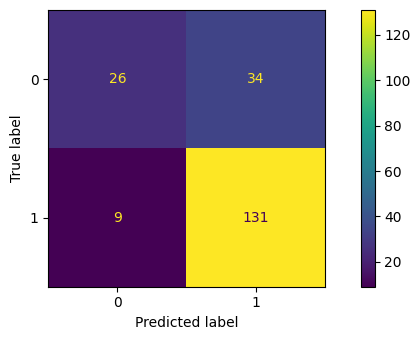

In [123]:
preds = xgb_cv1.best_estimator_.predict(X_test)

# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb_cv1.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=xgb_cv1.classes_)
disp.plot();


**What type of errors are more common for our model?**

The model is more than 3 times as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. The company prefers unexpected pleasant (false negative) surprises over unexpected disappointments (false positive).


**Decision tree feature importance**

We can also get feature importance from XGBoost.


In [124]:
xgb_cv1importances = pd.DataFrame(xgb_cv1.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
xgb_cv1importances = xgb_cv1importances.sort_values(by='gini_importance', ascending=False)
# Only extract the features with importances > 0
xgb_cv1importances = xgb_cv1importances[xgb_cv1importances['gini_importance'] != 0]
xgb_cv1importances

,gini_importance
checking_status_D,0.137905
savings_status_E,0.040476
savings_status_B,0.038623
credit_history_no credits/all paid,0.036097
duration,0.035413
credit_history_delayed previously,0.031675
purpose_new car,0.031573
other_payment_plans_none,0.031246
other_parties_guarantor,0.030974
credit_history_all paid,0.029868


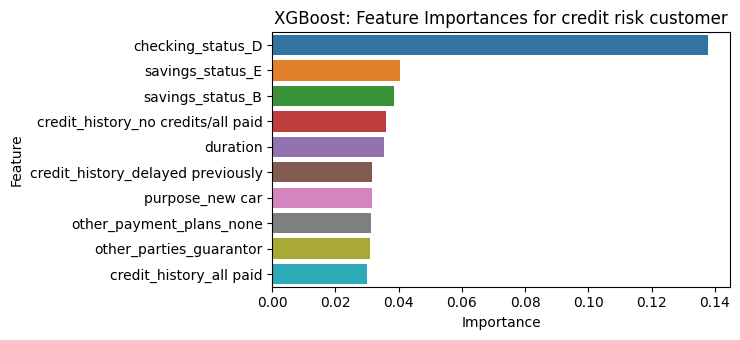

In [125]:
sns.barplot(data=xgb_cv1importances[:10], x="gini_importance", y=xgb_cv1importances.index[:10], orient='h')
plt.title("XGBoost: Feature Importances for credit risk customer", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this XGBoost: Checking_status_D, that's to say, when the status of existing checking is like *no checking* has the highest importance. This variable is more helpful in predicting the outcome variable, `customer_credit`. The other variables seem to have almost similar weight on the outcome variable.

####**Summary of model results**

**Logistic Regression**

The logistic regression model achieved precision of 82%, recall of 83%, f1-score of 81% (all weighted
averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

**The decision tree model**, particularly the XGBoost model, achieved AUC of 64.9, precision
of 77.6%, recall of 91.4%, f1-score of 83.9%, and accuracy of 75.5%



We've selected the XGBoost model to make predictions as it is more stable. Unfortunately, XGBoost is not the most transparent machine learning algorithm. We know that `checking_status_D` is the most critical feature, but we don't see how they influence `credit_risk`. This would require further exploration.


####**Conclusion, Next Steps**


This is not a superb model. Depending on how it will be used, it can turn out to be helpful by providing the administration with a first idea of what a particular loan could lead to.

Features engineering can improve our model by extracting some features so our model would be more accurate and predictive.

For another project, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.




